In [1]:
import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

Cell below from https://scipy-cookbook.readthedocs.io/items/FittingData.html.

In [2]:
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*np.exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = np.indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = np.sqrt(np.abs((np.arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = np.sqrt(np.abs((np.arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: np.ravel(gaussian(*p)(*np.indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

## Check that coords in smfish_coords.csv line up with spots in smfish.png

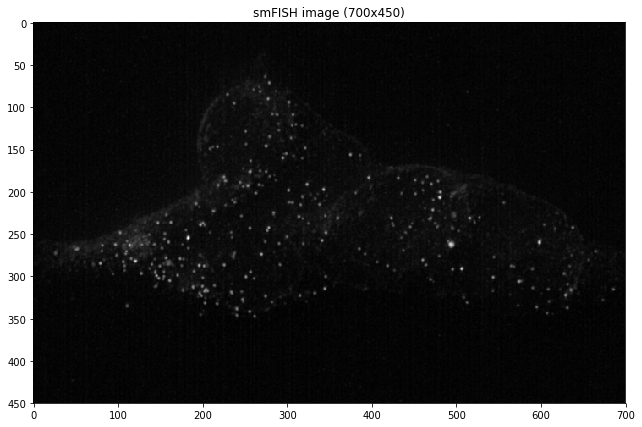

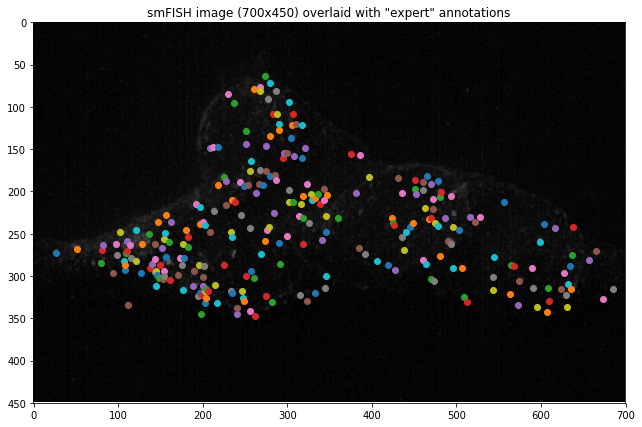

In [3]:
from skimage.io import imread
from skimage.color import rgb2gray

fig = plt.figure(figsize = (12,7))
im = imread('smfish.png')
im = rgb2gray(im)
plt.imshow(im, cmap='gray')
plt.title('smFISH image (700x450)')
plt.show()

fig = plt.figure(figsize = (12,7))
coords = np.genfromtxt('smfish_coords.csv', delimiter=',')
for x, y in coords:
    plt.scatter(x, y)
plt.ylim(0,450)
plt.gca().invert_yaxis()
im = imread('smfish.png')
plt.imshow(im, cmap='gray')
plt.title('smFISH image (700x450) overlaid with "expert" annotations')
plt.show()

## Fit a 2D gaussian to each spot.

Find gaussian fit parameters as in the scipy example here: https://scipy-cookbook.readthedocs.io/items/FittingData.html. Show that these parameters produce reasonable reconstructed spots.

268 spots found by expert:


---------------------------------------------------

x: 25.987
y: 272.35
sigma_min: 1.1720832835635029
sigma_max: 1.1858694503006166
height: 58.93592269437407
max_intensity: 67


Original crop around spot at (25, 272):


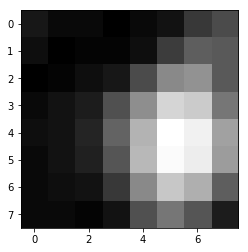

Spot reconstructed from gaussian fit parameters using sigma_min:


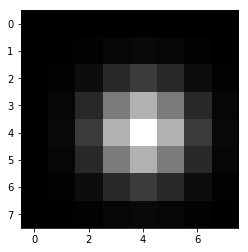

Spot reconstructed from gaussian fit parameters using sigma_max:


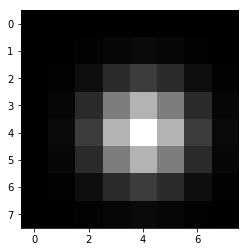

Original crop
[[18 15 15 13 15 17 25 29]
 [16 13 14 14 16 26 33 32]
 [13 14 16 18 29 42 44 32]
 [15 17 19 30 43 58 56 38]
 [16 17 21 34 51 67 64 47]
 [15 17 20 31 52 66 63 46]
 [15 16 17 25 42 55 50 33]
 [15 15 14 17 30 38 31 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 32 46 32 10  1]
 [ 0  2 15 46 67 46 15  2]
 [ 0  1 10 32 46 32 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 32 46 32 11  1]
 [ 0  2 16 46 67 46 16  2]
 [ 0  1 11 32 46 32 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 51.232
y: 267.77
sigma_min: 1.188748964012081
sigma_max: 1.281018190375894
height: 85.13517543248834
max_intensity: 102


Original crop around spot at (51, 267):


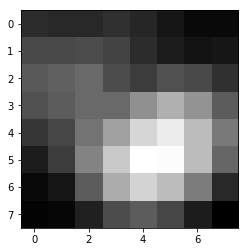

Spot reconstructed from gaussian fit parameters using sigma_min:


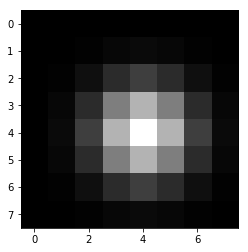

Spot reconstructed from gaussian fit parameters using sigma_max:


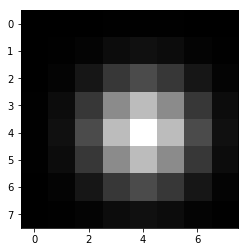

Original crop
[[ 36  35  35  37  34  29  25  25]
 [ 45  45  46  43  36  31  28  29]
 [ 50  52  55  46  41  47  45  37]
 [ 47  51  55  55  67  77  68  51]
 [ 39  44  58  72  89  96  81  60]
 [ 31  41  63  85 102 101  81  54]
 [ 25  29  51  76  88  81  61  35]
 [ 23  24  32  46  51  44  31  22]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   2   4   2   1   0]
 [  0   1   6  17  24  17   6   1]
 [  0   2  17  50  71  50  17   2]
 [  0   4  24  71 102  71  24   4]
 [  0   2  17  50  71  50  17   2]
 [  0   1   6  17  24  17   6   1]
 [  0   0   1   2   4   2   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   8  22  30  22   8   1]
 [  0   4  22  55  75  55  22   4]
 [  0   6  30  75 102  75  30   6]
 [  0   4  22  55  75  55  22   4]
 [  0   1   8  22  30  22   8   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 79.354
y: 285.01
sigma_min

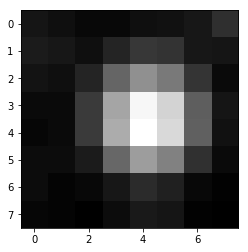

Spot reconstructed from gaussian fit parameters using sigma_min:


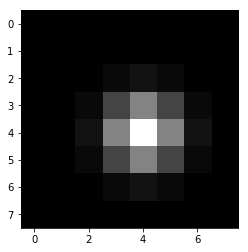

Spot reconstructed from gaussian fit parameters using sigma_max:


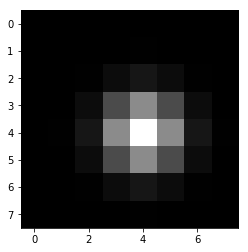

Original crop
[[ 20  17  14  14  17  18  21  32]
 [ 23  21  17  27  36  34  21  20]
 [ 19  17  27  57  77  67  35  15]
 [ 15  15  37  87 125 109  54  20]
 [ 13  15  37  90 129 111  55  18]
 [ 16  16  23  58  83  70  33  15]
 [ 16  12  14  21  30  25  14  11]
 [ 13  12  10  16  22  20  11  10]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   4  34  66  34   4   0]
 [  0   0   9  66 129  66   9   0]
 [  0   0   4  34  66  34   4   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   6  11   6   0   0]
 [  0   0   6  38  70  38   6   0]
 [  0   0  11  70 129  70  11   0]
 [  0   0   6  38  70  38   6   0]
 [  0   0   0   6  11   6   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 80.793
y: 269.86
sigma_min

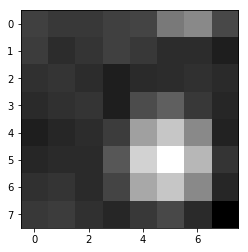

Spot reconstructed from gaussian fit parameters using sigma_min:


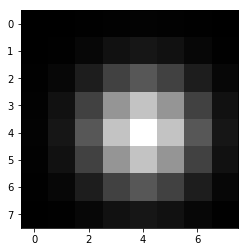

Spot reconstructed from gaussian fit parameters using sigma_max:


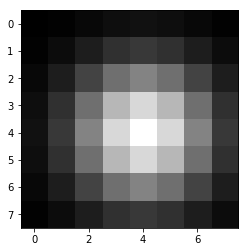

Original crop
[[31 29 29 31 32 46 50 33]
 [30 26 28 31 29 26 26 22]
 [27 28 26 22 25 26 27 25]
 [25 27 28 22 34 39 29 24]
 [22 24 26 30 56 66 50 23]
 [24 25 25 37 69 81 62 28]
 [27 28 25 32 58 66 50 24]
 [29 30 27 24 29 33 25 14]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 21 27 21  9  2]
 [ 0  5 21 47 61 47 21  5]
 [ 1  7 27 61 81 61 27  7]
 [ 0  5 21 47 61 47 21  5]
 [ 0  2  9 21 27 21  9  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[ 0  1  3  4  5  4  3  1]
 [ 1  4  9 15 18 15  9  4]
 [ 3  9 21 35 41 35 21  9]
 [ 4 15 35 58 68 58 35 15]
 [ 5 18 41 68 81 68 41 18]
 [ 4 15 35 58 68 58 35 15]
 [ 3  9 21 35 41 35 21  9]
 [ 1  4  9 15 18 15  9  4]]

---------------------------------------------------

x: 81.709
y: 263.32
sigma_min: 1.1737285943099578
sigma_max: 1.248542387650667
height: 64.38288189175837
max_intensity: 92


Original crop around spot at (81, 263):


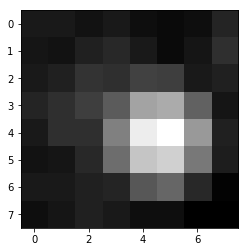

Spot reconstructed from gaussian fit parameters using sigma_min:


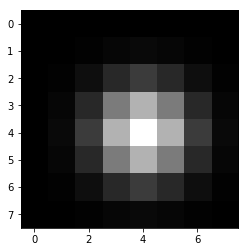

Spot reconstructed from gaussian fit parameters using sigma_max:


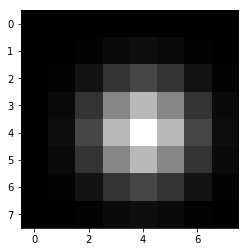

Original crop
[[29 29 27 29 26 25 26 32]
 [28 27 31 33 29 25 28 35]
 [29 31 36 35 40 39 29 31]
 [32 35 39 47 67 69 49 28]
 [29 35 35 57 87 92 64 31]
 [27 28 33 52 76 79 55 30]
 [29 29 31 32 46 50 33 23]
 [26 28 31 29 26 26 22 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 14 21 14  5  0]
 [ 0  2 14 44 63 44 14  2]
 [ 0  3 21 63 92 63 21  3]
 [ 0  2 14 44 63 44 14  2]
 [ 0  0  5 14 21 14  5  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5  3  1  0]
 [ 0  1  7 18 25 18  7  1]
 [ 0  3 18 48 66 48 18  3]
 [ 0  5 25 66 92 66 25  5]
 [ 0  3 18 48 66 48 18  3]
 [ 0  1  7 18 25 18  7  1]
 [ 0  0  1  3  5  3  1  0]]

---------------------------------------------------

x: 94.266
y: 297.04
sigma_min: 1.0665487139691223
sigma_max: 1.1090336589682341
height: 43.01262409832147
max_intensity: 62


Original crop around spot at (94, 297):


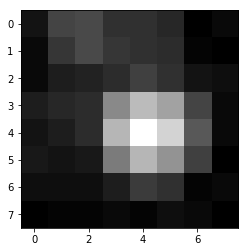

Spot reconstructed from gaussian fit parameters using sigma_min:


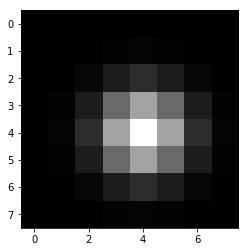

Spot reconstructed from gaussian fit parameters using sigma_max:


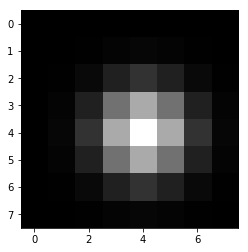

Original crop
[[14 24 25 20 20 18 10 12]
 [12 21 25 21 20 19 11 10]
 [12 16 17 19 23 20 14 13]
 [16 18 19 38 48 43 24 12]
 [14 16 19 47 62 53 28 12]
 [15 14 15 35 47 40 23 10]
 [13 13 13 16 22 20 11 12]
 [10 11 11 12 11 13 12 10]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 25 39 25  6  0]
 [ 0  1 10 39 62 39 10  1]
 [ 0  0  6 25 39 25  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 27 41 27  8  1]
 [ 0  1 12 41 62 41 12  1]
 [ 0  1  8 27 41 27  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 97.013
y: 262.41
sigma_min: 1.0635816194998795
sigma_max: 1.065544887747611
height: 93.89917605764414
max_intensity: 115


Original crop around spot at (97, 262):


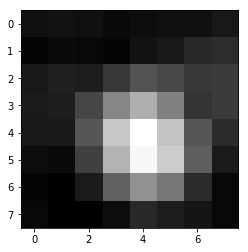

Spot reconstructed from gaussian fit parameters using sigma_min:


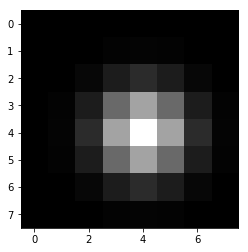

Spot reconstructed from gaussian fit parameters using sigma_max:


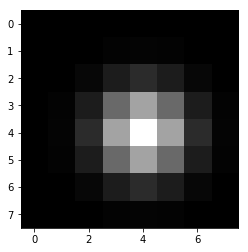

Original crop
[[ 26  27  26  24  25  26  26  29]
 [ 22  24  23  22  27  29  35  37]
 [ 29  32  31  41  51  47  41  42]
 [ 30  31  46  70  85  68  40  42]
 [ 29  29  52  94 115  93  52  36]
 [ 25  24  44  87 112  96  55  30]
 [ 22  20  30  56  74  64  36  23]
 [ 23  20  20  25  35  31  28  23]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  19  12   3   0]
 [  0   1  12  47  73  47  12   1]
 [  0   2  19  73 115  73  19   2]
 [  0   1  12  47  73  47  12   1]
 [  0   0   3  12  19  12   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  19  12   3   0]
 [  0   1  12  47  74  47  12   1]
 [  0   2  19  74 115  74  19   2]
 [  0   1  12  47  74  47  12   1]
 [  0   0   3  12  19  12   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 98.45
y: 274.97
sigma_min:

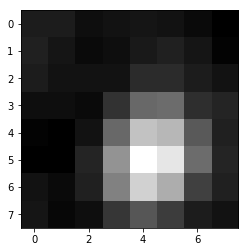

Spot reconstructed from gaussian fit parameters using sigma_min:


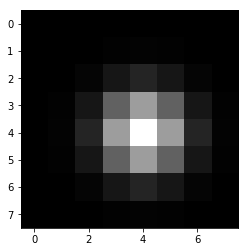

Spot reconstructed from gaussian fit parameters using sigma_max:


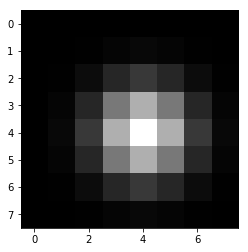

Original crop
[[22 22 18 19 20 19 17 14]
 [23 20 17 18 21 23 20 15]
 [22 19 19 19 26 26 22 19]
 [18 18 17 28 43 44 27 24]
 [15 14 19 43 68 65 39 23]
 [14 14 24 55 85 78 44 24]
 [19 17 23 50 72 62 32 23]
 [20 16 18 29 38 31 22 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 32 52 32  7  0]
 [ 0  1 12 52 85 52 12  1]
 [ 0  0  7 32 52 32  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 12 18 12  4  0]
 [ 0  1 12 39 58 39 12  1]
 [ 0  2 18 58 85 58 18  2]
 [ 0  1 12 39 58 39 12  1]
 [ 0  0  4 12 18 12  4  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 102.64
y: 248.54
sigma_min: 1.0875614254014727
sigma_max: 1.1155696905974064
height: 85.8101588390954
max_intensity: 105


Original crop around spot at (102, 248):


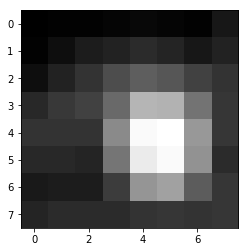

Spot reconstructed from gaussian fit parameters using sigma_min:


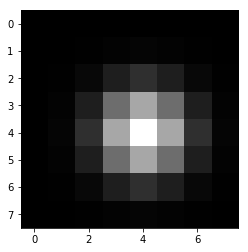

Spot reconstructed from gaussian fit parameters using sigma_max:


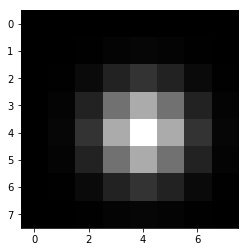

Original crop
[[ 16  17  17  18  19  18  17  24]
 [ 17  21  26  28  31  29  24  28]
 [ 21  28  34  43  49  46  39  34]
 [ 30  36  39  53  79  78  56  35]
 [ 34  34  34  64 103 105  69  35]
 [ 30  30  29  57  98 103  67  31]
 [ 25  26  26  37  68  72  48  35]
 [ 29  31  31  31  34  35  34  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  19  12   3   0]
 [  0   1  12  45  68  45  12   1]
 [  0   2  19  68 105  68  19   2]
 [  0   1  12  45  68  45  12   1]
 [  0   0   3  12  19  12   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  14  21  14   4   0]
 [  0   1  14  47  70  47  14   1]
 [  0   2  21  70 105  70  21   2]
 [  0   1  14  47  70  47  14   1]
 [  0   0   4  14  21  14   4   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 106.3
y: 282.68
sigma_min:

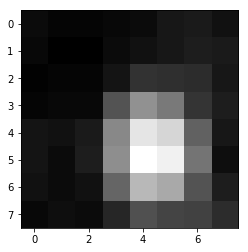

Spot reconstructed from gaussian fit parameters using sigma_min:


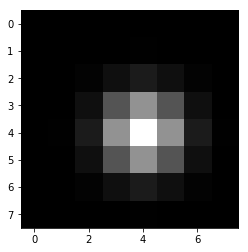

Spot reconstructed from gaussian fit parameters using sigma_max:


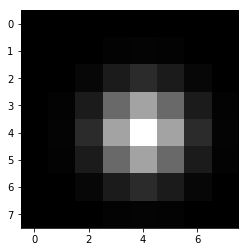

Original crop
[[ 18  16  16  17  18  22  23  20]
 [ 17  14  14  18  20  22  24  23]
 [ 15  16  16  21  31  30  29  22]
 [ 16  17  17  42  63  55  32  24]
 [ 21  20  23  60  91  86  47  22]
 [ 21  18  24  62 100  95  53  19]
 [ 20  18  20  48  76  71  42  24]
 [ 17  19  18  27  41  37  36  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0  10  57 100  57  10   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  10  16  10   2   0]
 [  0   1  10  41  64  41  10   1]
 [  0   1  16  64 100  64  16   1]
 [  0   1  10  41  64  41  10   1]
 [  0   0   2  10  16  10   2   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 107.74
y: 293.12
sigma_min

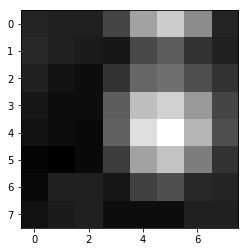

Spot reconstructed from gaussian fit parameters using sigma_min:


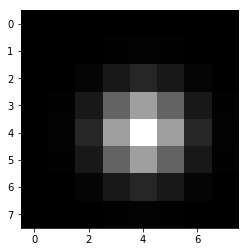

Spot reconstructed from gaussian fit parameters using sigma_max:


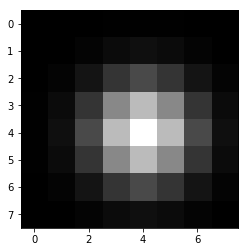

Original crop
[[16 15 15 23 43 52 38 16]
 [17 15 14 13 24 28 19 15]
 [15 12 11 19 30 32 25 19]
 [13 11 11 28 49 53 41 23]
 [12 11 10 29 56 63 47 25]
 [ 9  8 10 21 43 50 35 19]
 [10 15 15 13 22 25 17 16]
 [12 14 15 11 11 11 15 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 24 39 24  5  0]
 [ 0  0  9 39 63 39  9  0]
 [ 0  0  5 24 39 24  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 13 18 13  5  1]
 [ 0  2 13 33 46 33 13  2]
 [ 0  3 18 46 63 46 18  3]
 [ 0  2 13 33 46 33 13  2]
 [ 0  1  5 13 18 13  5  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 107.87
y: 287.49
sigma_min: 1.037601255256507
sigma_max: 2.970491394918181
height: 200.3910836485023
max_intensity: 100


Original crop around spot at (107, 287):


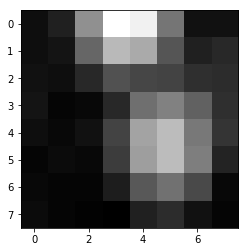

Spot reconstructed from gaussian fit parameters using sigma_min:


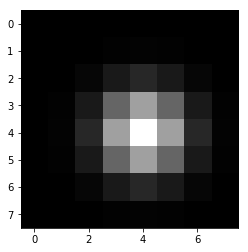

Spot reconstructed from gaussian fit parameters using sigma_max:


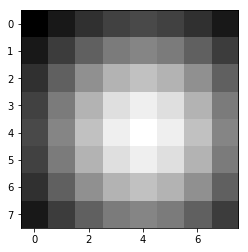

Original crop
[[ 18  24  62 100  95  53  19  19]
 [ 18  20  48  76  71  42  24  27]
 [ 19  18  27  41  37  36  29  28]
 [ 20  15  16  27  51  57  46  29]
 [ 18  16  19  36  69  77  54  31]
 [ 15  17  16  34  67  77  56  25]
 [ 16  15  15  23  43  52  38  16]
 [ 17  15  14  13  24  28  19  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  39  62  39   9   0]
 [  0   1  15  62 100  62  15   1]
 [  0   0   9  39  62  39   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[ 16  24  32  38  40  38  32  24]
 [ 24  36  47  56  60  56  47  36]
 [ 32  47  63  75  79  75  63  47]
 [ 38  56  75  89  94  89  75  56]
 [ 40  60  79  94 100  94  79  60]
 [ 38  56  75  89  94  89  75  56]
 [ 32  47  63  75  79  75  63  47]
 [ 24  36  47  56  60  56  47  36]]

---------------------------------------------------

x: 108.92
y: 273.27
sigma_min

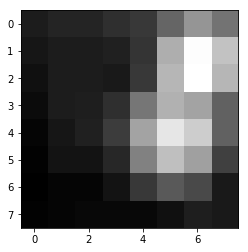

Spot reconstructed from gaussian fit parameters using sigma_min:


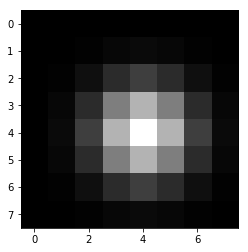

Spot reconstructed from gaussian fit parameters using sigma_max:


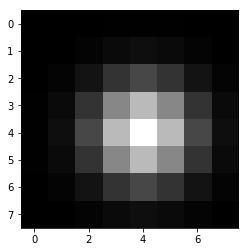

Original crop
[[ 24  27  27  31  34  50  67  55]
 [ 22  24  24  26  33  76 104  83]
 [ 20  24  24  23  34  79 105  79]
 [ 18  24  25  31  56  77  72  49]
 [ 16  22  26  36  72  96  87  49]
 [ 15  21  21  28  60  82  71  37]
 [ 14  16  16  21  34  46  40  23]
 [ 15  16  17  17  17  20  25  23]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   4   3   1   0]
 [  0   1   6  17  25  17   6   1]
 [  0   3  17  51  73  51  17   3]
 [  0   4  25  73 105  73  25   4]
 [  0   3  17  51  73  51  17   3]
 [  0   1   6  17  25  17   6   1]
 [  0   0   1   3   4   3   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   5   4   1   0]
 [  0   1   8  21  29  21   8   1]
 [  0   4  21  55  76  55  21   4]
 [  0   5  29  76 105  76  29   5]
 [  0   4  21  55  76  55  21   4]
 [  0   1   8  21  29  21   8   1]
 [  0   0   1   4   5   4   1   0]]

---------------------------------------------------

x: 110.35
y: 270.39
sigma_min

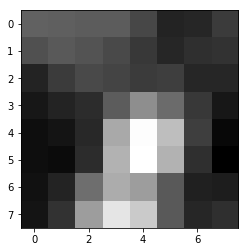

Spot reconstructed from gaussian fit parameters using sigma_min:


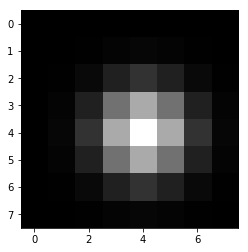

Spot reconstructed from gaussian fit parameters using sigma_max:


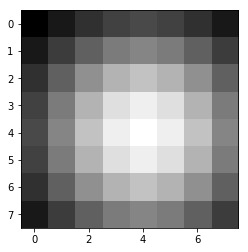

Original crop
[[ 52  51  50  50  43  31  32  39]
 [ 46  49  47  44  38  32  35  36]
 [ 31  39  44  42  39  40  32  32]
 [ 27  31  34  50  67  55  38  27]
 [ 24  26  33  76 104  83  40  22]
 [ 24  23  34  79 105  79  35  19]
 [ 25  31  56  77  72  49  30  29]
 [ 26  36  72  96  87  49  32  35]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  13  20  13   4   0]
 [  0   1  13  46  70  46  13   1]
 [  0   2  20  70 105  70  20   2]
 [  0   1  13  46  70  46  13   1]
 [  0   0   4  13  20  13   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[ 17  25  33  40  42  40  33  25]
 [ 25  37  50  59  63  59  50  37]
 [ 33  50  66  79  83  79  66  50]
 [ 40  59  79  93  99  93  79  59]
 [ 42  63  83  99 105  99  83  63]
 [ 40  59  79  93  99  93  79  59]
 [ 33  50  66  79  83  79  66  50]
 [ 25  37  50  59  63  59  50  37]]

---------------------------------------------------

x: 110.75
y: 258.22
sigma_min

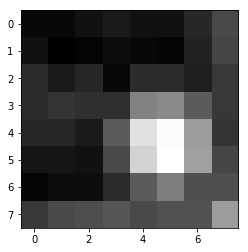

Spot reconstructed from gaussian fit parameters using sigma_min:


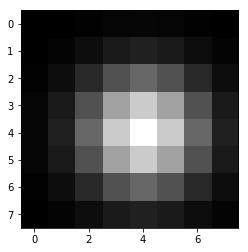

Spot reconstructed from gaussian fit parameters using sigma_max:


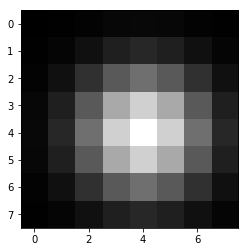

Original crop
[[26 26 28 30 28 28 33 41]
 [28 24 25 27 26 25 32 40]
 [34 30 33 26 34 34 31 37]
 [34 36 35 35 54 56 45 37]
 [33 33 30 45 76 82 60 36]
 [29 29 28 41 73 83 61 40]
 [25 27 27 34 45 53 42 42]
 [37 41 42 44 41 43 43 60]]
Reconstructed using sigma min
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 13 26 33 26 13  4]
 [ 1  8 26 52 66 52 26  8]
 [ 2 10 33 66 83 66 33 10]
 [ 1  8 26 52 66 52 26  8]
 [ 0  4 13 26 33 26 13  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  1  5 10 12 10  5  1]
 [ 1  5 15 29 36 29 15  5]
 [ 2 10 29 54 67 54 29 10]
 [ 3 12 36 67 83 67 36 12]
 [ 2 10 29 54 67 54 29 10]
 [ 1  5 15 29 36 29 15  5]
 [ 0  1  5 10 12 10  5  1]]

---------------------------------------------------

x: 111.14
y: 334.71
sigma_min: 0.9456840616255529
sigma_max: 1.031225619466696
height: 69.55497202103955
max_intensity: 81


Original crop around spot at (111, 334):


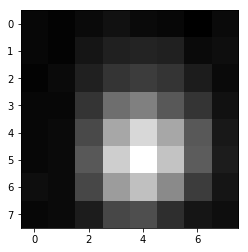

Spot reconstructed from gaussian fit parameters using sigma_min:


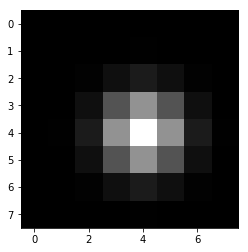

Spot reconstructed from gaussian fit parameters using sigma_max:


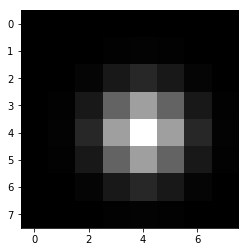

Original crop
[[11 10 12 14 12 11  9 12]
 [11 10 15 18 19 18 12 13]
 [10 12 18 24 26 24 17 12]
 [11 11 24 40 45 34 24 14]
 [11 12 30 56 70 56 34 16]
 [11 12 34 67 81 64 35 17]
 [13 12 29 53 63 48 26 15]
 [11 12 17 29 31 22 15 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 26 46 26  4  0]
 [ 0  0  8 46 81 46  8  0]
 [ 0  0  4 26 46 26  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 31 50 31  7  0]
 [ 0  1 12 50 81 50 12  1]
 [ 0  0  7 31 50 31  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 114.02
y: 263.06
sigma_min: 1.2559191033024395
sigma_max: 1.2715861897411245
height: 97.17525212990476
max_intensity: 141


Original crop around spot at (114, 263):


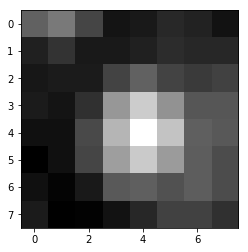

Spot reconstructed from gaussian fit parameters using sigma_min:


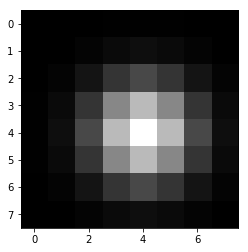

Spot reconstructed from gaussian fit parameters using sigma_max:


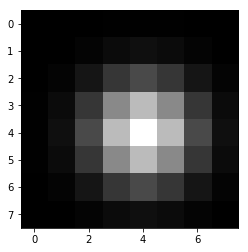

Original crop
[[ 73  83  61  40  42  49  46  39]
 [ 45  53  42  42  45  50  48  48]
 [ 41  43  43  60  73  60  56  59]
 [ 43  40  52  96 119  94  68  68]
 [ 38  38  63 109 141 115  72  69]
 [ 31  38  61  99 118  98  71  64]
 [ 38  33  42  70  72  66  71  64]
 [ 43  31  32  39  48  59  59  52]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   8   5   2   0]
 [  0   2  11  28  39  28  11   2]
 [  0   5  28  74 102  74  28   5]
 [  0   8  39 102 141 102  39   8]
 [  0   5  28  74 102  74  28   5]
 [  0   2  11  28  39  28  11   2]
 [  0   0   2   5   8   5   2   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  11  30  40  30  11   2]
 [  0   6  30  75 103  75  30   6]
 [  1   8  40 103 141 103  40   8]
 [  0   6  30  75 103  75  30   6]
 [  0   2  11  30  40  30  11   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 115.72
y: 278.76
sigma_min

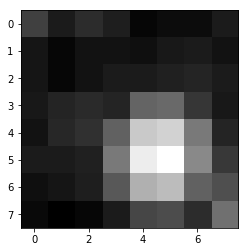

Spot reconstructed from gaussian fit parameters using sigma_min:


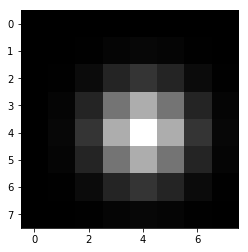

Spot reconstructed from gaussian fit parameters using sigma_max:


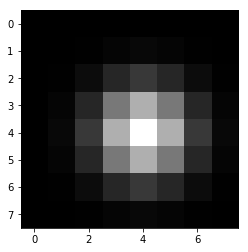

Original crop
[[ 37  25  31  26  18  20  20  25]
 [ 23  18  22  22  21  24  25  22]
 [ 23  18  22  25  25  27  28  25]
 [ 24  28  30  28  49  51  34  24]
 [ 22  29  32  48  82  85  56  28]
 [ 25  25  27  56  94 100  61  35]
 [ 21  23  26  45  74  78  48  42]
 [ 19  16  18  25  39  41  31  53]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  14  20  14   4   0]
 [  0   1  14  45  67  45  14   1]
 [  0   2  20  67 100  67  20   2]
 [  0   1  14  45  67  45  14   1]
 [  0   0   4  14  20  14   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   4  15  22  15   4   0]
 [  0   2  15  46  68  46  15   2]
 [  0   3  22  68 100  68  22   3]
 [  0   2  15  46  68  46  15   2]
 [  0   0   4  15  22  15   4   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 120.69
y: 282.03
sigma_min

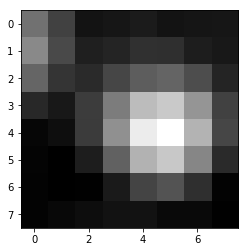

Spot reconstructed from gaussian fit parameters using sigma_min:


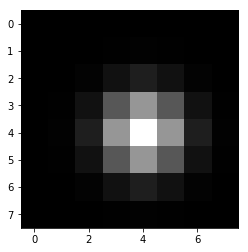

Spot reconstructed from gaussian fit parameters using sigma_max:


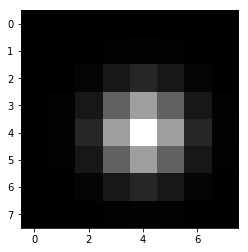

Original crop
[[ 85  56  28  30  33  28  29  30]
 [100  61  35  38  46  45  34  31]
 [ 78  48  42  59  73  77  63  39]
 [ 41  31  53  92 131 139 107  56]
 [ 20  25  52 104 160 172 126  59]
 [ 19  16  34  76 125 138  98  42]
 [ 18  16  17  32  58  67  45  18]
 [ 18  21  24  27  27  22  22  17]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  11  20  11   2   0]
 [  0   0  11  59 100  59  11   0]
 [  0   1  20 100 172 100  20   1]
 [  0   0  11  59 100  59  11   0]
 [  0   0   2  11  20  11   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  15  25  15   3   0]
 [  0   1  15  66 106  66  15   1]
 [  0   2  25 106 172 106  25   2]
 [  0   1  15  66 106  66  15   1]
 [  0   0   3  15  25  15   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 121.34
y: 245.67
sigma_min

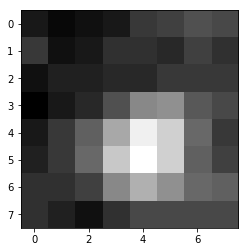

Spot reconstructed from gaussian fit parameters using sigma_min:


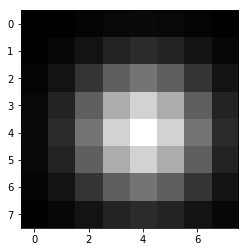

Spot reconstructed from gaussian fit parameters using sigma_max:


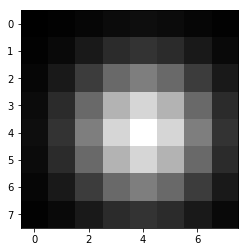

Original crop
[[31 29 30 31 35 36 38 37]
 [35 30 31 34 34 33 36 34]
 [30 32 32 33 33 35 35 35]
 [28 31 33 38 45 46 39 37]
 [31 35 40 49 58 54 41 35]
 [32 35 41 53 60 54 40 36]
 [34 34 36 45 50 46 41 40]
 [34 32 30 34 37 37 37 37]]
Reconstructed using sigma min
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 22 27 22 12  4]
 [ 2  8 22 40 49 40 22  8]
 [ 2 10 27 49 60 49 27 10]
 [ 2  8 22 40 49 40 22  8]
 [ 1  4 12 22 27 22 12  4]
 [ 0  1  4  8 10  8  4  1]]
Reconstructed using sigma max
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 10 12 10  6  2]
 [ 1  6 14 24 29 24 14  6]
 [ 2 10 24 42 50 42 24 10]
 [ 3 12 29 50 60 50 29 12]
 [ 2 10 24 42 50 42 24 10]
 [ 1  6 14 24 29 24 14  6]
 [ 0  2  6 10 12 10  6  2]]

---------------------------------------------------

x: 127.49
y: 296.39
sigma_min: 0.8911696777874037
sigma_max: 0.9477269833897982
height: 96.80270501592135
max_intensity: 100


Original crop around spot at (127, 296):


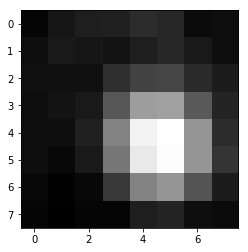

Spot reconstructed from gaussian fit parameters using sigma_min:


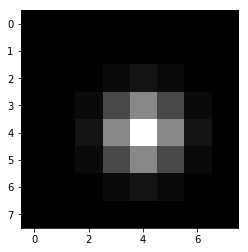

Spot reconstructed from gaussian fit parameters using sigma_max:


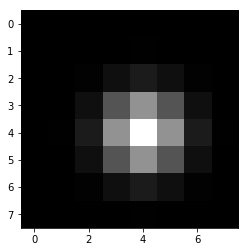

Original crop
[[ 11  17  20  21  25  23  13  14]
 [ 14  18  17  16  20  23  18  14]
 [ 15  15  15  26  33  34  24  19]
 [ 14  16  18  40  65  66  41  22]
 [ 14  14  21  56  96 100  62  25]
 [ 14  12  18  51  92  99  62  28]
 [ 12  10  12  29  56  62  39  19]
 [ 11   9  11  11  20  22  14  13]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   4  28  53  28   4   0]
 [  0   0   8  53 100  53   8   0]
 [  0   0   4  28  53  28   4   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0  10  57 100  57  10   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 128.27
y: 262.41
sigma_min

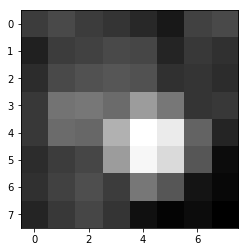

Spot reconstructed from gaussian fit parameters using sigma_min:


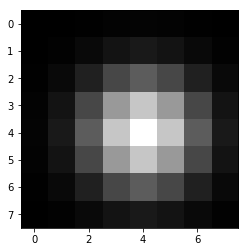

Spot reconstructed from gaussian fit parameters using sigma_max:


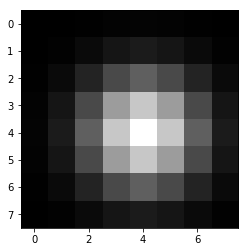

Original crop
[[46 49 46 44 41 37 47 49]
 [39 46 47 49 48 40 45 43]
 [42 49 51 52 51 43 44 42]
 [45 59 60 57 69 60 44 45]
 [45 57 56 74 93 88 55 40]
 [42 46 48 69 91 84 52 34]
 [43 47 50 46 60 52 36 33]
 [40 45 48 44 35 32 34 31]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  7  9  7  3  0]
 [ 0  3 12 25 33 25 12  3]
 [ 1  7 25 55 72 55 25  7]
 [ 1  9 33 72 93 72 33  9]
 [ 1  7 25 55 72 55 25  7]
 [ 0  3 12 25 33 25 12  3]
 [ 0  0  3  7  9  7  3  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  7 10  7  3  1]
 [ 0  3 12 26 34 26 12  3]
 [ 1  7 26 56 72 56 26  7]
 [ 1 10 34 72 93 72 34 10]
 [ 1  7 26 56 72 56 26  7]
 [ 0  3 12 26 34 26 12  3]
 [ 0  1  3  7 10  7  3  1]]

---------------------------------------------------

x: 136.91
y: 250.38
sigma_min: 1.396099564219051
sigma_max: 1.7234391080558114
height: 46.577793927072904
max_intensity: 76


Original crop around spot at (136, 250):


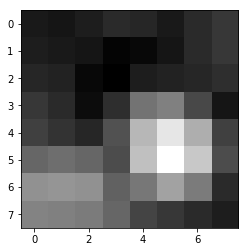

Spot reconstructed from gaussian fit parameters using sigma_min:


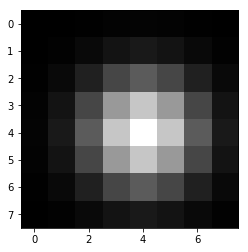

Spot reconstructed from gaussian fit parameters using sigma_max:


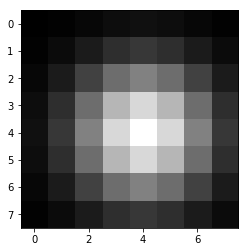

Original crop
[[22 21 23 26 25 22 26 29]
 [23 22 21 17 18 21 26 29]
 [25 24 18 16 23 24 25 27]
 [29 26 19 27 43 46 33 21]
 [31 28 25 35 59 70 57 31]
 [40 42 40 34 61 76 63 34]
 [50 51 50 39 44 54 45 26]
 [47 46 45 40 32 29 26 23]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 21 27 21  9  2]
 [ 0  5 21 45 58 45 21  5]
 [ 1  7 27 58 76 58 27  7]
 [ 0  5 21 45 58 45 21  5]
 [ 0  2  9 21 27 21  9  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[ 0  1  2  4  5  4  2  1]
 [ 1  3  8 14 16 14  8  3]
 [ 2  8 19 32 38 32 19  8]
 [ 4 14 32 54 64 54 32 14]
 [ 5 16 38 64 76 64 38 16]
 [ 4 14 32 54 64 54 32 14]
 [ 2  8 19 32 38 32 19  8]
 [ 1  3  8 14 16 14  8  3]]

---------------------------------------------------

x: 137.56
y: 290.63
sigma_min: 1.5642428830644228
sigma_max: 4.329122285973987
height: 331.96277666304263
max_intensity: 90


Original crop around spot at (137, 290):


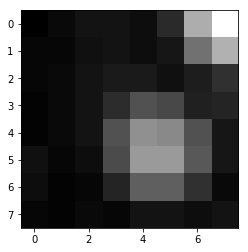

Spot reconstructed from gaussian fit parameters using sigma_min:


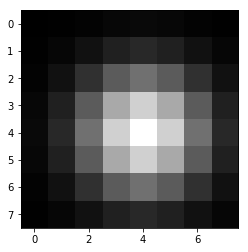

Spot reconstructed from gaussian fit parameters using sigma_max:


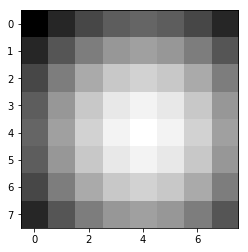

Original crop
[[12 15 18 18 16 25 65 90]
 [14 14 17 18 16 19 47 66]
 [14 15 18 20 20 17 21 27]
 [13 15 18 26 37 34 22 23]
 [13 15 18 37 56 54 37 19]
 [17 14 16 35 59 59 39 19]
 [16 13 14 23 41 41 27 15]
 [14 13 15 14 18 18 16 18]]
Reconstructed using sigma min
[[ 0  0  1  2  3  2  1  0]
 [ 0  2  6 11 14 11  6  2]
 [ 1  6 17 32 39 32 17  6]
 [ 2 11 32 59 73 59 32 11]
 [ 3 14 39 73 90 73 39 14]
 [ 2 11 32 59 73 59 32 11]
 [ 1  6 17 32 39 32 17  6]
 [ 0  2  6 11 14 11  6  2]]
Reconstructed using sigma max
[[38 46 52 57 58 57 52 46]
 [46 55 63 68 70 68 63 55]
 [52 63 72 78 80 78 72 63]
 [57 68 78 85 87 85 78 68]
 [58 70 80 87 90 87 80 70]
 [57 68 78 85 87 85 78 68]
 [52 63 72 78 80 78 72 63]
 [46 55 63 68 70 68 63 55]]

---------------------------------------------------

x: 140.18
y: 285.4
sigma_min: 0.9353109455872191
sigma_max: 1.024344755482574
height: 73.15023343691514
max_intensity: 90


Original crop around spot at (140, 285):


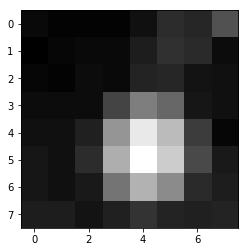

Spot reconstructed from gaussian fit parameters using sigma_min:


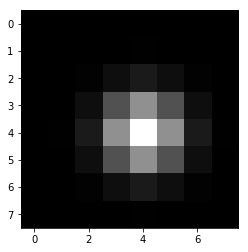

Spot reconstructed from gaussian fit parameters using sigma_max:


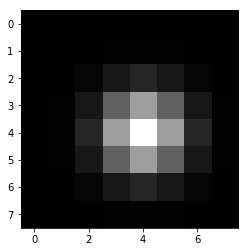

Original crop
[[14 12 12 12 16 25 23 36]
 [11 13 14 14 20 26 24 15]
 [13 12 15 14 22 23 17 16]
 [15 15 15 32 50 43 18 16]
 [16 16 21 57 83 69 30 13]
 [18 16 25 65 90 74 34 19]
 [18 16 19 47 66 54 24 20]
 [20 20 17 21 27 22 21 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  5 28 50 28  5  0]
 [ 0  0  9 50 90 50  9  0]
 [ 0  0  5 28 50 28  5  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  8 34 55 34  8  0]
 [ 0  1 13 55 90 55 13  1]
 [ 0  0  8 34 55 34  8  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 143.05
y: 262.15
sigma_min: 1.0500838496582858
sigma_max: 1.0821403904307811
height: 72.09740664700405
max_intensity: 92


Original crop around spot at (143, 262):


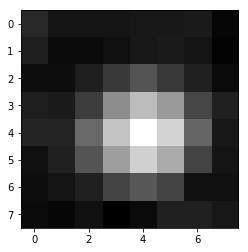

Spot reconstructed from gaussian fit parameters using sigma_min:


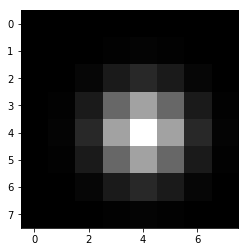

Spot reconstructed from gaussian fit parameters using sigma_max:


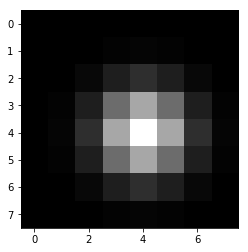

Original crop
[[28 22 22 22 23 23 24 18]
 [25 19 19 21 23 24 22 17]
 [20 20 25 33 41 33 26 19]
 [25 24 34 58 72 62 37 26]
 [27 27 47 74 92 79 46 23]
 [21 26 41 63 78 67 36 22]
 [20 22 26 36 42 36 21 21]
 [19 18 21 16 19 26 26 23]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  9 37 58 37  9  0]
 [ 0  1 14 58 92 58 14  1]
 [ 0  0  9 37 58 37  9  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  3 10 16 10  3  0]
 [ 0  1 10 39 60 39 10  1]
 [ 0  1 16 60 92 60 16  1]
 [ 0  1 10 39 60 39 10  1]
 [ 0  0  3 10 16 10  3  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 143.58
y: 279.41
sigma_min: 1.1834642040820098
sigma_max: 1.232307674205683
height: 39.49012564921327
max_intensity: 59


Original crop around spot at (143, 279):


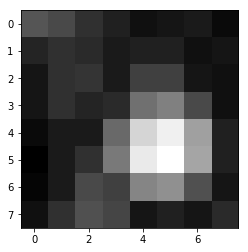

Spot reconstructed from gaussian fit parameters using sigma_min:


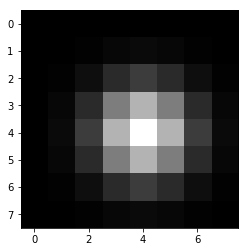

Spot reconstructed from gaussian fit parameters using sigma_max:


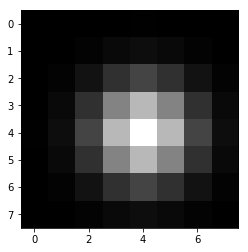

Original crop
[[27 25 20 17 14 15 16 13]
 [18 20 19 16 17 17 14 15]
 [15 20 21 16 23 23 15 14]
 [15 20 18 19 32 35 25 14]
 [13 16 16 31 51 56 41 17]
 [11 16 20 34 55 59 42 17]
 [12 16 25 23 36 38 26 15]
 [14 20 26 24 15 17 15 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 14  9  3  0]
 [ 0  1  9 28 41 28  9  1]
 [ 0  2 14 41 59 41 14  2]
 [ 0  1  9 28 41 28  9  1]
 [ 0  0  3  9 14  9  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 11 15 11  4  0]
 [ 0  2 11 30 42 30 11  2]
 [ 0  3 15 42 59 42 15  3]
 [ 0  2 11 30 42 30 11  2]
 [ 0  0  4 11 15 11  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 143.97
y: 295.6
sigma_min: 1.0370948238577082
sigma_max: 1.2208709666691213
height: 83.2499508691748
max_intensity: 104


Original crop around spot at (143, 295):


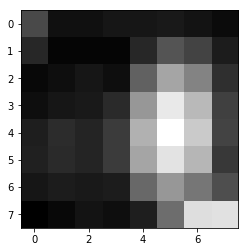

Spot reconstructed from gaussian fit parameters using sigma_min:


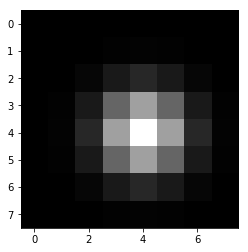

Spot reconstructed from gaussian fit parameters using sigma_max:


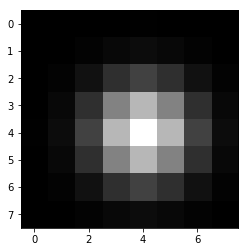

Original crop
[[ 39  19  19  21  21  22  20  17]
 [ 27  15  15  15  27  43  37  23]
 [ 16  18  21  18  48  72  60  30]
 [ 18  21  22  28  67  96  79  36]
 [ 24  29  26  34  76 104  85  37]
 [ 25  28  26  34  72  94  78  33]
 [ 21  23  22  23  50  67  55  41]
 [ 13  16  20  18  24  52  92  93]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  10  16  10   2   0]
 [  0   0  10  41  65  41  10   0]
 [  0   1  16  65 104  65  16   1]
 [  0   0  10  41  65  41  10   0]
 [  0   0   2  10  16  10   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   7  19  27  19   7   1]
 [  0   3  19  53  74  53  19   3]
 [  0   5  27  74 104  74  27   5]
 [  0   3  19  53  74  53  19   3]
 [  0   1   7  19  27  19   7   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 144.23
y: 293.9
sigma_min:

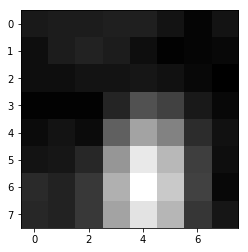

Spot reconstructed from gaussian fit parameters using sigma_min:


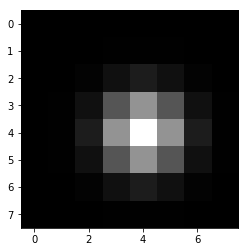

Spot reconstructed from gaussian fit parameters using sigma_max:


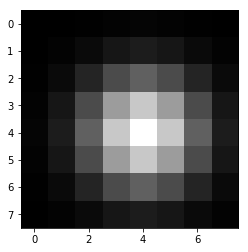

Original crop
[[ 23  24  24  25  25  21  16  21]
 [ 19  24  26  24  19  15  16  17]
 [ 19  19  21  21  22  20  17  14]
 [ 15  15  15  27  43  37  23  17]
 [ 18  21  18  48  72  60  30  20]
 [ 21  22  28  67  96  79  36  19]
 [ 29  26  34  76 104  85  37  17]
 [ 28  26  34  72  94  78  33  22]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0  11  59 104  59  11   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   2   1   0   0]
 [  0   1   4   9  11   9   4   1]
 [  0   4  14  30  39  30  14   4]
 [  1   9  30  63  81  63  30   9]
 [  2  11  39  81 104  81  39  11]
 [  1   9  30  63  81  63  30   9]
 [  0   4  14  30  39  30  14   4]
 [  0   1   4   9  11   9   4   1]]

---------------------------------------------------

x: 144.76
y: 311.82
sigma_min

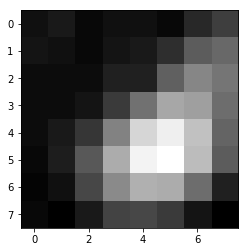

Spot reconstructed from gaussian fit parameters using sigma_min:


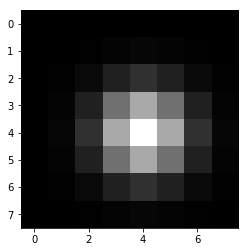

Spot reconstructed from gaussian fit parameters using sigma_max:


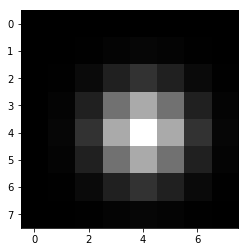

Original crop
[[14 16 12 14 14 12 20 25]
 [15 14 12 15 16 21 32 35]
 [13 13 13 18 18 33 42 38]
 [13 13 15 24 37 50 48 36]
 [13 16 23 41 61 67 56 34]
 [12 17 31 51 68 71 55 32]
 [11 14 27 43 52 51 36 18]
 [12 10 16 26 27 24 15 10]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 13  9  2  0]
 [ 0  1  9 31 47 31  9  1]
 [ 0  1 13 47 71 47 13  1]
 [ 0  1  9 31 47 31  9  1]
 [ 0  0  2  9 13  9  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 31 47 31  9  1]
 [ 0  1 14 47 71 47 14  1]
 [ 0  1  9 31 47 31  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 145.67
y: 299.27
sigma_min: 1.0674465725765092
sigma_max: 1.4617881052555508
height: 82.29048323518316
max_intensity: 127


Original crop around spot at (145, 299):


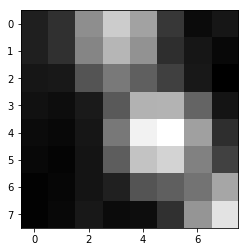

Spot reconstructed from gaussian fit parameters using sigma_min:


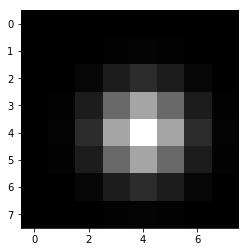

Spot reconstructed from gaussian fit parameters using sigma_max:


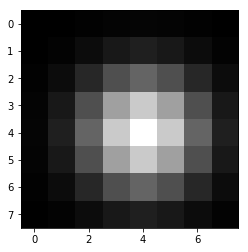

Original crop
[[ 26  34  76 104  85  37  17  22]
 [ 26  34  72  94  78  33  22  16]
 [ 22  23  50  67  55  41  23  12]
 [ 20  18  24  52  92  93  57  21]
 [ 17  16  22  66 121 127  84  33]
 [ 16  14  21  54 100 107  70  42]
 [ 13  15  21  27  50  55  64  87]
 [ 13  16  23  17  18  34  79 114]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  21  14   3   0]
 [  0   1  14  52  81  52  14   1]
 [  0   2  21  81 127  81  21   2]
 [  0   1  14  52  81  52  14   1]
 [  0   0   3  14  21  14   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   1   6  12  15  12   6   1]
 [  1   6  19  39  49  39  19   6]
 [  2  12  39  79 100  79  39  12]
 [  3  15  49 100 127 100  49  15]
 [  2  12  39  79 100  79  39  12]
 [  1   6  19  39  49  39  19   6]
 [  0   1   6  12  15  12   6   1]]

---------------------------------------------------

x: 146.85
y: 236.38
sigma_min

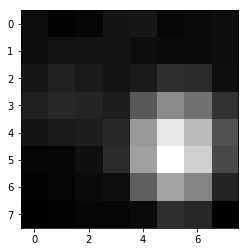

Spot reconstructed from gaussian fit parameters using sigma_min:


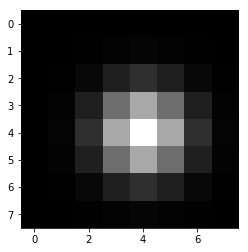

Spot reconstructed from gaussian fit parameters using sigma_max:


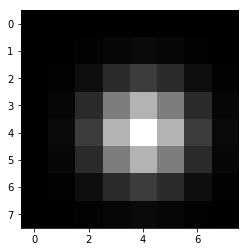

Original crop
[[ 26  22  23  29  30  24  25  26]
 [ 26  28  28  29  26  25  25  26]
 [ 30  34  31  29  31  39  37  27]
 [ 33  36  35  32  55  74  64  40]
 [ 29  31  32  36  79 109  92  52]
 [ 23  23  27  37  82 118 100  49]
 [ 22  23  25  27  57  83  71  35]
 [ 21  22  23  23  25  39  36  21]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  14  21  14   4   0]
 [  0   1  14  50  77  50  14   1]
 [  0   2  21  77 118  77  21   2]
 [  0   1  14  50  77  50  14   1]
 [  0   0   4  14  21  14   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   4   3   1   0]
 [  0   1   6  19  28  19   6   1]
 [  0   3  19  57  82  57  19   3]
 [  0   4  28  82 118  82  28   4]
 [  0   3  19  57  82  57  19   3]
 [  0   1   6  19  28  19   6   1]
 [  0   0   1   3   4   3   1   0]]

---------------------------------------------------

x: 148.16
y: 302.01
sigma_min

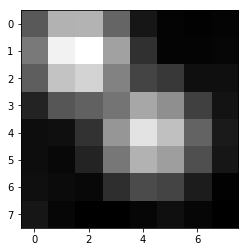

Spot reconstructed from gaussian fit parameters using sigma_min:


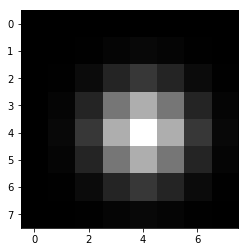

Spot reconstructed from gaussian fit parameters using sigma_max:


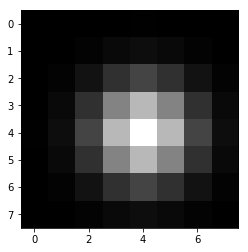

Original crop
[[ 52  92  93  57  21  13  12  13]
 [ 66 121 127  84  33  13  13  14]
 [ 54 100 107  70  42  37  18  18]
 [ 27  50  55  64  87  76  40  20]
 [ 17  18  34  79 114  98  56  23]
 [ 17  15  27  65  92  83  47  21]
 [ 18  16  15  32  45  42  24  12]
 [ 21  14  11  11  14  18  14  11]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   4   2   0   0]
 [  0   0   5  18  27  18   5   0]
 [  0   2  18  58  86  58  18   2]
 [  0   4  27  86 127  86  27   4]
 [  0   2  18  58  86  58  18   2]
 [  0   0   5  18  27  18   5   0]
 [  0   0   0   2   4   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  24  34  24   9   1]
 [  0   4  24  65  91  65  24   4]
 [  0   6  34  91 127  91  34   6]
 [  0   4  24  65  91  65  24   4]
 [  0   1   9  24  34  24   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 149.46
y: 287.62
sigma_min

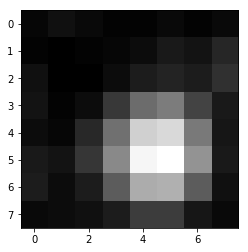

Spot reconstructed from gaussian fit parameters using sigma_min:


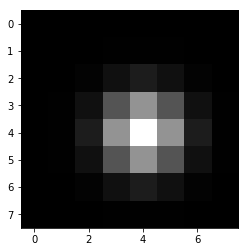

Spot reconstructed from gaussian fit parameters using sigma_max:


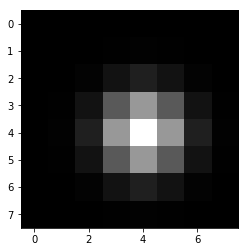

Original crop
[[14 17 15 13 13 15 13 15]
 [13 12 13 14 16 20 18 24]
 [17 12 12 16 21 23 21 27]
 [18 13 16 30 46 51 33 20]
 [16 14 25 47 77 80 50 19]
 [20 18 29 55 89 92 58 20]
 [21 16 21 41 66 67 41 17]
 [15 16 17 21 31 31 19 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0 10 52 92 52 10  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0 11 54 92 54 11  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 151.95
y: 266.46
sigma_min: 1.1325889211406415
sigma_max: 1.1950881459120846
height: 55.77158310909332
max_intensity: 78


Original crop around spot at (151, 266):


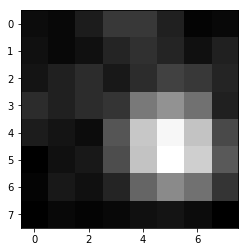

Spot reconstructed from gaussian fit parameters using sigma_min:


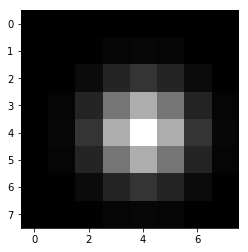

Spot reconstructed from gaussian fit parameters using sigma_max:


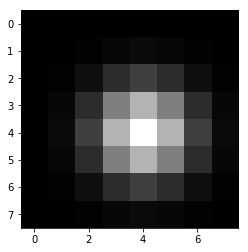

Original crop
[[18 17 22 29 29 23 16 17]
 [19 17 19 24 27 24 19 23]
 [20 23 26 21 26 31 29 24]
 [26 23 26 28 45 51 43 23]
 [22 20 18 36 64 76 63 33]
 [15 19 21 34 63 78 66 37]
 [16 21 19 24 40 49 43 28]
 [15 17 16 17 19 20 18 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 35 52 35 11  1]
 [ 0  2 16 52 78 52 16  2]
 [ 0  1 11 35 52 35 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 19 13  4  0]
 [ 0  2 13 38 54 38 13  2]
 [ 0  3 19 54 78 54 19  3]
 [ 0  2 13 38 54 38 13  2]
 [ 0  0  4 13 19 13  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 153.39
y: 303.19
sigma_min: 1.1447290426628682
sigma_max: 2.3236327034889
height: 54.16764479809261
max_intensity: 98


Original crop around spot at (153, 303):


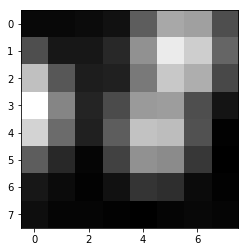

Spot reconstructed from gaussian fit parameters using sigma_min:


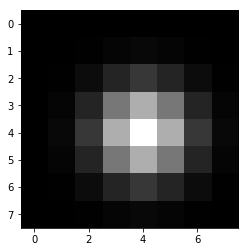

Spot reconstructed from gaussian fit parameters using sigma_max:


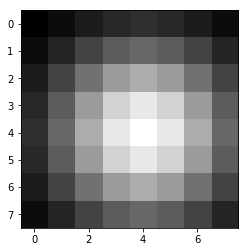

Original crop
[[13 13 14 16 42 68 65 37]
 [37 18 18 24 60 91 81 45]
 [76 40 20 21 52 79 70 35]
 [98 56 23 36 63 64 37 17]
 [83 47 21 42 77 75 38 11]
 [42 24 12 33 60 58 29 10]
 [18 14 11 16 28 26 14 11]
 [15 12 12 11 10 12 13 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 14 21 14  4  0]
 [ 0  2 14 45 66 45 14  2]
 [ 0  3 21 66 98 66 21  3]
 [ 0  2 14 45 66 45 14  2]
 [ 0  0  4 14 21 14  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 5  9 15 20 22 20 15  9]
 [ 9 18 29 38 42 38 29 18]
 [15 29 46 61 67 61 46 29]
 [20 38 61 81 89 81 61 38]
 [22 42 67 89 98 89 67 42]
 [20 38 61 81 89 81 61 38]
 [15 29 46 61 67 61 46 29]
 [ 9 18 29 38 42 38 29 18]]

---------------------------------------------------

x: 154.17
y: 294.43
sigma_min: 0.9481356737845185
sigma_max: 1.0777588364487214
height: 67.88531263407012
max_intensity: 82


Original crop around spot at (154, 294):


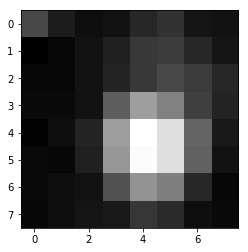

Spot reconstructed from gaussian fit parameters using sigma_min:


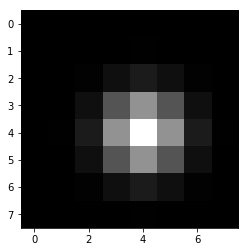

Spot reconstructed from gaussian fit parameters using sigma_max:


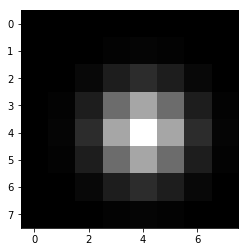

Original crop
[[31 19 15 16 22 25 17 16]
 [11 13 16 20 27 28 22 17]
 [13 13 16 21 27 31 28 22]
 [14 14 16 37 55 47 29 21]
 [12 15 21 55 82 73 39 18]
 [14 13 20 53 81 73 38 16]
 [14 15 16 34 52 46 22 13]
 [13 15 17 18 26 23 15 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  5 26 47 26  5  0]
 [ 0  0  8 47 82 47  8  0]
 [ 0  0  5 26 47 26  5  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 34 53 34  9  1]
 [ 0  1 14 53 82 53 14  1]
 [ 0  1  9 34 53 34  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 154.43
y: 300.05
sigma_min: 0.989162912343523
sigma_max: 1.4444845444036711
height: 67.70604935413941
max_intensity: 91


Original crop around spot at (154, 300):


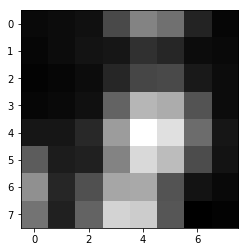

Spot reconstructed from gaussian fit parameters using sigma_min:


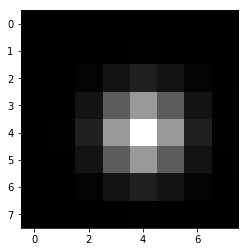

Spot reconstructed from gaussian fit parameters using sigma_max:


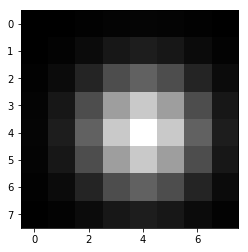

Original crop
[[14 15 16 34 52 46 22 13]
 [13 15 17 18 26 23 15 14]
 [12 13 15 23 33 34 19 15]
 [13 14 16 42 68 65 37 15]
 [18 18 24 60 91 81 45 18]
 [40 20 21 52 79 70 35 17]
 [56 23 36 63 64 37 17 14]
 [47 21 42 77 75 38 11 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 32 54 32  7  0]
 [ 0  0 11 54 91 54 11  0]
 [ 0  0  7 32 54 32  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  4  8 10  8  4  1]
 [ 0  4 13 27 34 27 13  4]
 [ 1  8 27 56 71 56 27  8]
 [ 1 10 34 71 91 71 34 10]
 [ 1  8 27 56 71 56 27  8]
 [ 0  4 13 27 34 27 13  4]
 [ 0  1  4  8 10  8  4  1]]

---------------------------------------------------

x: 154.57
y: 255.74
sigma_min: 1.146513989363525
sigma_max: 1.3836632372758153
height: 52.81603437399548
max_intensity: 88


Original crop around spot at (154, 255):


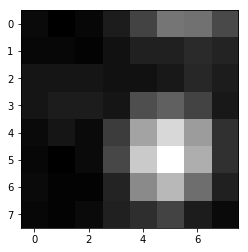

Spot reconstructed from gaussian fit parameters using sigma_min:


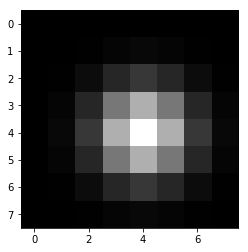

Spot reconstructed from gaussian fit parameters using sigma_max:


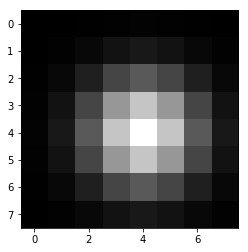

Original crop
[[19 16 18 24 35 49 48 37]
 [18 18 17 21 25 25 28 26]
 [22 22 22 21 21 23 27 24]
 [22 24 24 22 38 43 35 23]
 [19 22 19 33 62 77 60 30]
 [18 16 19 36 73 88 65 30]
 [19 17 17 26 55 68 47 25]
 [18 17 19 25 29 35 24 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 13 19 13  4  0]
 [ 0  1 13 41 60 41 13  1]
 [ 0  2 19 60 88 60 19  2]
 [ 0  1 13 41 60 41 13  1]
 [ 0  0  4 13 19 13  4  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 10 23 30 23 10  2]
 [ 1  6 23 52 67 52 23  6]
 [ 1  8 30 67 88 67 30  8]
 [ 1  6 23 52 67 52 23  6]
 [ 0  2 10 23 30 23 10  2]
 [ 0  0  2  6  8  6  2  0]]

---------------------------------------------------

x: 155.48
y: 249.2
sigma_min: 1.0560913522557307
sigma_max: 1.0733445606865362
height: 67.81619411744713
max_intensity: 79


Original crop around spot at (155, 249):


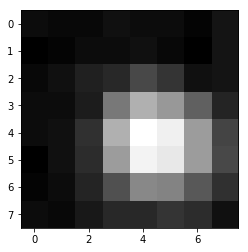

Spot reconstructed from gaussian fit parameters using sigma_min:


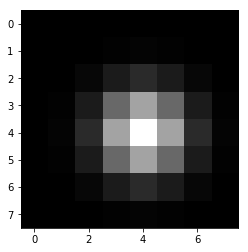

Spot reconstructed from gaussian fit parameters using sigma_max:


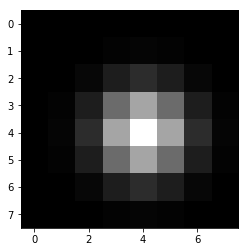

Original crop
[[18 17 17 19 18 18 16 20]
 [15 16 18 18 19 17 15 20]
 [17 19 23 25 33 28 19 20]
 [18 18 22 45 59 53 39 24]
 [18 19 27 59 79 75 54 32]
 [15 19 26 54 76 73 54 33]
 [16 18 24 35 49 48 37 27]
 [18 17 21 25 25 28 26 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 32 50 32  8  0]
 [ 0  1 13 50 79 50 13  1]
 [ 0  0  8 32 50 32  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 13  9  2  0]
 [ 0  1  9 33 51 33  9  1]
 [ 0  1 13 51 79 51 13  1]
 [ 0  1  9 33 51 33  9  1]
 [ 0  0  2  9 13  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 156.92
y: 278.11
sigma_min: 1.0517189455926166
sigma_max: 1.1048454568981987
height: 80.9758746309589
max_intensity: 108


Original crop around spot at (156, 278):


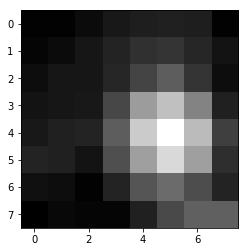

Spot reconstructed from gaussian fit parameters using sigma_min:


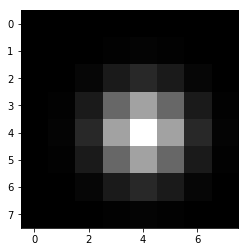

Spot reconstructed from gaussian fit parameters using sigma_max:


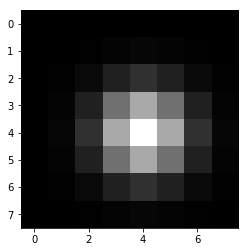

Original crop
[[ 16  16  19  24  26  27  26  16]
 [ 17  19  23  28  33  34  29  22]
 [ 20  23  23  29  40  49  34  20]
 [ 22  23  24  41  72  85  63  27]
 [ 24  27  28  49  89 108  83  38]
 [ 28  27  22  44  73  94  73  32]
 [ 21  20  16  28  46  54  43  28]
 [ 15  18  17  17  27  42  50  50]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  11  17  11   2   0]
 [  0   1  11  43  68  43  11   1]
 [  0   1  17  68 108  68  17   1]
 [  0   1  11  43  68  43  11   1]
 [  0   0   2  11  17  11   2   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  13  20  13   4   0]
 [  0   1  13  47  71  47  13   1]
 [  0   2  20  71 108  71  20   2]
 [  0   1  13  47  71  47  13   1]
 [  0   0   4  13  20  13   4   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 157.05
y: 228.01
sigma_min

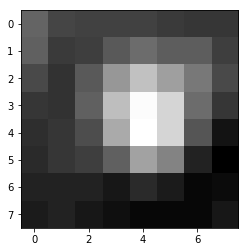

Spot reconstructed from gaussian fit parameters using sigma_min:


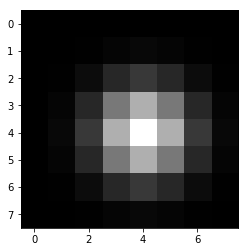

Spot reconstructed from gaussian fit parameters using sigma_max:


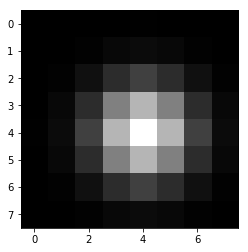

Original crop
[[40 32 31 31 31 29 28 28]
 [39 29 30 37 42 38 38 30]
 [33 27 37 53 64 55 45 33]
 [28 27 39 63 79 69 42 28]
 [26 28 34 58 80 69 36 19]
 [25 28 30 39 56 48 23 14]
 [23 23 23 20 25 21 16 17]
 [21 23 20 18 16 16 16 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 12 17 12  3  0]
 [ 0  1 12 37 54 37 12  1]
 [ 0  2 17 54 80 54 17  2]
 [ 0  1 12 37 54 37 12  1]
 [ 0  0  3 12 17 12  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 14 20 14  5  0]
 [ 0  2 14 40 56 40 14  2]
 [ 0  3 20 56 80 56 20  3]
 [ 0  2 14 40 56 40 14  2]
 [ 0  0  5 14 20 14  5  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 160.06
y: 259.4
sigma_min: 0.9410118562688035
sigma_max: 1.0233101389434685
height: 90.51644244775407
max_intensity: 105


Original crop around spot at (160, 259):


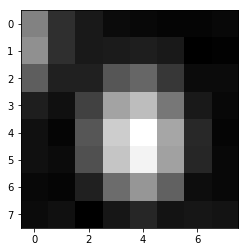

Spot reconstructed from gaussian fit parameters using sigma_min:


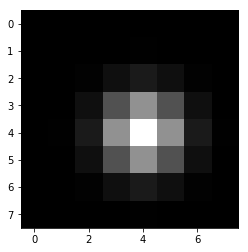

Spot reconstructed from gaussian fit parameters using sigma_max:


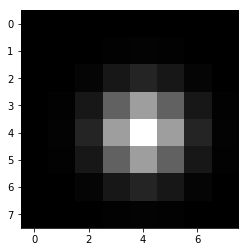

Original crop
[[ 60  30  22  17  16  15  15  16]
 [ 65  30  22  23  24  22  13  14]
 [ 47  25  25  44  50  33  17  17]
 [ 24  19  37  72  81  56  22  16]
 [ 19  15  44  87 105  73  28  15]
 [ 19  17  42  84 101  71  27  16]
 [ 16  15  25  52  67  48  18  16]
 [ 17  19  13  21  27  20  21  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  33  59  33   6   0]
 [  0   0  10  59 105  59  10   0]
 [  0   0   6  33  59  33   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  40  65  40   9   0]
 [  0   1  15  65 105  65  15   1]
 [  0   0   9  40  65  40   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 160.97
y: 305.15
sigma_min

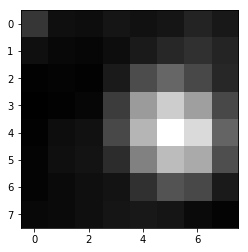

Spot reconstructed from gaussian fit parameters using sigma_min:


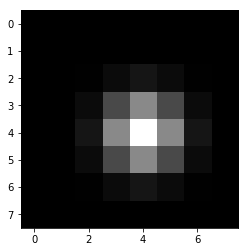

Spot reconstructed from gaussian fit parameters using sigma_max:


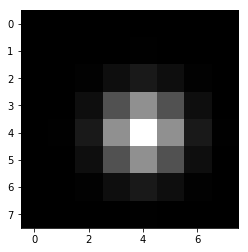

Original crop
[[ 35  17  16  20  18  20  26  21]
 [ 17  14  13  16  22  28  32  27]
 [ 11  12  11  22  45  57  43  28]
 [ 10  11  13  38  81 104  83  43]
 [ 11  16  18  43  93 127 110  56]
 [ 12  17  19  31  69  96  88  46]
 [ 12  15  17  19  32  48  43  22]
 [ 14  15  17  20  21  20  15  12]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  36  68  36   5   0]
 [  0   0  10  68 127  68  10   0]
 [  0   0   5  36  68  36   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   7  40  71  40   7   0]
 [  0   0  12  71 127  71  12   0]
 [  0   0   7  40  71  40   7   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 162.41
y: 235.99
sigma_min

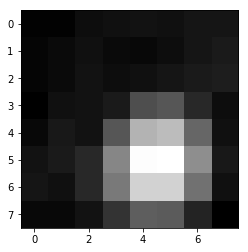

Spot reconstructed from gaussian fit parameters using sigma_min:


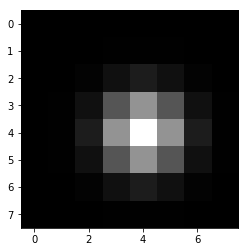

Spot reconstructed from gaussian fit parameters using sigma_max:


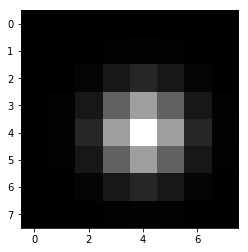

Original crop
[[ 16  16  20  21  22  21  23  23]
 [ 17  19  21  19  18  20  23  25]
 [ 17  19  22  20  21  23  25  26]
 [ 15  21  22  25  44  47  30  20]
 [ 18  24  22  47  82  85  53  21]
 [ 22  25  30  65 109 110  68  24]
 [ 23  21  30  60  93  93  57  21]
 [ 18  18  22  34  50  49  28  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   6  36  63  36   6   0]
 [  0   0  12  63 110  63  12   0]
 [  0   0   6  36  63  36   6   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  10  16  10   2   0]
 [  0   0  10  42  68  42  10   0]
 [  0   1  16  68 110  68  16   1]
 [  0   0  10  42  68  42  10   0]
 [  0   0   2  10  16  10   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 170.65
y: 298.61
sigma_min

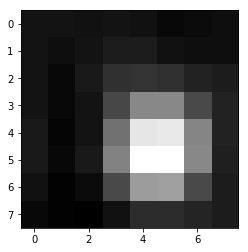

Spot reconstructed from gaussian fit parameters using sigma_min:


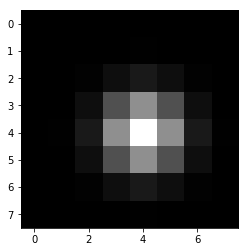

Spot reconstructed from gaussian fit parameters using sigma_max:


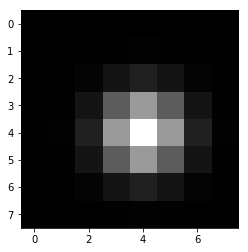

Original crop
[[ 20  20  19  20  19  16  17  18]
 [ 20  18  20  23  23  19  18  18]
 [ 20  16  22  30  31  30  25  23]
 [ 20  16  20  38  61  61  39  25]
 [ 22  15  20  53  94  95  60  25]
 [ 22  16  22  59 103 103  61  24]
 [ 19  14  17  39  68  69  39  23]
 [ 16  14  13  19  29  29  26  23]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  32  57  32   5   0]
 [  0   0  10  57 103  57  10   0]
 [  0   0   5  32  57  32   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  13   8   1   0]
 [  0   0   8  37  62  37   8   0]
 [  0   1  13  62 103  62  13   1]
 [  0   0   8  37  62  37   8   0]
 [  0   0   1   8  13   8   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 173.4
y: 278.89
sigma_min:

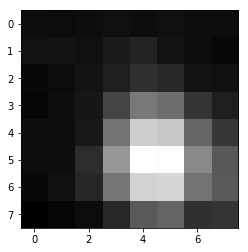

Spot reconstructed from gaussian fit parameters using sigma_min:


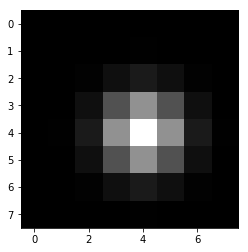

Spot reconstructed from gaussian fit parameters using sigma_max:


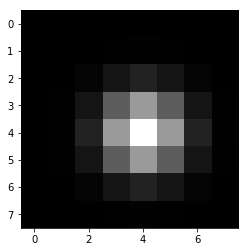

Original crop
[[ 15  14  15  16  15  16  15  15]
 [ 17  17  16  20  23  17  15  13]
 [ 13  14  17  21  28  25  17  16]
 [ 12  15  18  35  54  50  29  21]
 [ 15  15  19  52  85  83  47  30]
 [ 15  15  26  65 103 102  60  42]
 [ 13  16  24  53  87  88  52  43]
 [ 10  12  14  25  43  46  28  29]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  33  58  33   6   0]
 [  0   0  10  58 103  58  10   0]
 [  0   0   6  33  58  33   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  13   8   1   0]
 [  0   0   8  37  62  37   8   0]
 [  0   1  13  62 103  62  13   1]
 [  0   0   8  37  62  37   8   0]
 [  0   0   1   8  13   8   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 175.62
y: 287.36
sigma_min

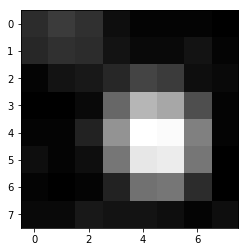

Spot reconstructed from gaussian fit parameters using sigma_min:


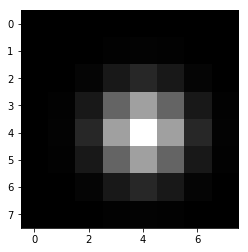

Spot reconstructed from gaussian fit parameters using sigma_max:


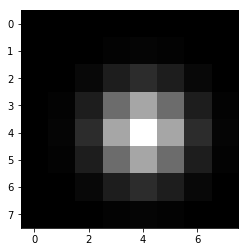

Original crop
[[22 25 23 16 14 14 14 13]
 [21 23 22 17 15 15 17 14]
 [14 17 18 21 27 25 16 15]
 [13 13 15 34 50 47 29 14]
 [14 14 20 43 65 64 39 14]
 [16 14 16 37 60 61 37 13]
 [14 13 14 20 36 37 22 13]
 [15 15 18 17 17 16 14 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 25 40 25  6  0]
 [ 0  0  9 40 65 40  9  0]
 [ 0  0  6 25 40 25  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 27 42 27  7  0]
 [ 0  1 11 42 65 42 11  1]
 [ 0  0  7 27 42 27  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 176.28
y: 262.41
sigma_min: 1.0862582664869522
sigma_max: 1.1258183205127785
height: 43.44759408568891
max_intensity: 63


Original crop around spot at (176, 262):


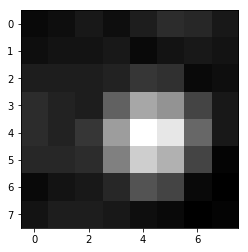

Spot reconstructed from gaussian fit parameters using sigma_min:


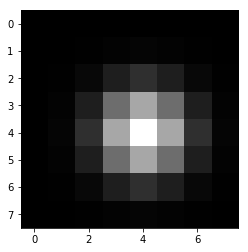

Spot reconstructed from gaussian fit parameters using sigma_max:


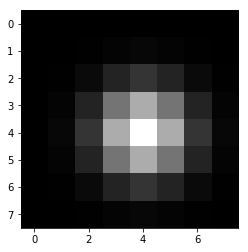

Original crop
[[13 14 16 14 17 20 19 16]
 [14 15 15 16 13 15 16 15]
 [17 17 17 18 22 21 13 14]
 [20 18 17 31 45 41 25 16]
 [20 18 22 43 63 58 32 16]
 [19 19 20 37 53 47 25 12]
 [13 15 16 19 28 25 13 11]
 [15 17 17 16 14 13 11 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 26 41 26  7  0]
 [ 0  1 11 41 63 41 11  1]
 [ 0  0  7 26 41 26  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  1  8 28 42 28  8  1]
 [ 0  1 13 42 63 42 13  1]
 [ 0  1  8 28 42 28  8  1]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 176.8
y: 316.53
sigma_min: 1.1568397465231695
sigma_max: 1.1901848891697135
height: 57.33328945281644
max_intensity: 77


Original crop around spot at (176, 316):


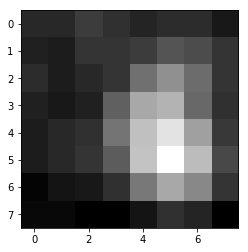

Spot reconstructed from gaussian fit parameters using sigma_min:


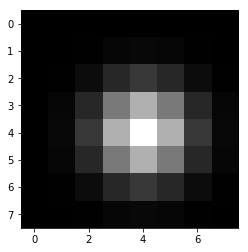

Spot reconstructed from gaussian fit parameters using sigma_max:


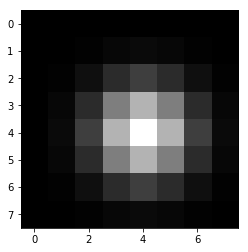

Original crop
[[23 23 28 25 22 24 24 19]
 [21 20 26 26 28 34 32 26]
 [24 20 23 26 41 49 40 26]
 [21 19 21 37 55 58 39 25]
 [20 23 25 42 61 70 53 27]
 [20 23 26 36 62 77 60 31]
 [14 18 19 25 43 55 47 26]
 [15 15 13 13 18 25 22 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 17 11  3  0]
 [ 0  1 11 36 52 36 11  1]
 [ 0  2 17 52 77 52 17  2]
 [ 0  1 11 36 52 36 11  1]
 [ 0  0  3 11 17 11  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 18 13  4  0]
 [ 0  2 13 38 54 38 13  2]
 [ 0  3 18 54 77 54 18  3]
 [ 0  2 13 38 54 38 13  2]
 [ 0  0  4 13 18 13  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 177.72
y: 279.15
sigma_min: 0.958012478575283
sigma_max: 3.6641191187256092
height: 432456.9369923511
max_intensity: 103


Original crop around spot at (177, 279):


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


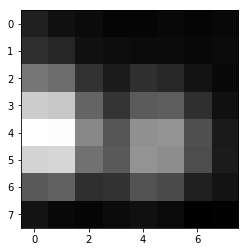

Spot reconstructed from gaussian fit parameters using sigma_min:


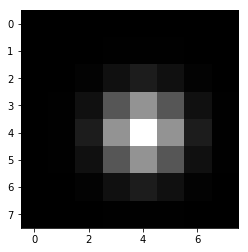

Spot reconstructed from gaussian fit parameters using sigma_max:


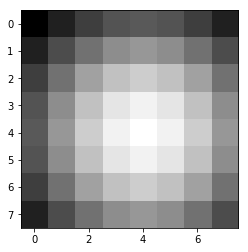

Original crop
[[ 23  17  15  13  13  14  13  14]
 [ 28  25  17  16  15  15  14  15]
 [ 54  50  29  21  28  26  18  14]
 [ 85  83  47  30  44  45  28  17]
 [103 102  60  42  63  64  40  20]
 [ 87  88  52  43  64  62  39  21]
 [ 43  46  28  29  41  38  23  18]
 [ 18  14  13  15  17  15  11  12]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0  11  59 103  59  11   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[ 31  40  48  54  56  54  48  40]
 [ 40  52  63  70  73  70  63  52]
 [ 48  63  76  85  88  85  76  63]
 [ 54  70  85  95  99  95  85  70]
 [ 56  73  88  99 103  99  88  73]
 [ 54  70  85  95  99  95  85  70]
 [ 48  63  76  85  88  85  76  63]
 [ 40  52  63  70  73  70  63  52]]

---------------------------------------------------

x: 180.33
y: 245.14
sigma_min

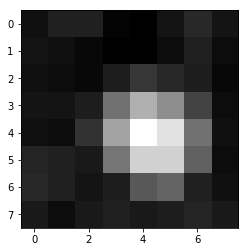

Spot reconstructed from gaussian fit parameters using sigma_min:


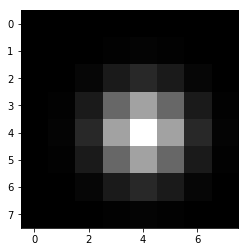

Spot reconstructed from gaussian fit parameters using sigma_max:


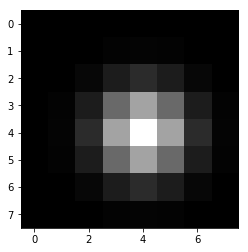

Original crop
[[16 20 20 13 12 17 22 17]
 [17 16 14 12 12 15 20 15]
 [16 15 14 19 25 22 19 14]
 [17 17 19 39 54 46 28 15]
 [16 15 24 51 73 66 39 16]
 [21 20 18 40 62 62 35 15]
 [22 20 17 19 33 36 20 16]
 [18 15 18 20 18 19 21 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 29 46 29  7  0]
 [ 0  1 11 46 73 46 11  1]
 [ 0  0  7 29 46 29  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  7 30 46 30  7  0]
 [ 0  1 12 46 73 46 12  1]
 [ 0  0  7 30 46 30  7  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 182.95
y: 266.33
sigma_min: 0.9944755344229762
sigma_max: 1.0668076238666575
height: 59.895089896670854
max_intensity: 74


Original crop around spot at (182, 266):


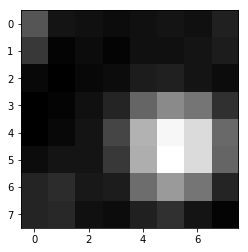

Spot reconstructed from gaussian fit parameters using sigma_min:


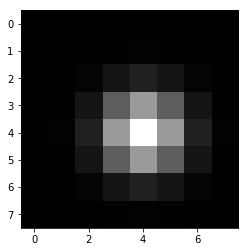

Spot reconstructed from gaussian fit parameters using sigma_max:


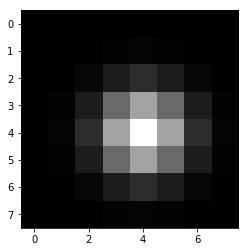

Original crop
[[32 16 15 14 15 16 15 19]
 [25 12 14 12 15 15 16 18]
 [13 11 13 14 18 19 16 14]
 [11 12 15 20 36 45 40 23]
 [11 13 16 28 55 72 65 37]
 [14 16 16 25 54 74 65 36]
 [20 22 17 18 38 49 40 20]
 [20 21 15 14 19 23 16 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 26 44 26  5  0]
 [ 0  0  9 44 74 44  9  0]
 [ 0  0  5 26 44 26  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  8 30 47 30  8  0]
 [ 0  1 12 47 74 47 12  1]
 [ 0  0  8 30 47 30  8  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 183.08
y: 254.43
sigma_min: 0.8767048400663306
sigma_max: 0.9780446168431085
height: 201.96123446962557
max_intensity: 206


Original crop around spot at (183, 254):


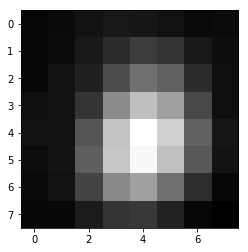

Spot reconstructed from gaussian fit parameters using sigma_min:


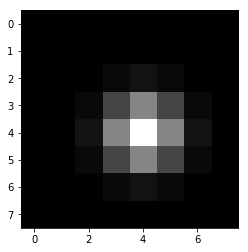

Spot reconstructed from gaussian fit parameters using sigma_max:


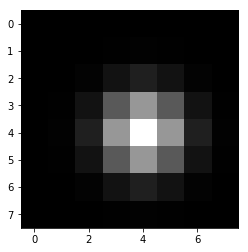

Original crop
[[ 17  19  25  30  28  24  18  20]
 [ 16  20  30  44  58  51  30  22]
 [ 17  24  36  70  97  86  44  23]
 [ 23  25  52 118 157 133  66  23]
 [ 25  24  76 160 206 170  86  28]
 [ 21  26  83 162 200 158  78  26]
 [ 19  24  63 116 133  97  46  17]
 [ 17  17  32  51  55  37  16  11]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  15   7   1   0]
 [  0   0   7  56 107  56   7   0]
 [  0   0  15 107 206 107  15   0]
 [  0   0   7  56 107  56   7   0]
 [  0   0   1   7  15   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  15  25  15   3   0]
 [  0   1  15  72 122  72  15   1]
 [  0   1  25 122 206 122  25   1]
 [  0   1  15  72 122  72  15   1]
 [  0   0   3  15  25  15   3   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 188.97
y: 312.35
sigma_min

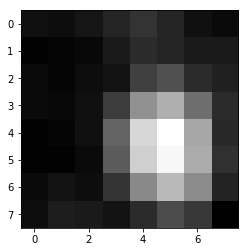

Spot reconstructed from gaussian fit parameters using sigma_min:


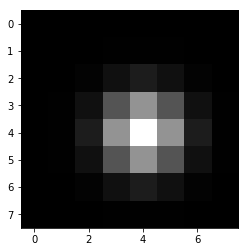

Spot reconstructed from gaussian fit parameters using sigma_max:


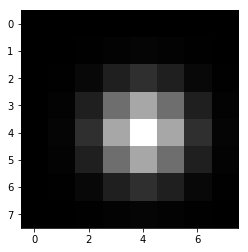

Original crop
[[ 22  21  24  30  35  30  22  20]
 [ 17  18  19  26  32  30  26  26]
 [ 20  18  21  23  40  46  32  28]
 [ 20  19  22  39  70  81  57  32]
 [ 17  18  22  53  96 111  78  31]
 [ 17  17  20  50  93 108  80  34]
 [ 20  23  21  36  67  85  68  29]
 [ 21  27  26  23  32  44  37  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   6  36  63  36   6   0]
 [  0   0  12  63 111  63  12   0]
 [  0   0   6  36  63  36   6   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  13  20  13   3   0]
 [  0   1  13  47  72  47  13   1]
 [  0   2  20  72 111  72  20   2]
 [  0   1  13  47  72  47  13   1]
 [  0   0   3  13  20  13   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 189.88
y: 294.16
sigma_min

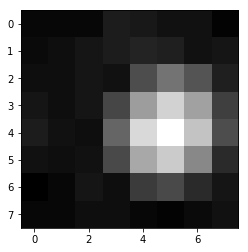

Spot reconstructed from gaussian fit parameters using sigma_min:


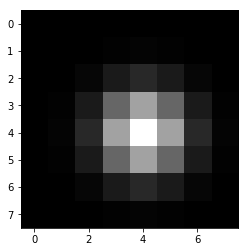

Spot reconstructed from gaussian fit parameters using sigma_max:


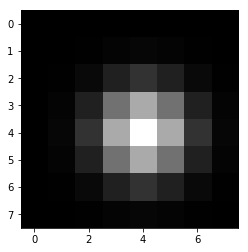

Original crop
[[18 18 18 24 23 21 21 17]
 [19 20 22 24 26 25 21 22]
 [20 20 22 21 38 49 40 25]
 [22 20 22 36 61 76 62 34]
 [24 21 20 45 78 89 72 38]
 [21 20 21 37 64 74 55 28]
 [16 18 22 20 33 37 28 22]
 [18 18 20 20 18 17 19 21]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  9 35 56 35  9  0]
 [ 0  1 14 56 89 56 14  1]
 [ 0  0  9 35 56 35  9  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 17 11  3  0]
 [ 0  1 11 39 59 39 11  1]
 [ 0  2 17 59 89 59 17  2]
 [ 0  1 11 39 59 39 11  1]
 [ 0  0  3 11 17 11  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 192.17
y: 214.37
sigma_min: 1.1549897926109653
sigma_max: 1.1673521060084089
height: 77.76053931349246
max_intensity: 100


Original crop around spot at (192, 214):


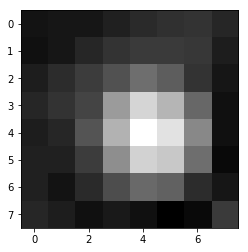

Spot reconstructed from gaussian fit parameters using sigma_min:


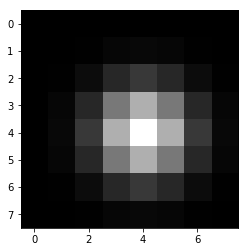

Spot reconstructed from gaussian fit parameters using sigma_max:


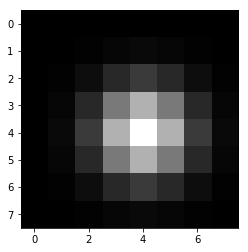

Original crop
[[ 27  28  28  31  34  36  37  33]
 [ 26  28  33  37  39  39  38  30]
 [ 30  35  40  46  55  50  37  28]
 [ 33  37  42  69  87  77  53  26]
 [ 30  33  47  76 100  91  63  26]
 [ 31  31  40  65  86  83  55  24]
 [ 31  27  34  45  54  51  35  28]
 [ 33  30  26  29  26  21  24  39]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   4  15  22  15   4   0]
 [  0   2  15  47  68  47  15   2]
 [  0   3  22  68 100  68  22   3]
 [  0   2  15  47  68  47  15   2]
 [  0   0   4  15  22  15   4   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  15  23  15   5   0]
 [  0   2  15  48  69  48  15   2]
 [  0   3  23  69 100  69  23   3]
 [  0   2  15  48  69  48  15   2]
 [  0   0   5  15  23  15   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 194.72
y: 323.99
sigma_min

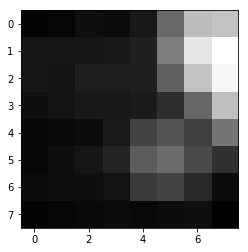

Spot reconstructed from gaussian fit parameters using sigma_min:


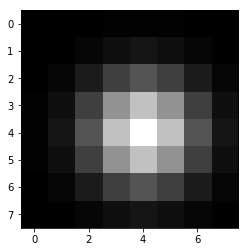

Spot reconstructed from gaussian fit parameters using sigma_max:


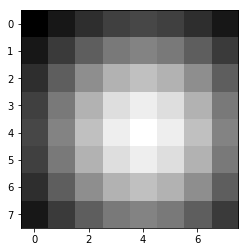

Original crop
[[11 12 15 14 18 44 71 73]
 [17 17 17 18 21 51 85 93]
 [17 16 20 20 21 42 73 90]
 [15 16 18 18 19 25 43 72]
 [12 13 14 19 32 37 31 48]
 [12 15 17 22 40 45 34 26]
 [14 15 15 16 29 32 23 14]
 [11 12 13 14 13 14 15 10]]
Reconstructed using sigma min
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2 10 23 30 23 10  2]
 [ 0  5 23 53 70 53 23  5]
 [ 1  7 30 70 93 70 30  7]
 [ 0  5 23 53 70 53 23  5]
 [ 0  2 10 23 30 23 10  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[13 21 28 34 36 34 28 21]
 [21 32 43 51 54 51 43 32]
 [28 43 57 69 73 69 57 43]
 [34 51 69 82 87 82 69 51]
 [36 54 73 87 93 87 73 54]
 [34 51 69 82 87 82 69 51]
 [28 43 57 69 73 69 57 43]
 [21 32 43 51 54 51 43 32]]

---------------------------------------------------

x: 196.03
y: 286.97
sigma_min: 0.918059444891111
sigma_max: 0.950677448401125
height: 129.41296195770946
max_intensity: 149


Original crop around spot at (196, 286):


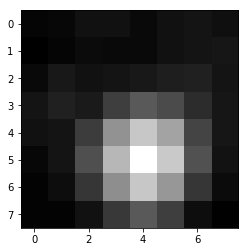

Spot reconstructed from gaussian fit parameters using sigma_min:


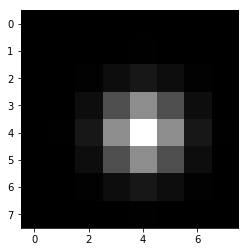

Spot reconstructed from gaussian fit parameters using sigma_max:


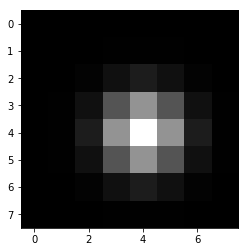

Original crop
[[ 17  18  23  23  19  23  25  22]
 [ 14  17  20  19  19  23  25  26]
 [ 19  27  23  25  27  30  31  25]
 [ 25  31  28  47  61  54  38  26]
 [ 23  25  46  91 119 101  50  26]
 [ 18  25  56 111 149 120  57  24]
 [ 16  21  43  89 119  94  43  20]
 [ 16  16  23  44  61  47  21  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  45  82  45   7   0]
 [  0   0  13  82 149  82  13   0]
 [  0   0   7  45  82  45   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   9  16   9   1   0]
 [  0   0   9  49  85  49   9   0]
 [  0   1  16  85 149  85  16   1]
 [  0   0   9  49  85  49   9   0]
 [  0   0   1   9  16   9   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 196.36
y: 218.06
sigma_min

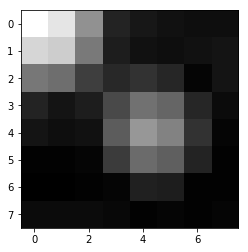

Spot reconstructed from gaussian fit parameters using sigma_min:


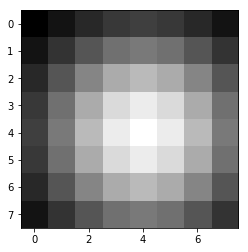

Spot reconstructed from gaussian fit parameters using sigma_max:


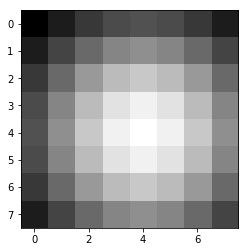

Original crop
[[100  91  63  26  22  20  19  19]
 [ 86  83  55  24  20  19  20  21]
 [ 54  51  35  28  31  27  16  21]
 [ 26  21  24  39  52  48  27  18]
 [ 21  19  20  45  65  58  31  16]
 [ 15  15  16  34  50  46  26  15]
 [ 14  14  15  16  25  24  15  15]
 [ 18  18  18  17  15  16  15  16]]
Reconstructed using sigma min
[[ 10  17  24  30  32  30  24  17]
 [ 17  28  40  49  53  49  40  28]
 [ 24  40  57  70  75  70  57  40]
 [ 30  49  70  87  93  87  70  49]
 [ 32  53  75  93 100  93  75  53]
 [ 30  49  70  87  93  87  70  49]
 [ 24  40  57  70  75  70  57  40]
 [ 17  28  40  49  53  49  40  28]]
Reconstructed using sigma max
[[ 22  31  39  45  47  45  39  31]
 [ 31  43  54  63  65  63  54  43]
 [ 39  54  69  79  83  79  69  54]
 [ 45  63  79  91  95  91  79  63]
 [ 47  65  83  95 100  95  83  65]
 [ 45  63  79  91  95  91  79  63]
 [ 39  54  69  79  83  79  69  54]
 [ 31  43  54  63  65  63  54  43]]

---------------------------------------------------

x: 196.42
y: 320.06
sigma_min

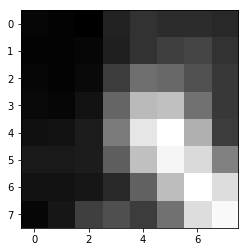

Spot reconstructed from gaussian fit parameters using sigma_min:


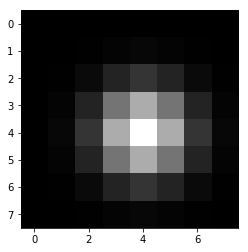

Spot reconstructed from gaussian fit parameters using sigma_max:


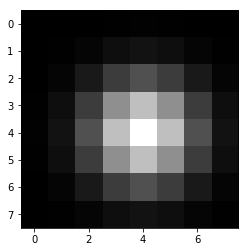

Original crop
[[14 13 12 23 28 26 26 25]
 [13 13 14 22 28 32 34 28]
 [14 13 15 31 47 45 38 30]
 [15 14 18 44 71 73 48 30]
 [17 18 21 51 85 93 68 31]
 [20 20 21 42 73 90 81 53]
 [18 18 19 25 43 72 93 82]
 [14 19 32 37 31 48 82 91]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 12 19 12  3  0]
 [ 0  1 12 42 62 42 12  1]
 [ 0  2 19 62 93 62 19  2]
 [ 0  1 12 42 62 42 12  1]
 [ 0  0  3 12 19 12  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  9 21 29 21  9  2]
 [ 0  5 21 52 69 52 21  5]
 [ 0  6 29 69 93 69 29  6]
 [ 0  5 21 52 69 52 21  5]
 [ 0  2  9 21 29 21  9  2]
 [ 0  0  2  5  6  5  2  0]]

---------------------------------------------------

x: 197.21
y: 238.6
sigma_min: 1.0707305213692193
sigma_max: 1.0813936858065136
height: 107.39408125786223
max_intensity: 130


Original crop around spot at (197, 238):


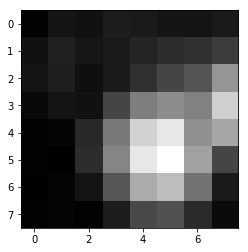

Spot reconstructed from gaussian fit parameters using sigma_min:


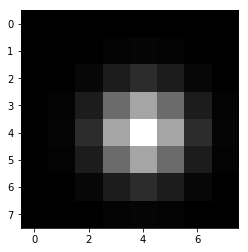

Spot reconstructed from gaussian fit parameters using sigma_max:


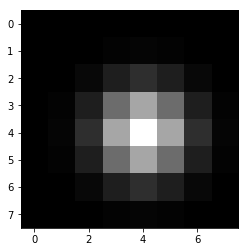

Original crop
[[ 16  24  23  28  27  24  24  27]
 [ 23  30  25  27  32  35  37  42]
 [ 24  29  22  27  37  46  53  82]
 [ 19  24  23  46  72  78  73 108]
 [ 16  17  33  70 109 119  80  90]
 [ 16  15  35  75 119 130  88  46]
 [ 15  17  24  54  92 100  67  27]
 [ 16  17  16  28  48  52  34  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  22  14   3   0]
 [  0   1  14  54  84  54  14   1]
 [  0   2  22  84 130  84  22   2]
 [  0   1  14  54  84  54  14   1]
 [  0   0   3  14  22  14   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  15  23  15   4   0]
 [  0   1  15  55  84  55  15   1]
 [  0   2  23  84 130  84  23   2]
 [  0   1  15  55  84  55  15   1]
 [  0   0   4  15  23  15   4   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 197.86
y: 345.02
sigma_min

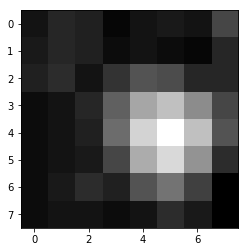

Spot reconstructed from gaussian fit parameters using sigma_min:


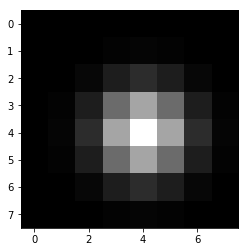

Spot reconstructed from gaussian fit parameters using sigma_max:


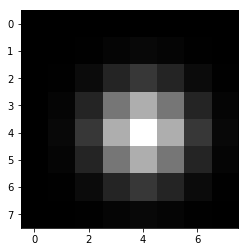

Original crop
[[11 14 13  9 11 12 11 19]
 [12 14 13 10 11 10  9 14]
 [13 15 11 16 21 20 14 14]
 [10 11 14 23 34 38 30 19]
 [10 11 13 25 41 48 38 21]
 [10 11 12 19 35 42 31 15]
 [10 12 15 13 21 26 18  8]
 [10 11 11 10 11 15 12  8]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  5 20 31 20  5  0]
 [ 0  0  8 31 48 31  8  0]
 [ 0  0  5 20 31 20  5  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  7 10  7  2  0]
 [ 0  1  7 22 32 22  7  1]
 [ 0  1 10 32 48 32 10  1]
 [ 0  1  7 22 32 22  7  1]
 [ 0  0  2  7 10  7  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 199.17
y: 322.94
sigma_min: 1.2621763173444127
sigma_max: 1.315261713069025
height: 71.11233356935509
max_intensity: 104


Original crop around spot at (199, 322):


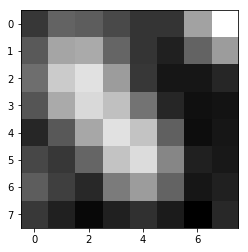

Spot reconstructed from gaussian fit parameters using sigma_min:


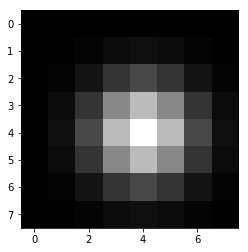

Spot reconstructed from gaussian fit parameters using sigma_max:


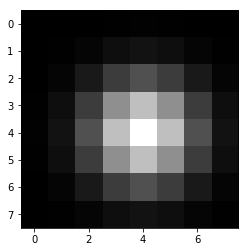

Original crop
[[ 31  47  45  38  30  30  70 104]
 [ 44  71  73  48  30  23  47  68]
 [ 51  85  93  68  31  19  19  25]
 [ 42  73  90  81  53  25  17  18]
 [ 25  43  72  93  82  46  16  19]
 [ 37  31  48  82  91  60  23  20]
 [ 45  34  26  56  68  47  19  23]
 [ 32  23  14  23  29  21  11  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   8  21  29  21   8   1]
 [  0   4  21  55  75  55  21   4]
 [  0   6  29  75 104  75  29   6]
 [  0   4  21  55  75  55  21   4]
 [  0   1   8  21  29  21   8   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   5   7   5   2   0]
 [  0   2  10  24  32  24  10   2]
 [  0   5  24  58  77  58  24   5]
 [  1   7  32  77 104  77  32   7]
 [  0   5  24  58  77  58  24   5]
 [  0   2  10  24  32  24  10   2]
 [  0   0   2   5   7   5   2   0]]

---------------------------------------------------

x: 199.95
y: 311.56
sigma_min

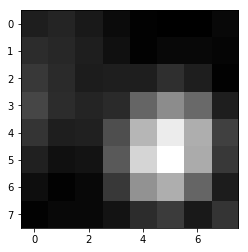

Spot reconstructed from gaussian fit parameters using sigma_min:


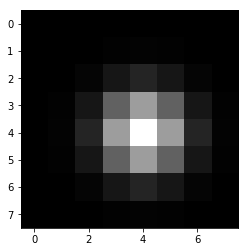

Spot reconstructed from gaussian fit parameters using sigma_max:


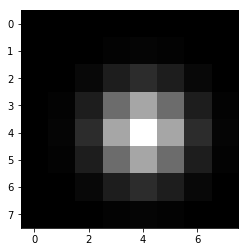

Original crop
[[ 25  27  23  18  15  14  14  17]
 [ 30  28  25  20  15  17  17  16]
 [ 34  29  24  25  25  31  25  15]
 [ 39  30  27  29  50  64  52  25]
 [ 33  25  26  42  79  98  76  37]
 [ 26  20  21  46  90 105  75  34]
 [ 19  15  17  34  66  76  50  24]
 [ 15  17  17  21  30  35  23  33]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  39  64  39   9   0]
 [  0   1  15  64 105  64  15   1]
 [  0   0   9  39  64  39   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  18  12   3   0]
 [  0   1  12  44  68  44  12   1]
 [  0   2  18  68 105  68  18   2]
 [  0   1  12  44  68  44  12   1]
 [  0   0   3  12  18  12   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 200.35
y: 301.62
sigma_min

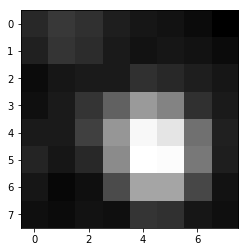

Spot reconstructed from gaussian fit parameters using sigma_min:


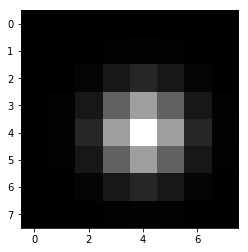

Spot reconstructed from gaussian fit parameters using sigma_max:


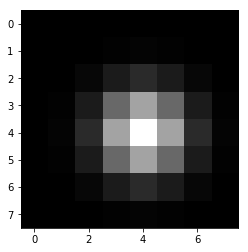

Original crop
[[23 27 25 20 18 17 15 12]
 [21 26 24 19 17 18 17 15]
 [15 18 19 19 25 23 20 18]
 [16 19 26 38 53 47 25 19]
 [19 19 29 52 78 73 42 21]
 [22 18 23 49 80 79 44 20]
 [18 14 16 32 56 56 31 17]
 [16 15 17 16 26 25 18 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 30 49 30  7  0]
 [ 0  1 11 49 80 49 11  1]
 [ 0  0  7 30 49 30  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 32 51 32  8  0]
 [ 0  1 13 51 80 51 13  1]
 [ 0  0  8 32 51 32  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 200.48
y: 236.64
sigma_min: 1.2813171302739088
sigma_max: 1.4680296126498127
height: 99.23779817996486
max_intensity: 130


Original crop around spot at (200, 236):


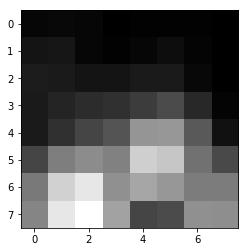

Spot reconstructed from gaussian fit parameters using sigma_min:


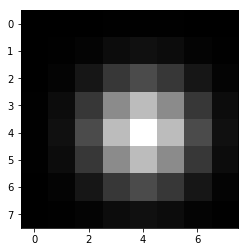

Spot reconstructed from gaussian fit parameters using sigma_max:


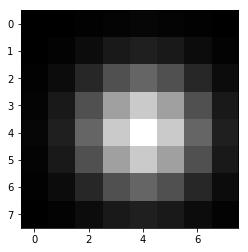

Original crop
[[ 18  19  18  15  16  16  16  15]
 [ 24  25  18  16  18  21  17  15]
 [ 28  27  24  24  27  27  19  15]
 [ 27  32  35  37  42  49  33  17]
 [ 27  37  46  53  82  83  55  23]
 [ 46  72  78  73 108 104  66  48]
 [ 70 109 119  80  90  83  71  71]
 [ 75 119 130  88  46  49  80  79]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  11  28  38  28  11   2]
 [  0   6  28  70  95  70  28   6]
 [  0   8  38  95 130  95  38   8]
 [  0   6  28  70  95  70  28   6]
 [  0   2  11  28  38  28  11   2]
 [  0   0   2   6   8   6   2   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   1   6  12  16  12   6   1]
 [  1   6  20  40  51  40  20   6]
 [  2  12  40  81 103  81  40  12]
 [  3  16  51 103 130 103  51  16]
 [  2  12  40  81 103  81  40  12]
 [  1   6  20  40  51  40  20   6]
 [  0   1   6  12  16  12   6   1]]

---------------------------------------------------

x: 201.92
y: 287.76
sigma_min

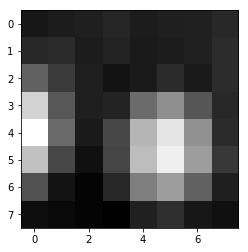

Spot reconstructed from gaussian fit parameters using sigma_min:


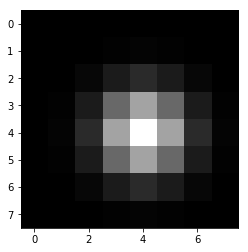

Spot reconstructed from gaussian fit parameters using sigma_max:


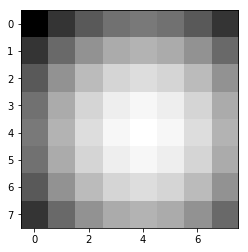

Original crop
[[ 23  25  26  29  25  26  27  30]
 [ 30  31  25  28  24  25  27  32]
 [ 54  38  26  21  24  31  24  32]
 [101  50  26  28  58  73  49  30]
 [120  57  24  43  89 109  74  31]
 [ 94  43  20  42  92 113  79  37]
 [ 47  21  15  30  66  79  54  26]
 [ 19  17  15  13  27  33  23  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  20  12   3   0]
 [  0   1  12  49  76  49  12   1]
 [  0   2  20  76 120  76  20   2]
 [  0   1  12  49  76  49  12   1]
 [  0   0   3  12  20  12   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[101 105 107 109 110 109 107 105]
 [105 109 111 113 114 113 111 109]
 [107 111 114 116 117 116 114 111]
 [109 113 116 118 119 118 116 113]
 [110 114 117 119 120 119 117 114]
 [109 113 116 118 119 118 116 113]
 [107 111 114 116 117 116 114 111]
 [105 109 111 113 114 113 111 109]]

---------------------------------------------------

x: 202.18
y: 317.71
sigma_min

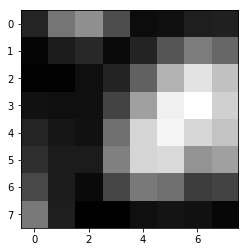

Spot reconstructed from gaussian fit parameters using sigma_min:


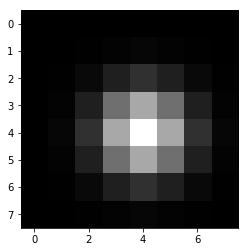

Spot reconstructed from gaussian fit parameters using sigma_max:


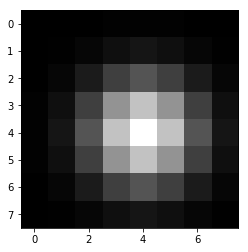

Original crop
[[ 34  66  76  50  24  25  31  32]
 [ 21  30  35  23  33  53  69  60]
 [ 20  20  25  33  58  91 110  96]
 [ 26  25  25  46  83 115 121 102]
 [ 34  28  26  64 104 117 105  97]
 [ 38  30  30  70 104 106  78  83]
 [ 48  30  23  47  68  64  43  46]
 [ 68  31  19  19  25  27  26  22]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  15  22  15   4   0]
 [  0   1  15  52  79  52  15   1]
 [  0   2  22  79 121  79  22   2]
 [  0   1  15  52  79  52  15   1]
 [  0   0   4  15  22  15   4   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   7   9   7   3   0]
 [  0   3  13  30  39  30  13   3]
 [  1   7  30  69  91  69  30   7]
 [  1   9  39  91 121  91  39   9]
 [  1   7  30  69  91  69  30   7]
 [  0   3  13  30  39  30  13   3]
 [  0   0   3   7   9   7   3   0]]

---------------------------------------------------

x: 202.7
y: 239.26
sigma_min:

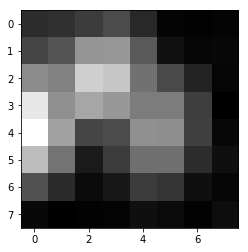

Spot reconstructed from gaussian fit parameters using sigma_min:


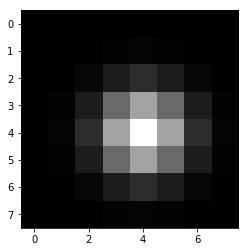

Spot reconstructed from gaussian fit parameters using sigma_max:


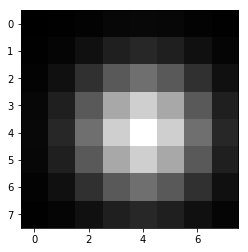

Original crop
[[ 35  37  42  49  33  17  16  17]
 [ 46  53  82  83  55  23  18  19]
 [ 78  73 108 104  66  48  31  18]
 [119  80  90  83  71  71  43  15]
 [130  88  46  49  80  79  44  19]
 [100  67  27  42  65  65  35  22]
 [ 52  34  20  26  42  39  22  18]
 [ 19  15  16  17  22  20  16  21]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  22  14   3   0]
 [  0   1  14  53  83  53  14   1]
 [  0   2  22  83 130  83  22   2]
 [  0   1  14  53  83  53  14   1]
 [  0   0   3  14  22  14   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   2   3   4   3   2   0]
 [  0   3   8  16  19  16   8   3]
 [  2   8  24  45  56  45  24   8]
 [  3  16  45  85 105  85  45  16]
 [  4  19  56 105 130 105  56  19]
 [  3  16  45  85 105  85  45  16]
 [  2   8  24  45  56  45  24   8]
 [  0   3   8  16  19  16   8   3]]

---------------------------------------------------

x: 202.83
y: 331.7
sigma_min:

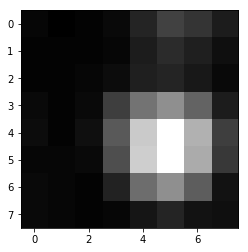

Spot reconstructed from gaussian fit parameters using sigma_min:


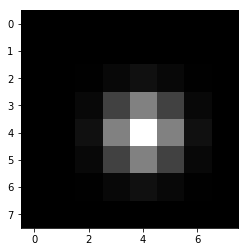

Spot reconstructed from gaussian fit parameters using sigma_max:


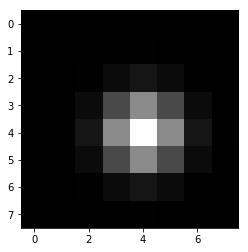

Original crop
[[10  8  9 11 20 29 25 17]
 [ 9  9  9 10 17 22 18 13]
 [ 9  9 10 12 18 20 16 11]
 [11  9 11 28 45 54 40 17]
 [12  9 13 37 73 90 65 28]
 [10 10 11 33 74 90 63 26]
 [11 10  9 19 43 54 38 14]
 [11 10  9 10 15 20 14 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5  3  0  0]
 [ 0  0  3 23 45 23  3  0]
 [ 0  0  5 45 90 45  5  0]
 [ 0  0  3 23 45 23  3  0]
 [ 0  0  0  3  5  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  7 48 90 48  7  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 203.49
y: 325.69
sigma_min: 1.17421138159228
sigma_max: 3.8660304663418277
height: 20481627.31791818
max_intensity: 91


Original crop around spot at (203, 325):


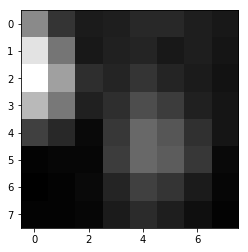

Spot reconstructed from gaussian fit parameters using sigma_min:


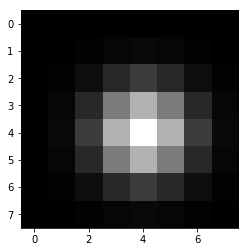

Spot reconstructed from gaussian fit parameters using sigma_max:


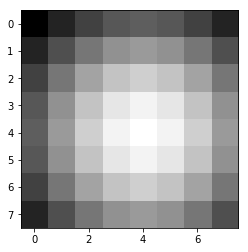

Original crop
[[53 25 17 18 21 21 18 16]
 [82 46 16 19 20 16 18 15]
 [91 60 23 20 25 20 17 14]
 [68 47 19 23 33 28 19 15]
 [29 21 11 26 42 36 24 15]
 [ 9 10 10 28 42 38 26 11]
 [ 8  9 11 20 29 25 17 10]
 [ 9  9 10 17 22 18 13  9]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 14 21 14  5  0]
 [ 0  2 14 44 63 44 14  2]
 [ 0  3 21 63 91 63 21  3]
 [ 0  2 14 44 63 44 14  2]
 [ 0  0  5 14 21 14  5  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[31 39 46 51 53 51 46 39]
 [39 49 58 65 67 65 58 49]
 [46 58 69 76 79 76 69 58]
 [51 65 76 85 88 85 76 65]
 [53 67 79 88 91 88 79 67]
 [51 65 76 85 88 85 76 65]
 [46 58 69 76 79 76 69 58]
 [39 49 58 65 67 65 58 49]]

---------------------------------------------------

x: 203.88
y: 315.62
sigma_min: 1.3586264722160122
sigma_max: 1.64996290612741
height: 106.37982945478394
max_intensity: 121


Original crop around spot at (203, 315):


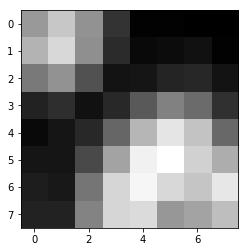

Spot reconstructed from gaussian fit parameters using sigma_min:


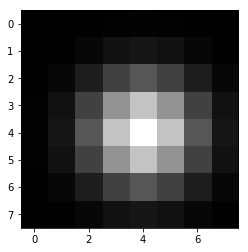

Spot reconstructed from gaussian fit parameters using sigma_max:


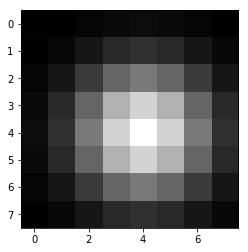

Original crop
[[ 79  98  76  37  17  17  16  16]
 [ 90 105  75  34  20  21  23  17]
 [ 66  76  50  24  25  31  32  24]
 [ 30  35  23  33  53  69  60  36]
 [ 20  25  33  58  91 110  96  59]
 [ 25  25  46  83 115 121 102  87]
 [ 28  26  64 104 117 105  97 111]
 [ 30  30  70 104 106  78  83  94]]
Reconstructed using sigma min
[[  0   0   0   1   1   1   0   0]
 [  0   0   3   8  10   8   3   0]
 [  0   3  13  31  40  31  13   3]
 [  1   8  31  70  92  70  31   8]
 [  1  10  40  92 121  92  40  10]
 [  1   8  31  70  92  70  31   8]
 [  0   3  13  31  40  31  13   3]
 [  0   0   3   8  10   8   3   0]]
Reconstructed using sigma max
[[  0   1   3   5   6   5   3   1]
 [  1   4  11  19  23  19  11   4]
 [  3  11  27  48  58  48  27  11]
 [  5  19  48  83 100  83  48  19]
 [  6  23  58 100 121 100  58  23]
 [  5  19  48  83 100  83  48  19]
 [  3  11  27  48  58  48  27  11]
 [  1   4  11  19  23  19  11   4]]

---------------------------------------------------

x: 206.1
y: 317.45
sigma_min:

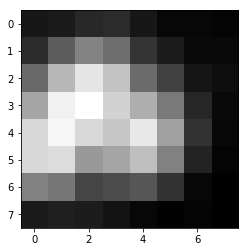

Spot reconstructed from gaussian fit parameters using sigma_min:


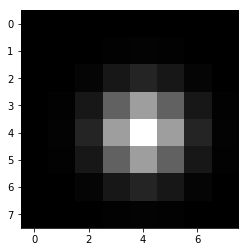

Spot reconstructed from gaussian fit parameters using sigma_max:


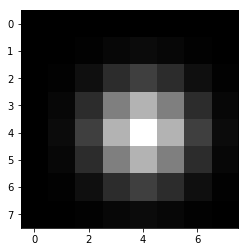

Original crop
[[ 24  25  31  32  24  17  17  16]
 [ 33  53  69  60  36  26  18  18]
 [ 58  91 110  96  59  42  23  20]
 [ 83 115 121 102  87  65  30  18]
 [104 117 105  97 111  81  35  17]
 [104 106  78  83  94  68  29  16]
 [ 68  64  43  46  50  35  17  14]
 [ 25  27  26  22  17  15  16  14]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0  10  46  74  46  10   0]
 [  0   1  17  74 121  74  17   1]
 [  0   0  10  46  74  46  10   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   3   5   3   1   0]
 [  0   1   7  21  30  21   7   1]
 [  0   3  21  60  85  60  21   3]
 [  0   5  30  85 121  85  30   5]
 [  0   3  21  60  85  60  21   3]
 [  0   1   7  21  30  21   7   1]
 [  0   0   1   3   5   3   1   0]]

---------------------------------------------------

x: 208.69
y: 149.11
sigma_min

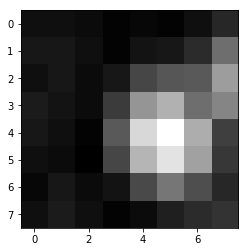

Spot reconstructed from gaussian fit parameters using sigma_min:


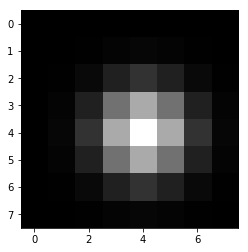

Spot reconstructed from gaussian fit parameters using sigma_max:


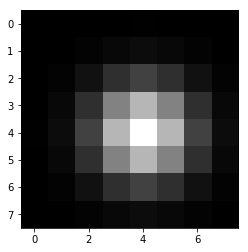

Original crop
[[17 17 16 14 15 14 17 23]
 [19 19 17 14 18 19 24 41]
 [17 19 16 19 31 35 36 53]
 [20 18 16 28 51 58 41 47]
 [19 17 14 36 68 78 57 29]
 [17 16 13 31 59 71 54 27]
 [15 19 16 18 32 43 33 23]
 [17 20 17 14 16 21 24 26]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2 10 15 10  2  0]
 [ 0  1 10 34 51 34 10  1]
 [ 0  1 15 51 78 51 15  1]
 [ 0  1 10 34 51 34 10  1]
 [ 0  0  2 10 15 10  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 14 20 14  5  0]
 [ 0  2 14 39 55 39 14  2]
 [ 0  3 20 55 78 55 20  3]
 [ 0  2 14 39 55 39 14  2]
 [ 0  0  5 14 20 14  5  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 208.98
y: 247.89
sigma_min: 1.3164313049768632
sigma_max: 1.340754545720476
height: 34.25378299254176
max_intensity: 55


Original crop around spot at (208, 247):


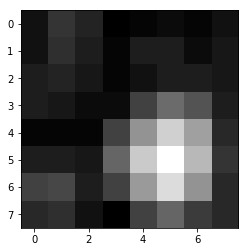

Spot reconstructed from gaussian fit parameters using sigma_min:


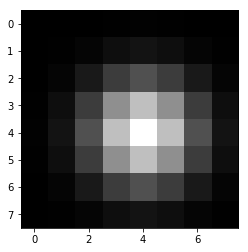

Spot reconstructed from gaussian fit parameters using sigma_max:


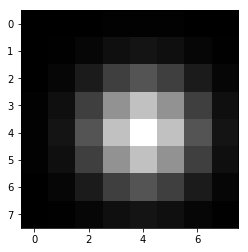

Original crop
[[15 21 18 12 13 14 13 15]
 [15 20 17 13 17 17 14 16]
 [17 18 16 13 15 17 17 16]
 [17 16 14 14 23 30 26 17]
 [13 13 13 23 37 47 39 19]
 [17 17 16 29 46 55 43 21]
 [23 24 17 23 38 49 37 19]
 [19 20 15 12 23 29 22 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  5 12 17 12  5  1]
 [ 0  3 12 30 41 30 12  3]
 [ 0  4 17 41 55 41 17  4]
 [ 0  3 12 30 41 30 12  3]
 [ 0  1  5 12 17 12  5  1]
 [ 0  0  1  3  4  3  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  5 13 18 13  5  1]
 [ 0  3 13 31 41 31 13  3]
 [ 0  4 18 41 55 41 18  4]
 [ 0  3 13 31 41 31 13  3]
 [ 0  1  5 13 18 13  5  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 212.24
y: 146.95
sigma_min: 1.4547659347351964
sigma_max: 1.4708841350377269
height: 53.01153868200865
max_intensity: 78


Original crop around spot at (212, 146):


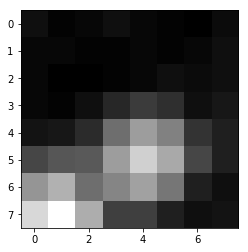

Spot reconstructed from gaussian fit parameters using sigma_min:


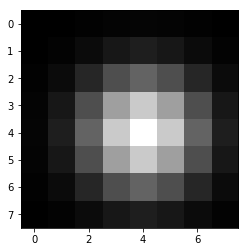

Spot reconstructed from gaussian fit parameters using sigma_max:


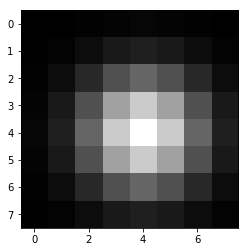

Original crop
[[17 14 15 17 15 14 13 16]
 [15 15 14 14 15 14 15 17]
 [15 13 13 14 15 17 16 17]
 [15 14 17 23 28 25 17 19]
 [18 19 24 41 53 46 26 21]
 [31 35 36 53 66 56 31 21]
 [51 58 41 47 54 43 21 17]
 [68 78 57 29 29 21 17 18]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  7  9  7  3  1]
 [ 0  3 11 23 30 23 11  3]
 [ 1  7 23 48 61 48 23  7]
 [ 1  9 30 61 78 61 30  9]
 [ 1  7 23 48 61 48 23  7]
 [ 0  3 11 23 30 23 11  3]
 [ 0  1  3  7  9  7  3  1]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  7  9  7  3  1]
 [ 0  3 12 24 30 24 12  3]
 [ 1  7 24 49 61 49 24  7]
 [ 1  9 30 61 78 61 30  9]
 [ 1  7 24 49 61 49 24  7]
 [ 0  3 12 24 30 24 12  3]
 [ 0  1  3  7  9  7  3  1]]

---------------------------------------------------

x: 212.75
y: 222.89
sigma_min: 1.0730390473071354
sigma_max: 1.0918030049323157
height: 80.41137503783052
max_intensity: 101


Original crop around spot at (212, 222):


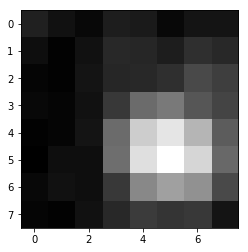

Spot reconstructed from gaussian fit parameters using sigma_min:


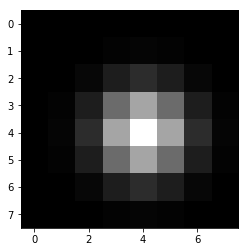

Spot reconstructed from gaussian fit parameters using sigma_max:


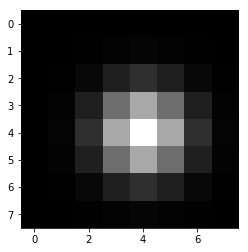

Original crop
[[ 26  21  18  25  24  18  22  22]
 [ 20  16  21  29  28  25  31  29]
 [ 17  16  22  28  29  31  40  36]
 [ 18  17  21  34  51  56  44  38]
 [ 16  17  22  51  84  92  76  46]
 [ 15  20  20  52  90 101  87  50]
 [ 18  21  20  34  61  69  64  40]
 [ 17  16  21  29  35  33  34  22]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  11  17  11   3   0]
 [  0   1  11  42  65  42  11   1]
 [  0   2  17  65 101  65  17   2]
 [  0   1  11  42  65  42  11   1]
 [  0   0   3  11  17  11   3   0]
 [  0   0   0   1   2   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  18  12   3   0]
 [  0   1  12  43  66  43  12   1]
 [  0   2  18  66 101  66  18   2]
 [  0   1  12  43  66  43  12   1]
 [  0   0   3  12  18  12   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 214.08
y: 310.78
sigma_min

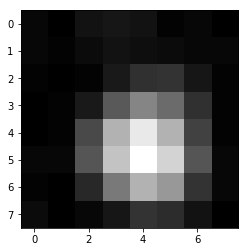

Spot reconstructed from gaussian fit parameters using sigma_min:


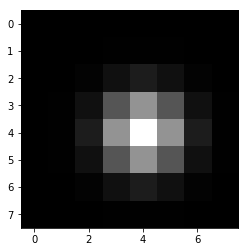

Spot reconstructed from gaussian fit parameters using sigma_max:


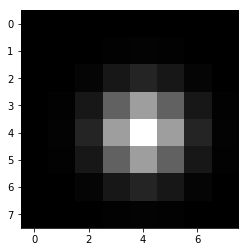

Original crop
[[15 13 18 19 18 14 15 13]
 [15 14 16 18 17 16 15 15]
 [14 13 14 20 26 27 19 14]
 [13 14 20 37 49 42 26 14]
 [13 14 33 61 76 61 31 14]
 [15 15 36 66 82 70 36 15]
 [14 13 24 46 61 54 27 15]
 [16 13 15 19 27 25 18 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 47 27  5  0]
 [ 0  0  9 47 82 47  9  0]
 [ 0  0  5 27 47 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 31 50 31  7  0]
 [ 0  1 11 50 82 50 11  1]
 [ 0  0  7 31 50 31  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 217.09
y: 332.23
sigma_min: 0.9017840020839948
sigma_max: 0.9707371344536656
height: 77.8666721928971
max_intensity: 87


Original crop around spot at (217, 332):


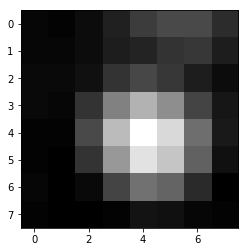

Spot reconstructed from gaussian fit parameters using sigma_min:


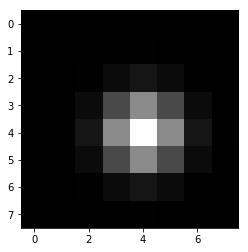

Spot reconstructed from gaussian fit parameters using sigma_max:


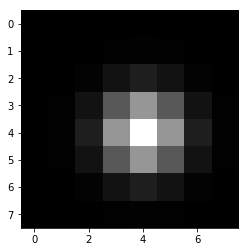

Original crop
[[10  9 12 18 27 31 31 22]
 [10 10 12 17 19 24 25 17]
 [11 11 13 24 30 25 17 12]
 [11 10 24 48 63 52 29 15]
 [ 9  9 31 66 87 75 42 16]
 [ 9  8 24 55 78 69 38 13]
 [10  8 11 29 43 39 21  8]
 [ 9  8  8  9 14 13 10  9]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 25 47 25  4  0]
 [ 0  0  7 47 87 47  7  0]
 [ 0  0  4 25 47 25  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 30 51 30  6  0]
 [ 0  0 10 51 87 51 10  0]
 [ 0  0  6 30 51 30  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 217.58
y: 146.95
sigma_min: 1.069325515470994
sigma_max: 1.1710213110397942
height: 62.12573373043348
max_intensity: 92


Original crop around spot at (217, 146):


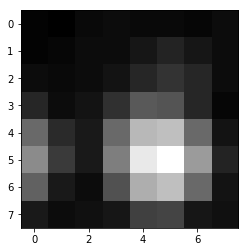

Spot reconstructed from gaussian fit parameters using sigma_min:


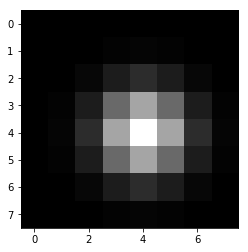

Spot reconstructed from gaussian fit parameters using sigma_max:


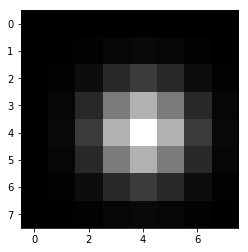

Original crop
[[14 13 16 17 16 16 15 17]
 [14 15 17 17 20 24 20 17]
 [17 16 17 19 25 29 25 17]
 [25 17 19 28 41 39 25 15]
 [46 26 21 46 70 72 46 19]
 [56 31 21 52 85 92 61 24]
 [43 21 17 38 67 72 46 19]
 [21 17 18 20 33 34 20 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2 10 16 10  2  0]
 [ 0  1 10 38 59 38 10  1]
 [ 0  1 16 59 92 59 16  1]
 [ 0  1 10 38 59 38 10  1]
 [ 0  0  2 10 16 10  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 14 21 14  4  0]
 [ 0  2 14 44 63 44 14  2]
 [ 0  3 21 63 92 63 21  3]
 [ 0  2 14 44 63 44 14  2]
 [ 0  0  4 14 21 14  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 218.47
y: 192.27
sigma_min: 1.145663595364874
sigma_max: 1.236433951257871
height: 70.80608901671947
max_intensity: 92


Original crop around spot at (218, 192):


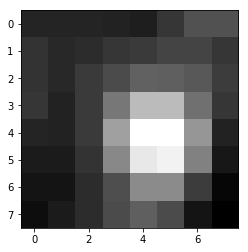

Spot reconstructed from gaussian fit parameters using sigma_min:


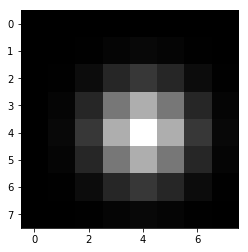

Spot reconstructed from gaussian fit parameters using sigma_max:


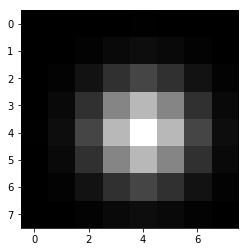

Original crop
[[28 28 28 27 26 33 41 41]
 [32 29 30 33 34 37 37 33]
 [32 29 34 39 46 45 43 35]
 [33 27 34 52 72 72 50 33]
 [28 27 34 64 92 92 61 27]
 [25 25 32 57 85 88 55 24]
 [23 23 30 40 58 58 35 19]
 [21 25 30 39 45 39 23 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  4 13 20 13  4  0]
 [ 0  2 13 42 62 42 13  2]
 [ 0  2 20 62 92 62 20  2]
 [ 0  2 13 42 62 42 13  2]
 [ 0  0  4 13 20 13  4  0]
 [ 0  0  0  2  2  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 17 24 17  6  1]
 [ 0  3 17 47 66 47 17  3]
 [ 0  4 24 66 92 66 24  4]
 [ 0  3 17 47 66 47 17  3]
 [ 0  1  6 17 24 17  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 224.95
y: 182.61
sigma_min: 1.1508854086414608
sigma_max: 1.3372118694199964
height: 78.56190600754344
max_intensity: 107


Original crop around spot at (224, 182):


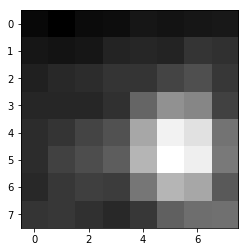

Spot reconstructed from gaussian fit parameters using sigma_min:


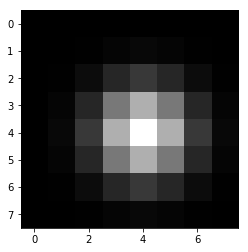

Spot reconstructed from gaussian fit parameters using sigma_max:


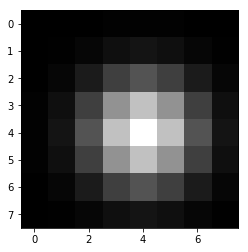

Original crop
[[ 17  14  18  19  22  21  22  23]
 [ 22  21  22  27  28  27  33  32]
 [ 26  29  30  33  33  39  43  34]
 [ 28  28  28  32  51  67  63  38]
 [ 30  33  39  44  75 102  96  56]
 [ 30  38  42  48  80 107 101  58]
 [ 29  34  37  36  57  80  75  47]
 [ 33  34  32  29  34  49  54  55]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  16  23  16   5   0]
 [  0   2  16  50  73  50  16   2]
 [  0   3  23  73 107  73  23   3]
 [  0   2  16  50  73  50  16   2]
 [  0   0   5  16  23  16   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   6   8   6   2   0]
 [  0   2  11  26  34  26  11   2]
 [  0   6  26  61  80  61  26   6]
 [  1   8  34  80 107  80  34   8]
 [  0   6  26  61  80  61  26   6]
 [  0   2  11  26  34  26  11   2]
 [  0   0   2   6   8   6   2   0]]

---------------------------------------------------

x: 225.46
y: 286.45
sigma_min

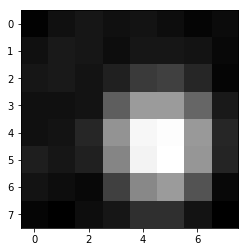

Spot reconstructed from gaussian fit parameters using sigma_min:


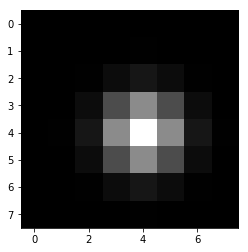

Spot reconstructed from gaussian fit parameters using sigma_max:


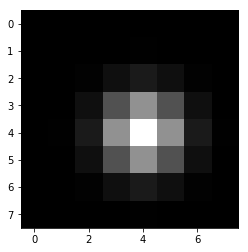

Original crop
[[ 12  17  19  17  18  16  13  15]
 [ 17  20  19  16  19  19  18  14]
 [ 19  20  18  23  32  34  25  13]
 [ 17  17  18  45  67  67  48  20]
 [ 17  18  25  64 100 102  66  25]
 [ 22  19  23  59  99 103  65  24]
 [ 18  16  14  34  60  67  41  14]
 [ 13  11  16  19  28  28  18  11]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   4  30  56  30   4   0]
 [  0   0   9  56 103  56   9   0]
 [  0   0   4  30  56  30   4   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  33  58  33   6   0]
 [  0   0  10  58 103  58  10   0]
 [  0   0   6  33  58  33   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 226.98
y: 187.18
sigma_min

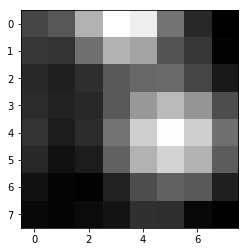

Spot reconstructed from gaussian fit parameters using sigma_min:


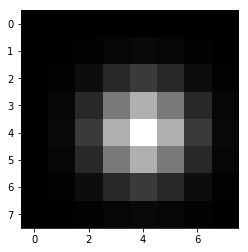

Spot reconstructed from gaussian fit parameters using sigma_max:


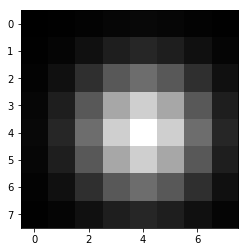

Original crop
[[ 42  48  80 107 101  58  32  18]
 [ 37  36  57  80  75  47  37  19]
 [ 32  29  34  49  54  55  42  27]
 [ 33  30  32  49  71  83  70  45]
 [ 36  28  33  58  90 106  90  57]
 [ 32  24  28  52  80  92  80  50]
 [ 24  20  19  30  45  52  49  29]
 [ 21  20  22  25  35  34  21  18]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  16  24  16   5   0]
 [  0   2  16  51  73  51  16   2]
 [  0   3  24  73 107  73  24   3]
 [  0   2  16  51  73  51  16   2]
 [  0   0   5  16  24  16   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   1   2   3   2   1   0]
 [  0   2   6  12  16  12   6   2]
 [  1   6  19  37  46  37  19   6]
 [  2  12  37  70  86  70  37  12]
 [  3  16  46  86 107  86  46  16]
 [  2  12  37  70  86  70  37  12]
 [  1   6  19  37  46  37  19   6]
 [  0   2   6  12  16  12   6   2]]

---------------------------------------------------

x: 226.98
y: 216.15
sigma_min

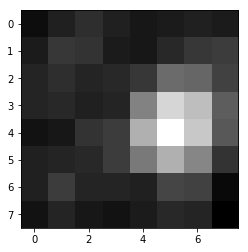

Spot reconstructed from gaussian fit parameters using sigma_min:


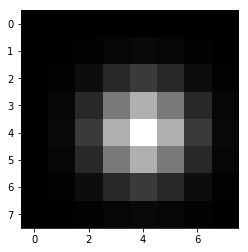

Spot reconstructed from gaussian fit parameters using sigma_max:


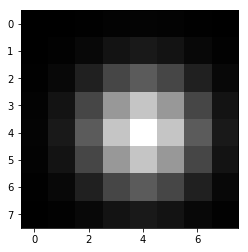

Original crop
[[15 19 22 19 17 18 19 18]
 [18 24 23 18 17 21 24 25]
 [20 22 20 21 24 35 34 26]
 [20 21 19 20 40 58 53 32]
 [16 17 23 25 50 67 55 31]
 [19 20 21 25 38 50 41 23]
 [19 25 20 20 19 27 26 14]
 [16 20 17 16 18 21 20 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 32 46 32 10  1]
 [ 0  2 15 46 67 46 15  2]
 [ 0  1 10 32 46 32 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  6  5  2  0]
 [ 0  2  8 18 23 18  8  2]
 [ 0  5 18 40 51 40 18  5]
 [ 1  6 23 51 67 51 23  6]
 [ 0  5 18 40 51 40 18  5]
 [ 0  2  8 18 23 18  8  2]
 [ 0  0  2  5  6  5  2  0]]

---------------------------------------------------

x: 229.59
y: 85.209
sigma_min: 1.0418032296153912
sigma_max: 1.070276446643182
height: 66.33545638679529
max_intensity: 84


Original crop around spot at (229, 85):


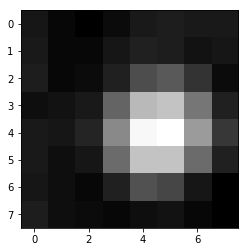

Spot reconstructed from gaussian fit parameters using sigma_min:


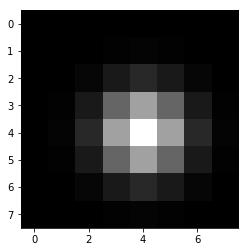

Spot reconstructed from gaussian fit parameters using sigma_max:


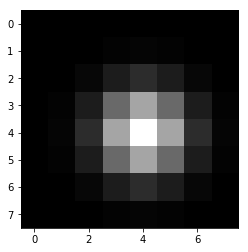

Original crop
[[21 17 15 18 22 23 22 22]
 [22 17 17 21 24 23 20 21]
 [23 17 18 24 36 39 29 18]
 [19 20 22 42 65 68 47 24]
 [22 21 25 52 82 84 57 30]
 [22 19 21 44 68 68 44 24]
 [21 19 17 24 37 34 21 15]
 [23 19 18 17 19 20 17 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 33 52 33  8  0]
 [ 0  1 13 52 84 52 13  1]
 [ 0  0  8 33 52 33  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 35 54 35  9  1]
 [ 0  1 14 54 84 54 14  1]
 [ 0  1  9 35 54 35  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 233.7
y: 318.23
sigma_min: 0.9486477506833538
sigma_max: 1.0546491206680262
height: 94.49022437811668
max_intensity: 101


Original crop around spot at (233, 318):


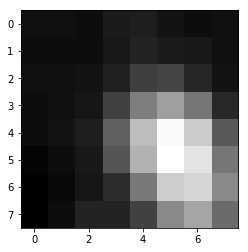

Spot reconstructed from gaussian fit parameters using sigma_min:


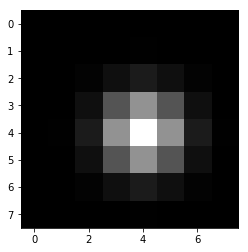

Spot reconstructed from gaussian fit parameters using sigma_max:


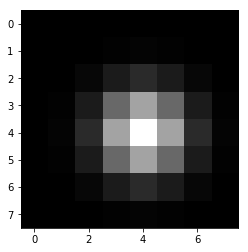

Original crop
[[ 14  14  13  18  19  15  13  14]
 [ 13  13  13  17  21  18  17  14]
 [ 14  14  15  20  31  33  22  15]
 [ 13  14  16  32  54  66  51  23]
 [ 13  15  19  43  77  99  82  41]
 [ 10  13  17  39  73 101  91  51]
 [  8  11  16  24  52  83  86  58]
 [  8  13  21  21  32  58  68  47]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  33  57  33   6   0]
 [  0   0  10  57 101  57  10   0]
 [  0   0   6  33  57  33   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  10  16  10   2   0]
 [  0   1  10  41  64  41  10   1]
 [  0   1  16  64 101  64  16   1]
 [  0   1  10  41  64  41  10   1]
 [  0   0   2  10  16  10   2   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 233.83
y: 247.63
sigma_min

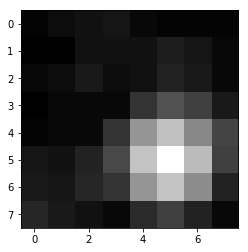

Spot reconstructed from gaussian fit parameters using sigma_min:


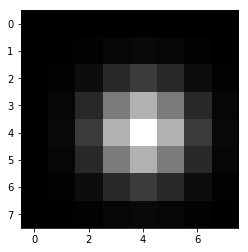

Spot reconstructed from gaussian fit parameters using sigma_max:


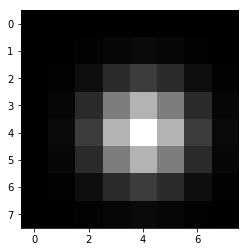

Original crop
[[15 17 18 19 16 15 15 15]
 [14 14 18 18 18 21 19 16]
 [16 17 20 17 18 22 20 16]
 [14 16 16 16 26 33 29 20]
 [15 16 16 26 49 59 46 30]
 [19 18 22 31 60 74 58 29]
 [20 19 23 26 49 60 47 22]
 [23 20 18 16 24 29 22 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 11 17 11  4  0]
 [ 0  1 11 35 51 35 11  1]
 [ 0  2 17 51 74 51 17  2]
 [ 0  1 11 35 51 35 11  1]
 [ 0  0  4 11 17 11  4  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  4 12 17 12  4  0]
 [ 0  2 12 36 51 36 12  2]
 [ 0  2 17 51 74 51 17  2]
 [ 0  2 12 36 51 36 12  2]
 [ 0  0  4 12 17 12  4  0]
 [ 0  0  0  2  2  2  0  0]]

---------------------------------------------------

x: 234.75
y: 253.51
sigma_min: 1.1582097912314948
sigma_max: 2.3335498336024454
height: 35.302673340054724
max_intensity: 65


Original crop around spot at (234, 253):


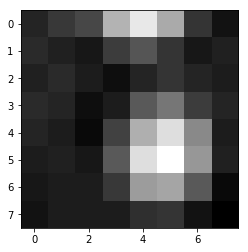

Spot reconstructed from gaussian fit parameters using sigma_min:


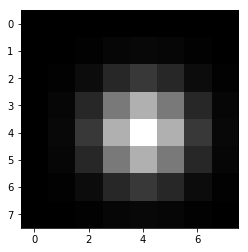

Spot reconstructed from gaussian fit parameters using sigma_max:


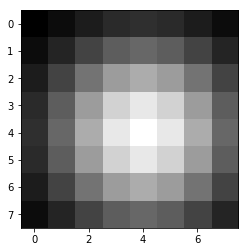

Original crop
[[19 23 26 49 60 47 22 15]
 [20 18 16 24 29 22 16 18]
 [18 20 17 14 19 22 19 17]
 [20 19 14 17 30 36 24 19]
 [19 17 13 25 48 58 40 17]
 [17 18 16 30 58 65 43 18]
 [16 17 17 23 44 46 30 13]
 [15 17 17 17 21 22 15 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 14 10  3  0]
 [ 0  1 10 30 44 30 10  1]
 [ 0  2 14 44 65 44 14  2]
 [ 0  1 10 30 44 30 10  1]
 [ 0  0  3 10 14 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 3  6 10 13 14 13 10  6]
 [ 6 12 19 25 28 25 19 12]
 [10 19 31 41 45 41 31 19]
 [13 25 41 54 59 54 41 25]
 [14 28 45 59 65 59 45 28]
 [13 25 41 54 59 54 41 25]
 [10 19 31 41 45 41 31 19]
 [ 6 12 19 25 28 25 19 12]]

---------------------------------------------------

x: 235.01
y: 320.19
sigma_min: 0.9419390235416638
sigma_max: 1.032281116416766
height: 96.27824299291548
max_intensity: 101


Original crop around spot at (235, 320):


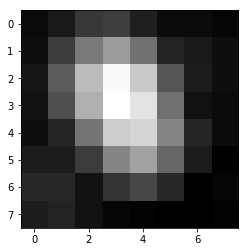

Spot reconstructed from gaussian fit parameters using sigma_min:


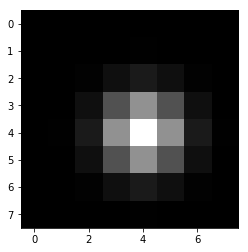

Spot reconstructed from gaussian fit parameters using sigma_max:


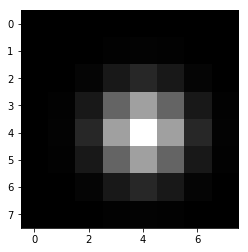

Original crop
[[ 15  20  31  33  22  15  15  13]
 [ 16  32  54  66  51  23  20  16]
 [ 19  43  77  99  82  41  21  16]
 [ 17  39  73 101  91  51  17  15]
 [ 16  24  52  83  86  58  24  15]
 [ 21  21  32  58  68  47  21  11]
 [ 25  25  17  29  36  25  11  13]
 [ 21  23  17  13  12  11  11  12]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0  10  57 101  57  10   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  39  63  39   9   0]
 [  0   1  15  63 101  63  15   1]
 [  0   0   9  39  63  39   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 235.11
y: 209.8
sigma_min:

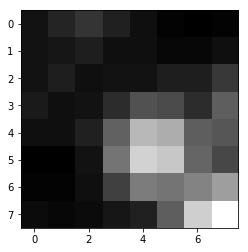

Spot reconstructed from gaussian fit parameters using sigma_min:


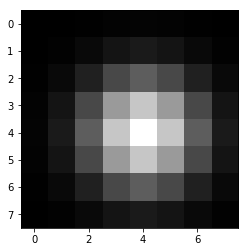

Spot reconstructed from gaussian fit parameters using sigma_max:


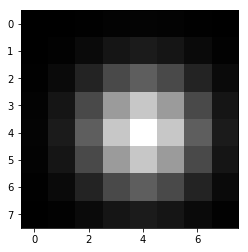

Original crop
[[18 23 27 22 17 14 13 14]
 [18 19 21 17 17 15 15 17]
 [18 21 17 18 18 21 21 28]
 [20 17 18 25 35 33 25 38]
 [17 17 22 39 62 59 38 36]
 [13 13 18 44 69 66 40 32]
 [14 14 17 30 46 44 48 55]
 [16 15 16 19 22 38 68 81]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 10 22 29 22 10  3]
 [ 1  6 22 48 62 48 22  6]
 [ 1  8 29 62 81 62 29  8]
 [ 1  6 22 48 62 48 22  6]
 [ 0  3 10 22 29 22 10  3]
 [ 0  0  3  6  8  6  3  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 11 23 30 23 11  3]
 [ 1  6 23 49 63 49 23  6]
 [ 1  8 30 63 81 63 30  8]
 [ 1  6 23 49 63 49 23  6]
 [ 0  3 11 23 30 23 11  3]
 [ 0  0  3  6  8  6  3  0]]

---------------------------------------------------

x: 237.55
y: 95.473
sigma_min: 1.0119043419557852
sigma_max: 1.0456709870507719
height: 73.76571181467615
max_intensity: 86


Original crop around spot at (237, 95):


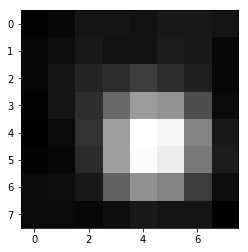

Spot reconstructed from gaussian fit parameters using sigma_min:


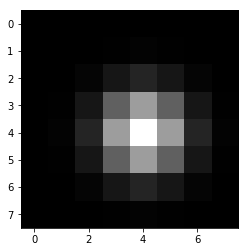

Spot reconstructed from gaussian fit parameters using sigma_max:


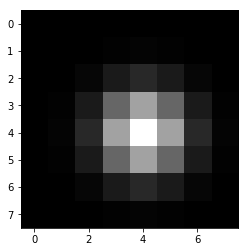

Original crop
[[16 17 21 21 20 22 22 21]
 [17 19 22 20 20 23 22 17]
 [17 21 25 28 32 28 24 17]
 [16 21 28 44 58 56 37 18]
 [15 18 29 59 86 83 52 22]
 [16 17 27 59 85 81 49 23]
 [18 19 22 42 55 51 32 19]
 [18 18 17 19 22 21 21 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 32 52 32  7  0]
 [ 0  1 12 52 86 52 12  1]
 [ 0  0  7 32 52 32  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 34 54 34  8  0]
 [ 0  1 13 54 86 54 13  1]
 [ 0  0  8 34 54 34  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 238.03
y: 212.59
sigma_min: 1.19736354885946
sigma_max: 1.2598595990746821
height: 60.6418368529191
max_intensity: 81


Original crop around spot at (238, 212):


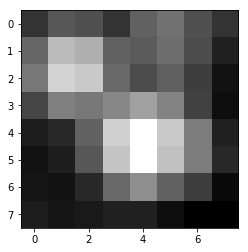

Spot reconstructed from gaussian fit parameters using sigma_min:


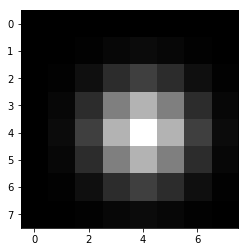

Spot reconstructed from gaussian fit parameters using sigma_max:


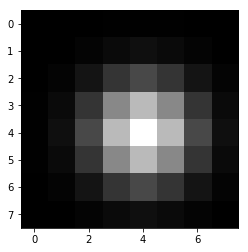

Original crop
[[25 35 33 25 38 42 33 25]
 [39 62 59 38 36 41 32 20]
 [44 69 66 40 32 37 28 16]
 [30 46 44 48 55 47 29 15]
 [19 22 38 68 81 66 45 20]
 [16 19 35 65 81 64 45 22]
 [17 16 22 40 50 38 28 14]
 [19 17 18 20 20 15 11 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 14 20 14  4  0]
 [ 0  2 14 40 57 40 14  2]
 [ 0  3 20 57 81 57 20  3]
 [ 0  2 14 40 57 40 14  2]
 [ 0  0  4 14 20 14  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 16 22 16  6  1]
 [ 0  3 16 43 59 43 16  3]
 [ 0  4 22 59 81 59 22  4]
 [ 0  3 16 43 59 43 16  3]
 [ 0  1  6 16 22 16  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 240.5
y: 345.54
sigma_min: 0.9486683064048098
sigma_max: 1.0435133041271598
height: 67.49409836819181
max_intensity: 82


Original crop around spot at (240, 345):


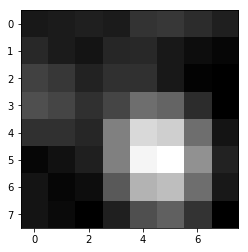

Spot reconstructed from gaussian fit parameters using sigma_min:


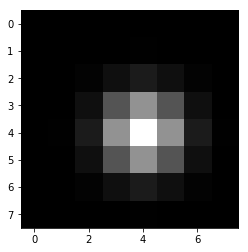

Spot reconstructed from gaussian fit parameters using sigma_max:


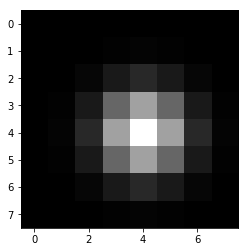

Original crop
[[15 16 17 16 23 24 21 17]
 [20 16 14 19 20 15 12 10]
 [27 24 18 22 22 15  9  8]
 [31 28 22 28 40 37 21  8]
 [22 22 19 45 71 68 40 14]
 [10 13 17 45 79 82 50 18]
 [14 10 12 34 60 63 40 15]
 [14 11  8 17 31 36 23  8]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  5 26 47 26  5  0]
 [ 0  0  8 47 82 47  8  0]
 [ 0  0  5 26 47 26  5  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 32 51 32  8  0]
 [ 0  1 13 51 82 51 13  1]
 [ 0  0  8 32 51 32  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 240.63
y: 338.11
sigma_min: 0.9847770449257232
sigma_max: 0.9910514969473636
height: 92.39179562466596
max_intensity: 100


Original crop around spot at (240, 338):


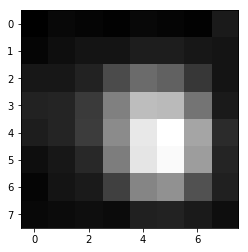

Spot reconstructed from gaussian fit parameters using sigma_min:


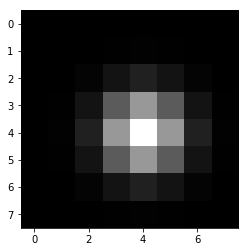

Spot reconstructed from gaussian fit parameters using sigma_max:


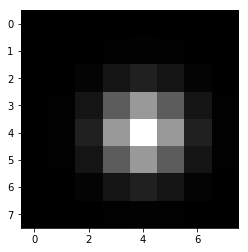

Original crop
[[ 12  15  14  13  15  14  13  21]
 [ 14  17  19  19  22  22  20  19]
 [ 20  20  24  38  49  46  31  19]
 [ 24  25  32  56  77  76  52  21]
 [ 22  25  33  60  92 100  69  27]
 [ 17  20  26  55  91  98  66  25]
 [ 14  19  21  34  58  62  40  23]
 [ 15  16  17  16  23  24  21  17]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   7  35  59  35   7   0]
 [  0   0  12  59 100  59  12   0]
 [  0   0   7  35  59  35   7   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  36  60  36   7   0]
 [  0   1  13  60 100  60  13   1]
 [  0   0   7  36  60  36   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 244.39
y: 188.84
sigma_min

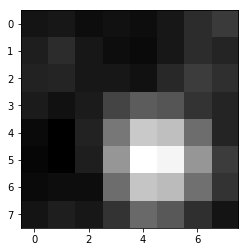

Spot reconstructed from gaussian fit parameters using sigma_min:


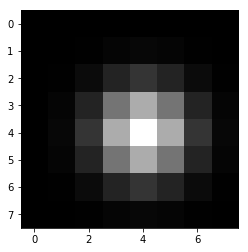

Spot reconstructed from gaussian fit parameters using sigma_max:


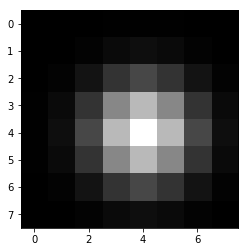

Original crop
[[23 24 21 22 21 24 30 34]
 [26 30 24 21 20 24 30 28]
 [27 28 24 24 22 29 35 31]
 [25 22 25 37 44 42 32 28]
 [20 17 27 52 76 73 49 28]
 [19 17 26 61 92 89 61 35]
 [20 21 21 49 75 72 50 32]
 [23 26 24 32 48 43 31 23]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 12 19 12  3  0]
 [ 0  1 12 41 62 41 12  1]
 [ 0  2 19 62 92 62 19  2]
 [ 0  1 12 41 62 41 12  1]
 [ 0  0  3 12 19 12  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5  3  1  0]
 [ 0  1  7 18 25 18  7  1]
 [ 0  3 18 48 66 48 18  3]
 [ 0  5 25 66 92 66 25  5]
 [ 0  3 18 48 66 48 18  3]
 [ 0  1  7 18 25 18  7  1]
 [ 0  0  1  3  5  3  1  0]]

---------------------------------------------------

x: 245.6
y: 228.14
sigma_min: 0.9677877397121801
sigma_max: 0.9807504160275875
height: 67.52502574777499
max_intensity: 78


Original crop around spot at (245, 228):


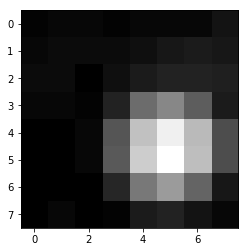

Spot reconstructed from gaussian fit parameters using sigma_min:


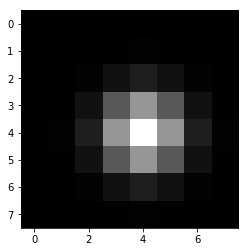

Spot reconstructed from gaussian fit parameters using sigma_max:


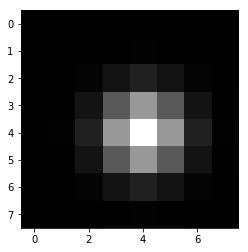

Original crop
[[13 14 14 13 14 14 14 17]
 [14 15 15 15 16 18 19 18]
 [15 15 12 16 19 21 21 20]
 [14 14 13 21 40 47 36 19]
 [12 12 14 34 62 74 60 32]
 [12 12 14 35 65 78 61 32]
 [12 12 12 22 43 52 38 18]
 [12 14 12 13 19 21 17 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 26 45 26  5  0]
 [ 0  0  9 45 78 45  9  0]
 [ 0  0  5 26 45 26  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 46 27  5  0]
 [ 0  0  9 46 78 46  9  0]
 [ 0  0  5 27 46 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 246.0
y: 318.1
sigma_min: 1.019600355221192
sigma_max: 1.04756564951134
height: 52.9044466447486
max_intensity: 66


Original crop around spot at (246, 318):


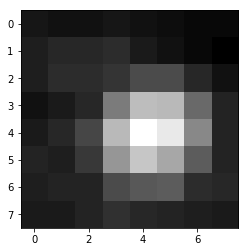

Spot reconstructed from gaussian fit parameters using sigma_min:


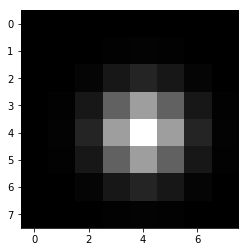

Spot reconstructed from gaussian fit parameters using sigma_max:


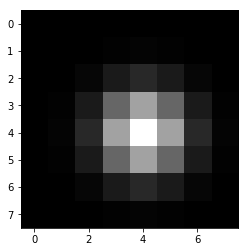

Original crop
[[13 12 12 13 12 11 10 10]
 [15 17 17 18 14 12 10  8]
 [15 18 18 20 25 25 17 12]
 [12 14 17 36 51 50 32 16]
 [14 17 24 50 66 61 39 16]
 [16 15 21 42 53 46 29 16]
 [15 16 16 25 28 29 18 17]
 [14 14 16 19 17 16 15 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 25 40 25  5  0]
 [ 0  0  9 40 66 40  9  0]
 [ 0  0  5 25 40 25  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 26 41 26  6  0]
 [ 0  1 10 41 66 41 10  1]
 [ 0  0  6 26 41 26  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 248.09
y: 326.47
sigma_min: 0.9419263437740412
sigma_max: 1.0408961574978743
height: 81.46828303248247
max_intensity: 93


Original crop around spot at (248, 326):


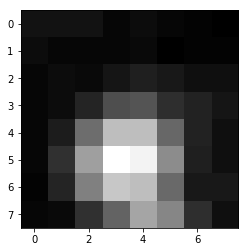

Spot reconstructed from gaussian fit parameters using sigma_min:


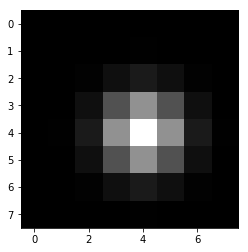

Spot reconstructed from gaussian fit parameters using sigma_max:


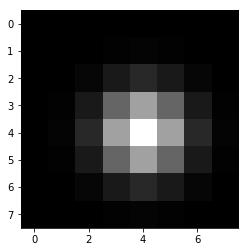

Original crop
[[17 17 17 13 15 13 12 11]
 [15 13 13 13 14 11 12 12]
 [13 15 14 18 21 19 16 16]
 [13 15 23 36 38 26 22 18]
 [13 20 46 72 72 44 22 16]
 [13 27 62 93 89 56 21 16]
 [12 23 52 75 72 45 19 19]
 [13 14 27 43 64 54 26 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0  9 52 93 52  9  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  9 36 58 36  9  0]
 [ 0  1 14 58 93 58 14  1]
 [ 0  0  9 36 58 36  9  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 248.2
y: 193.79
sigma_min: 1.8458033825429214
sigma_max: 2.012820623703557
height: 48.47887936612495
max_intensity: 92


Original crop around spot at (248, 193):


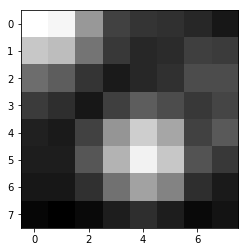

Spot reconstructed from gaussian fit parameters using sigma_min:


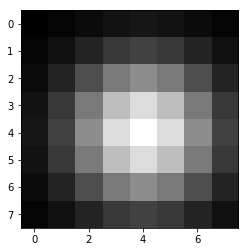

Spot reconstructed from gaussian fit parameters using sigma_max:


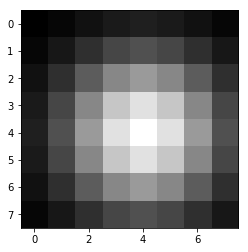

Original crop
[[92 89 61 35 31 30 27 22]
 [75 72 50 32 27 28 34 33]
 [48 43 31 23 27 30 38 38]
 [33 29 22 34 43 38 32 36]
 [25 23 35 60 77 65 35 42]
 [24 24 41 69 88 75 40 32]
 [22 22 30 49 64 55 29 23]
 [17 15 18 24 29 24 18 21]]
Reconstructed using sigma min
[[ 0  2  4  7  8  7  4  2]
 [ 2  6 13 21 24 21 13  6]
 [ 4 13 28 44 51 44 28 13]
 [ 7 21 44 68 79 68 44 21]
 [ 8 24 51 79 92 79 51 24]
 [ 7 21 44 68 79 68 44 21]
 [ 4 13 28 44 51 44 28 13]
 [ 2  6 13 21 24 21 13  6]]
Reconstructed using sigma max
[[ 1  4  7 11 12 11  7  4]
 [ 4  9 18 26 30 26 18  9]
 [ 7 18 34 49 56 49 34 18]
 [11 26 49 71 81 71 49 26]
 [12 30 56 81 92 81 56 30]
 [11 26 49 71 81 71 49 26]
 [ 7 18 34 49 56 49 34 18]
 [ 4  9 18 26 30 26 18  9]]

---------------------------------------------------

x: 248.22
y: 329.61
sigma_min: 0.9371417854771227
sigma_max: 1.1692953433897562
height: 78.83656586836845
max_intensity: 93


Original crop around spot at (248, 329):


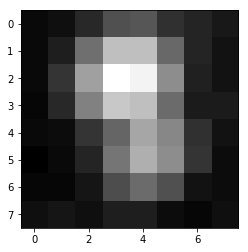

Spot reconstructed from gaussian fit parameters using sigma_min:


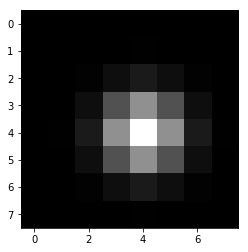

Spot reconstructed from gaussian fit parameters using sigma_max:


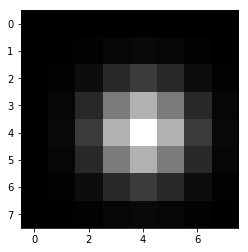

Original crop
[[13 15 23 36 38 26 22 18]
 [13 20 46 72 72 44 22 16]
 [13 27 62 93 89 56 21 16]
 [12 23 52 75 72 45 19 19]
 [13 14 27 43 64 54 26 16]
 [10 13 22 48 67 56 27 14]
 [12 12 17 35 45 36 16 14]
 [15 17 15 20 20 14 12 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  9 52 93 52  9  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 14 21 14  4  0]
 [ 0  2 14 44 64 44 14  2]
 [ 0  3 21 64 93 64 21  3]
 [ 0  2 14 44 64 44 14  2]
 [ 0  0  4 14 21 14  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 250.87
y: 128.41
sigma_min: 0.967773725788579
sigma_max: 1.0232326721766694
height: 73.15991560570409
max_intensity: 89


Original crop around spot at (250, 128):


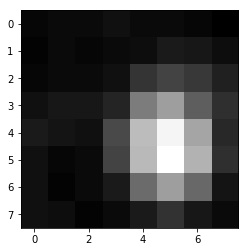

Spot reconstructed from gaussian fit parameters using sigma_min:


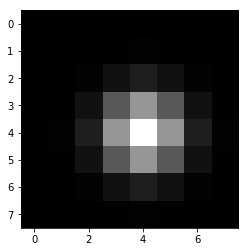

Spot reconstructed from gaussian fit parameters using sigma_max:


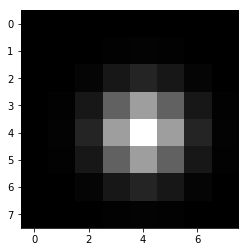

Original crop
[[15 16 16 18 16 16 15 13]
 [14 16 15 16 17 21 20 17]
 [15 16 16 18 29 33 30 23]
 [18 20 20 24 50 60 41 27]
 [21 19 18 35 69 86 62 25]
 [18 15 16 33 68 89 66 27]
 [18 14 16 21 45 60 44 19]
 [18 17 14 16 21 28 20 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 30 52 30  6  0]
 [ 0  0 10 52 89 52 10  0]
 [ 0  0  6 30 52 30  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  8 34 55 34  8  0]
 [ 0  1 13 55 89 55 13  1]
 [ 0  0  8 34 55 34  8  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 251.23
y: 300.44
sigma_min: 0.8630346391369913
sigma_max: 0.9146126425519934
height: 108.37610962828292
max_intensity: 111


Original crop around spot at (251, 300):


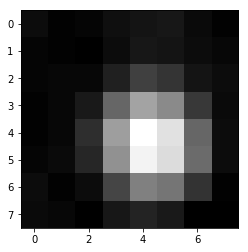

Spot reconstructed from gaussian fit parameters using sigma_min:


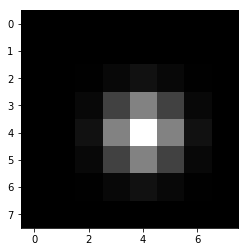

Spot reconstructed from gaussian fit parameters using sigma_max:


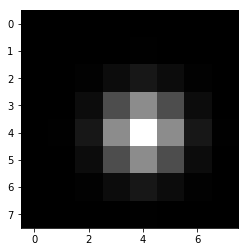

Original crop
[[ 16  12  13  17  19  20  15  12]
 [ 13  12  11  16  20  19  16  14]
 [ 13  14  14  24  36  32  19  16]
 [ 12  14  21  51  75  65  33  15]
 [ 12  14  29  73 111  99  51  16]
 [ 13  15  26  68 106  97  53  16]
 [ 16  12  16  38  61  57  31  12]
 [ 15  14  11  20  25  21  11  11]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   3   7   3   0   0]
 [  0   0   3  28  56  28   3   0]
 [  0   0   7  56 111  56   7   0]
 [  0   0   3  28  56  28   3   0]
 [  0   0   0   3   7   3   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  33  61  33   5   0]
 [  0   0  10  61 111  61  10   0]
 [  0   0   5  33  61  33   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 251.5
y: 143.65
sigma_min:

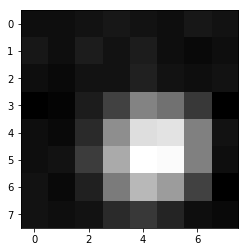

Spot reconstructed from gaussian fit parameters using sigma_min:


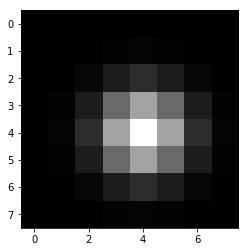

Spot reconstructed from gaussian fit parameters using sigma_max:


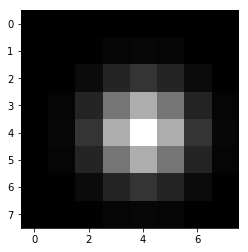

Original crop
[[17 17 18 19 18 17 19 18]
 [19 17 20 18 20 17 16 17]
 [17 16 18 18 21 18 17 18]
 [14 15 20 28 42 38 26 14]
 [17 16 23 44 61 62 41 18]
 [17 18 27 50 68 67 41 17]
 [18 16 21 40 53 47 28 14]
 [18 17 18 23 26 22 17 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 28 43 28  7  0]
 [ 0  1 11 43 68 43 11  1]
 [ 0  0  7 28 43 28  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 31 46 31  9  1]
 [ 0  2 14 46 68 46 14  2]
 [ 0  1  9 31 46 31  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 253.41
y: 192.77
sigma_min: 1.1573844570386194
sigma_max: 1.2686465459865217
height: 80.22785693443049
max_intensity: 114


Original crop around spot at (253, 192):


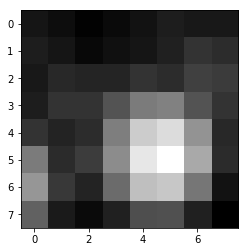

Spot reconstructed from gaussian fit parameters using sigma_min:


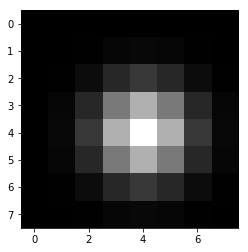

Spot reconstructed from gaussian fit parameters using sigma_max:


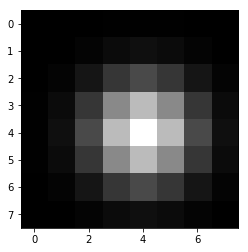

Original crop
[[ 27  24  20  23  26  30  28  28]
 [ 30  27  22  25  27  31  38  36]
 [ 28  34  33  33  38  36  43  41]
 [ 30  38  38  50  65  67  50  38]
 [ 38  32  36  66  95 101  74  34]
 [ 65  35  42  71 105 114  82  35]
 [ 75  40  32  59  90  93  63  26]
 [ 55  29  23  31  48  49  31  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  17  25  17   5   0]
 [  0   2  17  54  78  54  17   2]
 [  0   3  25  78 114  78  25   3]
 [  0   2  17  54  78  54  17   2]
 [  0   0   5  17  25  17   5   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   2   5   6   5   2   0]
 [  0   2   9  24  32  24   9   2]
 [  0   5  24  61  83  61  24   5]
 [  0   6  32  83 114  83  32   6]
 [  0   5  24  61  83  61  24   5]
 [  0   2   9  24  32  24   9   2]
 [  0   0   2   5   6   5   2   0]]

---------------------------------------------------

x: 255.41
y: 342.01
sigma_min

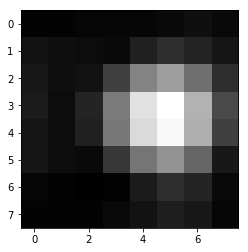

Spot reconstructed from gaussian fit parameters using sigma_min:


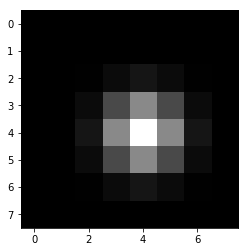

Spot reconstructed from gaussian fit parameters using sigma_max:


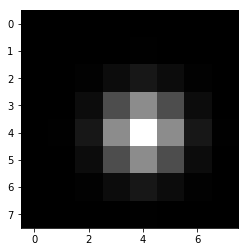

Original crop
[[ 9  9 10 10 10 11 13 11]
 [14 13 12 11 19 23 20 15]
 [16 13 14 29 51 59 44 23]
 [17 12 20 48 81 91 66 32]
 [15 12 19 47 79 89 65 29]
 [15 12 11 26 46 56 41 16]
 [10  9  8  9 17 23 20 11]
 [ 9  9  9 11 14 18 16 10]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  7 48 91 48  7  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 27 50 27  4  0]
 [ 0  0  8 50 91 50  8  0]
 [ 0  0  4 27 50 27  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 255.94
y: 242.92
sigma_min: 0.9040674790272716
sigma_max: 0.9436276070734015
height: 95.95192618991139
max_intensity: 105


Original crop around spot at (255, 242):


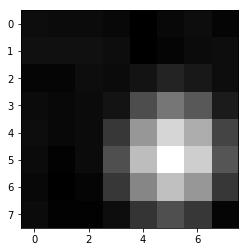

Spot reconstructed from gaussian fit parameters using sigma_min:


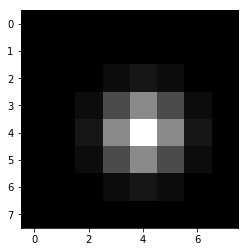

Spot reconstructed from gaussian fit parameters using sigma_max:


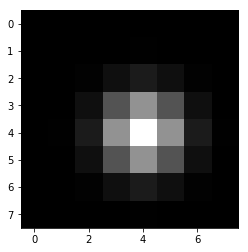

Original crop
[[ 17  16  16  15  12  15  17  14]
 [ 18  18  18  17  12  14  16  17]
 [ 14  14  17  16  19  25  21  17]
 [ 16  15  16  19  40  55  44  22]
 [ 17  15  16  32  67  90  75  37]
 [ 16  13  16  41  81 105  87  43]
 [ 15  12  14  32  61  82  67  32]
 [ 16  13  13  17  31  41  32  14]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   4  30  56  30   4   0]
 [  0   0   9  56 105  56   9   0]
 [  0   0   4  30  56  30   4   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0  11  59 105  59  11   0]
 [  0   0   6  34  59  34   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 255.95
y: 176.13
sigma_min

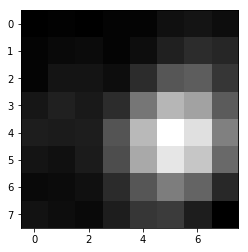

Spot reconstructed from gaussian fit parameters using sigma_min:


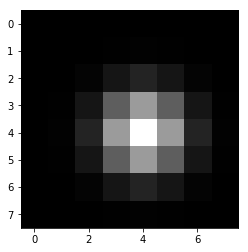

Spot reconstructed from gaussian fit parameters using sigma_max:


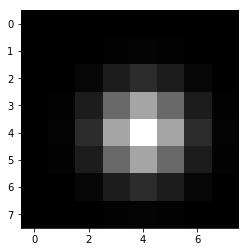

Original crop
[[ 16  17  16  18  18  23  25  22]
 [ 18  20  21  18  22  30  36  33]
 [ 18  25  25  22  36  54  57  40]
 [ 26  30  27  36  68  96  87  56]
 [ 29  28  29  53  97 128 114  72]
 [ 25  23  28  50  90 117 103  62]
 [ 20  21  23  35  54  71  60  34]
 [ 24  22  20  29  40  42  29  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0  10  47  77  47  10   0]
 [  0   1  17  77 128  77  17   1]
 [  0   0  10  47  77  47  10   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  14  22  14   3   0]
 [  0   1  14  53  82  53  14   1]
 [  0   2  22  82 128  82  22   2]
 [  0   1  14  53  82  53  14   1]
 [  0   0   3  14  22  14   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 256.71
y: 163.6
sigma_min:

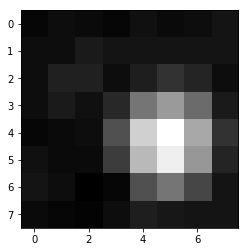

Spot reconstructed from gaussian fit parameters using sigma_min:


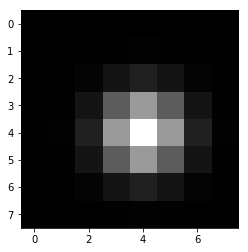

Spot reconstructed from gaussian fit parameters using sigma_max:


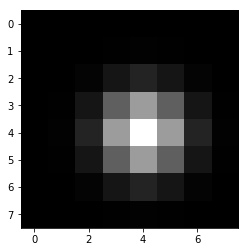

Original crop
[[15 17 16 15 18 16 17 19]
 [17 17 21 19 19 19 19 19]
 [17 23 23 17 22 28 24 17]
 [17 21 18 25 48 59 45 21]
 [15 16 17 37 75 89 63 28]
 [18 16 16 31 68 84 58 24]
 [19 17 13 15 37 48 34 19]
 [16 15 14 17 22 20 19 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 32 53 32  7  0]
 [ 0  0 11 53 89 53 11  0]
 [ 0  0  7 32 53 32  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 33 54 33  7  0]
 [ 0  1 12 54 89 54 12  1]
 [ 0  0  7 33 54 33  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 256.72
y: 294.56
sigma_min: 0.8917633865887722
sigma_max: 0.9431208419272059
height: 89.66404399938028
max_intensity: 98


Original crop around spot at (256, 294):


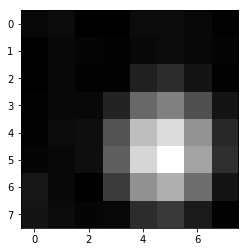

Spot reconstructed from gaussian fit parameters using sigma_min:


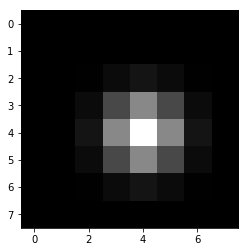

Spot reconstructed from gaussian fit parameters using sigma_max:


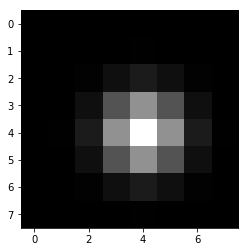

Original crop
[[15 16 12 12 16 16 15 13]
 [12 15 14 13 15 16 15 14]
 [12 15 13 13 23 27 19 13]
 [13 15 15 24 47 55 39 19]
 [13 16 17 40 76 86 62 26]
 [14 15 17 44 84 98 67 28]
 [20 15 12 32 61 71 49 19]
 [19 16 14 15 27 31 21 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 27 52 27  4  0]
 [ 0  0  7 52 98 52  7  0]
 [ 0  0  4 27 52 27  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  5 31 55 31  5  0]
 [ 0  0 10 55 98 55 10  0]
 [ 0  0  5 31 55 31  5  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 260.59
y: 79.345
sigma_min: 1.1723779899472533
sigma_max: 1.2448648434911225
height: 52.00565715340026
max_intensity: 70


Original crop around spot at (260, 79):


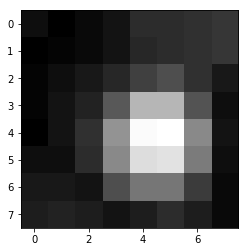

Spot reconstructed from gaussian fit parameters using sigma_min:


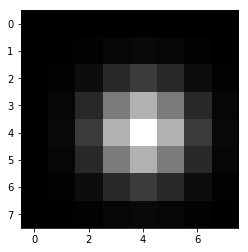

Spot reconstructed from gaussian fit parameters using sigma_max:


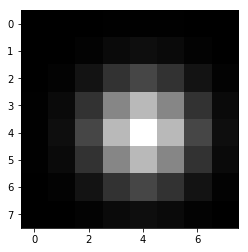

Original crop
[[21 18 20 22 27 27 28 29]
 [18 19 20 22 26 27 28 29]
 [19 21 23 26 31 34 28 23]
 [19 22 25 36 55 55 35 21]
 [18 22 28 48 69 70 46 22]
 [21 21 27 46 63 64 43 21]
 [23 23 22 34 42 42 30 20]
 [24 25 24 22 24 27 24 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 33 48 33 11  1]
 [ 0  2 16 48 70 48 16  2]
 [ 0  1 11 33 48 33 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 13 19 13  5  1]
 [ 0  2 13 36 50 36 13  2]
 [ 0  3 19 50 70 50 19  3]
 [ 0  2 13 36 50 36 13  2]
 [ 0  1  5 13 19 13  5  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 260.91
y: 302.27
sigma_min: 0.9359302488673478
sigma_max: 0.9544127632234046
height: 64.32696768836487
max_intensity: 77


Original crop around spot at (260, 302):


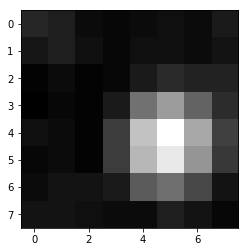

Spot reconstructed from gaussian fit parameters using sigma_min:


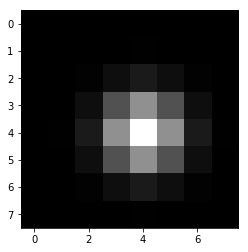

Spot reconstructed from gaussian fit parameters using sigma_max:


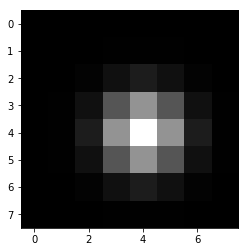

Original crop
[[20 18 13 12 13 14 13 17]
 [16 18 14 12 14 14 13 15]
 [11 13 11 12 17 21 19 19]
 [10 12 11 17 40 51 36 22]
 [14 13 11 26 61 77 54 27]
 [12 13 11 26 58 71 49 25]
 [13 15 15 17 34 39 29 15]
 [15 15 14 13 13 18 15 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  7 43 77 43  7  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 25 44 25  4  0]
 [ 0  0  8 44 77 44  8  0]
 [ 0  0  4 25 44 25  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 261.56
y: 347.24
sigma_min: 0.8472529133894158
sigma_max: 0.9505539684187544
height: 76.93155288151624
max_intensity: 81


Original crop around spot at (261, 347):


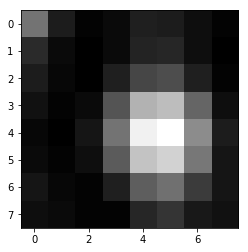

Spot reconstructed from gaussian fit parameters using sigma_min:


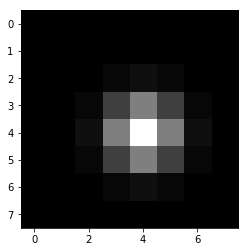

Spot reconstructed from gaussian fit parameters using sigma_max:


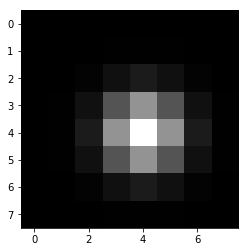

Original crop
[[41 16  9 11 17 16 12  9]
 [20 11  8 11 18 19 12  8]
 [16 10  8 17 28 30 17  9]
 [13  9 11 32 59 62 37 12]
 [10  8 14 41 77 81 48 16]
 [11  9 12 34 64 68 42 14]
 [14 10  9 17 35 40 25 14]
 [12 11  9  9 19 23 15 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4  2  0  0]
 [ 0  0  2 20 40 20  2  0]
 [ 0  0  4 40 81 40  4  0]
 [ 0  0  2 20 40 20  2  0]
 [ 0  0  0  2  4  2  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  5 26 46 26  5  0]
 [ 0  0  8 46 81 46  8  0]
 [ 0  0  5 26 46 26  5  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 263.19
y: 201.67
sigma_min: 0.9639138822502568
sigma_max: 0.9677730296358399
height: 79.83401168418379
max_intensity: 92


Original crop around spot at (263, 201):


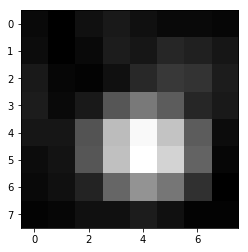

Spot reconstructed from gaussian fit parameters using sigma_min:


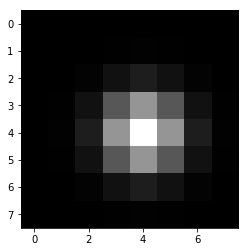

Spot reconstructed from gaussian fit parameters using sigma_max:


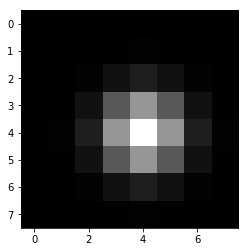

Original crop
[[15 12 17 20 17 15 15 14]
 [16 12 15 21 19 24 22 19]
 [20 14 13 17 25 30 28 21]
 [21 15 20 39 50 41 24 20]
 [19 19 38 71 90 73 41 16]
 [16 18 39 72 92 78 43 14]
 [15 17 23 44 58 49 27 12]
 [13 14 17 17 21 17 13 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0 10 53 92 53 10  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0 10 53 92 53 10  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 266.62
y: 191.76
sigma_min: 0.9417649648076526
sigma_max: 0.987024899960054
height: 81.85157232596775
max_intensity: 91


Original crop around spot at (266, 191):


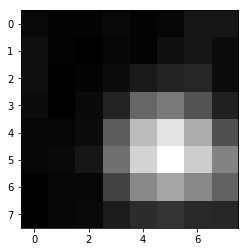

Spot reconstructed from gaussian fit parameters using sigma_min:


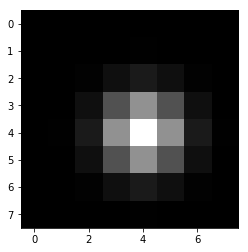

Spot reconstructed from gaussian fit parameters using sigma_max:


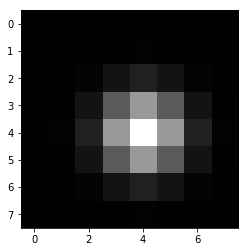

Original crop
[[14 12 12 14 12 13 18 18]
 [16 12 11 13 12 16 18 15]
 [16 11 12 15 19 22 23 15]
 [15 11 14 22 43 49 37 21]
 [13 13 15 40 70 82 65 36]
 [13 14 18 46 77 91 75 52]
 [11 13 13 32 54 63 54 42]
 [11 13 14 20 25 27 24 23]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 29 51 29  5  0]
 [ 0  0  9 51 91 51  9  0]
 [ 0  0  5 29 51 29  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0 11 54 91 54 11  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 267.29
y: 76.203
sigma_min: 1.348944730834284
sigma_max: 1.3929941445851186
height: 41.451342520651906
max_intensity: 56


Original crop around spot at (267, 76):


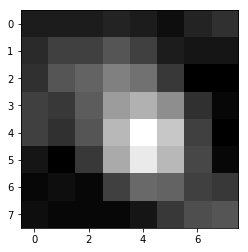

Spot reconstructed from gaussian fit parameters using sigma_min:


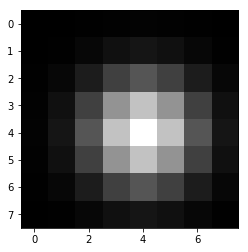

Spot reconstructed from gaussian fit parameters using sigma_max:


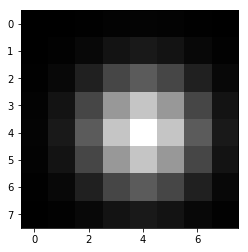

Original crop
[[24 24 24 25 24 22 25 27]
 [26 29 29 32 29 24 23 23]
 [27 32 34 38 36 28 20 20]
 [29 28 33 42 45 40 27 21]
 [29 27 32 46 56 48 29 20]
 [23 20 28 44 53 46 30 21]
 [21 22 21 29 35 34 29 28]
 [22 21 21 21 23 28 31 32]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 14 18 14  6  1]
 [ 0  3 14 32 42 32 14  3]
 [ 0  4 18 42 56 42 18  4]
 [ 0  3 14 32 42 32 14  3]
 [ 0  1  6 14 18 14  6  1]
 [ 0  0  1  3  4  3  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  4  5  4  1  0]
 [ 0  1  7 15 19 15  7  1]
 [ 0  4 15 33 43 33 15  4]
 [ 0  5 19 43 56 43 19  5]
 [ 0  4 15 33 43 33 15  4]
 [ 0  1  7 15 19 15  7  1]
 [ 0  0  1  4  5  4  1  0]]

---------------------------------------------------

x: 267.76
y: 175.24
sigma_min: 1.1220700524974565
sigma_max: 1.191029050463615
height: 52.24685126777062
max_intensity: 77


Original crop around spot at (267, 175):


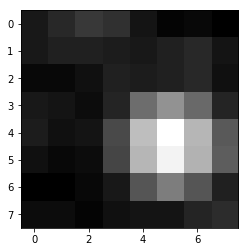

Spot reconstructed from gaussian fit parameters using sigma_min:


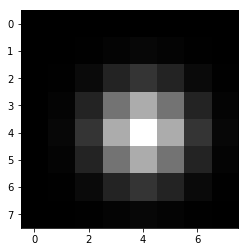

Spot reconstructed from gaussian fit parameters using sigma_max:


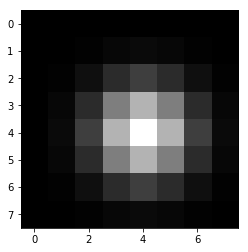

Original crop
[[20 24 28 26 19 15 16 14]
 [20 22 22 21 20 22 24 19]
 [16 16 18 22 21 22 24 18]
 [20 19 17 23 41 50 40 23]
 [21 18 19 32 61 77 59 36]
 [18 16 17 31 59 74 58 37]
 [14 14 16 20 35 45 35 22]
 [17 17 15 18 19 19 23 25]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 34 51 34 10  1]
 [ 0  2 15 51 77 51 15  2]
 [ 0  1 10 34 51 34 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 18 13  4  0]
 [ 0  2 13 38 54 38 13  2]
 [ 0  3 18 54 77 54 18  3]
 [ 0  2 13 38 54 38 13  2]
 [ 0  0  4 13 18 13  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 268.13
y: 81.649
sigma_min: 1.1304285357176223
sigma_max: 1.3452492538406393
height: 58.1552603846098
max_intensity: 87


Original crop around spot at (268, 81):


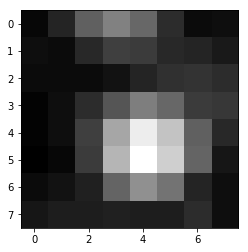

Spot reconstructed from gaussian fit parameters using sigma_min:


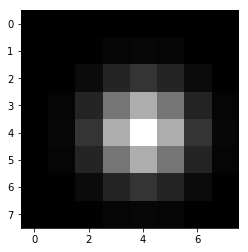

Spot reconstructed from gaussian fit parameters using sigma_max:


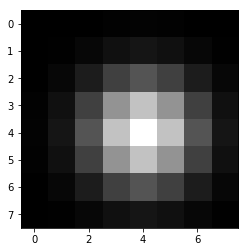

Original crop
[[20 28 44 53 46 30 21 22]
 [22 21 29 35 34 29 28 25]
 [21 21 21 23 28 31 32 30]
 [19 22 30 41 52 46 34 33]
 [19 22 35 63 82 71 44 29]
 [18 20 34 67 87 74 45 24]
 [21 23 27 45 57 49 28 22]
 [24 26 26 27 26 26 30 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 12 18 12  3  0]
 [ 0  1 12 39 58 39 12  1]
 [ 0  2 18 58 87 58 18  2]
 [ 0  1 12 39 58 39 12  1]
 [ 0  0  3 12 18 12  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 21 28 21  9  2]
 [ 0  5 21 50 65 50 21  5]
 [ 1  7 28 65 87 65 28  7]
 [ 0  5 21 50 65 50 21  5]
 [ 0  2  9 21 28 21  9  2]
 [ 0  0  2  5  7  5  2  0]]

---------------------------------------------------

x: 269.41
y: 273.53
sigma_min: 0.8952247943966023
sigma_max: 0.8963844166144574
height: 125.43571886558901
max_intensity: 133


Original crop around spot at (269, 273):


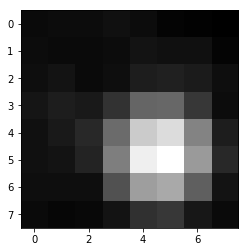

Spot reconstructed from gaussian fit parameters using sigma_min:


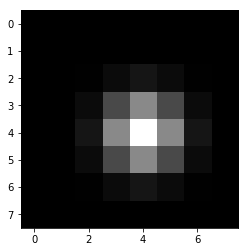

Spot reconstructed from gaussian fit parameters using sigma_max:


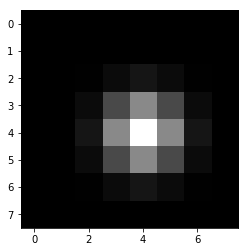

Original crop
[[ 17  18  18  20  18  14  13  12]
 [ 18  17  17  18  21  20  20  14]
 [ 19  21  17  19  26  28  25  19]
 [ 22  26  24  36  60  61  38  18]
 [ 20  24  31  63 108 116  74  26]
 [ 20  21  29  72 125 133  85  31]
 [ 19  19  19  51  87  92  57  21]
 [ 17  15  16  21  35  38  23  17]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  38  71  38   5   0]
 [  0   0  10  71 133  71  10   0]
 [  0   0   5  38  71  38   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  11   5   0   0]
 [  0   0   5  38  71  38   5   0]
 [  0   0  11  71 133  71  11   0]
 [  0   0   5  38  71  38   5   0]
 [  0   0   0   5  11   5   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 271.32
y: 192.77
sigma_min

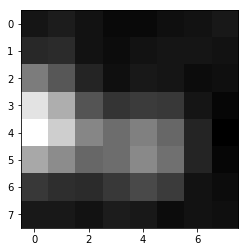

Spot reconstructed from gaussian fit parameters using sigma_min:


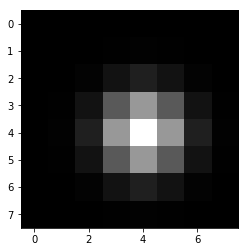

Spot reconstructed from gaussian fit parameters using sigma_max:


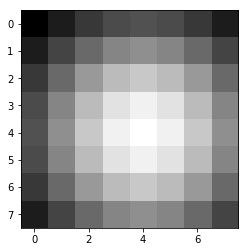

Original crop
[[16 18 15 12 12 14 15 17]
 [22 23 15 13 15 16 16 15]
 [49 37 21 14 17 16 13 14]
 [82 65 36 26 28 27 16 11]
 [91 75 52 44 50 42 21  9]
 [63 54 42 44 53 45 21 11]
 [27 24 23 27 33 28 15 13]
 [17 17 15 18 17 13 15 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0 11 54 91 54 11  0]
 [ 0  0  6 32 54 32  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[20 28 36 41 43 41 36 28]
 [28 39 50 57 60 57 50 39]
 [36 50 62 72 75 72 62 50]
 [41 57 72 83 86 83 72 57]
 [43 60 75 86 91 86 75 60]
 [41 57 72 83 86 83 72 57]
 [36 50 62 72 75 72 62 50]
 [28 39 50 57 60 57 50 39]]

---------------------------------------------------

x: 273.86
y: 258.75
sigma_min: 1.0284627683987269
sigma_max: 1.0979421249548411
height: 57.129739002594505
max_intensity: 76


Original crop around spot at (273, 258):


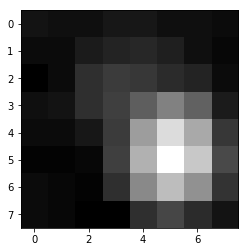

Spot reconstructed from gaussian fit parameters using sigma_min:


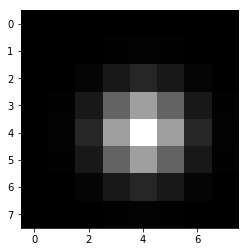

Spot reconstructed from gaussian fit parameters using sigma_max:


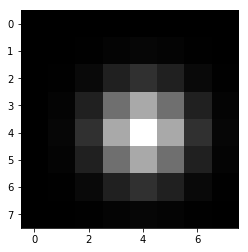

Original crop
[[16 15 15 17 17 15 15 14]
 [14 14 18 20 21 19 15 13]
 [11 14 23 26 25 22 20 14]
 [15 16 23 27 35 44 36 18]
 [14 14 17 26 51 67 54 25]
 [12 12 13 27 56 76 62 30]
 [14 13 12 23 46 59 48 24]
 [14 13 11 11 23 29 22 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 29 47 29  7  0]
 [ 0  1 11 47 76 47 11  1]
 [ 0  0  7 29 47 29  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 33 50 33  9  1]
 [ 0  1 14 50 76 50 14  1]
 [ 0  1  9 33 50 33  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 274.0
y: 63.845
sigma_min: 1.0511374162170406
sigma_max: 1.294346153299776
height: 49.661547574884274
max_intensity: 68


Original crop around spot at (274, 63):


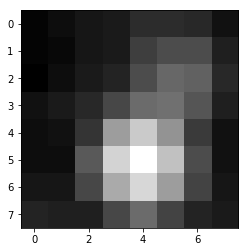

Spot reconstructed from gaussian fit parameters using sigma_min:


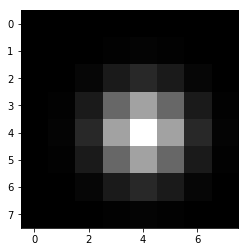

Spot reconstructed from gaussian fit parameters using sigma_max:


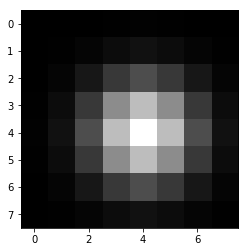

Original crop
[[12 14 16 17 21 21 20 15]
 [12 13 16 17 25 28 28 18]
 [11 14 17 19 28 34 33 20]
 [15 17 20 27 35 36 30 18]
 [14 15 23 46 56 44 24 15]
 [14 14 31 58 68 54 28 15]
 [16 16 27 49 59 46 26 16]
 [19 18 18 27 35 26 19 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 27 43 27  7  0]
 [ 0  1 11 43 68 43 11  1]
 [ 0  0  7 27 43 27  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 15 20 15  6  1]
 [ 0  3 15 37 50 37 15  3]
 [ 0  4 20 50 68 50 20  4]
 [ 0  3 15 37 50 37 15  3]
 [ 0  1  6 15 20 15  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 274.51
y: 323.33
sigma_min: 0.9014519715205378
sigma_max: 0.9582569925613675
height: 85.67525257421035
max_intensity: 90


Original crop around spot at (274, 323):


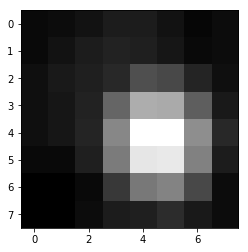

Spot reconstructed from gaussian fit parameters using sigma_min:


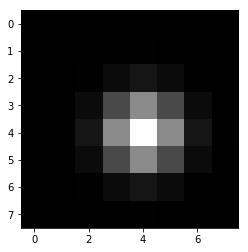

Spot reconstructed from gaussian fit parameters using sigma_max:


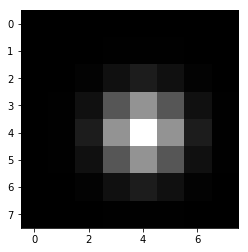

Original crop
[[12 13 15 18 18 15 11 13]
 [12 15 18 20 19 16 12 13]
 [14 17 19 22 34 32 21 14]
 [14 16 20 41 64 63 39 17]
 [14 16 21 52 90 90 54 22]
 [12 12 19 48 82 83 50 18]
 [ 9  9 12 27 47 51 32 13]
 [ 9  9 13 18 19 23 17 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  7 48 90 48  7  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0 10 52 90 52 10  0]
 [ 0  0  5 30 52 30  5  0]
 [ 0  0  1  5 10  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 274.88
y: 145.94
sigma_min: 0.9154182114234777
sigma_max: 0.9291505489312782
height: 118.5475790463129
max_intensity: 131


Original crop around spot at (274, 145):


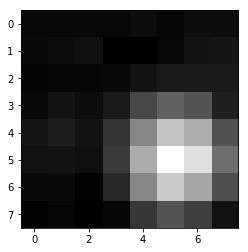

Spot reconstructed from gaussian fit parameters using sigma_min:


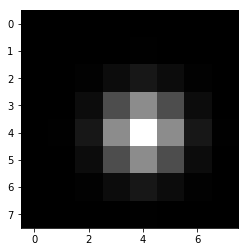

Spot reconstructed from gaussian fit parameters using sigma_max:


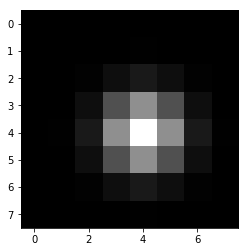

Original crop
[[ 17  17  17  17  19  16  19  19]
 [ 18  19  20  13  13  17  22  23]
 [ 15  16  16  17  22  25  25  25]
 [ 18  22  19  25  46  58  52  28]
 [ 23  27  22  37  75 103  93  50]
 [ 21  22  20  40  92 131 116  64]
 [ 18  18  14  32  75 106  90  49]
 [ 14  16  13  16  38  52  42  21]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   6  39  72  39   6   0]
 [  0   0  12  72 131  72  12   0]
 [  0   0   6  39  72  39   6   0]
 [  0   0   1   6  12   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   7  41  73  41   7   0]
 [  0   0  12  73 131  73  12   0]
 [  0   0   7  41  73  41   7   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 275.26
y: 176.26
sigma_min

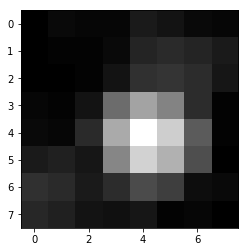

Spot reconstructed from gaussian fit parameters using sigma_min:


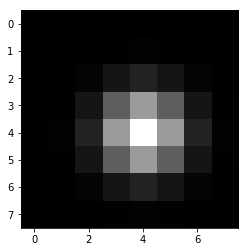

Spot reconstructed from gaussian fit parameters using sigma_max:


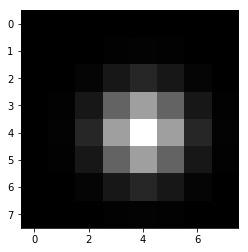

Original crop
[[14 17 16 16 22 20 17 16]
 [14 15 15 17 25 27 25 22]
 [14 14 15 20 29 30 28 21]
 [16 15 20 47 64 54 28 15]
 [17 16 27 66 92 77 42 15]
 [22 24 21 55 78 68 38 14]
 [29 27 22 28 37 33 18 17]
 [26 24 20 19 21 15 16 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 33 55 33  7  0]
 [ 0  1 12 55 92 55 12  1]
 [ 0  0  7 33 55 33  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 35 57 35  8  0]
 [ 0  1 13 57 92 57 13  1]
 [ 0  0  8 35 57 35  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 276.34
y: 245.54
sigma_min: 1.10546590361521
sigma_max: 1.3057683644613785
height: 92.40684176032383
max_intensity: 127


Original crop around spot at (276, 245):


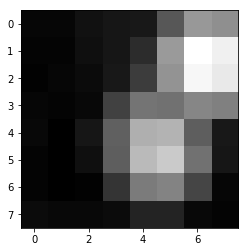

Spot reconstructed from gaussian fit parameters using sigma_min:


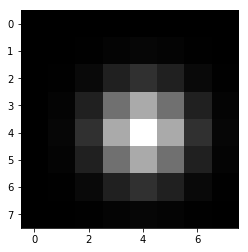

Spot reconstructed from gaussian fit parameters using sigma_max:


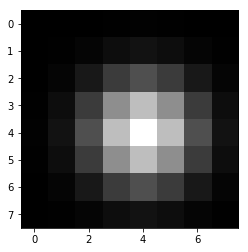

Original crop
[[ 16  16  21  23  24  52  81  77]
 [ 15  15  20  23  33  82 127 120]
 [ 14  16  18  24  40  79 123 117]
 [ 16  15  17  42  65  64  73  70]
 [ 17  13  23  56  91  93  55  24]
 [ 15  13  20  55  96 103  64  23]
 [ 15  13  14  37  68  72  44  16]
 [ 18  17  17  18  29  29  17  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   4  16  24  16   4   0]
 [  0   2  16  56  84  56  16   2]
 [  0   3  24  84 127  84  24   3]
 [  0   2  16  56  84  56  16   2]
 [  0   0   4  16  24  16   4   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   1   0   0   0]
 [  0   0   2   6   9   6   2   0]
 [  0   2  12  29  39  29  12   2]
 [  0   6  29  70  94  70  29   6]
 [  1   9  39  94 127  94  39   9]
 [  0   6  29  70  94  70  29   6]
 [  0   2  12  29  39  29  12   2]
 [  0   0   2   6   9   6   2   0]]

---------------------------------------------------

x: 277.67
y: 90.463
sigma_min

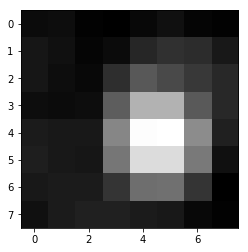

Spot reconstructed from gaussian fit parameters using sigma_min:


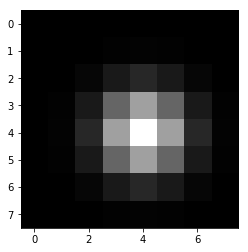

Spot reconstructed from gaussian fit parameters using sigma_max:


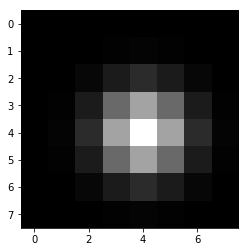

Original crop
[[ 23  24  20  19  22  25  21  20]
 [ 27  25  21  23  33  37  35  28]
 [ 27  24  22  36  51  46  40  34]
 [ 24  23  24  53  84  84  52  34]
 [ 29  28  28  68 111 112  70  31]
 [ 30  28  27  62  99  99  63  25]
 [ 28  29  29  38  59  60  38  19]
 [ 25  29  31  31  29  28  22  20]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  11  17  11   2   0]
 [  0   1  11  44  70  44  11   1]
 [  0   1  17  70 112  70  17   1]
 [  0   1  11  44  70  44  11   1]
 [  0   0   2  11  17  11   2   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  18  12   3   0]
 [  0   1  12  45  71  45  12   1]
 [  0   2  18  71 112  71  18   2]
 [  0   1  12  45  71  45  12   1]
 [  0   0   3  12  18  12   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 278.43
y: 242.4
sigma_min:

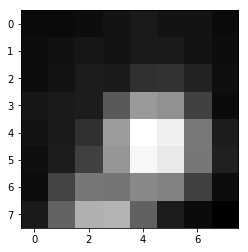

Spot reconstructed from gaussian fit parameters using sigma_min:


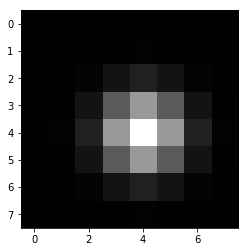

Spot reconstructed from gaussian fit parameters using sigma_max:


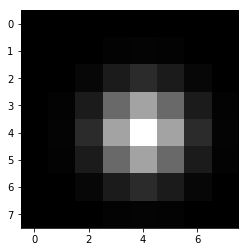

Original crop
[[ 16  16  17  20  23  20  20  16]
 [ 17  19  21  20  23  23  20  17]
 [ 17  20  24  23  33  34  27  18]
 [ 21  23  24  52  81  77  41  16]
 [ 20  23  33  82 127 120  66  24]
 [ 18  24  40  79 123 117  65  26]
 [ 17  42  65  64  73  70  40  17]
 [ 23  56  91  93  55  24  16  11]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   9  45  75  45   9   0]
 [  0   1  16  75 127  75  16   1]
 [  0   0   9  45  75  45   9   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  13  21  13   3   0]
 [  0   1  13  52  81  52  13   1]
 [  0   2  21  81 127  81  21   2]
 [  0   1  13  52  81  52  13   1]
 [  0   0   3  13  21  13   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 279.02
y: 71.595
sigma_min

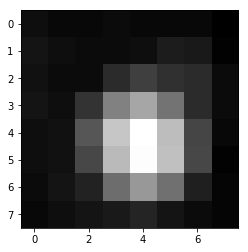

Spot reconstructed from gaussian fit parameters using sigma_min:


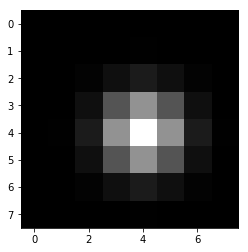

Spot reconstructed from gaussian fit parameters using sigma_max:


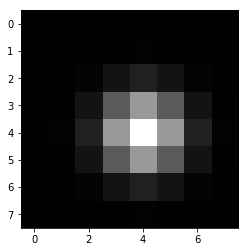

Original crop
[[ 19  17  17  18  17  17  17  14]
 [ 21  19  18  18  19  24  23  15]
 [ 20  18  18  29  36  31  29  18]
 [ 21  19  32  59  72  54  29  18]
 [ 19  20  44  83 103  80  38  17]
 [ 19  20  39  79 102  81  39  15]
 [ 18  21  26  52  67  53  25  16]
 [ 17  19  21  23  27  21  18  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  33  59  33   6   0]
 [  0   0  11  59 103  59  11   0]
 [  0   0   6  33  59  33   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  36  61  36   7   0]
 [  0   1  13  61 103  61  13   1]
 [  0   0   7  36  61  36   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 279.2
y: 181.85
sigma_min:

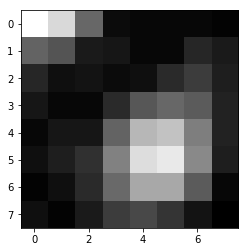

Spot reconstructed from gaussian fit parameters using sigma_min:


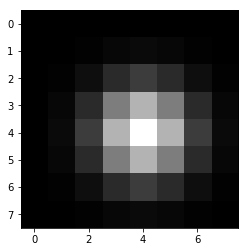

Spot reconstructed from gaussian fit parameters using sigma_max:


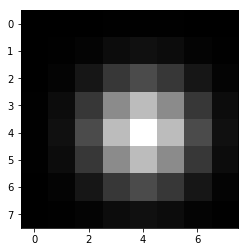

Original crop
[[78 68 38 14 13 13 13 12]
 [37 33 18 17 13 13 21 18]
 [21 15 16 14 15 22 27 19]
 [17 13 13 22 34 38 35 20]
 [13 17 17 37 59 62 44 20]
 [15 19 24 45 69 72 47 19]
 [12 15 22 39 55 55 35 13]
 [15 12 18 27 30 25 16 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 18 13  4  0]
 [ 0  2 13 38 54 38 13  2]
 [ 0  3 18 54 78 54 18  3]
 [ 0  2 13 38 54 38 13  2]
 [ 0  0  4 13 18 13  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5  3  1  0]
 [ 0  1  6 17 23 17  6  1]
 [ 0  3 17 42 57 42 17  3]
 [ 0  5 23 57 78 57 23  5]
 [ 0  3 17 42 57 42 17  3]
 [ 0  1  6 17 23 17  6  1]
 [ 0  0  1  3  5  3  1  0]]

---------------------------------------------------

x: 279.45
y: 134.76
sigma_min: 1.0518476467583144
sigma_max: 1.073523881142912
height: 73.16511484591163
max_intensity: 84


Original crop around spot at (279, 134):


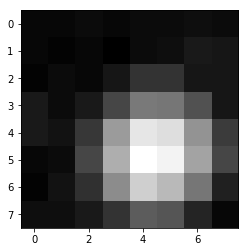

Spot reconstructed from gaussian fit parameters using sigma_min:


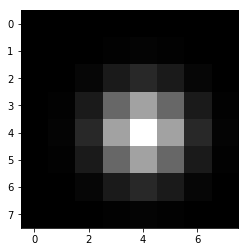

Spot reconstructed from gaussian fit parameters using sigma_max:


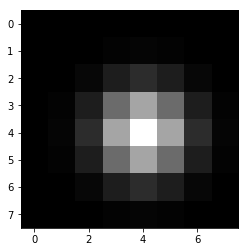

Original crop
[[17 17 18 17 18 18 19 18]
 [17 16 17 15 18 19 22 21]
 [16 18 17 21 29 29 21 21]
 [22 18 22 34 48 47 37 21]
 [22 20 30 57 77 75 55 31]
 [17 18 34 62 84 81 59 34]
 [16 20 28 53 71 65 47 24]
 [19 19 22 29 40 38 25 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 34 53 34  8  0]
 [ 0  1 13 53 84 53 13  1]
 [ 0  0  8 34 53 34  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 35 54 35  9  1]
 [ 0  1 14 54 84 54 14  1]
 [ 0  1  9 35 54 35  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 282.1
y: 330.4
sigma_min: 1.0211138652889862
sigma_max: 1.0726463634308299
height: 52.46421616727476
max_intensity: 67


Original crop around spot at (282, 330):


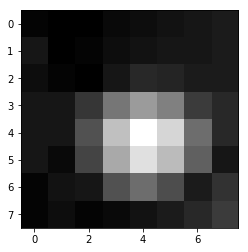

Spot reconstructed from gaussian fit parameters using sigma_min:


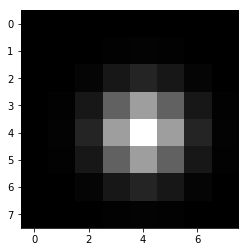

Spot reconstructed from gaussian fit parameters using sigma_max:


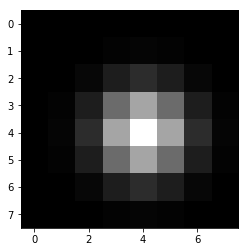

Original crop
[[12 11 11 13 14 15 16 17]
 [16 11 12 14 15 16 16 17]
 [14 12 11 16 20 19 17 17]
 [16 16 23 37 45 39 24 20]
 [16 16 29 53 67 58 35 20]
 [16 13 26 48 60 52 32 16]
 [12 15 16 29 35 28 17 22]
 [12 14 12 13 15 17 20 24]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 25 41 25  6  0]
 [ 0  0  9 41 67 41  9  0]
 [ 0  0  6 25 41 25  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 28 43 28  7  0]
 [ 0  1 11 43 67 43 11  1]
 [ 0  0  7 28 43 28  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 282.63
y: 108.5
sigma_min: 1.11487735041036
sigma_max: 1.1252426406469338
height: 60.49555837687303
max_intensity: 79


Original crop around spot at (282, 108):


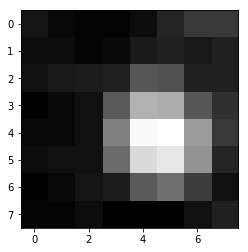

Spot reconstructed from gaussian fit parameters using sigma_min:


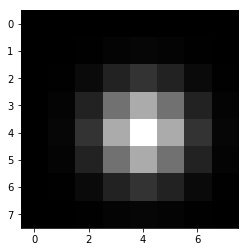

Spot reconstructed from gaussian fit parameters using sigma_max:


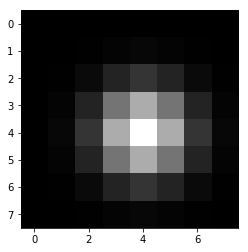

Original crop
[[22 19 18 18 20 26 31 31]
 [20 20 18 19 23 25 23 25]
 [21 23 24 25 38 37 25 25]
 [17 19 21 39 60 59 38 29]
 [19 19 21 48 78 79 55 31]
 [20 21 21 43 70 73 53 26]
 [17 19 22 24 39 44 32 21]
 [18 18 20 17 17 17 21 25]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 35 52 35 10  1]
 [ 0  2 15 52 79 52 15  2]
 [ 0  1 10 35 52 35 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 16 10  3  0]
 [ 0  1 10 35 53 35 10  1]
 [ 0  2 16 53 79 53 16  2]
 [ 0  1 10 35 53 35 10  1]
 [ 0  0  3 10 16 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 283.9
y: 225.05
sigma_min: 0.9484018630954378
sigma_max: 1.0682001259510578
height: 85.64330868863904
max_intensity: 100


Original crop around spot at (283, 225):


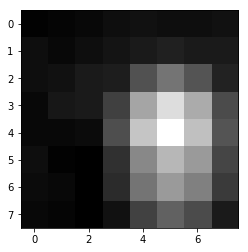

Spot reconstructed from gaussian fit parameters using sigma_min:


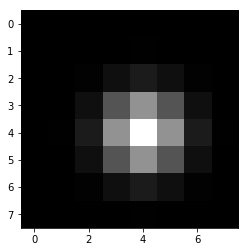

Spot reconstructed from gaussian fit parameters using sigma_max:


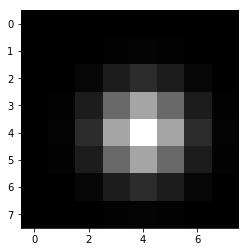

Original crop
[[ 13  14  15  17  18  17  17  18]
 [ 17  15  17  19  21  23  21  21]
 [ 17  18  21  22  40  52  41  24]
 [ 15  20  21  34  69  88  71  38]
 [ 15  15  16  39  80 100  78  41]
 [ 17  13  12  29  59  75  65  36]
 [ 16  15  12  27  52  65  56  32]
 [ 15  14  12  18  35  46  38  21]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0  10  57 100  57  10   0]
 [  0   0   6  32  57  32   6   0]
 [  0   0   1   6  10   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  11  17  11   3   0]
 [  0   1  11  41  64  41  11   1]
 [  0   1  17  64 100  64  17   1]
 [  0   1  11  41  64  41  11   1]
 [  0   0   3  11  17  11   3   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 284.92
y: 180.45
sigma_min

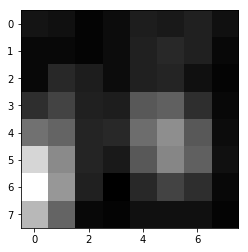

Spot reconstructed from gaussian fit parameters using sigma_min:


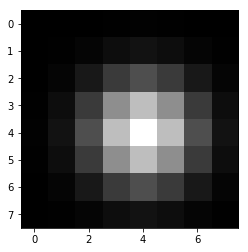

Spot reconstructed from gaussian fit parameters using sigma_max:


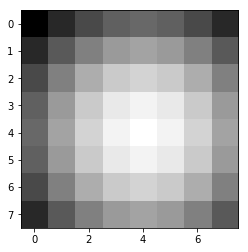

Original crop
[[16 15 12 14 18 17 19 15]
 [13 13 12 14 19 21 19 13]
 [13 21 18 14 19 20 15 12]
 [22 27 19 18 32 34 22 13]
 [38 35 20 21 37 45 32 14]
 [62 44 20 17 32 43 34 15]
 [72 47 19 11 21 27 22 13]
 [55 35 13 12 15 15 15 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  5  3  1  0]
 [ 0  1  6 16 22 16  6  1]
 [ 0  3 16 39 53 39 16  3]
 [ 0  5 22 53 72 53 22  5]
 [ 0  3 16 39 53 39 16  3]
 [ 0  1  6 16 22 16  6  1]
 [ 0  0  1  3  5  3  1  0]]
Reconstructed using sigma max
[[34 40 45 48 49 48 45 40]
 [40 47 53 57 58 57 53 47]
 [45 53 59 64 65 64 59 53]
 [48 57 64 68 70 68 64 57]
 [49 58 65 70 72 70 65 58]
 [48 57 64 68 70 68 64 57]
 [45 53 59 64 65 64 59 53]
 [40 47 53 57 58 57 53 47]]

---------------------------------------------------

x: 286.82
y: 186.68
sigma_min: 1.1772047587553827
sigma_max: 1.2119454065675046
height: 36.00279340083629
max_intensity: 51


Original crop around spot at (286, 186):


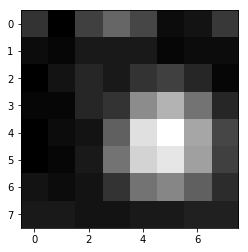

Spot reconstructed from gaussian fit parameters using sigma_min:


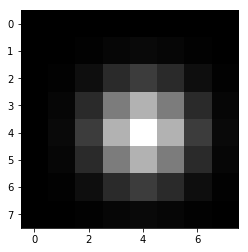

Spot reconstructed from gaussian fit parameters using sigma_max:


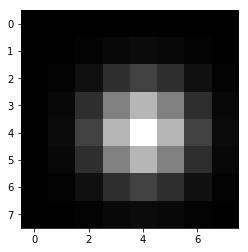

Original crop
[[19 11 21 27 22 13 14 20]
 [13 12 15 15 15 12 13 13]
 [11 14 17 15 19 21 17 12]
 [12 12 17 19 33 39 29 17]
 [11 13 14 26 46 51 37 22]
 [11 12 15 29 44 47 36 21]
 [14 13 14 19 29 32 26 18]
 [15 15 14 14 15 15 16 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 24 35 24  8  1]
 [ 0  1 12 35 51 35 12  1]
 [ 0  1  8 24 35 24  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 13  9  3  0]
 [ 0  1  9 25 36 25  9  1]
 [ 0  2 13 36 51 36 13  2]
 [ 0  1  9 25 36 25  9  1]
 [ 0  0  3  9 13  9  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 287.08
y: 80.807
sigma_min: 1.310625824315905
sigma_max: 1.5722405835262245
height: 33.28044511493484
max_intensity: 52


Original crop around spot at (287, 80):


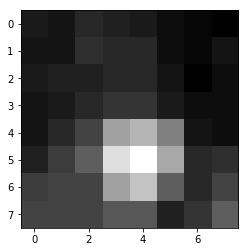

Spot reconstructed from gaussian fit parameters using sigma_min:


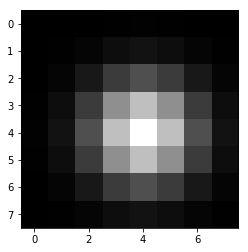

Spot reconstructed from gaussian fit parameters using sigma_max:


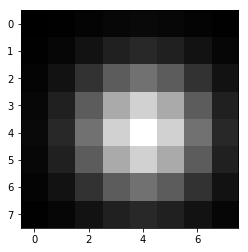

Original crop
[[18 17 20 19 18 16 15 14]
 [17 17 21 20 20 16 15 17]
 [18 19 19 20 20 17 14 16]
 [17 18 20 22 22 18 16 16]
 [17 20 24 38 41 33 17 16]
 [19 23 28 47 52 39 20 21]
 [23 24 24 38 43 28 20 24]
 [24 24 24 27 27 19 22 28]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 12 16 12  5  1]
 [ 0  2 12 29 38 29 12  2]
 [ 0  3 16 38 52 38 16  3]
 [ 0  2 12 29 38 29 12  2]
 [ 0  1  5 12 16 12  5  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  3  6  8  6  3  1]
 [ 0  3 10 18 23 18 10  3]
 [ 1  6 18 34 42 34 18  6]
 [ 2  8 23 42 52 42 23  8]
 [ 1  6 18 34 42 34 18  6]
 [ 0  3 10 18 23 18 10  3]
 [ 0  1  3  6  8  6  3  1]]

---------------------------------------------------

x: 288.22
y: 109.01
sigma_min: 1.0564330562646331
sigma_max: 1.1723411842638947
height: 68.20654108620346
max_intensity: 92


Original crop around spot at (288, 109):


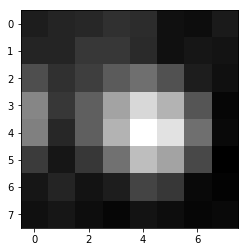

Spot reconstructed from gaussian fit parameters using sigma_min:


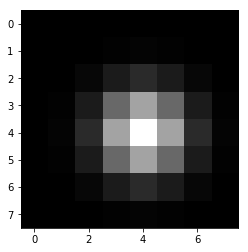

Spot reconstructed from gaussian fit parameters using sigma_max:


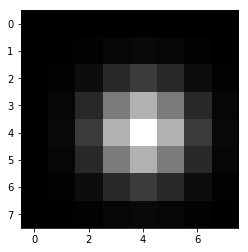

Original crop
[[23 25 26 29 28 19 18 22]
 [25 25 31 31 27 19 21 20]
 [38 29 33 42 48 39 23 19]
 [55 31 43 64 80 69 40 16]
 [53 26 43 69 92 83 48 17]
 [32 21 31 49 72 64 36 14]
 [21 25 20 23 35 31 17 15]
 [19 21 18 16 20 18 16 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 15  9  2  0]
 [ 0  1  9 37 58 37  9  1]
 [ 0  1 15 58 92 58 15  1]
 [ 0  1  9 37 58 37  9  1]
 [ 0  0  2  9 15  9  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 14 21 14  5  0]
 [ 0  2 14 44 63 44 14  2]
 [ 0  3 21 63 92 63 21  3]
 [ 0  2 14 44 63 44 14  2]
 [ 0  0  5 14 21 14  5  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 289.62
y: 119.77
sigma_min: 1.2702886206699475
sigma_max: 1.2853227913616347
height: 41.76738071260823
max_intensity: 64


Original crop around spot at (289, 119):


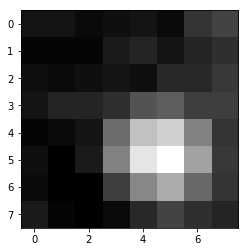

Spot reconstructed from gaussian fit parameters using sigma_min:


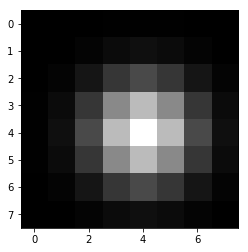

Spot reconstructed from gaussian fit parameters using sigma_max:


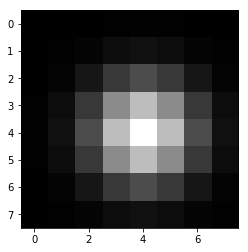

Original crop
[[19 19 17 18 19 17 25 28]
 [16 16 16 20 22 19 22 24]
 [18 17 18 19 18 23 23 26]
 [19 22 22 24 31 33 27 27]
 [16 17 19 36 52 55 40 25]
 [18 15 20 40 59 64 46 26]
 [17 15 15 27 41 48 35 25]
 [20 16 15 17 23 28 24 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 13 18 13  5  1]
 [ 0  2 13 34 46 34 13  2]
 [ 0  3 18 46 64 46 18  3]
 [ 0  2 13 34 46 34 13  2]
 [ 0  1  5 13 18 13  5  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  5 14 19 14  5  1]
 [ 0  3 14 34 47 34 14  3]
 [ 0  4 19 47 64 47 19  4]
 [ 0  3 14 34 47 34 14  3]
 [ 0  1  5 14 19 14  5  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 290.21
y: 261.23
sigma_min: 0.8928088289521802
sigma_max: 0.9222515058844621
height: 81.85157528533873
max_intensity: 87


Original crop around spot at (290, 261):


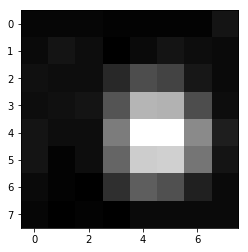

Spot reconstructed from gaussian fit parameters using sigma_min:


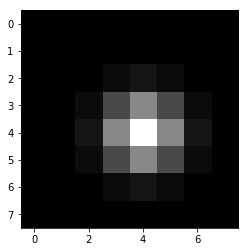

Spot reconstructed from gaussian fit parameters using sigma_max:


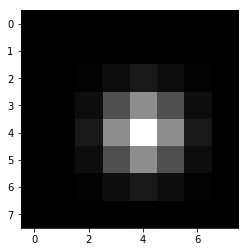

Original crop
[[13 13 13 12 12 12 12 17]
 [14 17 15 11 14 17 15 14]
 [16 15 15 23 34 31 18 14]
 [15 16 17 36 65 64 34 15]
 [17 15 15 48 87 87 52 20]
 [17 12 15 41 72 73 46 17]
 [14 12 11 25 39 35 21 14]
 [13 11 12 11 14 14 14 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  3 24 46 24  3  0]
 [ 0  0  7 46 87 46  7  0]
 [ 0  0  3 24 46 24  3  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  8 48 87 48  8  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 290.63
y: 127.39
sigma_min: 1.0388088049855935
sigma_max: 1.0715581882912848
height: 65.37163191105077
max_intensity: 85


Original crop around spot at (290, 127):


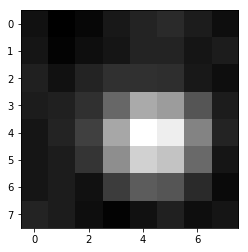

Spot reconstructed from gaussian fit parameters using sigma_min:


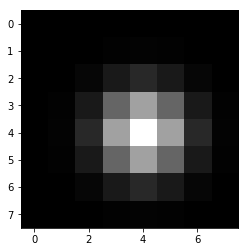

Spot reconstructed from gaussian fit parameters using sigma_max:


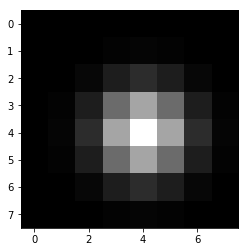

Original crop
[[18 13 15 20 23 25 21 17]
 [19 14 17 19 23 23 19 21]
 [22 18 23 27 27 26 20 17]
 [21 22 27 42 61 57 37 21]
 [19 23 31 60 85 80 50 23]
 [19 21 28 53 72 68 43 19]
 [19 21 18 30 39 37 25 16]
 [23 21 17 14 18 22 17 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 33 53 33  8  0]
 [ 0  1 13 53 85 53 13  1]
 [ 0  0  8 33 53 33  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 35 54 35  9  1]
 [ 0  1 14 54 85 54 14  1]
 [ 0  1  9 35 54 35  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 291.65
y: 286.05
sigma_min: 0.9071577722841488
sigma_max: 0.9779997436277413
height: 74.07733713011648
max_intensity: 82


Original crop around spot at (291, 286):


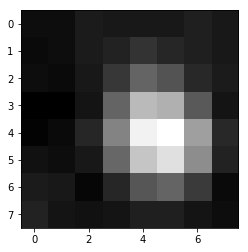

Spot reconstructed from gaussian fit parameters using sigma_min:


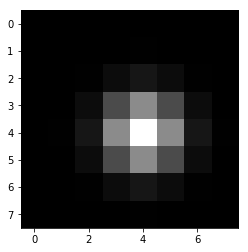

Spot reconstructed from gaussian fit parameters using sigma_max:


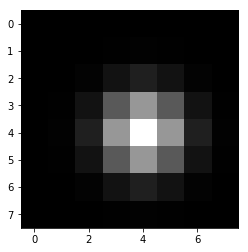

Original crop
[[12 12 16 15 15 15 17 15]
 [11 12 16 18 23 19 17 15]
 [12 11 15 24 37 32 20 16]
 [ 8  8 14 37 62 59 34 14]
 [ 9 11 19 46 78 82 54 20]
 [13 12 15 38 65 73 49 18]
 [16 15 10 19 33 37 25 11]
 [18 14 13 14 17 17 14 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  3 24 44 24  3  0]
 [ 0  0  7 44 82 44  7  0]
 [ 0  0  3 24 44 24  3  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 28 48 28  6  0]
 [ 0  0 10 48 82 48 10  0]
 [ 0  0  6 28 48 28  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 294.95
y: 160.04
sigma_min: 0.932899138229978
sigma_max: 0.9914230960832279
height: 95.95532547040965
max_intensity: 114


Original crop around spot at (294, 160):


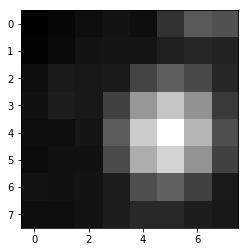

Spot reconstructed from gaussian fit parameters using sigma_min:


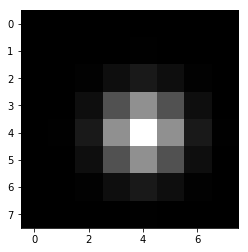

Spot reconstructed from gaussian fit parameters using sigma_max:


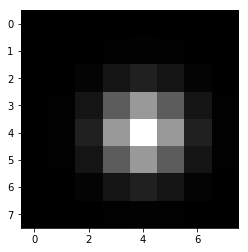

Original crop
[[  9  12  15  17  15  30  46  43]
 [ 10  13  17  18  18  22  25  23]
 [ 15  20  19  20  37  48  39  25]
 [ 16  21  19  36  71  90  69  33]
 [ 15  15  18  47  93 114  84  41]
 [ 14  16  16  40  80  96  70  36]
 [ 17  16  17  21  41  49  36  20]
 [ 15  15  17  21  26  26  21  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0  11  64 114  64  11   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   8  41  68  41   8   0]
 [  0   1  14  68 114  68  14   1]
 [  0   0   8  41  68  41   8   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 296.22
y: 155.09
sigma_min

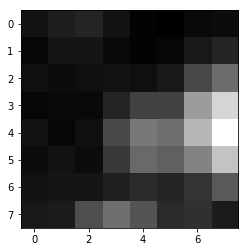

Spot reconstructed from gaussian fit parameters using sigma_min:


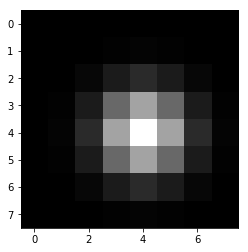

Spot reconstructed from gaussian fit parameters using sigma_max:


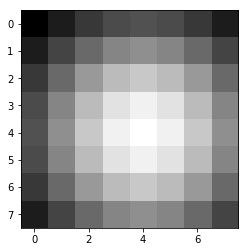

Original crop
[[17 21 23 17 12 11 14 15]
 [13 18 18 14 12 13 19 23]
 [16 15 16 17 16 19 35 47]
 [13 14 14 23 33 33 63 82]
 [17 13 16 35 51 48 72 96]
 [15 17 15 30 46 43 55 76]
 [17 18 18 22 25 23 28 41]
 [19 20 37 48 39 25 27 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2 10 15 10  2  0]
 [ 0  1 10 39 61 39 10  1]
 [ 0  1 15 61 96 61 15  1]
 [ 0  1 10 39 61 39 10  1]
 [ 0  0  2 10 15 10  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[21 30 38 43 45 43 38 30]
 [30 41 52 60 63 60 52 41]
 [38 52 66 76 79 76 66 52]
 [43 60 76 87 91 87 76 60]
 [45 63 79 91 96 91 79 63]
 [43 60 76 87 91 87 76 60]
 [38 52 66 76 79 76 66 52]
 [30 41 52 60 63 60 52 41]]

---------------------------------------------------

x: 299.53
y: 154.96
sigma_min: 0.9677381173314537
sigma_max: 1.0567684191720852
height: 77.71442405806826
max_intensity: 96


Original crop around spot at (299, 154):


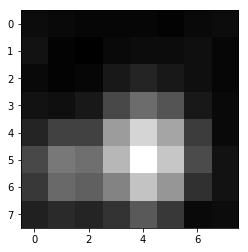

Spot reconstructed from gaussian fit parameters using sigma_min:


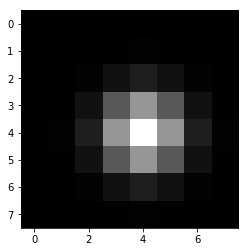

Spot reconstructed from gaussian fit parameters using sigma_max:


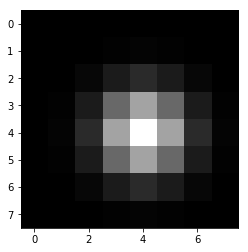

Original crop
[[15 14 13 13 13 12 14 15]
 [17 12 11 14 15 15 16 13]
 [14 12 13 19 23 19 16 13]
 [17 16 19 35 47 39 19 14]
 [23 33 33 63 82 66 31 14]
 [35 51 48 72 96 77 36 17]
 [30 46 43 55 76 61 27 17]
 [22 25 23 28 41 30 14 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 33 56 33  6  0]
 [ 0  0 11 56 96 56 11  0]
 [ 0  0  6 33 56 33  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2 10 16 10  2  0]
 [ 0  1 10 39 61 39 10  1]
 [ 0  1 16 61 96 61 16  1]
 [ 0  1 10 39 61 39 10  1]
 [ 0  0  2 10 16 10  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 299.89
y: 253.12
sigma_min: 1.0663160808162113
sigma_max: 1.071004137399835
height: 67.84236469806342
max_intensity: 86


Original crop around spot at (299, 253):


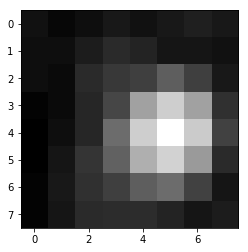

Spot reconstructed from gaussian fit parameters using sigma_min:


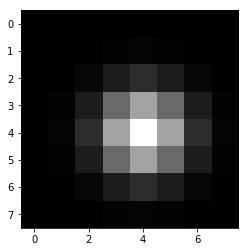

Spot reconstructed from gaussian fit parameters using sigma_max:


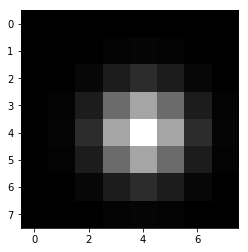

Original crop
[[18 15 17 20 18 20 22 20]
 [17 17 21 25 23 19 19 18]
 [17 16 25 29 31 40 31 20]
 [14 16 24 33 59 72 59 27]
 [13 17 24 44 72 86 71 32]
 [13 19 28 41 63 73 57 25]
 [14 20 27 31 40 44 32 19]
 [14 19 25 26 26 23 19 21]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 35 55 35  9  1]
 [ 0  1 14 55 86 55 14  1]
 [ 0  1  9 35 55 35  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 15  9  2  0]
 [ 0  1  9 35 55 35  9  1]
 [ 0  1 15 55 86 55 15  1]
 [ 0  1  9 35 55 35  9  1]
 [ 0  0  2  9 15  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 301.69
y: 198.24
sigma_min: 0.8752795496342568
sigma_max: 0.9329447930992075
height: 106.40602188732592
max_intensity: 115


Original crop around spot at (301, 198):


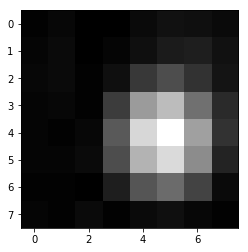

Spot reconstructed from gaussian fit parameters using sigma_min:


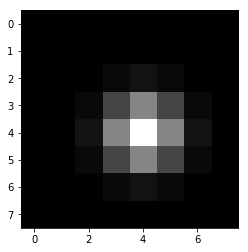

Spot reconstructed from gaussian fit parameters using sigma_max:


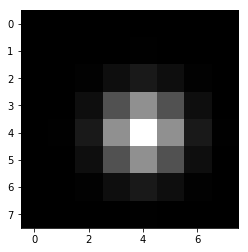

Original crop
[[ 14  16  13  13  17  20  19  17]
 [ 15  17  13  15  19  24  25  20]
 [ 16  17  14  19  36  44  33  21]
 [ 15  16  14  37  75  88  58  30]
 [ 15  14  16  49  99 115  77  33]
 [ 15  15  17  44  85 100  69  27]
 [ 14  14  13  25  47  56  40  17]
 [ 15  14  17  14  17  19  16  14]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   4  31  59  31   4   0]
 [  0   0   8  59 115  59   8   0]
 [  0   0   4  31  59  31   4   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0  11  64 115  64  11   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 302.07
y: 212.34
sigma_min

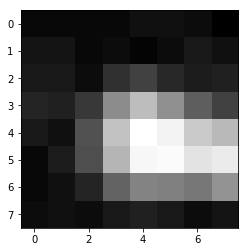

Spot reconstructed from gaussian fit parameters using sigma_min:


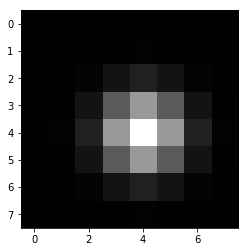

Spot reconstructed from gaussian fit parameters using sigma_max:


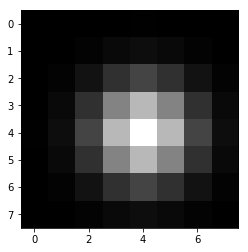

Original crop
[[16 16 16 16 18 18 17 14]
 [19 19 16 17 15 17 20 18]
 [20 20 17 26 30 24 21 22]
 [23 22 28 48 60 49 37 30]
 [20 18 34 61 76 73 63 59]
 [16 21 33 58 74 75 69 71]
 [16 18 23 38 46 45 43 50]
 [17 18 17 20 22 20 17 19]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 45 27  5  0]
 [ 0  0  9 45 76 45  9  0]
 [ 0  0  5 27 45 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 14 20 14  5  1]
 [ 0  2 14 39 54 39 14  2]
 [ 0  3 20 54 76 54 20  3]
 [ 0  2 14 39 54 39 14  2]
 [ 0  1  5 14 20 14  5  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 302.19
y: 94.02
sigma_min: 0.9661117061053427
sigma_max: 0.997480615479916
height: 87.08501587616257
max_intensity: 98


Original crop around spot at (302, 94):


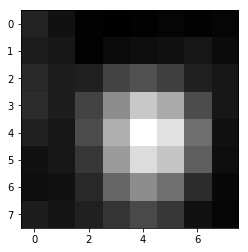

Spot reconstructed from gaussian fit parameters using sigma_min:


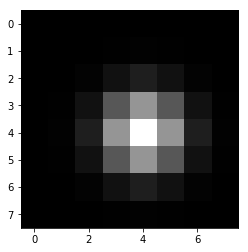

Spot reconstructed from gaussian fit parameters using sigma_max:


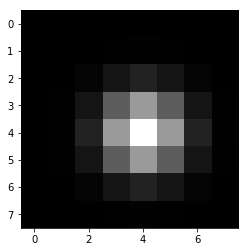

Original crop
[[23 17 12 11 12 13 12 13]
 [21 19 12 15 16 17 19 15]
 [25 21 22 34 39 33 22 19]
 [26 21 34 59 79 69 37 19]
 [22 19 37 71 98 88 49 17]
 [17 19 30 64 86 78 43 16]
 [16 17 25 46 59 50 26 14]
 [21 18 22 29 36 30 17 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 33 57 33  6  0]
 [ 0  0 11 57 98 57 11  0]
 [ 0  0  6 33 57 33  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 13  7  1  0]
 [ 0  0  7 35 59 35  7  0]
 [ 0  1 13 59 98 59 13  1]
 [ 0  0  7 35 59 35  7  0]
 [ 0  0  1  7 13  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 304.74
y: 136.54
sigma_min: 1.0225518381972927
sigma_max: 1.0483885170172262
height: 66.33984602730905
max_intensity: 84


Original crop around spot at (304, 136):


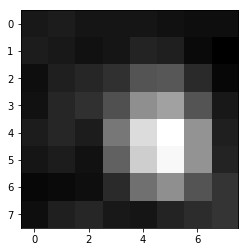

Spot reconstructed from gaussian fit parameters using sigma_min:


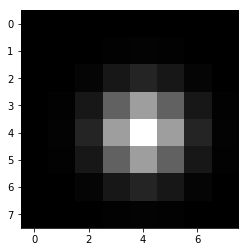

Spot reconstructed from gaussian fit parameters using sigma_max:


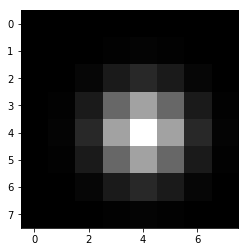

Original crop
[[18 19 17 17 17 16 15 15]
 [19 18 16 17 21 20 14 11]
 [15 20 22 25 35 36 23 13]
 [16 22 25 34 52 57 35 18]
 [19 22 19 45 74 84 53 20]
 [17 19 16 39 70 82 53 21]
 [13 14 15 23 43 52 35 26]
 [15 20 22 18 17 21 24 26]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 32 52 32  7  0]
 [ 0  1 12 52 84 52 12  1]
 [ 0  0  7 32 52 32  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 33 53 33  8  0]
 [ 0  1 13 53 84 53 13  1]
 [ 0  0  8 33 53 33  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 305.63
y: 121.55
sigma_min: 1.1585899724031687
sigma_max: 1.2598716708389786
height: 52.83093614788648
max_intensity: 82


Original crop around spot at (305, 121):


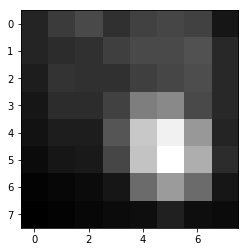

Spot reconstructed from gaussian fit parameters using sigma_min:


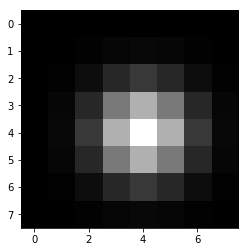

Spot reconstructed from gaussian fit parameters using sigma_max:


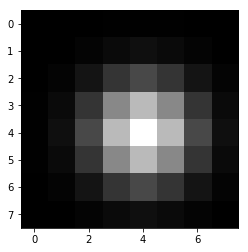

Original crop
[[23 29 33 26 31 32 31 19]
 [23 25 26 30 33 33 35 24]
 [21 27 26 26 30 32 34 24]
 [19 25 25 31 47 50 33 24]
 [18 21 21 36 67 78 54 23]
 [16 19 20 32 66 82 60 25]
 [14 15 16 19 42 55 42 19]
 [13 14 15 16 17 22 17 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 12 18 12  4  0]
 [ 0  1 12 38 56 38 12  1]
 [ 0  2 18 56 82 56 18  2]
 [ 0  1 12 38 56 38 12  1]
 [ 0  0  4 12 18 12  4  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 16 23 16  6  1]
 [ 0  3 16 43 59 43 16  3]
 [ 0  4 23 59 82 59 23  4]
 [ 0  3 16 43 59 43 16  3]
 [ 0  1  6 16 23 16  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 306.77
y: 212.85
sigma_min: 0.9598908227216514
sigma_max: 1.5023071970431625
height: 73.84518804267563
max_intensity: 84


Original crop around spot at (306, 212):


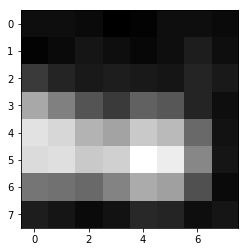

Spot reconstructed from gaussian fit parameters using sigma_min:


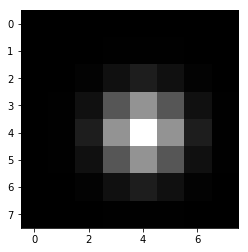

Spot reconstructed from gaussian fit parameters using sigma_max:


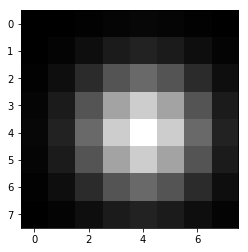

Original crop
[[18 18 17 14 15 18 18 17]
 [15 17 20 18 16 18 22 18]
 [30 24 21 22 21 20 24 21]
 [60 49 37 30 41 38 24 18]
 [76 73 63 59 69 65 43 19]
 [74 75 69 71 84 79 51 20]
 [46 45 43 50 61 58 36 17]
 [22 20 17 19 25 24 18 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 28 48 28  5  0]
 [ 0  0  9 48 84 48  9  0]
 [ 0  0  5 28 48 28  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  1  1  2  1  1  0]
 [ 0  1  4  9 11  9  4  1]
 [ 1  4 14 27 34 27 14  4]
 [ 1  9 27 53 67 53 27  9]
 [ 2 11 34 67 84 67 34 11]
 [ 1  9 27 53 67 53 27  9]
 [ 1  4 14 27 34 27 14  4]
 [ 0  1  4  9 11  9  4  1]]

---------------------------------------------------

x: 307.15
y: 109.01
sigma_min: 1.0131662390089577
sigma_max: 1.0402246982411796
height: 78.32414132153467
max_intensity: 102


Original crop around spot at (307, 109):


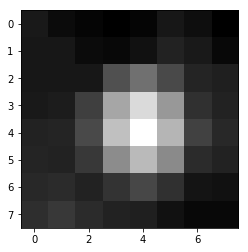

Spot reconstructed from gaussian fit parameters using sigma_min:


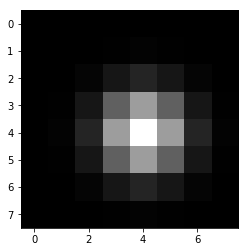

Spot reconstructed from gaussian fit parameters using sigma_max:


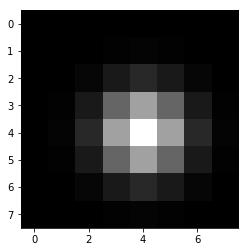

Original crop
[[ 22  17  15  13  15  21  18  13]
 [ 21  21  17  16  19  25  22  16]
 [ 21  21  21  41  52  39  26  24]
 [ 22  23  35  71  89  66  30  25]
 [ 25  26  39  80 102  76  36  27]
 [ 26  25  33  62  78  61  28  25]
 [ 27  28  25  31  38  30  20  19]
 [ 29  33  28  25  24  19  16  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   8  14   8   2   0]
 [  0   0   8  38  62  38   8   0]
 [  0   1  14  62 102  62  14   1]
 [  0   0   8  38  62  38   8   0]
 [  0   0   2   8  14   8   2   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  10  16  10   2   0]
 [  0   1  10  40  64  40  10   1]
 [  0   1  16  64 102  64  16   1]
 [  0   1  10  40  64  40  10   1]
 [  0   0   2  10  16  10   2   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 307.53
y: 157.75
sigma_min

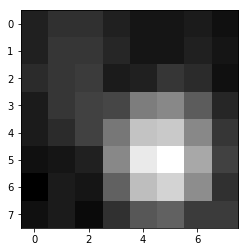

Spot reconstructed from gaussian fit parameters using sigma_min:


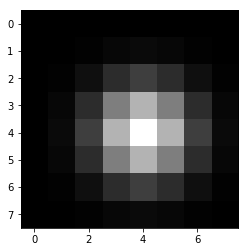

Spot reconstructed from gaussian fit parameters using sigma_max:


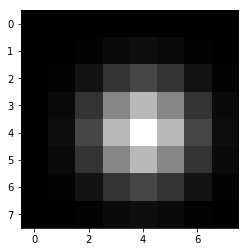

Original crop
[[17 20 20 17 15 15 16 14]
 [17 21 21 18 15 15 17 15]
 [19 21 22 16 17 21 19 14]
 [16 21 23 24 34 36 28 18]
 [16 19 23 33 47 48 36 21]
 [14 15 17 36 54 58 42 23]
 [11 16 15 29 46 50 37 20]
 [14 16 13 20 27 29 22 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 14  9  3  0]
 [ 0  1  9 28 40 28  9  1]
 [ 0  2 14 40 58 40 14  2]
 [ 0  1  9 28 40 28  9  1]
 [ 0  0  3  9 14  9  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 11 16 11  4  0]
 [ 0  2 11 30 42 30 11  2]
 [ 0  3 16 42 58 42 16  3]
 [ 0  2 11 30 42 30 11  2]
 [ 0  0  4 11 16 11  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 310.33
y: 120.66
sigma_min: 1.1823912289511416
sigma_max: 3.650535231021064
height: 2277.49135003103
max_intensity: 82


Original crop around spot at (310, 120):


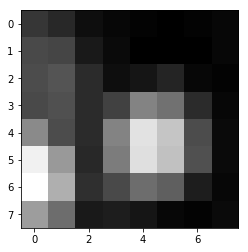

Spot reconstructed from gaussian fit parameters using sigma_min:


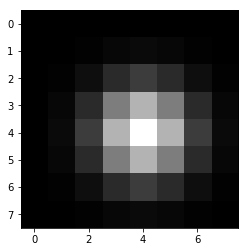

Spot reconstructed from gaussian fit parameters using sigma_max:


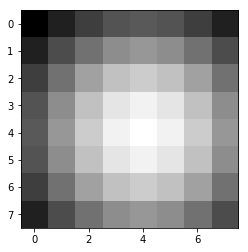

Original crop
[[27 23 16 14 13 12 13 14]
 [32 31 19 15 12 12 12 14]
 [33 35 24 16 18 22 14 13]
 [32 34 24 30 48 43 24 14]
 [50 33 24 48 74 66 33 15]
 [78 54 23 46 73 65 34 15]
 [82 60 25 32 42 38 20 14]
 [55 42 19 20 18 14 13 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 19 13  4  0]
 [ 0  2 13 40 57 40 13  2]
 [ 0  3 19 57 82 57 19  3]
 [ 0  2 13 40 57 40 13  2]
 [ 0  0  4 13 19 13  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[24 32 38 43 44 43 38 32]
 [32 41 50 56 58 56 50 41]
 [38 50 60 67 70 67 60 50]
 [43 56 67 76 78 76 67 56]
 [44 58 70 78 82 78 70 58]
 [43 56 67 76 78 76 67 56]
 [38 50 60 67 70 67 60 50]
 [32 41 50 56 58 56 50 41]]

---------------------------------------------------

x: 314.14
y: 229.19
sigma_min: 0.9974677690455924
sigma_max: 1.0132691129063178
height: 91.50705794742811
max_intensity: 109


Original crop around spot at (314, 229):


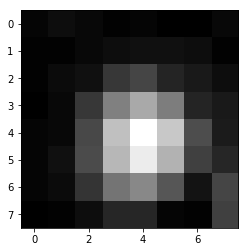

Spot reconstructed from gaussian fit parameters using sigma_min:


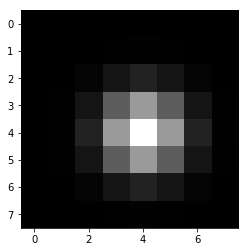

Spot reconstructed from gaussian fit parameters using sigma_max:


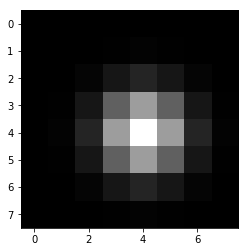

Original crop
[[ 19  22  20  18  19  17  17  20]
 [ 18  18  20  22  23  23  22  18]
 [ 18  21  23  37  42  30  26  22]
 [ 17  20  37  63  78  62  30  26]
 [ 19  20  43  86 109  89  45  27]
 [ 19  23  44  83 102  81  40  31]
 [ 19  21  36  59  66  48  24  42]
 [ 17  18  22  31  31  19  18  40]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   8  39  65  39   8   0]
 [  0   1  14  65 109  65  14   1]
 [  0   0   8  39  65  39   8   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   0   0   1   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   9  41  66  41   9   0]
 [  0   1  15  66 109  66  15   1]
 [  0   0   9  41  66  41   9   0]
 [  0   0   2   9  15   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 315.19
y: 322.42
sigma_min

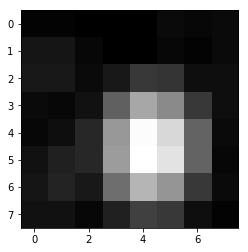

Spot reconstructed from gaussian fit parameters using sigma_min:


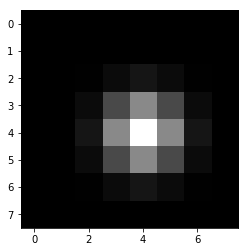

Spot reconstructed from gaussian fit parameters using sigma_max:


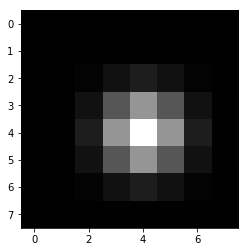

Original crop
[[11 11 10 10 10 13 12 13]
 [16 16 12 10 10 12 11 13]
 [17 17 13 17 26 25 14 14]
 [13 12 15 37 57 49 26 14]
 [12 14 21 53 81 71 38 13]
 [15 19 21 54 82 74 38 12]
 [16 20 17 41 61 52 26 13]
 [15 15 12 19 28 26 14 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  3 23 44 23  3  0]
 [ 0  0  6 44 82 44  6  0]
 [ 0  0  3 23 44 23  3  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 47 27  5  0]
 [ 0  0  9 47 82 47  9  0]
 [ 0  0  5 27 47 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 315.97
y: 215.35
sigma_min: 0.964286675612202
sigma_max: 0.9661891363922391
height: 79.50122398711011
max_intensity: 91


Original crop around spot at (315, 215):


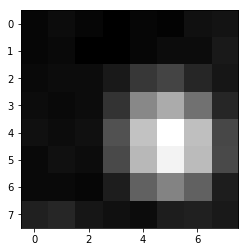

Spot reconstructed from gaussian fit parameters using sigma_min:


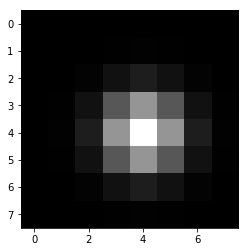

Spot reconstructed from gaussian fit parameters using sigma_max:


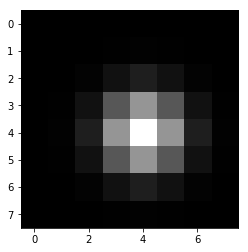

Original crop
[[14 16 14 12 14 13 17 18]
 [14 15 12 12 14 16 16 20]
 [15 16 16 20 29 33 24 19]
 [16 15 16 28 54 65 47 24]
 [17 16 17 37 72 91 71 34]
 [15 17 16 35 69 87 70 35]
 [15 15 14 21 42 53 42 21]
 [22 24 19 17 16 21 22 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0 10 53 91 53 10  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0 10 53 91 53 10  0]
 [ 0  0  6 31 53 31  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 317.82
y: 121.93
sigma_min: 1.063030709939207
sigma_max: 1.094855165930613
height: 48.877694362114475
max_intensity: 64


Original crop around spot at (317, 121):


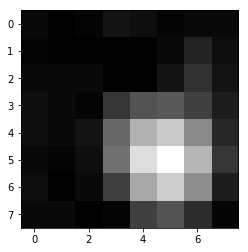

Spot reconstructed from gaussian fit parameters using sigma_min:


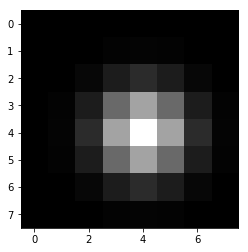

Spot reconstructed from gaussian fit parameters using sigma_max:


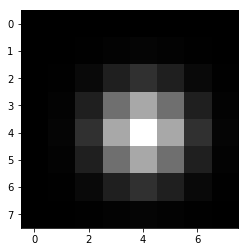

Original crop
[[14 12 13 16 15 13 14 14]
 [13 12 12 12 12 14 19 15]
 [14 14 14 12 12 16 22 16]
 [15 14 13 23 29 30 25 18]
 [15 14 16 33 48 53 40 20]
 [14 13 15 35 57 64 49 23]
 [15 12 14 25 46 54 41 18]
 [14 14 12 13 25 29 21 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 10  7  1  0]
 [ 0  0  7 26 41 26  7  0]
 [ 0  1 10 41 64 41 10  1]
 [ 0  0  7 26 41 26  7  0]
 [ 0  0  1  7 10  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  7 27 42 27  7  0]
 [ 0  1 12 42 64 42 12  1]
 [ 0  0  7 27 42 27  7  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 317.95
y: 160.42
sigma_min: 1.039125467061523
sigma_max: 1.0683940955583664
height: 48.16206503989699
max_intensity: 62


Original crop around spot at (317, 160):


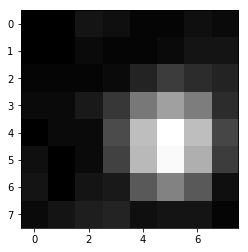

Spot reconstructed from gaussian fit parameters using sigma_min:


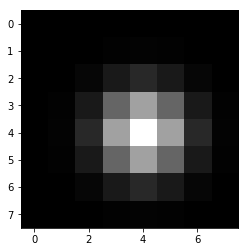

Spot reconstructed from gaussian fit parameters using sigma_max:


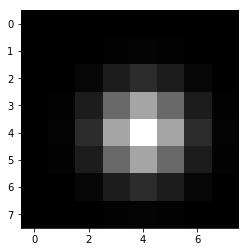

Original crop
[[11 11 15 14 12 12 14 13]
 [11 11 13 12 12 13 15 15]
 [12 12 12 13 18 23 20 18]
 [13 13 16 22 35 43 36 20]
 [11 13 13 26 49 62 49 25]
 [14 11 13 24 48 61 46 23]
 [15 11 15 16 29 37 29 14]
 [13 15 17 18 14 15 15 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 24 39 24  6  0]
 [ 0  0  9 39 62 39  9  0]
 [ 0  0  6 24 39 24  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 25 40 25  6  0]
 [ 0  1 10 40 62 40 10  1]
 [ 0  0  6 25 40 25  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 318.07
y: 205.67
sigma_min: 0.978255528564974
sigma_max: 1.1123371311677972
height: 67.66253269625525
max_intensity: 78


Original crop around spot at (318, 205):


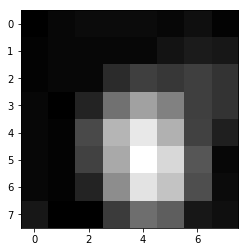

Spot reconstructed from gaussian fit parameters using sigma_min:


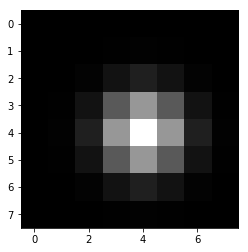

Spot reconstructed from gaussian fit parameters using sigma_max:


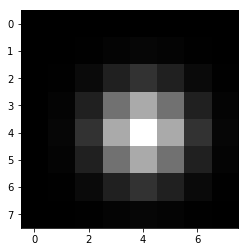

Original crop
[[13 15 16 16 16 15 17 14]
 [14 15 15 15 15 18 20 19]
 [14 15 15 24 29 27 29 26]
 [15 13 22 42 54 46 29 26]
 [15 14 32 59 72 58 30 21]
 [15 14 30 56 78 68 35 15]
 [15 14 22 49 71 63 33 16]
 [19 13 13 28 41 37 19 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 46 27  5  0]
 [ 0  0  9 46 78 46  9  0]
 [ 0  0  5 27 46 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 34 52 34 10  1]
 [ 0  2 15 52 78 52 15  2]
 [ 0  1 10 34 52 34 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 318.72
y: 231.54
sigma_min: 1.1389185308347547
sigma_max: 4.116321106708919
height: 2793564.1731820432
max_intensity: 109


Original crop around spot at (318, 231):


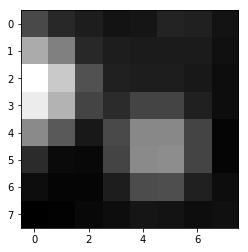

Spot reconstructed from gaussian fit parameters using sigma_min:


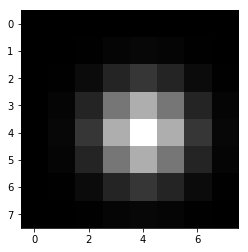

Spot reconstructed from gaussian fit parameters using sigma_max:


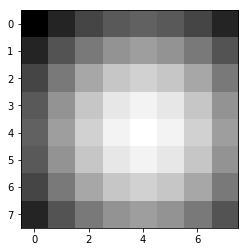

Original crop
[[ 42  30  26  22  23  28  27  22]
 [ 78  62  30  26  25  25  25  21]
 [109  89  45  27  26  26  24  20]
 [102  81  40  31  40  40  27  20]
 [ 66  48  24  42  65  65  40  17]
 [ 31  19  18  40  66  67  40  17]
 [ 20  17  17  26  43  44  27  20]
 [ 15  16  18  20  23  22  20  21]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   4  15  23  15   4   0]
 [  0   2  15  50  74  50  15   2]
 [  0   3  23  74 109  74  23   3]
 [  0   2  15  50  74  50  15   2]
 [  0   0   4  15  23  15   4   0]
 [  0   0   0   2   3   2   0   0]]
Reconstructed using sigma max
[[ 42  52  60  66  67  66  60  52]
 [ 52  64  74  81  83  81  74  64]
 [ 60  74  86  94  96  94  86  74]
 [ 66  81  94 102 105 102  94  81]
 [ 67  83  96 105 109 105  96  83]
 [ 66  81  94 102 105 102  94  81]
 [ 60  74  86  94  96  94  86  74]
 [ 52  64  74  81  83  81  74  64]]

---------------------------------------------------

x: 319.11
y: 261.62
sigma_min

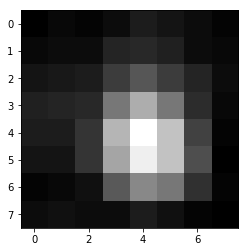

Spot reconstructed from gaussian fit parameters using sigma_min:


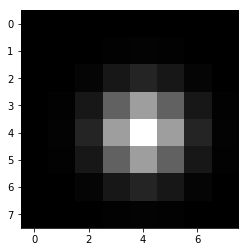

Spot reconstructed from gaussian fit parameters using sigma_max:


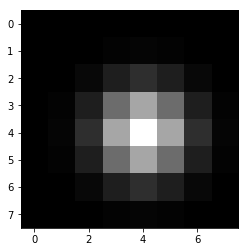

Original crop
[[13 15 14 16 20 18 16 14]
 [15 16 16 22 23 21 16 15]
 [18 19 20 28 34 28 22 16]
 [21 22 23 42 55 42 24 15]
 [20 20 26 57 75 60 29 14]
 [18 18 26 53 71 60 32 13]
 [14 15 17 35 46 42 25 14]
 [16 17 16 16 20 17 14 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 28 46 28  6  0]
 [ 0  0 10 46 75 46 10  0]
 [ 0  0  6 28 46 28  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  1  8 31 48 31  8  1]
 [ 0  1 13 48 75 48 13  1]
 [ 0  1  8 31 48 31  8  1]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 321.25
y: 148.48
sigma_min: 0.9304155849155217
sigma_max: 0.9612206173577973
height: 81.29745190421393
max_intensity: 94


Original crop around spot at (321, 148):


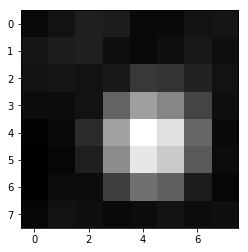

Spot reconstructed from gaussian fit parameters using sigma_min:


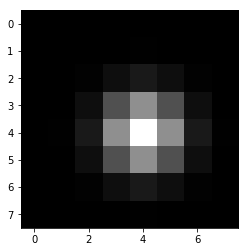

Spot reconstructed from gaussian fit parameters using sigma_max:


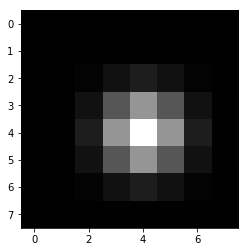

Original crop
[[15 18 22 21 15 15 18 19]
 [19 21 22 17 15 17 20 17]
 [18 19 18 20 30 29 23 18]
 [16 16 18 44 63 55 34 17]
 [13 15 26 64 94 84 45 15]
 [12 14 22 57 86 77 41 16]
 [12 16 16 32 48 43 21 14]
 [14 18 17 15 16 18 16 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  9 52 94 52  9  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 31 54 31  6  0]
 [ 0  0 10 54 94 54 10  0]
 [ 0  0  6 31 54 31  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 323.04
y: 329.48
sigma_min: 1.2233352912554574
sigma_max: 1.3120181476712407
height: 21.591070113049135
max_intensity: 35


Original crop around spot at (323, 329):


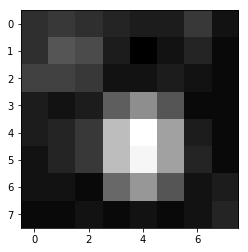

Spot reconstructed from gaussian fit parameters using sigma_min:


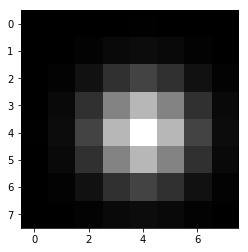

Spot reconstructed from gaussian fit parameters using sigma_max:


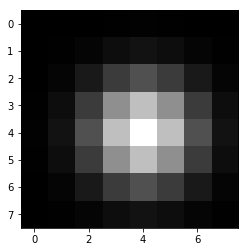

Original crop
[[13 14 13 12 11 11 14 10]
 [13 17 16 11  8 10 12  9]
 [15 15 14 10 10 11 10  9]
 [11 10 11 18 23 17  9  9]
 [11 12 14 28 35 25 11  9]
 [10 12 14 28 34 25 12  9]
 [10 10  9 19 24 17 10 11]
 [ 9  9 10  9 10  9 10 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  9  6  2  0]
 [ 0  1  6 17 25 17  6  1]
 [ 0  1  9 25 35 25  9  1]
 [ 0  1  6 17 25 17  6  1]
 [ 0  0  2  6  9  6  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  8 10  8  3  0]
 [ 0  1  8 19 26 19  8  1]
 [ 0  2 10 26 35 26 10  2]
 [ 0  1  8 19 26 19  8  1]
 [ 0  0  3  8 10  8  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 323.17
y: 190.89
sigma_min: 0.8973010850344374
sigma_max: 0.967154206150955
height: 113.86316623611542
max_intensity: 123


Original crop around spot at (323, 190):


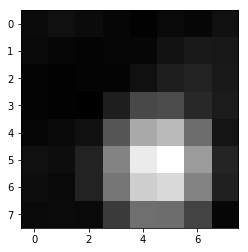

Spot reconstructed from gaussian fit parameters using sigma_min:


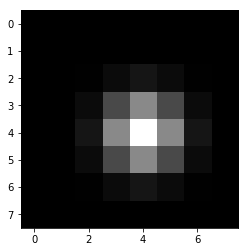

Spot reconstructed from gaussian fit parameters using sigma_max:


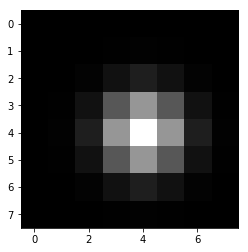

Original crop
[[ 18  20  18  16  14  17  16  20]
 [ 17  16  15  16  16  21  24  23]
 [ 15  14  15  15  20  26  28  24]
 [ 15  14  13  26  44  46  31  25]
 [ 16  17  20  50  86  93  60  22]
 [ 20  19  28  70 114 123  80  29]
 [ 19  17  28  64 102 107  70  27]
 [ 17  18  17  38  61  60  42  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  35  66  35   5   0]
 [  0   0  10  66 123  66  10   0]
 [  0   0   5  35  66  35   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   8  42  72  42   8   0]
 [  0   1  14  72 123  72  14   1]
 [  0   0   8  42  72  42   8   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 325.39
y: 237.16
sigma_min

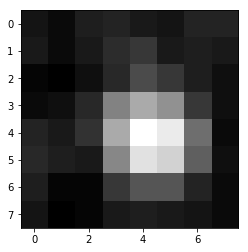

Spot reconstructed from gaussian fit parameters using sigma_min:


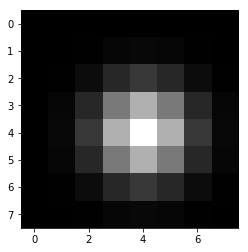

Spot reconstructed from gaussian fit parameters using sigma_max:


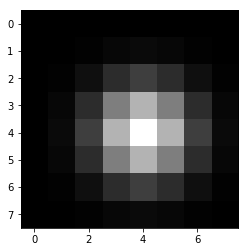

Original crop
[[20 18 22 23 21 20 23 23]
 [21 18 21 25 27 21 22 21]
 [17 16 19 24 31 27 22 19]
 [18 19 24 42 50 45 27 19]
 [23 21 26 50 67 63 38 18]
 [24 22 21 43 61 58 35 19]
 [22 17 17 27 33 33 23 18]
 [20 16 17 21 22 21 20 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 14 10  3  0]
 [ 0  1 10 31 46 31 10  1]
 [ 0  2 14 46 67 46 14  2]
 [ 0  1 10 31 46 31 10  1]
 [ 0  0  3 10 14 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  4 11 16 11  4  0]
 [ 0  2 11 33 47 33 11  2]
 [ 0  2 16 47 67 47 16  2]
 [ 0  2 11 33 47 33 11  2]
 [ 0  0  4 11 16 11  4  0]
 [ 0  0  0  2  2  2  0  0]]

---------------------------------------------------

x: 327.49
y: 203.32
sigma_min: 1.3230949863241295
sigma_max: 1.3467420051811547
height: 31.90237089999579
max_intensity: 42


Original crop around spot at (327, 203):


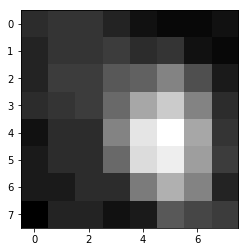

Spot reconstructed from gaussian fit parameters using sigma_min:


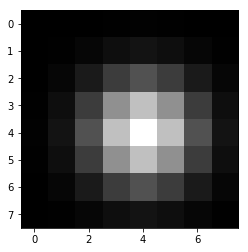

Spot reconstructed from gaussian fit parameters using sigma_max:


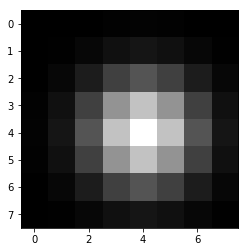

Original crop
[[18 19 19 17 15 14 14 15]
 [17 19 19 20 18 19 15 14]
 [17 20 20 23 24 28 22 16]
 [18 19 20 25 32 36 28 18]
 [15 18 18 28 39 42 32 19]
 [16 18 18 25 38 40 31 20]
 [16 16 18 18 27 33 28 17]
 [13 17 17 15 16 23 21 20]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  4 10 13 10  4  1]
 [ 0  2 10 23 31 23 10  2]
 [ 0  3 13 31 42 31 13  3]
 [ 0  2 10 23 31 23 10  2]
 [ 0  1  4 10 13 10  4  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  4 10 13 10  4  1]
 [ 0  2 10 24 31 24 10  2]
 [ 0  3 13 31 42 31 13  3]
 [ 0  2 10 24 31 24 10  2]
 [ 0  1  4 10 13 10  4  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 329.45
y: 210.38
sigma_min: 1.5758529949658509
sigma_max: 4.344407279898724
height: 346073.4279897554
max_intensity: 55


Original crop around spot at (329, 210):


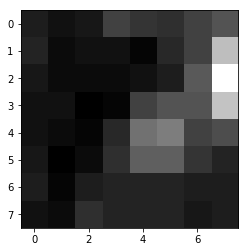

Spot reconstructed from gaussian fit parameters using sigma_min:


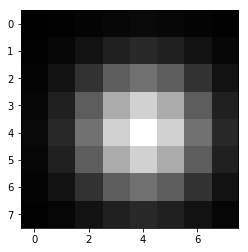

Spot reconstructed from gaussian fit parameters using sigma_max:


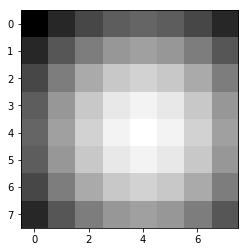

Original crop
[[17 15 16 23 21 20 23 26]
 [18 14 15 15 13 19 23 44]
 [16 14 14 14 15 17 27 55]
 [15 15 12 13 23 26 26 45]
 [15 14 13 19 31 33 23 25]
 [16 12 14 20 28 28 21 18]
 [17 13 17 18 18 18 17 17]
 [15 14 20 18 18 18 16 17]]
Reconstructed using sigma min
[[ 0  0  0  1  2  1  0  0]
 [ 0  1  4  7  8  7  4  1]
 [ 0  4 10 20 24 20 10  4]
 [ 1  7 20 36 44 36 20  7]
 [ 2  8 24 44 55 44 24  8]
 [ 1  7 20 36 44 36 20  7]
 [ 0  4 10 20 24 20 10  4]
 [ 0  1  4  7  8  7  4  1]]
Reconstructed using sigma max
[[23 28 32 35 35 35 32 28]
 [28 34 38 42 43 42 38 34]
 [32 38 44 48 49 48 44 38]
 [35 42 48 52 53 52 48 42]
 [35 43 49 53 55 53 49 43]
 [35 42 48 52 53 52 48 42]
 [32 38 44 48 49 48 44 38]
 [28 34 38 42 43 42 38 34]]

---------------------------------------------------

x: 332.32
y: 319.67
sigma_min: 0.9061828801587141
sigma_max: 0.9413494153916614
height: 79.18185306016662
max_intensity: 85


Original crop around spot at (332, 319):


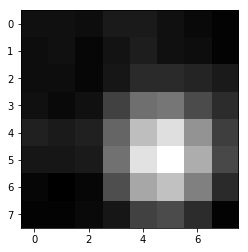

Spot reconstructed from gaussian fit parameters using sigma_min:


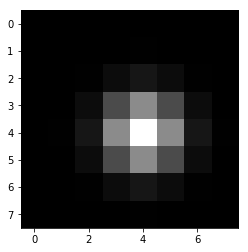

Spot reconstructed from gaussian fit parameters using sigma_max:


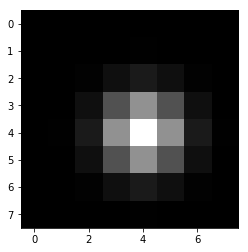

Original crop
[[12 12 11 15 15 12 10  8]
 [11 12  9 13 16 12 11  8]
 [11 11  9 14 20 20 18 15]
 [12 10 12 27 41 43 30 21]
 [17 15 17 38 65 75 52 26]
 [14 14 15 42 76 85 60 29]
 [ 9  7  9 31 58 66 46 20]
 [ 8  8 10 14 27 30 21  8]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 25 46 25  4  0]
 [ 0  0  7 46 85 46  7  0]
 [ 0  0  4 25 46 25  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  5 27 48 27  5  0]
 [ 0  0  8 48 85 48  8  0]
 [ 0  0  5 27 48 27  5  0]
 [ 0  0  0  5  8  5  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 333.24
y: 208.16
sigma_min: 1.1299314939002114
sigma_max: 1.1535920382675848
height: 49.982887933269716
max_intensity: 74


Original crop around spot at (333, 208):


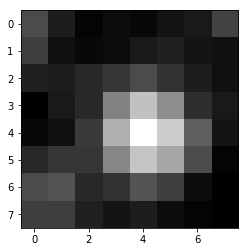

Spot reconstructed from gaussian fit parameters using sigma_min:


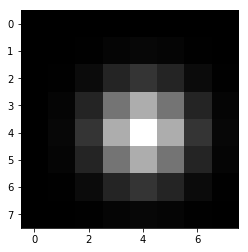

Spot reconstructed from gaussian fit parameters using sigma_max:


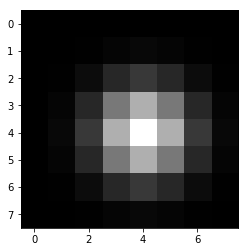

Original crop
[[31 20 14 16 15 18 19 29]
 [28 17 15 16 19 21 18 17]
 [21 20 23 26 31 25 20 17]
 [13 19 23 44 59 47 24 19]
 [15 17 27 55 74 62 36 18]
 [23 26 26 45 60 53 31 14]
 [31 33 23 25 33 28 16 13]
 [28 28 21 18 20 16 14 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 33 50 33 10  1]
 [ 0  2 15 50 74 50 15  2]
 [ 0  1 10 33 50 33 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 34 50 34 11  1]
 [ 0  2 16 50 74 50 16  2]
 [ 0  1 11 34 50 34 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 336.38
y: 202.66
sigma_min: 1.3591849593443879
sigma_max: 1.3703718724342928
height: 29.071416112872868
max_intensity: 42


Original crop around spot at (336, 202):


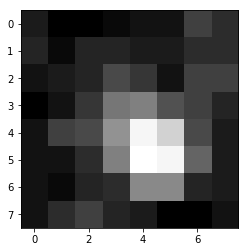

Spot reconstructed from gaussian fit parameters using sigma_min:


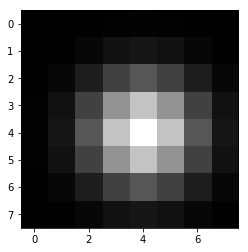

Spot reconstructed from gaussian fit parameters using sigma_max:


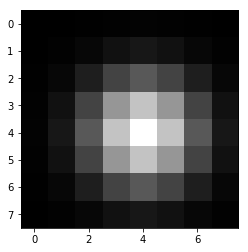

Original crop
[[17 14 14 15 16 16 21 19]
 [18 15 18 18 17 17 19 19]
 [16 17 18 22 20 16 21 21]
 [14 16 20 27 28 23 21 18]
 [16 21 22 30 41 37 22 17]
 [16 16 19 28 42 41 25 17]
 [16 15 18 19 29 29 18 17]
 [16 19 21 18 17 14 14 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  4 10 14 10  4  1]
 [ 0  2 10 24 32 24 10  2]
 [ 0  3 14 32 42 32 14  3]
 [ 0  2 10 24 32 24 10  2]
 [ 0  1  4 10 14 10  4  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  4 11 14 11  4  1]
 [ 0  2 11 24 32 24 11  2]
 [ 0  3 14 32 42 32 14  3]
 [ 0  2 11 24 32 24 11  2]
 [ 0  1  4 11 14 11  4  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 338.34
y: 215.22
sigma_min: 0.9901691188796964
sigma_max: 1.009357592246799
height: 79.18719579358431
max_intensity: 95


Original crop around spot at (338, 215):


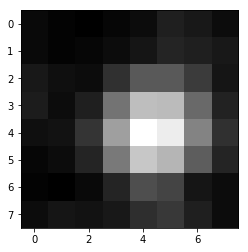

Spot reconstructed from gaussian fit parameters using sigma_min:


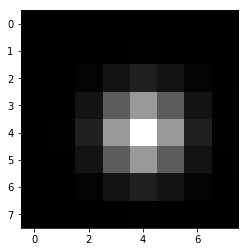

Spot reconstructed from gaussian fit parameters using sigma_max:


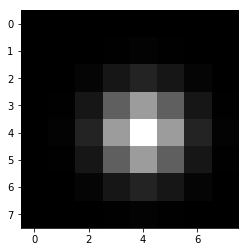

Original crop
[[16 14 13 15 17 23 21 17]
 [16 14 15 17 20 25 23 21]
 [21 18 17 29 42 42 32 20]
 [22 17 23 50 74 73 47 24]
 [18 19 30 64 95 89 55 29]
 [15 17 25 52 77 71 43 25]
 [14 13 16 25 38 35 20 17]
 [17 20 19 21 28 31 23 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 34 57 34  7  0]
 [ 0  0 12 57 95 57 12  0]
 [ 0  0  7 34 57 34  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  8 35 58 35  8  0]
 [ 0  1 13 58 95 58 13  1]
 [ 0  0  8 35 58 35  8  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 341.48
y: 257.44
sigma_min: 0.9004310380869489
sigma_max: 0.930587427962923
height: 110.46359545144401
max_intensity: 116


Original crop around spot at (341, 257):


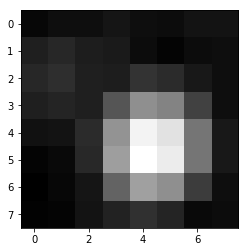

Spot reconstructed from gaussian fit parameters using sigma_min:


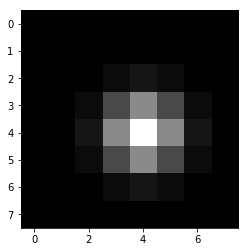

Spot reconstructed from gaussian fit parameters using sigma_max:


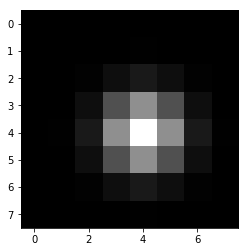

Original crop
[[ 14  17  17  20  17  16  19  19]
 [ 24  27  23  22  16  13  16  17]
 [ 27  30  24  23  32  29  21  17]
 [ 24  26  24  46  70  65  38  17]
 [ 18  19  29  72 111 104  59  21]
 [ 13  15  28  76 116 108  59  21]
 [ 11  14  20  52  77  70  36  17]
 [ 12  13  19  25  31  26  15  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   5  33  62  33   5   0]
 [  0   0   9  62 116  62   9   0]
 [  0   0   5  33  62  33   5   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  65  36   6   0]
 [  0   0  11  65 116  65  11   0]
 [  0   0   6  36  65  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 342.92
y: 197.3
sigma_min:

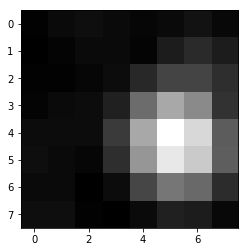

Spot reconstructed from gaussian fit parameters using sigma_min:


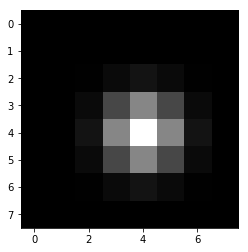

Spot reconstructed from gaussian fit parameters using sigma_max:


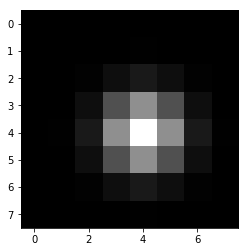

Original crop
[[ 15  19  21  19  17  19  23  18]
 [ 14  16  19  19  16  28  35  28]
 [ 15  15  17  20  34  48  48  37]
 [ 16  19  20  30  68  98  83  39]
 [ 20  20  20  43  98 142 122  60]
 [ 21  19  17  37  89 130 115  61]
 [ 19  19  14  20  49  73  67  36]
 [ 21  21  15  14  19  30  28  18]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  39  74  39   5   0]
 [  0   0  10  74 142  74  10   0]
 [  0   0   5  39  74  39   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  14   7   1   0]
 [  0   0   7  44  79  44   7   0]
 [  0   0  14  79 142  79  14   0]
 [  0   0   7  44  79  44   7   0]
 [  0   0   1   7  14   7   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 343.7
y: 210.51
sigma_min:

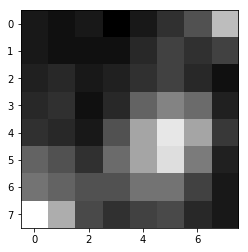

Spot reconstructed from gaussian fit parameters using sigma_min:


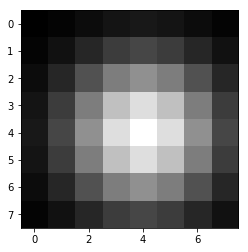

Spot reconstructed from gaussian fit parameters using sigma_max:


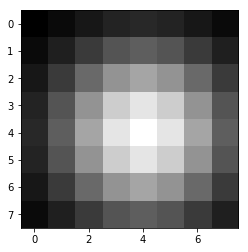

Original crop
[[14 13 14 11 14 17 21 34]
 [14 13 13 13 16 19 17 19]
 [15 16 14 15 17 19 16 13]
 [16 17 13 16 23 27 24 15]
 [17 16 14 21 31 39 31 18]
 [23 21 17 24 31 38 26 15]
 [25 23 21 21 25 25 19 14]
 [42 32 20 17 19 20 16 14]]
Reconstructed using sigma min
[[ 0  1  2  3  4  3  2  1]
 [ 1  3  6 10 11 10  6  3]
 [ 2  6 13 20 23 20 13  6]
 [ 3 10 20 31 36 31 20 10]
 [ 4 11 23 36 42 36 23 11]
 [ 3 10 20 31 36 31 20 10]
 [ 2  6 13 20 23 20 13  6]
 [ 1  3  6 10 11 10  6  3]]
Reconstructed using sigma max
[[ 1  3  5  7  7  7  5  3]
 [ 3  6 10 14 16 14 10  6]
 [ 5 10 18 24 27 24 18 10]
 [ 7 14 24 34 37 34 24 14]
 [ 7 16 27 37 42 37 27 16]
 [ 7 14 24 34 37 34 24 14]
 [ 5 10 18 24 27 24 18 10]
 [ 3  6 10 14 16 14 10  6]]

---------------------------------------------------

x: 344.49
y: 314.44
sigma_min: 0.8731601224840009
sigma_max: 0.9168255136549245
height: 112.03086249656963
max_intensity: 110


Original crop around spot at (344, 314):


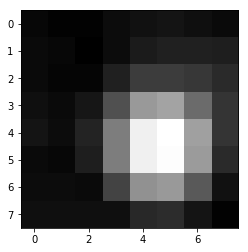

Spot reconstructed from gaussian fit parameters using sigma_min:


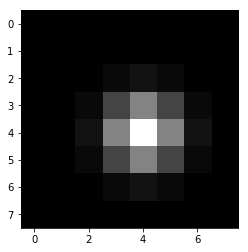

Spot reconstructed from gaussian fit parameters using sigma_max:


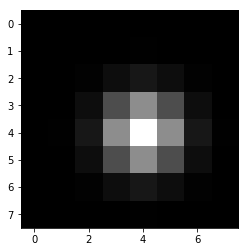

Original crop
[[ 11   9   9  13  15  16  14  12]
 [ 12  11   8  13  19  21  21  20]
 [ 12  10  10  21  32  32  30  25]
 [ 14  12  17  40  69  73  51  29]
 [ 16  13  22  58 104 110  72  29]
 [ 12  11  20  58 104 109  70  25]
 [ 13  13  12  35  66  69  44  15]
 [ 14  14  14  14  24  26  16   9]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   7   4   0   0]
 [  0   0   4  29  57  29   4   0]
 [  0   0   7  57 110  57   7   0]
 [  0   0   4  29  57  29   4   0]
 [  0   0   0   4   7   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  33  60  33   5   0]
 [  0   0  10  60 110  60  10   0]
 [  0   0   5  33  60  33   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 345.41
y: 228.66
sigma_min

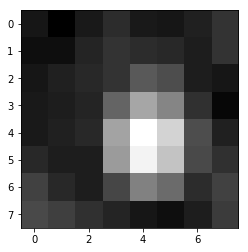

Spot reconstructed from gaussian fit parameters using sigma_min:


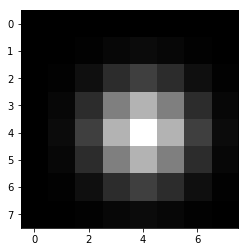

Spot reconstructed from gaussian fit parameters using sigma_max:


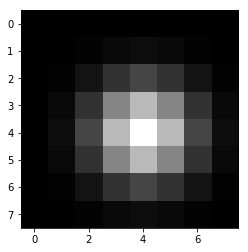

Original crop
[[23 17 24 29 24 23 26 31]
 [21 21 27 31 29 28 25 31]
 [23 26 28 31 41 38 25 23]
 [24 25 27 44 62 53 30 19]
 [24 26 28 61 86 74 38 26]
 [28 25 25 59 83 70 37 30]
 [35 28 25 36 52 46 29 35]
 [37 34 30 27 23 21 25 33]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  5 15 21 15  5  0]
 [ 0  2 15 42 60 42 15  2]
 [ 0  3 21 60 86 60 21  3]
 [ 0  2 15 42 60 42 15  2]
 [ 0  0  5 15 21 15  5  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 16 23 16  6  1]
 [ 0  3 16 44 62 44 16  3]
 [ 0  4 23 62 86 62 23  4]
 [ 0  3 16 44 62 44 16  3]
 [ 0  1  6 16 23 16  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 345.67
y: 300.31
sigma_min: 0.9257706782285315
sigma_max: 0.9494934319272438
height: 69.68813332770227
max_intensity: 76


Original crop around spot at (345, 300):


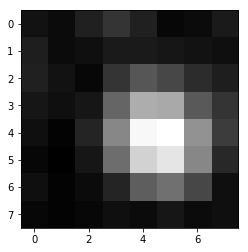

Spot reconstructed from gaussian fit parameters using sigma_min:


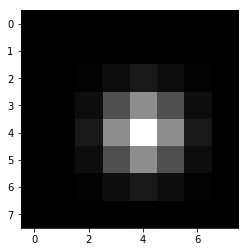

Spot reconstructed from gaussian fit parameters using sigma_max:


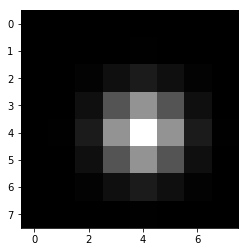

Original crop
[[13 11 17 22 17 10 11 15]
 [16 11 12 15 15 14 13 12]
 [17 13 10 22 31 27 20 16]
 [14 12 14 35 54 53 32 22]
 [12  9 18 44 74 76 47 24]
 [10  8 14 37 64 69 44 19]
 [12  9 11 18 33 38 27 12]
 [10  9 10 12 11 14 11 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 23 42 23  4  0]
 [ 0  0  7 42 76 42  7  0]
 [ 0  0  4 23 42 23  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 25 43 25  4  0]
 [ 0  0  8 43 76 43  8  0]
 [ 0  0  4 25 43 25  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 346.06
y: 248.54
sigma_min: 1.0332028446801842
sigma_max: 1.1010556910522222
height: 87.69038683499565
max_intensity: 114


Original crop around spot at (346, 248):


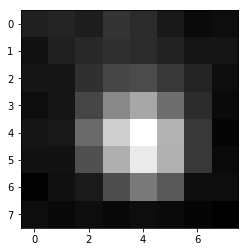

Spot reconstructed from gaussian fit parameters using sigma_min:


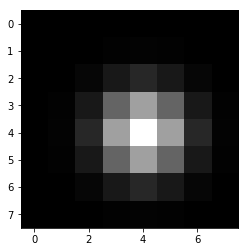

Spot reconstructed from gaussian fit parameters using sigma_max:


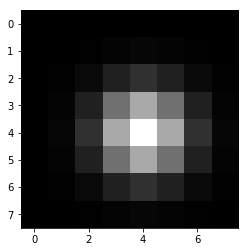

Original crop
[[ 31  33  30  39  35  28  23  24]
 [ 26  31  34  37  35  32  27  27]
 [ 27  27  37  45  47  40  33  24]
 [ 24  27  45  70  81  60  36  23]
 [ 27  28  58  96 114  86  40  21]
 [ 26  26  49  84 106  85  40  23]
 [ 20  25  29  48  64  52  24  24]
 [ 24  22  24  22  24  23  21  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  10  17  10   2   0]
 [  0   1  10  44  71  44  10   1]
 [  0   1  17  71 114  71  17   1]
 [  0   1  10  44  71  44  10   1]
 [  0   0   2  10  17  10   2   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   4  14  21  14   4   0]
 [  0   1  14  49  75  49  14   1]
 [  0   2  21  75 114  75  21   2]
 [  0   1  14  49  75  49  14   1]
 [  0   0   4  14  21  14   4   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 346.71
y: 204.76
sigma_min

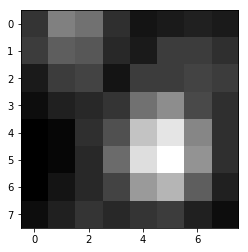

Spot reconstructed from gaussian fit parameters using sigma_min:


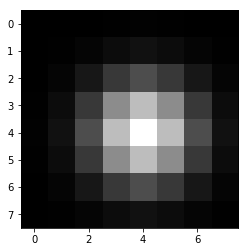

Spot reconstructed from gaussian fit parameters using sigma_max:


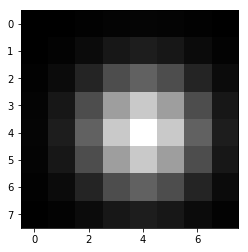

Original crop
[[19 30 28 18 14 15 16 15]
 [20 25 24 17 15 20 20 18]
 [15 20 21 14 20 20 21 20]
 [13 16 17 19 28 32 22 18]
 [11 12 18 23 40 45 31 18]
 [11 12 17 27 44 49 33 18]
 [11 14 17 21 34 38 25 16]
 [13 16 19 17 19 20 16 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 10 14 10  4  0]
 [ 0  2 10 26 36 26 10  2]
 [ 0  3 14 36 49 36 14  3]
 [ 0  2 10 26 36 26 10  2]
 [ 0  0  4 10 14 10  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  1  0  0  0]
 [ 0  0  2  4  5  4  2  0]
 [ 0  2  7 14 18 14  7  2]
 [ 0  4 14 30 38 30 14  4]
 [ 1  5 18 38 49 38 18  5]
 [ 0  4 14 30 38 30 14  4]
 [ 0  2  7 14 18 14  7  2]
 [ 0  0  2  4  5  4  2  0]]

---------------------------------------------------

x: 360.05
y: 231.28
sigma_min: 1.0225868085498615
sigma_max: 1.118861061134066
height: 77.79040150386757
max_intensity: 98


Original crop around spot at (360, 231):


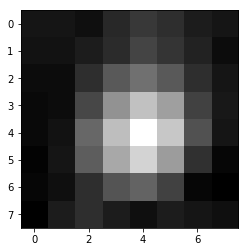

Spot reconstructed from gaussian fit parameters using sigma_min:


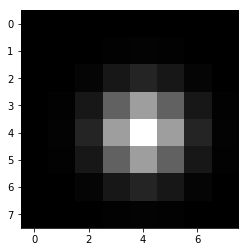

Spot reconstructed from gaussian fit parameters using sigma_max:


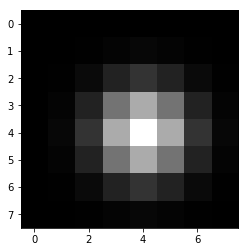

Original crop
[[23 23 21 29 34 31 25 23]
 [22 22 25 30 38 33 27 20]
 [20 20 31 45 52 45 31 23]
 [19 20 39 63 78 67 37 24]
 [19 22 49 77 98 80 42 23]
 [17 23 46 70 84 66 32 18]
 [18 21 31 43 48 37 18 16]
 [16 25 31 25 21 25 23 21]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 14  8  2  0]
 [ 0  0  8 37 60 37  8  0]
 [ 0  1 14 60 98 60 14  1]
 [ 0  0  8 37 60 37  8  0]
 [ 0  0  2  8 14  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 13 19 13  4  0]
 [ 0  1 13 44 65 44 13  1]
 [ 0  2 19 65 98 65 19  2]
 [ 0  1 13 44 65 44 13  1]
 [ 0  0  4 13 19 13  4  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 375.12
y: 156.23
sigma_min: 0.8830671433464076
sigma_max: 0.9269498573653099
height: 110.97844843317934
max_intensity: 121


Original crop around spot at (375, 156):


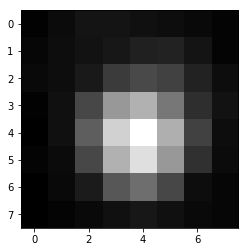

Spot reconstructed from gaussian fit parameters using sigma_min:


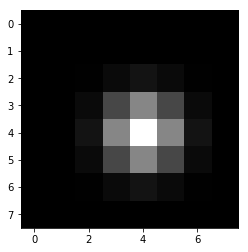

Spot reconstructed from gaussian fit parameters using sigma_max:


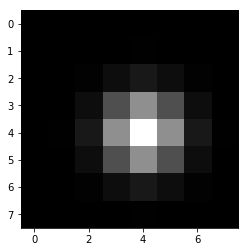

Original crop
[[ 11  15  19  19  17  16  14  12]
 [ 13  16  18  20  24  25  19  12]
 [ 14  16  21  36  42  39  25  16]
 [ 11  17  41  76  87  62  30  18]
 [ 10  17  51 101 121  86  39  16]
 [ 12  15  41  87 107  76  31  15]
 [ 10  14  22  48  58  41  16  13]
 [ 10  12  14  17  20  17  14  13]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   4  33  63  33   4   0]
 [  0   0   9  63 121  63   9   0]
 [  0   0   4  33  63  33   4   0]
 [  0   0   0   4   9   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  37  67  37   6   0]
 [  0   0  11  67 121  67  11   0]
 [  0   0   6  37  67  37   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 380.85
y: 201.49
sigma_min

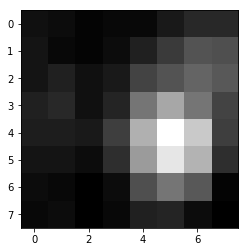

Spot reconstructed from gaussian fit parameters using sigma_min:


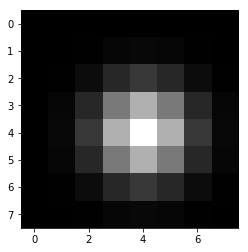

Spot reconstructed from gaussian fit parameters using sigma_max:


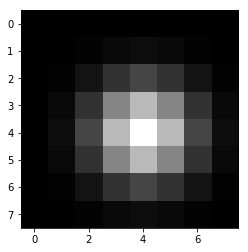

Original crop
[[18 17 15 16 16 20 24 24]
 [19 16 15 17 22 28 34 33]
 [19 22 18 20 30 34 38 35]
 [22 24 18 23 42 54 42 30]
 [21 21 20 29 56 75 62 29]
 [19 19 17 25 51 69 57 25]
 [17 16 14 17 33 42 35 15]
 [16 17 14 16 22 23 17 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 35 51 35 11  1]
 [ 0  2 16 51 75 51 16  2]
 [ 0  1 11 35 51 35 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  4  2  1  0]
 [ 0  1  5 14 20 14  5  1]
 [ 0  2 14 39 54 39 14  2]
 [ 0  4 20 54 75 54 20  4]
 [ 0  2 14 39 54 39 14  2]
 [ 0  1  5 14 20 14  5  1]
 [ 0  0  1  2  4  2  1  0]]

---------------------------------------------------

x: 385.3
y: 267.25
sigma_min: 0.9539553433375462
sigma_max: 1.0041260594120514
height: 72.01810040767845
max_intensity: 84


Original crop around spot at (385, 267):


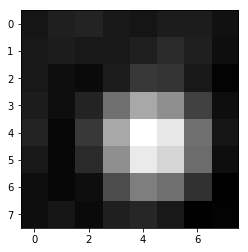

Spot reconstructed from gaussian fit parameters using sigma_min:


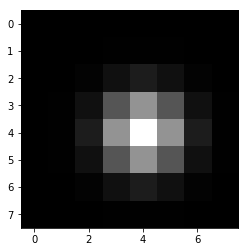

Spot reconstructed from gaussian fit parameters using sigma_max:


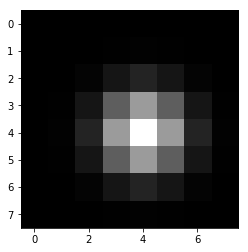

Original crop
[[17 20 21 18 17 19 19 16]
 [18 19 18 18 20 23 20 15]
 [18 15 14 19 27 26 18 12]
 [19 15 21 43 59 52 30 15]
 [21 13 27 59 84 77 43 17]
 [18 13 23 52 78 72 42 15]
 [15 13 15 33 47 43 25 11]
 [15 17 14 20 22 18 11 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 27 48 27  5  0]
 [ 0  0  9 48 84 48  9  0]
 [ 0  0  5 27 48 27  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 31 51 31  7  0]
 [ 0  0 11 51 84 51 11  0]
 [ 0  0  7 31 51 31  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 386.17
y: 156.99
sigma_min: 1.0080230605263418
sigma_max: 1.094995324268581
height: 52.86932651763325
max_intensity: 67


Original crop around spot at (386, 156):


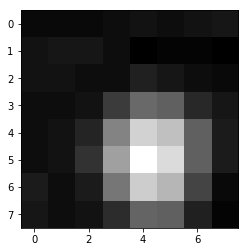

Spot reconstructed from gaussian fit parameters using sigma_min:


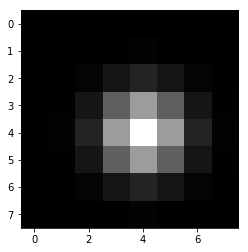

Spot reconstructed from gaussian fit parameters using sigma_max:


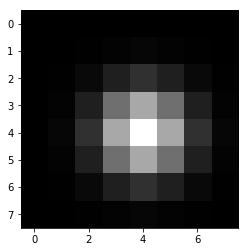

Original crop
[[13 13 13 14 15 14 15 16]
 [15 16 16 14 11 12 12 11]
 [15 15 14 14 18 16 14 13]
 [14 14 15 24 34 32 20 16]
 [14 15 19 40 57 53 32 17]
 [14 15 22 46 67 59 32 17]
 [17 14 17 37 56 51 26 13]
 [16 14 15 21 33 32 18 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 25 40 25  5  0]
 [ 0  0  9 40 67 40  9  0]
 [ 0  0  5 25 40 25  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 29 44 29  8  1]
 [ 0  1 12 44 67 44 12  1]
 [ 0  1  8 29 44 29  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 392.1
y: 273.66
sigma_min: 1.0160879329127812
sigma_max: 1.0206282797162112
height: 55.18606916406259
max_intensity: 68


Original crop around spot at (392, 273):


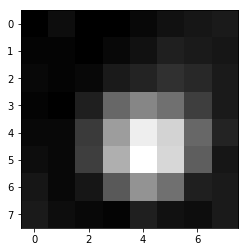

Spot reconstructed from gaussian fit parameters using sigma_min:


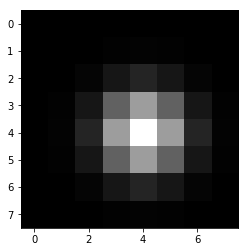

Spot reconstructed from gaussian fit parameters using sigma_max:


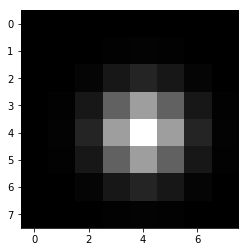

Original crop
[[11 14 11 11 13 15 16 17]
 [12 12 11 13 15 18 17 16]
 [13 12 13 17 19 22 20 17]
 [12 11 18 34 41 36 25 17]
 [13 13 24 46 64 58 34 19]
 [14 13 25 50 68 59 32 16]
 [16 13 16 31 44 36 18 17]
 [17 14 13 12 18 15 14 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 25 41 25  6  0]
 [ 0  0  9 41 68 41  9  0]
 [ 0  0  6 25 41 25  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 26 42 26  6  0]
 [ 0  0  9 42 68 42  9  0]
 [ 0  0  6 26 42 26  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 396.68
y: 183.3
sigma_min: 0.9423438996258823
sigma_max: 0.9999113452844598
height: 111.19133522857614
max_intensity: 120


Original crop around spot at (396, 183):


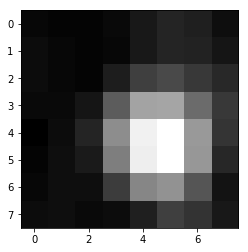

Spot reconstructed from gaussian fit parameters using sigma_min:


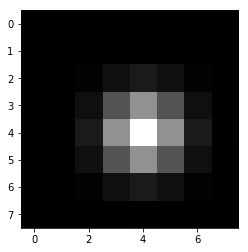

Spot reconstructed from gaussian fit parameters using sigma_max:


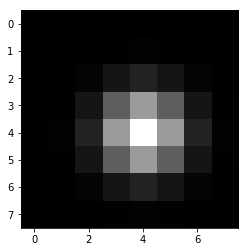

Original crop
[[ 18  17  17  19  25  30  28  21]
 [ 20  18  17  18  25  30  29  24]
 [ 20  18  17  27  41  45  38  32]
 [ 19  19  24  53  82  83  59  38]
 [ 15  20  30  73 114 120  78  37]
 [ 17  21  26  67 113 120  77  31]
 [ 18  21  21  40  70  75  50  23]
 [ 20  21  19  20  28  41  36  25]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   7  38  68  38   7   0]
 [  0   0  12  68 120  68  12   0]
 [  0   0   7  38  68  38   7   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   9  44  72  44   9   0]
 [  0   1  16  72 120  72  16   1]
 [  0   0   9  44  72  44   9   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 406.49
y: 282.81
sigma_min

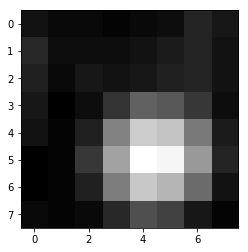

Spot reconstructed from gaussian fit parameters using sigma_min:


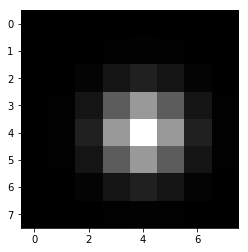

Spot reconstructed from gaussian fit parameters using sigma_max:


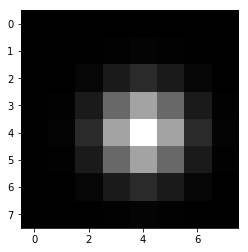

Original crop
[[14 12 12 11 12 13 18 15]
 [19 13 13 13 14 16 18 14]
 [17 12 15 14 15 17 18 14]
 [15 10 13 21 31 29 22 13]
 [14 11 17 38 54 52 36 16]
 [10 11 22 45 65 63 43 18]
 [10 11 17 37 53 49 33 14]
 [12 11 12 19 27 24 15 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  5 23 39 23  5  0]
 [ 0  0  8 39 65 39  8  0]
 [ 0  0  5 23 39 23  5  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 26 41 26  6  0]
 [ 0  1 10 41 65 41 10  1]
 [ 0  0  6 26 41 26  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 418.52
y: 287.36
sigma_min: 0.9421210348010806
sigma_max: 0.9672009847348995
height: 72.85135370688057
max_intensity: 83


Original crop around spot at (418, 287):


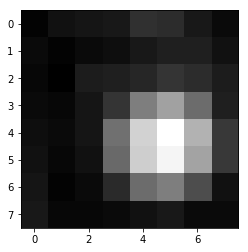

Spot reconstructed from gaussian fit parameters using sigma_min:


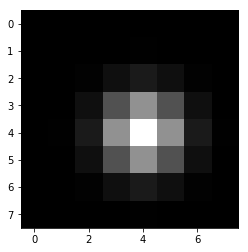

Spot reconstructed from gaussian fit parameters using sigma_max:


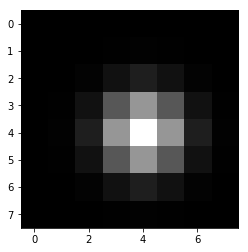

Original crop
[[11 15 16 17 24 23 17 13]
 [13 11 13 14 17 19 19 15]
 [12 10 18 19 21 25 23 18]
 [13 12 16 25 46 56 41 19]
 [14 13 16 42 70 83 61 26]
 [15 12 15 40 69 80 57 26]
 [16 11 13 22 41 46 32 15]
 [17 12 12 13 15 17 13 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 26 47 26  4  0]
 [ 0  0  8 47 83 47  8  0]
 [ 0  0  4 26 47 26  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 28 48 28  5  0]
 [ 0  0  9 48 83 48  9  0]
 [ 0  0  5 28 48 28  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 423.36
y: 230.89
sigma_min: 0.9359169035265512
sigma_max: 1.0284806511179938
height: 94.46429493545486
max_intensity: 115


Original crop around spot at (423, 230):


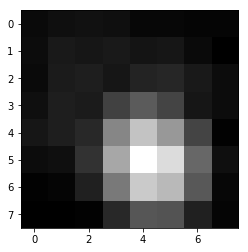

Spot reconstructed from gaussian fit parameters using sigma_min:


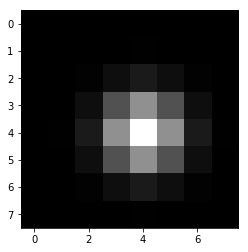

Spot reconstructed from gaussian fit parameters using sigma_max:


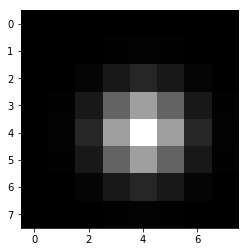

Original crop
[[ 18  20  21  20  17  17  16  16]
 [ 19  24  23  24  22  23  18  14]
 [ 18  25  26  23  28  29  24  19]
 [ 20  26  25  40  50  41  23  19]
 [ 23  26  30  67  91  74  41  15]
 [ 19  20  34  80 115 101  55  20]
 [ 15  16  27  62  94  87  49  17]
 [ 14  14  15  30  48  47  27  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0  11  64 115  64  11   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  10  17  10   2   0]
 [  0   1  10  44  71  44  10   1]
 [  0   1  17  71 115  71  17   1]
 [  0   1  10  44  71  44  10   1]
 [  0   0   2  10  17  10   2   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 424.41
y: 237.56
sigma_min

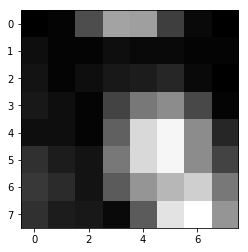

Spot reconstructed from gaussian fit parameters using sigma_min:


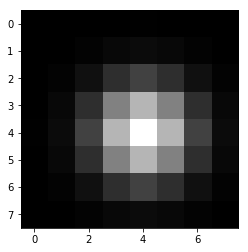

Spot reconstructed from gaussian fit parameters using sigma_max:


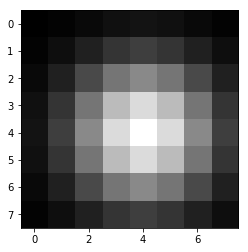

Original crop
[[14 15 30 48 47 27 16 14]
 [17 15 15 17 16 16 15 15]
 [18 15 17 19 20 22 16 14]
 [19 17 15 28 39 43 29 15]
 [17 17 15 34 59 65 43 22]
 [24 20 18 39 59 65 43 28]
 [26 23 18 33 45 52 57 39]
 [24 20 19 16 33 61 67 45]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 12 17 12  4  0]
 [ 0  2 12 33 47 33 12  2]
 [ 0  3 17 47 67 47 17  3]
 [ 0  2 12 33 47 33 12  2]
 [ 0  0  4 12 17 12  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  1  3  4  5  4  3  1]
 [ 1  4  9 14 16 14  9  4]
 [ 3  9 19 30 36 30 19  9]
 [ 4 14 30 49 57 49 30 14]
 [ 5 16 36 57 67 57 36 16]
 [ 4 14 30 49 57 49 30 14]
 [ 3  9 19 30 36 30 19  9]
 [ 1  4  9 14 16 14  9  4]]

---------------------------------------------------

x: 425.85
y: 240.04
sigma_min: 1.055629946570545
sigma_max: 1.2063649160701977
height: 58.25229066743132
max_intensity: 67


Original crop around spot at (425, 240):


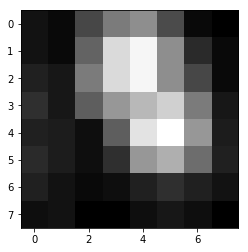

Spot reconstructed from gaussian fit parameters using sigma_min:


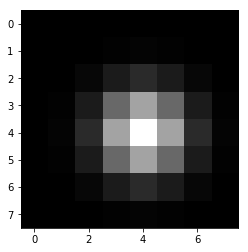

Spot reconstructed from gaussian fit parameters using sigma_max:


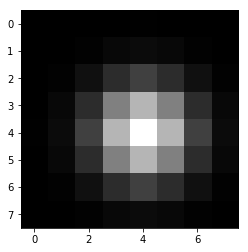

Original crop
[[17 15 28 39 43 29 15 13]
 [17 15 34 59 65 43 22 15]
 [20 18 39 59 65 43 28 15]
 [23 18 33 45 52 57 39 18]
 [20 19 16 33 61 67 45 19]
 [22 19 16 23 45 50 36 20]
 [20 17 15 16 20 23 20 17]
 [16 17 13 13 16 18 16 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 27 42 27  7  0]
 [ 0  1 11 42 67 42 11  1]
 [ 0  0  7 27 42 27  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 12 16 12  4  0]
 [ 0  2 12 33 47 33 12  2]
 [ 0  3 16 47 67 47 16  3]
 [ 0  2 12 33 47 33 12  2]
 [ 0  0  4 12 16 12  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 427.03
y: 293.12
sigma_min: 1.0820843114873253
sigma_max: 1.1016204019626232
height: 39.98695254739128
max_intensity: 54


Original crop around spot at (427, 293):


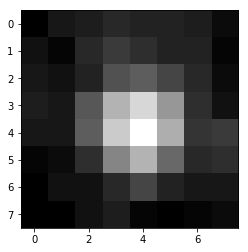

Spot reconstructed from gaussian fit parameters using sigma_min:


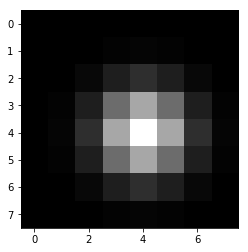

Spot reconstructed from gaussian fit parameters using sigma_max:


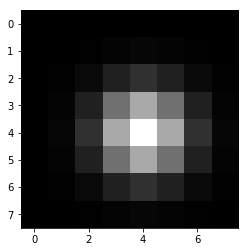

Original crop
[[10 14 15 17 16 16 15 12]
 [13 11 17 20 18 16 16 11]
 [14 13 16 24 26 22 17 12]
 [15 14 25 41 47 36 18 13]
 [14 14 26 45 54 40 19 20]
 [11 12 18 33 41 28 17 18]
 [10 13 13 17 22 16 14 14]
 [10 10 13 15 11 10 11 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 22 35 22  6  0]
 [ 0  1  9 35 54 35  9  1]
 [ 0  0  6 22 35 22  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 23 35 23  6  0]
 [ 0  1 10 35 54 35 10  1]
 [ 0  0  6 23 35 23  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 431.21
y: 183.7
sigma_min: 0.9212898469648229
sigma_max: 1.0098554865378038
height: 83.53620899011773
max_intensity: 95


Original crop around spot at (431, 183):


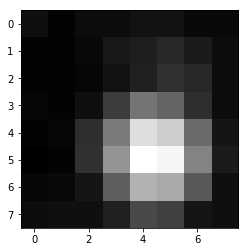

Spot reconstructed from gaussian fit parameters using sigma_min:


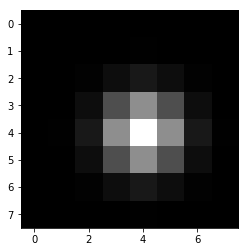

Spot reconstructed from gaussian fit parameters using sigma_max:


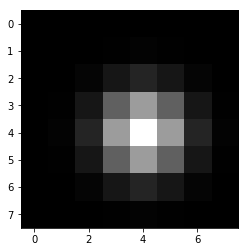

Original crop
[[17 13 16 16 18 18 15 15]
 [13 13 15 20 22 25 21 16]
 [13 13 14 18 23 28 25 16]
 [14 13 17 32 50 45 27 16]
 [13 14 27 52 84 79 47 19]
 [12 13 28 60 95 92 55 21]
 [14 15 19 43 70 67 41 17]
 [16 17 17 23 36 33 19 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  9  4  0  0]
 [ 0  0  4 29 52 29  4  0]
 [ 0  0  9 52 95 52  9  0]
 [ 0  0  4 29 52 29  4  0]
 [ 0  0  0  4  9  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  8 35 58 35  8  0]
 [ 0  1 13 58 95 58 13  1]
 [ 0  0  8 35 58 35  8  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 435.4
y: 201.75
sigma_min: 1.0949946586063062
sigma_max: 1.2021443254197985
height: 46.717030843810264
max_intensity: 65


Original crop around spot at (435, 201):


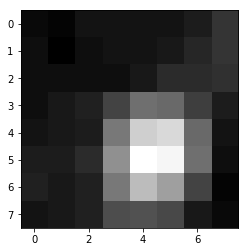

Spot reconstructed from gaussian fit parameters using sigma_min:


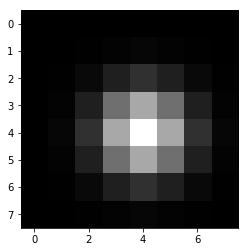

Spot reconstructed from gaussian fit parameters using sigma_max:


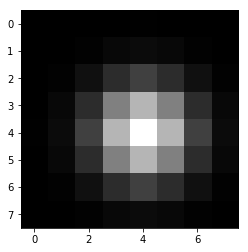

Original crop
[[14 13 16 16 16 16 18 23]
 [15 12 15 16 16 17 20 23]
 [15 15 15 15 17 21 21 22]
 [15 17 19 26 35 34 25 18]
 [16 17 18 37 55 57 34 16]
 [18 18 21 42 65 63 35 15]
 [19 17 19 37 51 45 26 13]
 [16 17 19 28 29 27 17 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 28 42 28  8  1]
 [ 0  1 12 42 65 42 12  1]
 [ 0  1  8 28 42 28  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  4 11 16 11  4  0]
 [ 0  2 11 32 45 32 11  2]
 [ 0  2 16 45 65 45 16  2]
 [ 0  2 11 32 45 32 11  2]
 [ 0  0  4 11 16 11  4  0]
 [ 0  0  0  2  2  2  0  0]]

---------------------------------------------------

x: 435.4
y: 254.43
sigma_min: 1.220474561859967
sigma_max: 1.2321642367031502
height: 41.5380820937011
max_intensity: 58


Original crop around spot at (435, 254):


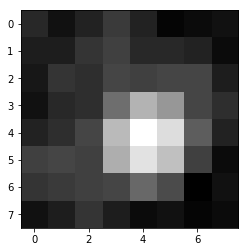

Spot reconstructed from gaussian fit parameters using sigma_min:


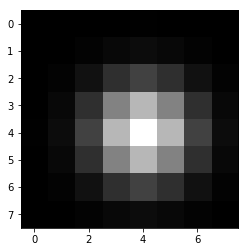

Spot reconstructed from gaussian fit parameters using sigma_max:


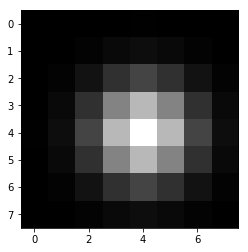

Original crop
[[21 17 20 24 20 15 16 17]
 [19 19 23 25 21 21 20 16]
 [18 23 22 26 25 26 26 19]
 [17 21 22 33 45 40 26 22]
 [20 22 26 46 58 52 30 20]
 [25 26 25 44 53 47 25 16]
 [23 24 25 26 32 27 14 17]
 [17 19 23 19 16 17 15 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  2 10 29 41 29 10  2]
 [ 0  2 15 41 58 41 15  2]
 [ 0  2 10 29 41 29 10  2]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  2  2  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  2  2  0  0]
 [ 0  0  4 11 15 11  4  0]
 [ 0  2 11 30 41 30 11  2]
 [ 0  2 15 41 58 41 15  2]
 [ 0  2 11 30 41 30 11  2]
 [ 0  0  4 11 15 11  4  0]
 [ 0  0  0  2  2  2  0  0]]

---------------------------------------------------

x: 437.49
y: 269.34
sigma_min: 1.1151739417692585
sigma_max: 1.205052989841105
height: 45.903487583582084
max_intensity: 67


Original crop around spot at (437, 269):


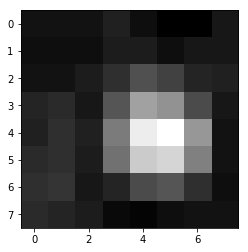

Spot reconstructed from gaussian fit parameters using sigma_min:


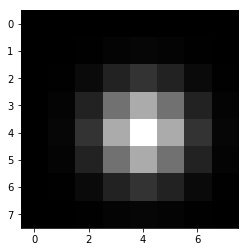

Spot reconstructed from gaussian fit parameters using sigma_max:


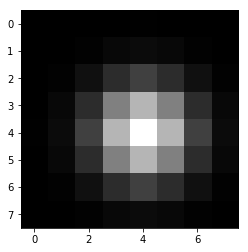

Original crop
[[17 17 17 20 16 13 13 18]
 [16 16 16 19 19 16 18 18]
 [17 17 19 23 30 27 21 20]
 [21 22 18 31 47 44 29 18]
 [20 23 20 39 63 67 45 17]
 [22 23 19 37 56 58 40 17]
 [23 24 18 21 29 31 23 16]
 [22 21 19 15 14 16 17 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  1  8 29 44 29  8  1]
 [ 0  1 13 44 67 44 13  1]
 [ 0  1  8 29 44 29  8  1]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 11 16 11  4  0]
 [ 0  2 11 33 47 33 11  2]
 [ 0  3 16 47 67 47 16  3]
 [ 0  2 11 33 47 33 11  2]
 [ 0  0  4 11 16 11  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 439.97
y: 248.15
sigma_min: 1.2074782972706597
sigma_max: 1.30629709508757
height: 45.72332244276497
max_intensity: 69


Original crop around spot at (439, 248):


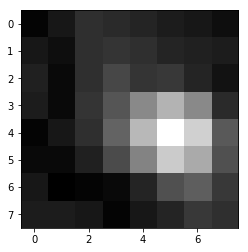

Spot reconstructed from gaussian fit parameters using sigma_min:


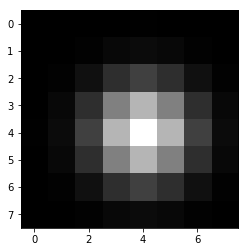

Spot reconstructed from gaussian fit parameters using sigma_max:


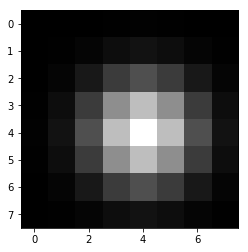

Original crop
[[16 20 25 24 23 21 20 18]
 [20 18 25 26 25 23 22 21]
 [22 17 25 30 26 27 23 19]
 [21 17 26 33 44 53 44 24]
 [16 20 25 36 54 69 59 34]
 [17 17 22 31 43 58 51 32]
 [20 15 16 17 23 32 35 27]
 [21 21 20 16 20 23 27 25]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 12 17 12  4  0]
 [ 0  2 12 34 48 34 12  2]
 [ 0  3 17 48 69 48 17  3]
 [ 0  2 12 34 48 34 12  2]
 [ 0  0  4 12 17 12  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 15 21 15  6  1]
 [ 0  3 15 38 51 38 15  3]
 [ 0  4 21 51 69 51 21  4]
 [ 0  3 15 38 51 38 15  3]
 [ 0  1  6 15 21 15  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 445.47
y: 241.61
sigma_min: 1.1171286965368026
sigma_max: 1.154748624003406
height: 58.8099277932655
max_intensity: 83


Original crop around spot at (445, 241):


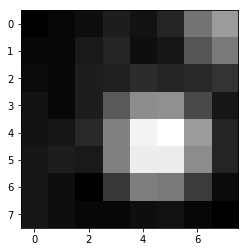

Spot reconstructed from gaussian fit parameters using sigma_min:


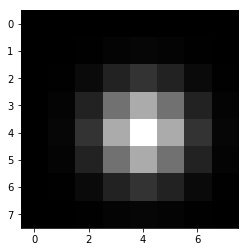

Spot reconstructed from gaussian fit parameters using sigma_max:


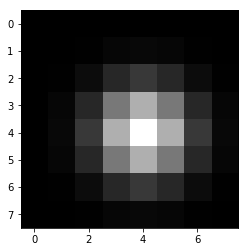

Original crop
[[14 16 18 22 19 24 45 56]
 [16 16 21 24 18 20 37 47]
 [17 16 22 23 26 24 25 28]
 [19 16 22 38 52 53 34 20]
 [19 20 25 49 80 83 56 24]
 [20 22 21 49 78 78 52 24]
 [20 18 14 29 48 47 30 17]
 [20 18 16 16 18 19 16 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 11 16 11  3  0]
 [ 0  1 11 37 55 37 11  1]
 [ 0  2 16 55 83 55 16  2]
 [ 0  1 11 37 55 37 11  1]
 [ 0  0  3 11 16 11  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 12 18 12  4  0]
 [ 0  1 12 39 57 39 12  1]
 [ 0  2 18 57 83 57 18  2]
 [ 0  1 12 39 57 39 12  1]
 [ 0  0  4 12 18 12  4  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 448.08
y: 237.3
sigma_min: 1.384671758830085
sigma_max: 1.9272583818739657
height: 33.15376003674367
max_intensity: 56


Original crop around spot at (448, 237):


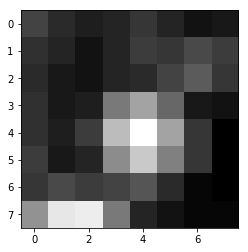

Spot reconstructed from gaussian fit parameters using sigma_min:


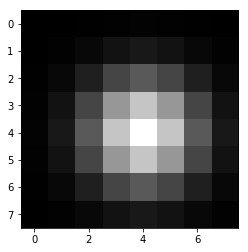

Spot reconstructed from gaussian fit parameters using sigma_max:


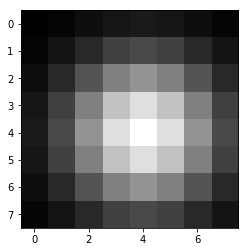

Original crop
[[25 21 19 20 23 20 17 18]
 [22 20 17 20 24 23 26 24]
 [21 18 17 20 21 25 29 23]
 [22 18 19 34 41 31 18 17]
 [22 19 24 45 56 41 23 14]
 [24 18 20 37 47 35 23 14]
 [23 26 24 25 28 21 15 14]
 [38 52 53 34 20 17 15 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  4  5  4  1  0]
 [ 0  1  6 15 19 15  6  1]
 [ 0  4 15 33 43 33 15  4]
 [ 0  5 19 43 56 43 19  5]
 [ 0  4 15 33 43 33 15  4]
 [ 0  1  6 15 19 15  6  1]
 [ 0  0  1  4  5  4  1  0]]
Reconstructed using sigma max
[[ 0  1  3  5  6  5  3  1]
 [ 1  4  9 14 16 14  9  4]
 [ 3  9 19 28 32 28 19  9]
 [ 5 14 28 42 48 42 28 14]
 [ 6 16 32 48 56 48 32 16]
 [ 5 14 28 42 48 42 28 14]
 [ 3  9 19 28 32 28 19  9]
 [ 1  4  9 14 16 14  9  4]]

---------------------------------------------------

x: 450.44
y: 196.65
sigma_min: 1.6833159961243016
sigma_max: 2.0172849531151784
height: 19.705262894143733
max_intensity: 31


Original crop around spot at (450, 196):


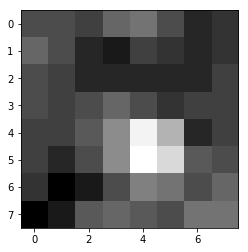

Spot reconstructed from gaussian fit parameters using sigma_min:


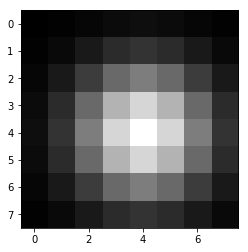

Spot reconstructed from gaussian fit parameters using sigma_max:


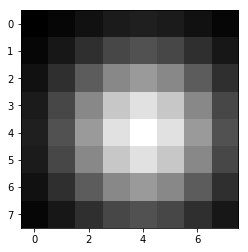

Original crop
[[17 17 16 19 20 17 14 15]
 [19 17 14 13 16 15 14 15]
 [17 16 14 14 14 14 14 16]
 [17 16 17 19 17 15 16 16]
 [16 16 18 22 30 25 14 16]
 [16 14 17 22 31 28 18 17]
 [15 11 13 17 21 20 17 19]
 [11 13 18 19 18 17 20 20]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  5  6  5  3  1]
 [ 0  3  7 12 15 12  7  3]
 [ 1  5 12 21 25 21 12  5]
 [ 1  6 15 25 31 25 15  6]
 [ 1  5 12 21 25 21 12  5]
 [ 0  3  7 12 15 12  7  3]
 [ 0  1  3  5  6  5  3  1]]
Reconstructed using sigma max
[[ 0  1  2  3  4  3  2  1]
 [ 1  3  6  9 10  9  6  3]
 [ 2  6 11 16 18 16 11  6]
 [ 3  9 16 24 27 24 16  9]
 [ 4 10 18 27 31 27 18 10]
 [ 3  9 16 24 27 24 16  9]
 [ 2  6 11 16 18 16 11  6]
 [ 1  3  6  9 10  9  6  3]]

---------------------------------------------------

x: 451.22
y: 186.44
sigma_min: 0.9832430645865249
sigma_max: 1.013576001057403
height: 75.55710335967895
max_intensity: 93


Original crop around spot at (451, 186):


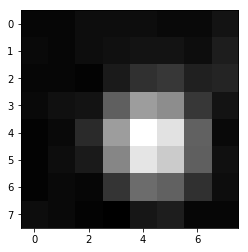

Spot reconstructed from gaussian fit parameters using sigma_min:


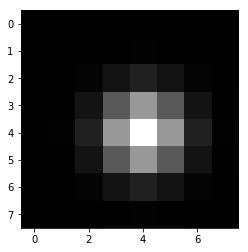

Spot reconstructed from gaussian fit parameters using sigma_max:


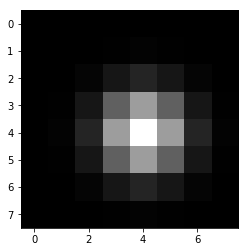

Original crop
[[17 17 19 19 19 18 18 21]
 [18 17 19 20 21 21 19 24]
 [17 17 16 23 30 32 25 26]
 [18 20 21 44 63 58 32 21]
 [16 18 28 63 93 84 45 18]
 [16 19 23 56 85 77 44 20]
 [16 18 17 31 48 45 30 19]
 [19 18 16 15 22 24 17 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 33 55 33  7  0]
 [ 0  0 11 55 93 55 11  0]
 [ 0  0  7 33 55 33  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  8 35 57 35  8  0]
 [ 0  1 13 57 93 57 13  1]
 [ 0  0  8 35 57 35  8  0]
 [ 0  0  1  8 13  8  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 451.62
y: 202.53
sigma_min: 0.9879818748597812
sigma_max: 1.007794738935536
height: 69.82109801235147
max_intensity: 84


Original crop around spot at (451, 202):


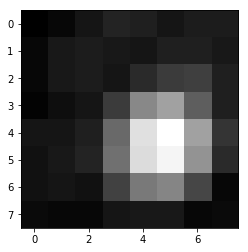

Spot reconstructed from gaussian fit parameters using sigma_min:


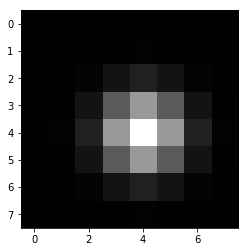

Spot reconstructed from gaussian fit parameters using sigma_max:


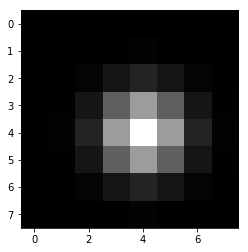

Original crop
[[11 13 17 21 20 17 19 19]
 [13 18 19 18 17 20 20 18]
 [13 18 19 17 23 28 29 20]
 [12 15 17 28 50 57 38 20]
 [17 17 20 41 75 84 57 26]
 [16 18 21 43 74 81 53 23]
 [16 17 16 30 46 49 31 13]
 [14 13 13 17 18 18 13 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 30 50 30  6  0]
 [ 0  0 10 50 84 50 10  0]
 [ 0  0  6 30 50 30  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 31 51 31  7  0]
 [ 0  1 11 51 84 51 11  1]
 [ 0  0  7 31 51 31  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 460.38
y: 189.06
sigma_min: 1.0713122017991326
sigma_max: 1.145616790788025
height: 53.29042924680699
max_intensity: 69


Original crop around spot at (460, 189):


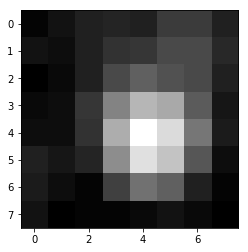

Spot reconstructed from gaussian fit parameters using sigma_min:


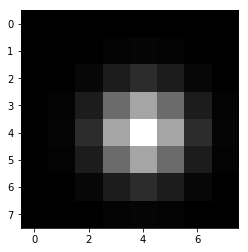

Spot reconstructed from gaussian fit parameters using sigma_max:


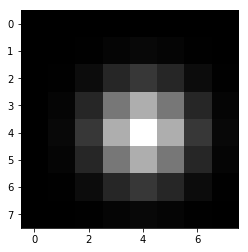

Original crop
[[14 17 20 21 20 26 26 20]
 [17 16 20 24 25 29 29 22]
 [13 15 20 29 34 31 29 20]
 [15 16 25 42 53 50 33 18]
 [16 16 24 51 69 61 39 19]
 [20 18 21 44 62 56 32 16]
 [19 16 14 27 38 34 20 14]
 [17 13 14 14 15 17 15 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  7 28 44 28  7  0]
 [ 0  1 12 44 69 44 12  1]
 [ 0  0  7 28 44 28  7  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 32 47 32 10  1]
 [ 0  2 15 47 69 47 15  2]
 [ 0  1 10 32 47 32 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 460.51
y: 280.59
sigma_min: 0.8887259575758091
sigma_max: 0.9067866285446653
height: 108.07714668209628
max_intensity: 109


Original crop around spot at (460, 280):


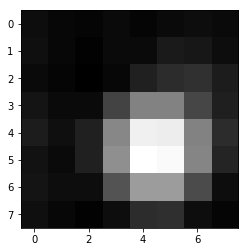

Spot reconstructed from gaussian fit parameters using sigma_min:


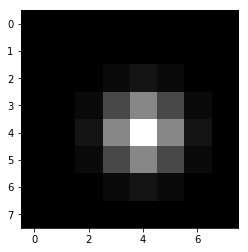

Spot reconstructed from gaussian fit parameters using sigma_max:


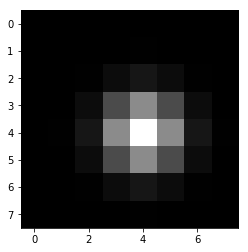

Original crop
[[ 16  14  13  15  13  15  16  15]
 [ 17  14  12  15  15  21  20  16]
 [ 15  13  11  14  24  28  30  22]
 [ 19  15  15  37  61  61  38  23]
 [ 22  17  24  63 103 102  61  28]
 [ 18  15  24  66 109 107  62  25]
 [ 19  16  16  43  71  71  40  16]
 [ 17  14  12  16  28  29  16  13]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   4  30  57  30   4   0]
 [  0   0   8  57 109  57   8   0]
 [  0   0   4  30  57  30   4   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   5  32  59  32   5   0]
 [  0   0   9  59 109  59   9   0]
 [  0   0   5  32  59  32   5   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 460.64
y: 198.35
sigma_min

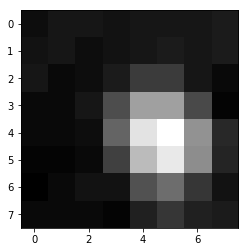

Spot reconstructed from gaussian fit parameters using sigma_min:


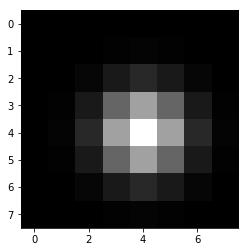

Spot reconstructed from gaussian fit parameters using sigma_max:


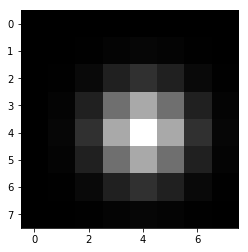

Original crop
[[15 17 17 16 17 17 17 18]
 [16 17 15 16 17 18 17 18]
 [17 14 15 18 25 25 17 14]
 [14 14 17 29 47 47 28 13]
 [14 14 15 34 62 68 44 21]
 [13 13 14 26 53 63 43 20]
 [12 14 16 16 30 36 24 16]
 [14 14 14 13 19 24 19 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 27 42 27  6  0]
 [ 0  1 10 42 68 42 10  1]
 [ 0  0  6 27 42 27  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 29 44 29  8  1]
 [ 0  1 12 44 68 44 12  1]
 [ 0  1  8 29 44 29  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 463.26
y: 219.67
sigma_min: 1.288565795132009
sigma_max: 1.3481567166891357
height: 31.888616572211813
max_intensity: 46


Original crop around spot at (463, 219):


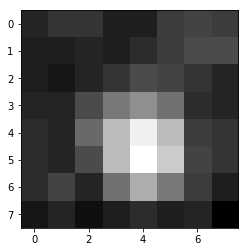

Spot reconstructed from gaussian fit parameters using sigma_min:


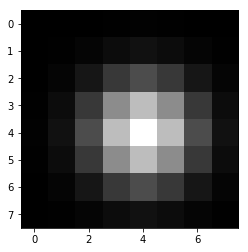

Spot reconstructed from gaussian fit parameters using sigma_max:


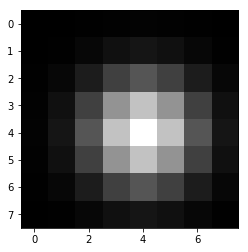

Original crop
[[17 19 19 16 16 20 21 20]
 [16 16 17 16 18 20 22 22]
 [16 15 17 19 22 21 19 17]
 [17 17 22 28 31 27 18 17]
 [18 17 26 37 44 37 20 19]
 [18 17 22 37 46 39 21 19]
 [18 21 17 27 35 28 20 16]
 [15 17 14 16 18 16 17 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 10 13 10  4  0]
 [ 0  2 10 25 34 25 10  2]
 [ 0  3 13 34 46 34 13  3]
 [ 0  2 10 25 34 25 10  2]
 [ 0  0  4 10 13 10  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 11 15 11  5  1]
 [ 0  2 11 26 34 26 11  2]
 [ 0  3 15 34 46 34 15  3]
 [ 0  2 11 26 34 26 11  2]
 [ 0  1  5 11 15 11  5  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 463.78
y: 286.19
sigma_min: 1.1803138801282405
sigma_max: 1.2488405737912522
height: 51.39817183331473
max_intensity: 83


Original crop around spot at (463, 286):


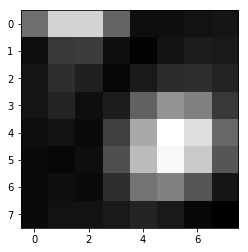

Spot reconstructed from gaussian fit parameters using sigma_min:


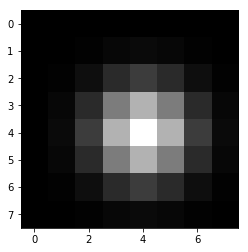

Spot reconstructed from gaussian fit parameters using sigma_max:


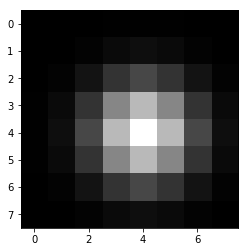

Original crop
[[43 71 71 40 16 16 17 18]
 [16 28 29 16 13 17 20 19]
 [18 25 21 14 19 24 25 22]
 [18 22 16 20 39 53 48 28]
 [16 17 15 30 59 83 74 41]
 [15 14 16 34 64 81 68 36]
 [15 16 15 25 44 48 36 18]
 [15 17 17 19 22 19 14 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 13 19 13  4  0]
 [ 0  2 13 40 57 40 13  2]
 [ 0  3 19 57 83 57 19  3]
 [ 0  2 13 40 57 40 13  2]
 [ 0  0  4 13 19 13  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 16 23 16  6  1]
 [ 0  3 16 43 60 43 16  3]
 [ 0  4 23 60 83 60 23  4]
 [ 0  3 16 43 60 43 16  3]
 [ 0  1  6 16 23 16  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 465.22
y: 182.13
sigma_min: 1.0474367373843319
sigma_max: 1.082010602775527
height: 59.36476699466657
max_intensity: 75


Original crop around spot at (465, 182):


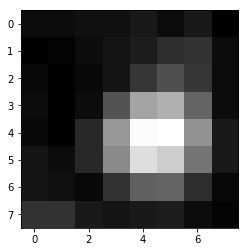

Spot reconstructed from gaussian fit parameters using sigma_min:


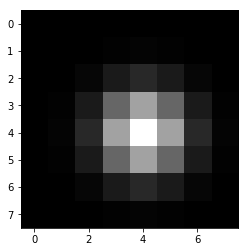

Spot reconstructed from gaussian fit parameters using sigma_max:


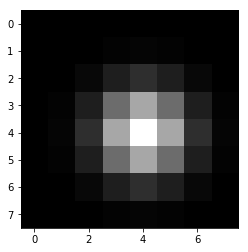

Original crop
[[17 17 18 18 20 17 20 14]
 [14 15 17 19 21 25 26 17]
 [16 14 16 19 27 33 27 17]
 [17 14 17 34 53 56 38 17]
 [16 14 24 50 74 75 49 20]
 [19 17 24 47 67 63 42 20]
 [19 18 16 26 37 38 25 16]
 [26 26 20 19 20 21 17 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 30 47 30  7  0]
 [ 0  1 12 47 75 47 12  1]
 [ 0  0  7 30 47 30  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  1  8 31 48 31  8  1]
 [ 0  1 13 48 75 48 13  1]
 [ 0  1  8 31 48 31  8  1]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 467.84
y: 232.59
sigma_min: 1.0603888871373204
sigma_max: 1.9624733333825126
height: 286.3741596542969
max_intensity: 103


Original crop around spot at (467, 232):


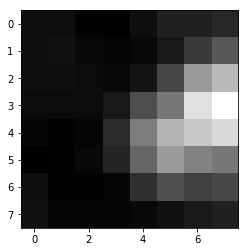

Spot reconstructed from gaussian fit parameters using sigma_min:


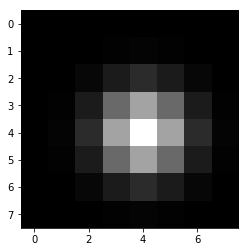

Spot reconstructed from gaussian fit parameters using sigma_max:


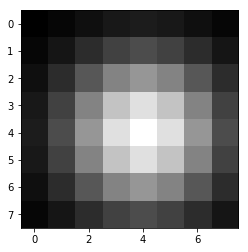

Original crop
[[ 20  20  16  16  20  26  26  29]
 [ 20  21  18  17  18  23  35  45]
 [ 20  20  19  18  22  39  68  79]
 [ 19  19  19  23  42  56  92 103]
 [ 17  16  17  30  58  77  84  90]
 [ 15  16  18  28  50  68  60  56]
 [ 20  16  16  17  32  42  37  40]
 [ 21  17  17  17  18  21  24  26]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  11  17  11   2   0]
 [  0   1  11  42  66  42  11   1]
 [  0   1  17  66 103  66  17   1]
 [  0   1  11  42  66  42  11   1]
 [  0   0   2  11  17  11   2   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  1   4   7  11  12  11   7   4]
 [  4   9  19  28  32  28  19   9]
 [  7  19  36  53  61  53  36  19]
 [ 11  28  53  79  90  79  53  28]
 [ 12  32  61  90 103  90  61  32]
 [ 11  28  53  79  90  79  53  28]
 [  7  19  36  53  61  53  36  19]
 [  4   9  19  28  32  28  19   9]]

---------------------------------------------------

x: 469.41
y: 303.58
sigma_min

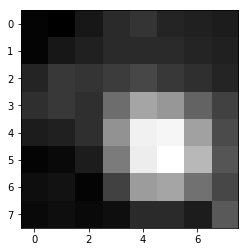

Spot reconstructed from gaussian fit parameters using sigma_min:


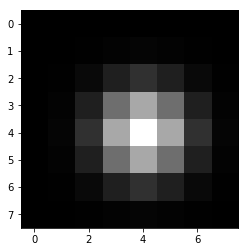

Spot reconstructed from gaussian fit parameters using sigma_max:


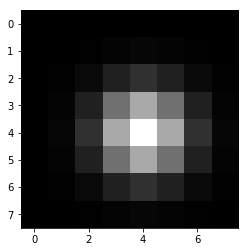

Original crop
[[10  9 14 18 20 17 16 15]
 [10 14 16 18 18 18 17 16]
 [17 21 20 22 24 21 19 17]
 [19 21 19 32 44 41 30 23]
 [15 16 19 40 60 61 43 25]
 [10 11 15 35 59 63 48 27]
 [12 13 10 23 42 44 33 24]
 [11 12 11 12 18 18 15 28]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 27 41 27  7  0]
 [ 0  1 11 41 63 41 11  1]
 [ 0  0  7 27 41 27  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 27 41 27  8  1]
 [ 0  1 12 41 63 41 12  1]
 [ 0  1  8 27 41 27  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 469.8
y: 231.02
sigma_min: 1.05888073115191
sigma_max: 1.0988995656489844
height: 84.04894859073262
max_intensity: 103


Original crop around spot at (469, 231):


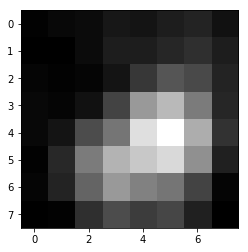

Spot reconstructed from gaussian fit parameters using sigma_min:


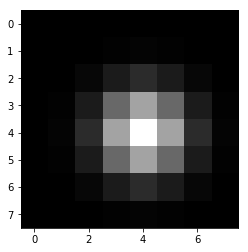

Spot reconstructed from gaussian fit parameters using sigma_max:


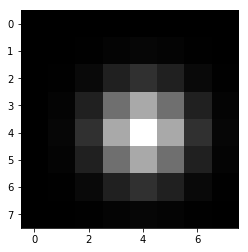

Original crop
[[ 17  19  20  24  23  26  28  22]
 [ 16  16  20  26  26  29  32  26]
 [ 18  17  18  23  35  45  41  28]
 [ 19  18  22  39  68  79  58  29]
 [ 19  23  42  56  92 103  75  33]
 [ 17  30  58  77  84  90  65  27]
 [ 18  28  50  68  60  56  39  18]
 [ 16  17  32  42  37  40  27  16]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   2  11  17  11   2   0]
 [  0   1  11  42  65  42  11   1]
 [  0   1  17  65 103  65  17   1]
 [  0   1  11  42  65  42  11   1]
 [  0   0   2  11  17  11   2   0]
 [  0   0   0   1   1   1   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   2   1   0   0]
 [  0   0   3  12  19  12   3   0]
 [  0   1  12  44  68  44  12   1]
 [  0   2  19  68 103  68  19   2]
 [  0   1  12  44  68  44  12   1]
 [  0   0   3  12  19  12   3   0]
 [  0   0   0   1   2   1   0   0]]

---------------------------------------------------

x: 470.45
y: 191.15
sigma_min

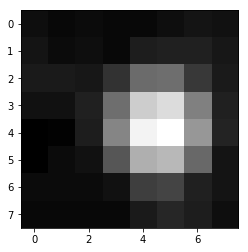

Spot reconstructed from gaussian fit parameters using sigma_min:


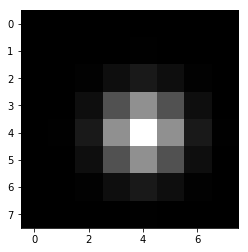

Spot reconstructed from gaussian fit parameters using sigma_max:


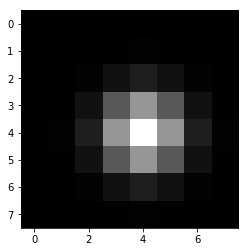

Original crop
[[17 15 16 15 15 17 19 18]
 [19 16 17 15 22 23 23 20]
 [21 21 20 29 48 49 31 21]
 [18 18 23 49 81 86 55 23]
 [12 13 22 57 94 98 63 24]
 [12 16 18 41 71 74 47 19]
 [16 16 16 18 33 35 23 19]
 [15 15 15 15 21 25 22 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 31 55 31  5  0]
 [ 0  0  9 55 98 55  9  0]
 [ 0  0  5 31 55 31  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 33 57 33  6  0]
 [ 0  0 11 57 98 57 11  0]
 [ 0  0  6 33 57 33  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 472.28
y: 221.37
sigma_min: 0.929462497277757
sigma_max: 0.9756823103940416
height: 105.36615434389354
max_intensity: 115


Original crop around spot at (472, 221):


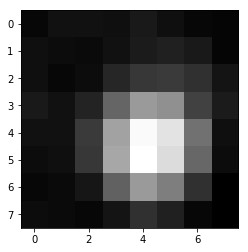

Spot reconstructed from gaussian fit parameters using sigma_min:


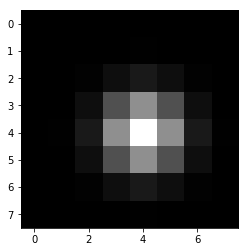

Spot reconstructed from gaussian fit parameters using sigma_max:


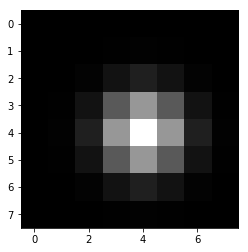

Original crop
[[ 17  21  21  20  24  20  17  16]
 [ 20  19  18  21  25  27  24  16]
 [ 20  17  19  29  36  37  33  22]
 [ 24  21  28  54  75  71  40  25]
 [ 21  21  37  78 113 104  59  20]
 [ 19  20  36  80 115 101  55  19]
 [ 17  18  23  53  75  64  33  14]
 [ 19  18  17  22  33  27  17  14]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0  11  64 115  64  11   0]
 [  0   0   6  36  64  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   8  40  68  40   8   0]
 [  0   1  14  68 115  68  14   1]
 [  0   0   8  40  68  40   8   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 472.81
y: 209.46
sigma_min

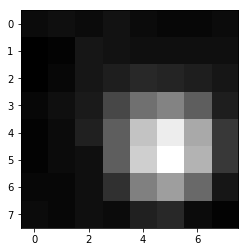

Spot reconstructed from gaussian fit parameters using sigma_min:


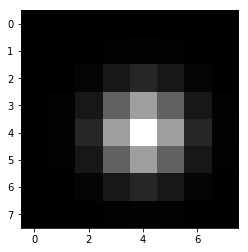

Spot reconstructed from gaussian fit parameters using sigma_max:


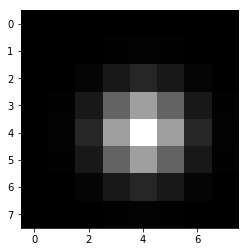

Original crop
[[16 17 16 18 16 15 15 16]
 [13 14 19 18 17 17 17 17]
 [13 15 19 21 24 23 21 19]
 [15 17 20 32 43 48 38 21]
 [14 16 22 38 65 76 58 28]
 [14 16 17 38 68 81 61 28]
 [15 15 17 26 47 55 41 19]
 [16 15 17 16 22 24 16 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 31 50 31  7  0]
 [ 0  1 12 50 81 50 12  1]
 [ 0  0  7 31 50 31  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 31 50 31  7  0]
 [ 0  1 12 50 81 50 12  1]
 [ 0  0  7 31 50 31  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 473.46
y: 306.2
sigma_min: 1.1760640095551411
sigma_max: 1.590850113024185
height: 59.47298999505555
max_intensity: 63


Original crop around spot at (473, 306):


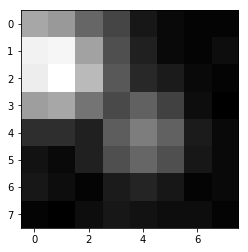

Spot reconstructed from gaussian fit parameters using sigma_min:


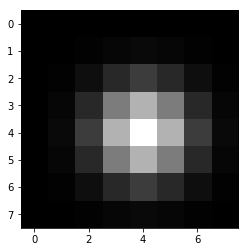

Spot reconstructed from gaussian fit parameters using sigma_max:


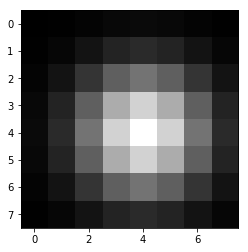

Original crop
[[44 41 30 23 13 10  9  9]
 [60 61 43 25 15 10  9 11]
 [59 63 48 27 17 14 10  9]
 [42 44 33 24 29 22 11  8]
 [18 18 15 28 35 29 14 10]
 [12 10 15 25 30 25 13 10]
 [13 11  9 14 16 13  9 10]
 [ 9  8 11 13 12 11 11  9]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 14 10  3  0]
 [ 0  1 10 30 43 30 10  1]
 [ 0  2 14 43 63 43 14  2]
 [ 0  1 10 30 43 30 10  1]
 [ 0  0  3 10 14 10  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  8 10  8  4  1]
 [ 1  4 12 23 28 23 12  4]
 [ 2  8 23 42 51 42 23  8]
 [ 2 10 28 51 63 51 28 10]
 [ 2  8 23 42 51 42 23  8]
 [ 1  4 12 23 28 23 12  4]
 [ 0  1  4  8 10  8  4  1]]

---------------------------------------------------

x: 475.16
y: 237.16
sigma_min: 1.3018072102614835
sigma_max: 1.3230058080348626
height: 43.90140313712351
max_intensity: 64


Original crop around spot at (475, 237):


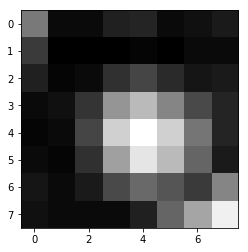

Spot reconstructed from gaussian fit parameters using sigma_min:


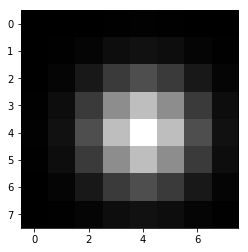

Spot reconstructed from gaussian fit parameters using sigma_max:


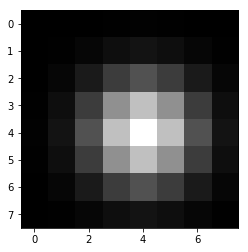

Original crop
[[39 18 18 22 23 18 19 21]
 [27 16 16 16 17 16 18 18]
 [22 17 18 25 29 24 20 21]
 [18 19 26 44 51 41 30 23]
 [17 18 29 55 64 55 38 23]
 [18 17 25 46 59 51 35 21]
 [20 18 21 30 36 32 27 41]
 [19 18 18 18 22 35 47 61]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 14 19 14  6  1]
 [ 0  3 14 35 47 35 14  3]
 [ 0  4 19 47 64 47 19  4]
 [ 0  3 14 35 47 35 14  3]
 [ 0  1  6 14 19 14  6  1]
 [ 0  0  1  3  4  3  1  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 15 20 15  6  1]
 [ 0  3 15 36 48 36 15  3]
 [ 0  4 20 48 64 48 20  4]
 [ 0  3 15 36 48 36 15  3]
 [ 0  1  6 15 20 15  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 478.17
y: 240.96
sigma_min: 1.2381901108234192
sigma_max: 1.6374859586838144
height: 49.3749536550219
max_intensity: 72


Original crop around spot at (478, 240):


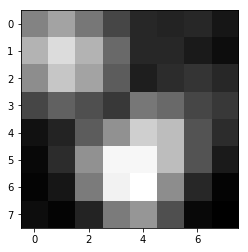

Spot reconstructed from gaussian fit parameters using sigma_min:


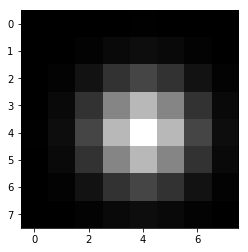

Spot reconstructed from gaussian fit parameters using sigma_max:


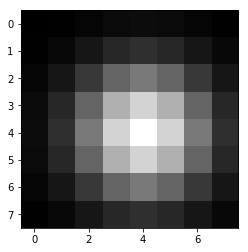

Original crop
[[44 51 41 30 23 22 23 19]
 [55 64 55 38 23 23 20 17]
 [46 59 51 35 21 24 26 23]
 [30 36 32 27 41 38 30 27]
 [18 22 35 47 61 57 33 24]
 [16 24 47 70 70 57 33 20]
 [15 19 42 69 72 46 23 15]
 [17 15 22 42 48 32 16 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  5 14 19 14  5  1]
 [ 0  2 14 37 51 37 14  2]
 [ 0  3 19 51 72 51 19  3]
 [ 0  2 14 37 51 37 14  2]
 [ 0  1  5 14 19 14  5  1]
 [ 0  0  1  2  3  2  1  0]]
Reconstructed using sigma max
[[ 0  0  1  3  3  3  1  0]
 [ 0  2  6 11 13 11  6  2]
 [ 1  6 16 28 34 28 16  6]
 [ 3 11 28 49 59 49 28 11]
 [ 3 13 34 59 72 59 34 13]
 [ 3 11 28 49 59 49 28 11]
 [ 1  6 16 28 34 28 16  6]
 [ 0  2  6 11 13 11  6  2]]

---------------------------------------------------

x: 478.3
y: 187.62
sigma_min: 1.0333836952257034
sigma_max: 1.0677066560835002
height: 66.51048576952431
max_intensity: 82


Original crop around spot at (478, 187):


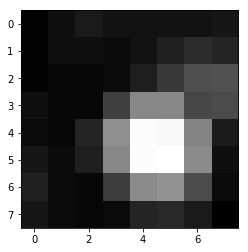

Spot reconstructed from gaussian fit parameters using sigma_min:


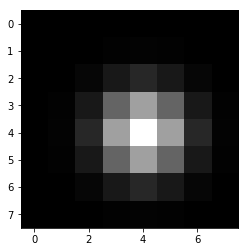

Spot reconstructed from gaussian fit parameters using sigma_max:


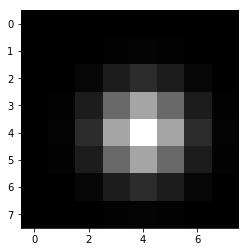

Original crop
[[15 18 21 19 19 19 19 20]
 [15 18 18 17 19 23 26 24]
 [15 16 16 17 22 29 35 36]
 [18 16 16 31 50 50 33 34]
 [17 16 24 52 81 80 49 21]
 [20 17 22 50 81 82 51 18]
 [23 17 16 30 51 53 34 17]
 [20 17 16 17 24 25 21 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  7 32 51 32  7  0]
 [ 0  1 12 51 82 51 12  1]
 [ 0  0  7 32 51 32  7  0]
 [ 0  0  1  7 12  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 34 52 34  9  1]
 [ 0  1 14 52 82 52 14  1]
 [ 0  1  9 34 52 34  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 480.39
y: 275.88
sigma_min: 1.0319082914510465
sigma_max: 1.10204555949853
height: 52.102288962107295
max_intensity: 71


Original crop around spot at (480, 275):


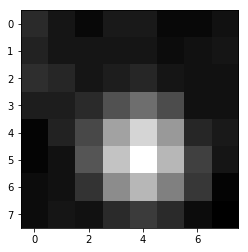

Spot reconstructed from gaussian fit parameters using sigma_min:


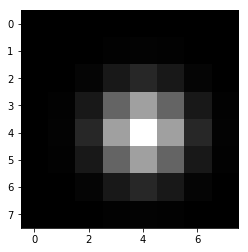

Spot reconstructed from gaussian fit parameters using sigma_max:


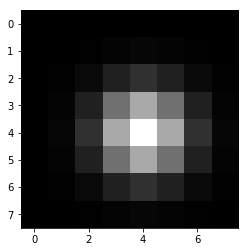

Original crop
[[21 16 13 17 17 13 13 15]
 [19 16 16 16 16 14 15 16]
 [22 20 16 18 20 16 15 15]
 [18 18 21 30 37 29 15 15]
 [12 19 28 49 61 47 20 17]
 [12 15 31 57 71 54 26 16]
 [14 15 23 44 54 41 24 12]
 [14 16 15 21 25 21 14 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 27 44 27  6  0]
 [ 0  1 10 44 71 44 10  1]
 [ 0  0  6 27 44 27  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 13  9  2  0]
 [ 0  1  9 31 47 31  9  1]
 [ 0  1 13 47 71 47 13  1]
 [ 0  1  9 31 47 31  9  1]
 [ 0  0  2  9 13  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 480.92
y: 206.98
sigma_min: 0.9176249221682646
sigma_max: 0.9974381045032105
height: 159.9010262426376
max_intensity: 175


Original crop around spot at (480, 206):


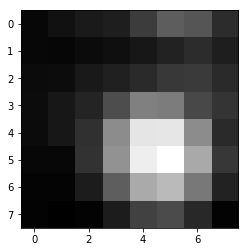

Spot reconstructed from gaussian fit parameters using sigma_min:


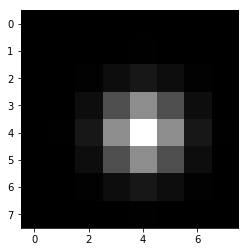

Spot reconstructed from gaussian fit parameters using sigma_max:


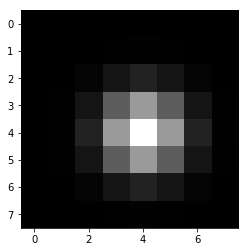

Original crop
[[ 18  24  30  32  52  72  67  41]
 [ 18  17  20  23  28  35  42  32]
 [ 20  21  29  34  40  49  50  40]
 [ 21  28  36  62  94  92  59  46]
 [ 20  28  44 102 158 159 102  40]
 [ 18  18  45 106 164 175 120  48]
 [ 16  16  31  73 121 131  89  35]
 [ 15  13  15  31  55  61  39  15]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   8  16   8   1   0]
 [  0   0   8  53  96  53   8   0]
 [  0   0  16  96 175  96  16   0]
 [  0   0   8  53  96  53   8   0]
 [  0   0   1   8  16   8   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   1   1   1   0   0]
 [  0   0   3  14  23  14   3   0]
 [  0   1  14  64 105  64  14   1]
 [  0   1  23 105 175 105  23   1]
 [  0   1  14  64 105  64  14   1]
 [  0   0   3  14  23  14   3   0]
 [  0   0   0   1   1   1   0   0]]

---------------------------------------------------

x: 481.18
y: 200.44
sigma_min

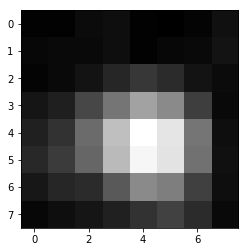

Spot reconstructed from gaussian fit parameters using sigma_min:


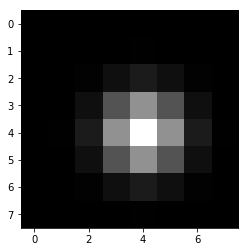

Spot reconstructed from gaussian fit parameters using sigma_max:


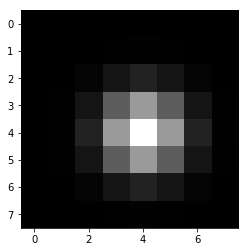

Original crop
[[ 15  15  19  20  15  14  16  21]
 [ 17  18  18  20  15  17  18  22]
 [ 16  18  22  30  37  32  22  19]
 [ 23  27  44  63  82  72  40  18]
 [ 28  35  59  94 121 110  63  20]
 [ 31  39  57  92 117 109  62  21]
 [ 24  30  32  52  72  67  41  20]
 [ 17  20  23  28  35  42  32  18]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   7  39  68  39   7   0]
 [  0   0  12  68 121  68  12   0]
 [  0   0   7  39  68  39   7   0]
 [  0   0   1   7  12   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   9  44  73  44   9   0]
 [  0   1  16  73 121  73  16   1]
 [  0   0   9  44  73  44   9   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 486.8
y: 230.89
sigma_min:

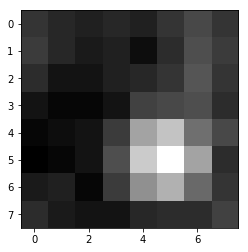

Spot reconstructed from gaussian fit parameters using sigma_min:


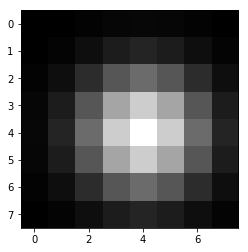

Spot reconstructed from gaussian fit parameters using sigma_max:


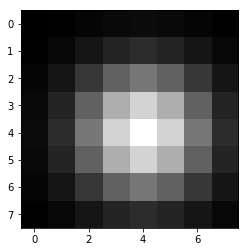

Original crop
[[22 20 19 20 19 22 25 22]
 [23 20 18 19 16 21 26 23]
 [21 17 17 19 20 22 27 22]
 [17 15 15 17 24 25 26 21]
 [15 16 17 23 39 44 31 25]
 [14 15 17 26 45 53 39 21]
 [18 19 15 23 36 41 30 22]
 [21 18 17 17 20 21 21 24]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  1  3  6  7  6  3  1]
 [ 0  3  9 17 22 17  9  3]
 [ 1  6 17 34 42 34 17  6]
 [ 1  7 22 42 53 42 22  7]
 [ 1  6 17 34 42 34 17  6]
 [ 0  3  9 17 22 17  9  3]
 [ 0  1  3  6  7  6  3  1]]
Reconstructed using sigma max
[[ 0  0  1  2  2  2  1  0]
 [ 0  1  4  7  9  7  4  1]
 [ 1  4 11 20 24 20 11  4]
 [ 2  7 20 36 43 36 20  7]
 [ 2  9 24 43 53 43 24  9]
 [ 2  7 20 36 43 36 20  7]
 [ 1  4 11 20 24 20 11  4]
 [ 0  1  4  7  9  7  4  1]]

---------------------------------------------------

x: 490.46
y: 258.62
sigma_min: 1.465683762484371
sigma_max: 2.7216511682119893
height: 9417.43570660191
max_intensity: 158


Original crop around spot at (490, 258):


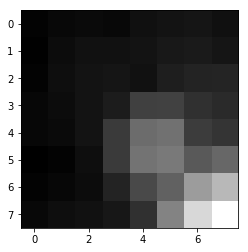

Spot reconstructed from gaussian fit parameters using sigma_min:


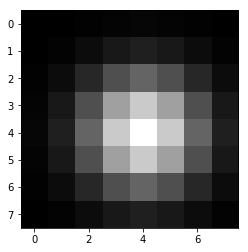

Spot reconstructed from gaussian fit parameters using sigma_max:


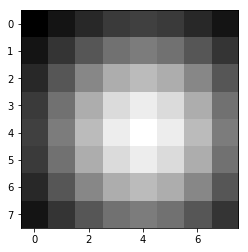

Original crop
[[ 16  19  20  19  23  25  26  23]
 [ 15  21  24  24  25  28  29  26]
 [ 16  22  25  26  24  31  34  35]
 [ 18  21  25  30  50  51  41  38]
 [ 18  20  25  47  75  78  48  44]
 [ 14  16  22  47  79  83  65  72]
 [ 16  18  21  34  56  69 102 118]
 [ 19  22  24  27  42  88 136 158]]
Reconstructed using sigma min
[[  0   0   1   3   3   3   1   0]
 [  0   2   7  15  19  15   7   2]
 [  1   7  24  49  62  49  24   7]
 [  3  15  49  99 125  99  49  15]
 [  3  19  62 125 158 125  62  19]
 [  3  15  49  99 125  99  49  15]
 [  1   7  24  49  62  49  24   7]
 [  0   2   7  15  19  15   7   2]]
Reconstructed using sigma max
[[ 18  29  40  50  53  50  40  29]
 [ 29  46  65  80  86  80  65  46]
 [ 40  65  92 112 120 112  92  65]
 [ 50  80 112 138 147 138 112  80]
 [ 53  86 120 147 158 147 120  86]
 [ 50  80 112 138 147 138 112  80]
 [ 40  65  92 112 120 112  92  65]
 [ 29  46  65  80  86  80  65  46]]

---------------------------------------------------

x: 493.6
y: 205.93
sigma_min:

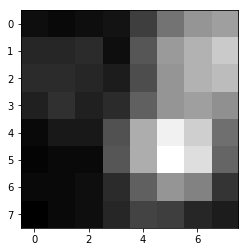

Spot reconstructed from gaussian fit parameters using sigma_min:


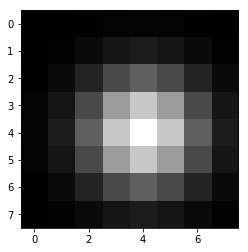

Spot reconstructed from gaussian fit parameters using sigma_max:


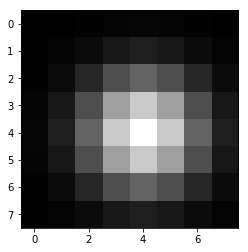

Original crop
[[18 17 18 19 28 39 46 48]
 [23 23 24 18 33 47 52 57]
 [24 24 23 21 31 46 52 54]
 [22 25 22 24 35 46 48 45]
 [17 20 20 32 51 65 58 38]
 [16 17 17 33 51 68 61 36]
 [17 17 18 24 35 46 42 26]
 [15 17 18 23 29 28 23 21]]
Reconstructed using sigma min
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  5  7  5  2  0]
 [ 0  2  9 19 25 19  9  2]
 [ 1  5 19 41 53 41 19  5]
 [ 1  7 25 53 68 53 25  7]
 [ 1  5 19 41 53 41 19  5]
 [ 0  2  9 19 25 19  9  2]
 [ 0  0  2  5  7  5  2  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  3  6  8  6  3  0]
 [ 0  3 10 20 26 20 10  3]
 [ 1  6 20 42 53 42 20  6]
 [ 1  8 26 53 68 53 26  8]
 [ 1  6 20 42 53 42 20  6]
 [ 0  3 10 20 26 20 10  3]
 [ 0  0  3  6  8  6  3  0]]

---------------------------------------------------

x: 494.0
y: 262.54
sigma_min: 1.177231636113094
sigma_max: 1.1836553926636106
height: 172.03707474278713
max_intensity: 171


Original crop around spot at (494, 262):


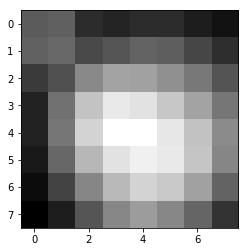

Spot reconstructed from gaussian fit parameters using sigma_min:


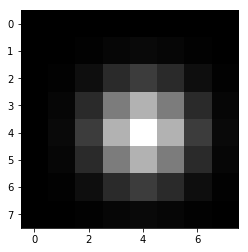

Spot reconstructed from gaussian fit parameters using sigma_max:


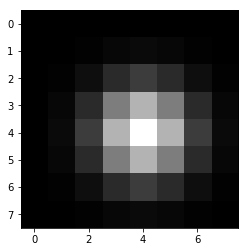

Original crop
[[ 75  78  48  44  48  48  39  33]
 [ 79  83  65  72  80  77  63  49]
 [ 56  69 102 118 116 106  92  71]
 [ 42  88 136 158 154 138 117  91]
 [ 42  91 145 171 171 157 135 103]
 [ 37  82 129 154 162 158 137 100]
 [ 29  61 100 130 145 139 116  80]
 [ 22  39  72 101 113 101  81  52]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  28  40  28   9   1]
 [  0   4  28  83 119  83  28   4]
 [  0   6  40 119 171 119  40   6]
 [  0   4  28  83 119  83  28   4]
 [  0   1   9  28  40  28   9   1]
 [  0   0   1   4   6   4   1   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   1   4   6   4   1   0]
 [  0   1   9  28  41  28   9   1]
 [  0   4  28  83 119  83  28   4]
 [  0   6  41 119 171 119  41   6]
 [  0   4  28  83 119  83  28   4]
 [  0   1   9  28  41  28   9   1]
 [  0   0   1   4   6   4   1   0]]

---------------------------------------------------

x: 496.09
y: 242.66
sigma_min

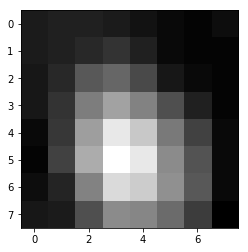

Spot reconstructed from gaussian fit parameters using sigma_min:


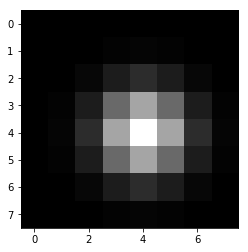

Spot reconstructed from gaussian fit parameters using sigma_max:


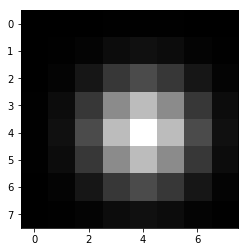

Original crop
[[21 22 22 21 19 17 16 18]
 [21 22 24 26 22 17 16 16]
 [20 24 34 37 31 20 17 16]
 [20 26 42 50 43 32 22 16]
 [17 27 49 65 58 41 29 17]
 [16 29 52 70 65 45 33 17]
 [18 23 43 62 59 46 34 17]
 [20 21 32 45 44 38 28 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  7 29 45 29  7  0]
 [ 0  1 12 45 70 45 12  1]
 [ 0  0  7 29 45 29  7  0]
 [ 0  0  2  7 12  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  6 15 20 15  6  1]
 [ 0  3 15 38 51 38 15  3]
 [ 0  4 20 51 70 51 20  4]
 [ 0  3 15 38 51 38 15  3]
 [ 0  1  6 15 20 15  6  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 496.22
y: 291.16
sigma_min: 0.921326212249472
sigma_max: 0.9428065976323327
height: 87.00778660473487
max_intensity: 92


Original crop around spot at (496, 291):


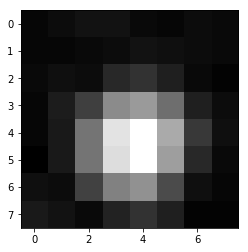

Spot reconstructed from gaussian fit parameters using sigma_min:


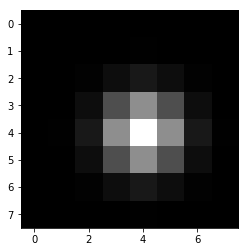

Spot reconstructed from gaussian fit parameters using sigma_max:


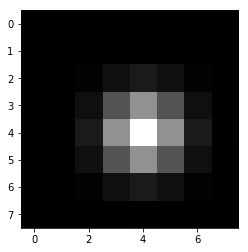

Original crop
[[13 15 17 17 14 13 15 14]
 [13 13 14 15 17 16 15 14]
 [14 16 15 24 27 21 14 12]
 [13 20 31 55 60 46 21 15]
 [13 19 48 83 92 65 29 16]
 [11 19 48 81 92 61 24 14]
 [16 15 32 52 57 35 16 13]
 [19 17 14 22 27 21 12 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 28 51 28  4  0]
 [ 0  0  8 51 92 51  8  0]
 [ 0  0  4 28 51 28  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  9 52 92 52  9  0]
 [ 0  0  5 29 52 29  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 502.63
y: 246.06
sigma_min: 1.1244455606462191
sigma_max: 1.195834883625737
height: 45.2136632147108
max_intensity: 61


Original crop around spot at (502, 246):


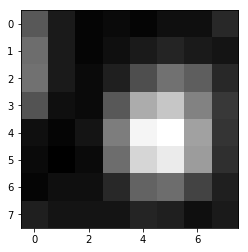

Spot reconstructed from gaussian fit parameters using sigma_min:


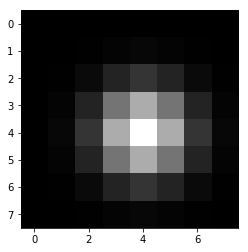

Spot reconstructed from gaussian fit parameters using sigma_max:


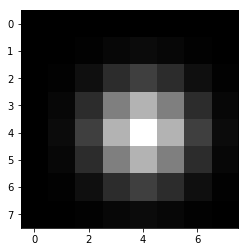

Original crop
[[29 17 13 14 13 15 15 20]
 [33 17 13 15 17 19 17 16]
 [34 17 14 18 27 34 30 20]
 [28 15 14 29 45 50 37 23]
 [15 13 16 36 59 61 43 22]
 [14 12 14 33 53 57 42 21]
 [13 15 15 20 31 33 25 18]
 [18 16 16 16 19 18 15 17]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  1  8 27 41 27  8  1]
 [ 0  1 12 41 61 41 12  1]
 [ 0  1  8 27 41 27  8  1]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 30 43 30 10  1]
 [ 0  2 15 43 61 43 15  2]
 [ 0  1 10 30 43 30 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 506.68
y: 290.89
sigma_min: 0.8489050263532704
sigma_max: 0.9013801080208812
height: 166.38475245825566
max_intensity: 163


Original crop around spot at (506, 290):


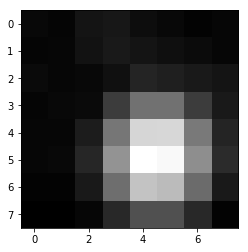

Spot reconstructed from gaussian fit parameters using sigma_min:


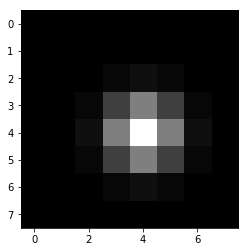

Spot reconstructed from gaussian fit parameters using sigma_max:


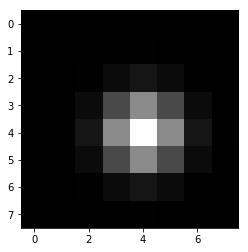

Original crop
[[ 15  13  22  24  18  15  12  14]
 [ 13  14  21  25  22  19  17  14]
 [ 16  14  15  20  32  29  25  22]
 [ 13  15  16  47  78  78  46  25]
 [ 14  14  27  81 138 139  83  32]
 [ 14  15  33  98 163 159  95  36]
 [ 12  12  25  76 127 122  74  25]
 [ 10  10  14  34  58  58  35  12]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  40  81  40   5   0]
 [  0   0  10  81 163  81  10   0]
 [  0   0   5  40  81  40   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  47  88  47   7   0]
 [  0   0  13  88 163  88  13   0]
 [  0   0   7  47  88  47   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 509.17
y: 324.77
sigma_min

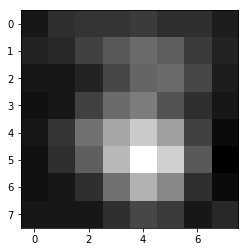

Spot reconstructed from gaussian fit parameters using sigma_min:


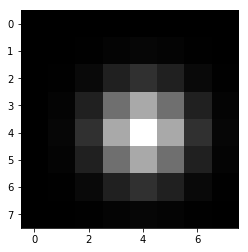

Spot reconstructed from gaussian fit parameters using sigma_max:


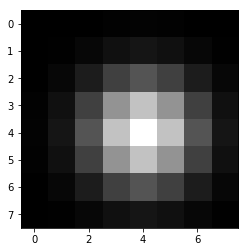

Original crop
[[13 17 18 18 19 17 17 14]
 [15 16 20 24 27 25 19 15]
 [13 13 15 21 26 27 21 14]
 [12 13 20 27 30 23 17 13]
 [13 18 28 37 43 36 20 11]
 [12 17 25 40 52 44 24  9]
 [12 13 17 28 39 32 17 11]
 [13 13 13 17 21 19 13 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 22 34 22  6  0]
 [ 0  1  9 34 52 34  9  1]
 [ 0  0  6 22 34 22  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  5 13 17 13  5  1]
 [ 0  3 13 29 39 29 13  3]
 [ 0  4 17 39 52 39 17  4]
 [ 0  3 13 29 39 29 13  3]
 [ 0  1  5 13 17 13  5  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 512.83
y: 331.05
sigma_min: 0.9123222283423912
sigma_max: 0.9421551736949373
height: 66.6079449443899
max_intensity: 76


Original crop around spot at (512, 331):


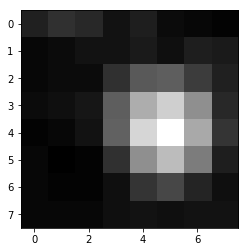

Spot reconstructed from gaussian fit parameters using sigma_min:


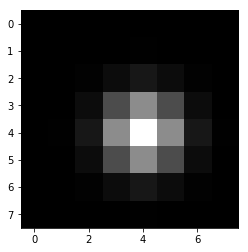

Spot reconstructed from gaussian fit parameters using sigma_max:


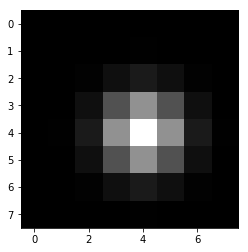

Original crop
[[17 21 19 13 16 11 10  9]
 [10 11 13 13 15 12 16 15]
 [10 11 11 21 32 33 24 17]
 [11 12 14 33 54 63 46 19]
 [ 9 10 13 34 65 76 53 22]
 [10  8  9 21 46 58 41 16]
 [10  9  9 12 22 27 18 12]
 [10 10 10 12 13 12 13 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  3 22 41 22  3  0]
 [ 0  0  6 41 76 41  6  0]
 [ 0  0  3 22 41 22  3  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  7 43 76 43  7  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 515.84
y: 230.76
sigma_min: 0.9224750348150155
sigma_max: 0.942627421933282
height: 123.34489756619995
max_intensity: 140


Original crop around spot at (515, 230):


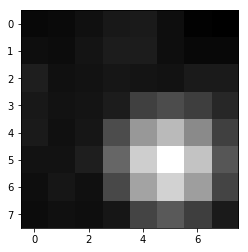

Spot reconstructed from gaussian fit parameters using sigma_min:


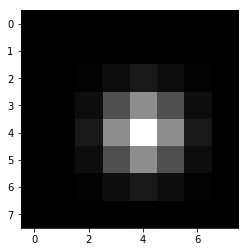

Spot reconstructed from gaussian fit parameters using sigma_max:


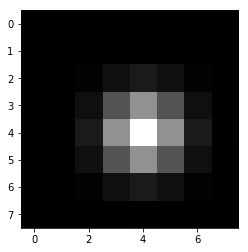

Original crop
[[ 16  17  20  24  25  19  13  12]
 [ 19  18  22  26  26  19  16  16]
 [ 27  20  21  23  22  21  25  25]
 [ 24  21  22  26  44  50  43  32]
 [ 25  20  23  50  88 105  81  44]
 [ 21  21  27  63 115 140 110  55]
 [ 19  23  20  48  94 117  91  46]
 [ 18  20  19  23  46  57  43  25]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  43  77  43   7   0]
 [  0   0  13  77 140  77  13   0]
 [  0   0   7  43  77  43   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   8  45  79  45   8   0]
 [  0   0  14  79 140  79  14   0]
 [  0   0   8  45  79  45   8   0]
 [  0   0   1   8  14   8   1   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 521.59
y: 235.73
sigma_min

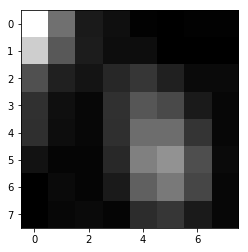

Spot reconstructed from gaussian fit parameters using sigma_min:


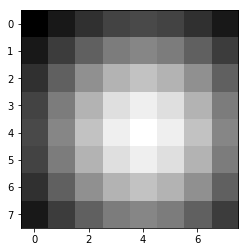

Spot reconstructed from gaussian fit parameters using sigma_max:


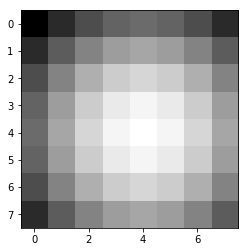

Original crop
[[110  55  22  18  13  12  13  13]
 [ 91  46  23  17  17  12  12  12]
 [ 43  25  20  27  33  25  16  16]
 [ 31  18  15  31  45  40  22  15]
 [ 30  17  15  30  54  54  32  15]
 [ 19  14  14  28  61  68  42  16]
 [ 12  16  14  22  49  59  39  15]
 [ 12  15  16  14  29  33  22  15]]
Reconstructed using sigma min
[[ 18  26  35  42  44  42  35  26]
 [ 26  39  52  62  66  62  52  39]
 [ 35  52  70  83  87  83  70  52]
 [ 42  62  83  98 103  98  83  62]
 [ 44  66  87 103 110 103  87  66]
 [ 42  62  83  98 103  98  83  62]
 [ 35  52  70  83  87  83  70  52]
 [ 26  39  52  62  66  62  52  39]]
Reconstructed using sigma max
[[ 57  66  73  78  79  78  73  66]
 [ 66  76  84  89  91  89  84  76]
 [ 73  84  93  99 101  99  93  84]
 [ 78  89  99 105 107 105  99  89]
 [ 79  91 101 107 110 107 101  91]
 [ 78  89  99 105 107 105  99  89]
 [ 73  84  93  99 101  99  93  84]
 [ 66  76  84  89  91  89  84  76]]

---------------------------------------------------

x: 527.48
y: 230.36
sigma_min

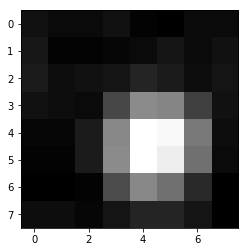

Spot reconstructed from gaussian fit parameters using sigma_min:


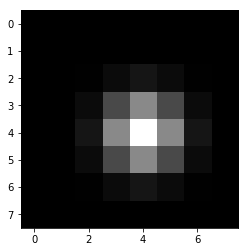

Spot reconstructed from gaussian fit parameters using sigma_max:


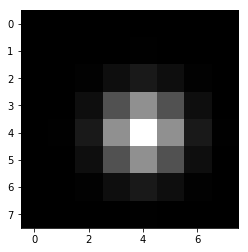

Original crop
[[17 15 15 17 13 12 15 15]
 [19 13 13 14 15 18 15 17]
 [20 16 17 18 23 20 16 18]
 [17 16 15 33 53 51 31 17]
 [14 14 20 52 87 85 48 16]
 [13 13 20 53 87 82 45 15]
 [12 12 13 34 52 45 24 12]
 [16 16 14 18 23 23 18 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  3 25 46 25  3  0]
 [ 0  0  7 46 87 46  7  0]
 [ 0  0  3 25 46 25  3  0]
 [ 0  0  0  3  7  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 27 48 27  4  0]
 [ 0  0  8 48 87 48  8  0]
 [ 0  0  4 27 48 27  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 543.31
y: 300.84
sigma_min: 0.8822855406898651
sigma_max: 0.9007887734609938
height: 106.16527657255124
max_intensity: 110


Original crop around spot at (543, 300):


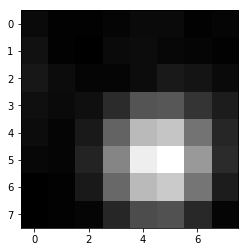

Spot reconstructed from gaussian fit parameters using sigma_min:


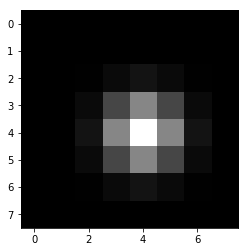

Spot reconstructed from gaussian fit parameters using sigma_max:


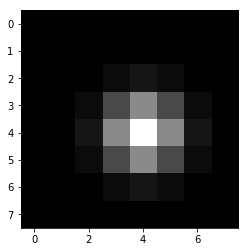

Original crop
[[ 14  11  11  12  14  14  11  12]
 [ 17  11  10  14  15  13  12  11]
 [ 19  15  12  12  15  20  18  14]
 [ 16  14  16  27  43  44  31  21]
 [ 15  12  20  49  83  87  55  25]
 [ 13  12  24  62 103 110  70  27]
 [ 10  11  20  51  83  89  56  21]
 [ 10  11  12  25  40  42  26  12]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   4  30  57  30   4   0]
 [  0   0   8  57 110  57   8   0]
 [  0   0   4  30  57  30   4   0]
 [  0   0   0   4   8   4   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   5  32  59  32   5   0]
 [  0   0   9  59 110  59   9   0]
 [  0   0   5  32  59  32   5   0]
 [  0   0   0   5   9   5   0   0]
 [  0   0   0   0   0   0   0   0]]

---------------------------------------------------

x: 543.31
y: 316.92
sigma_min

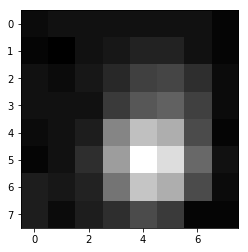

Spot reconstructed from gaussian fit parameters using sigma_min:


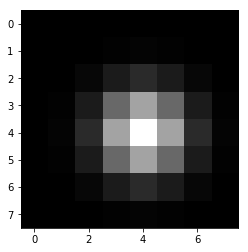

Spot reconstructed from gaussian fit parameters using sigma_max:


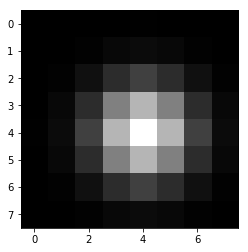

Original crop
[[12 13 13 13 13 13 13 11]
 [11 10 13 14 16 16 13 11]
 [13 12 14 17 21 22 18 12]
 [13 13 13 20 25 27 21 12]
 [12 13 15 33 43 40 23 11]
 [11 13 18 37 54 48 28 13]
 [15 14 16 30 44 40 23 12]
 [15 12 15 18 23 20 11 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 22 34 22  5  0]
 [ 0  0  9 34 54 34  9  0]
 [ 0  0  5 22 34 22  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 13  9  3  0]
 [ 0  1  9 27 38 27  9  1]
 [ 0  2 13 38 54 38 13  2]
 [ 0  1  9 27 38 27  9  1]
 [ 0  0  3  9 13  9  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 544.49
y: 277.06
sigma_min: 0.9713919132733576
sigma_max: 1.000426776027107
height: 63.19531377014018
max_intensity: 77


Original crop around spot at (544, 277):


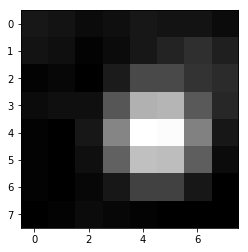

Spot reconstructed from gaussian fit parameters using sigma_min:


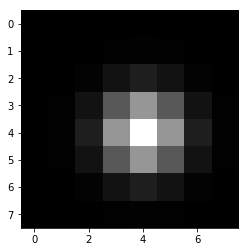

Spot reconstructed from gaussian fit parameters using sigma_max:


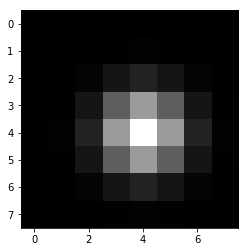

Original crop
[[18 17 15 16 18 17 17 15]
 [17 16 13 15 18 21 24 20]
 [13 14 12 19 31 31 25 23]
 [15 16 16 34 57 58 35 22]
 [13 12 18 46 77 76 45 18]
 [13 12 16 37 61 60 36 15]
 [13 12 14 18 29 29 18 12]
 [12 13 15 14 13 12 12 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 26 45 26  5  0]
 [ 0  0  9 45 77 45  9  0]
 [ 0  0  5 26 45 26  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 28 46 28  6  0]
 [ 0  0 10 46 77 46 10  0]
 [ 0  0  6 28 46 28  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 555.86
y: 212.86
sigma_min: 1.0742540719274525
sigma_max: 1.1548064294874254
height: 49.25687586798731
max_intensity: 70


Original crop around spot at (555, 212):


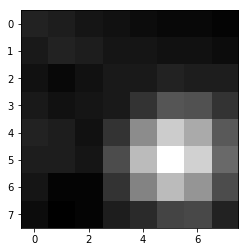

Spot reconstructed from gaussian fit parameters using sigma_min:


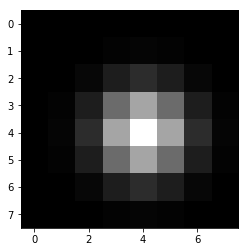

Spot reconstructed from gaussian fit parameters using sigma_max:


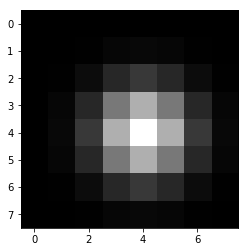

Original crop
[[18 17 15 14 13 12 12 11]
 [16 18 17 15 15 14 14 13]
 [14 12 14 16 16 18 17 17]
 [16 14 15 16 22 30 29 22]
 [18 17 14 22 43 58 50 31]
 [17 17 15 28 54 70 59 35]
 [15 11 11 22 41 54 45 28]
 [13 10 11 17 20 26 27 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  8 29 45 29  8  0]
 [ 0  1 12 45 70 45 12  1]
 [ 0  0  8 29 45 29  8  0]
 [ 0  0  2  8 12  8  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 15 10  3  0]
 [ 0  1 10 33 48 33 10  1]
 [ 0  2 15 48 70 48 15  2]
 [ 0  1 10 33 48 33 10  1]
 [ 0  0  3 10 15 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 563.58
y: 321.37
sigma_min: 1.2318266805170555
sigma_max: 1.3773691752675183
height: 22.553506679034193
max_intensity: 33


Original crop around spot at (563, 321):


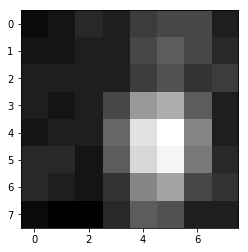

Spot reconstructed from gaussian fit parameters using sigma_min:


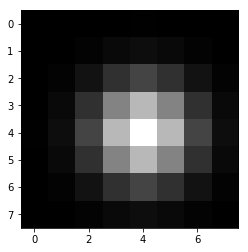

Spot reconstructed from gaussian fit parameters using sigma_max:


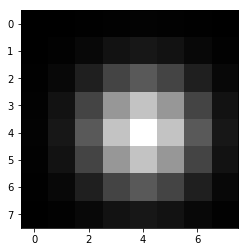

Original crop
[[ 9 10 12 11 14 15 15 11]
 [10 10 11 11 15 17 15 12]
 [11 11 11 11 14 16 13 14]
 [11 10 11 15 23 25 17 11]
 [10 11 11 18 30 33 21 11]
 [12 12 10 17 29 32 20 12]
 [12 11 10 13 21 24 15 13]
 [ 9  8  8 12 17 16 11 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  1  6 17 23 17  6  1]
 [ 0  1  8 23 33 23  8  1]
 [ 0  1  6 17 23 17  6  1]
 [ 0  0  2  6  8  6  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  2  3  2  1  0]
 [ 0  1  4  8 11  8  4  1]
 [ 0  2  8 19 25 19  8  2]
 [ 0  3 11 25 33 25 11  3]
 [ 0  2  8 19 25 19  8  2]
 [ 0  1  4  8 11  8  4  1]
 [ 0  0  1  2  3  2  1  0]]

---------------------------------------------------

x: 564.63
y: 287.49
sigma_min: 1.0289190277325946
sigma_max: 1.0553047562629607
height: 62.78390448095877
max_intensity: 79


Original crop around spot at (564, 287):


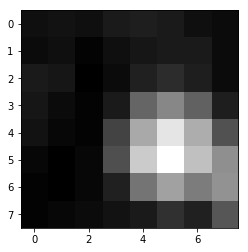

Spot reconstructed from gaussian fit parameters using sigma_min:


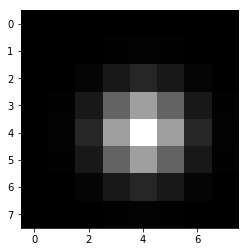

Spot reconstructed from gaussian fit parameters using sigma_max:


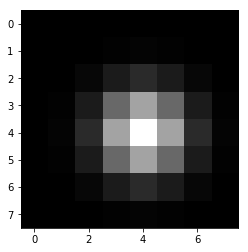

Original crop
[[15 16 15 18 19 18 15 14]
 [14 15 12 15 17 18 18 14]
 [18 17 11 14 20 23 19 14]
 [17 14 12 18 38 47 37 19]
 [16 13 12 29 56 72 57 33]
 [13 11 13 32 65 79 62 49]
 [12 11 13 20 42 54 44 50]
 [12 13 14 16 18 24 20 34]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 30 49 30  7  0]
 [ 0  1 11 49 79 49 11  1]
 [ 0  0  7 30 49 30  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  8 32 50 32  8  0]
 [ 0  1 13 50 79 50 13  1]
 [ 0  0  8 32 50 32  8  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 568.42
y: 288.54
sigma_min: 0.9963431559006073
sigma_max: 1.403361496454329
height: 63.297404356106775
max_intensity: 79


Original crop around spot at (568, 288):


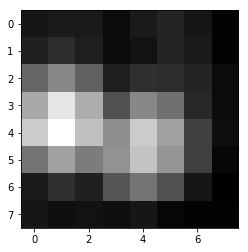

Spot reconstructed from gaussian fit parameters using sigma_min:


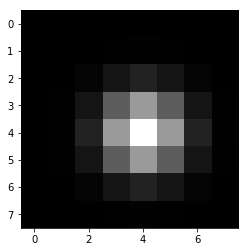

Spot reconstructed from gaussian fit parameters using sigma_max:


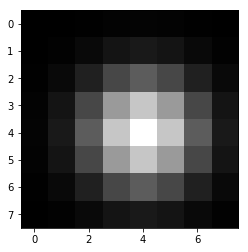

Original crop
[[17 18 18 14 18 21 17 12]
 [20 23 19 14 16 21 18 12]
 [38 47 37 19 24 23 21 14]
 [56 72 57 33 47 41 22 14]
 [65 79 62 49 65 54 28 15]
 [42 54 44 50 63 51 28 13]
 [18 24 20 34 42 33 17 11]
 [17 15 16 15 17 13 12 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 28 47 28  6  0]
 [ 0  0 10 47 79 47 10  0]
 [ 0  0  6 28 47 28  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  8  6  2  0]
 [ 0  2 10 22 28 22 10  2]
 [ 1  6 22 47 61 47 22  6]
 [ 1  8 28 61 79 61 28  8]
 [ 1  6 22 47 61 47 22  6]
 [ 0  2 10 22 28 22 10  2]
 [ 0  0  2  6  8  6  2  0]]

---------------------------------------------------

x: 572.87
y: 334.71
sigma_min: 1.081220627017272
sigma_max: 1.158749783365706
height: 35.26609291702981
max_intensity: 52


Original crop around spot at (572, 334):


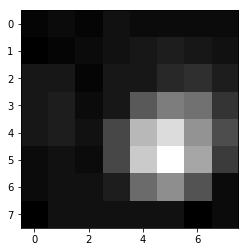

Spot reconstructed from gaussian fit parameters using sigma_min:


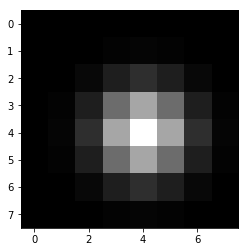

Spot reconstructed from gaussian fit parameters using sigma_max:


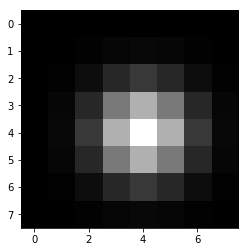

Original crop
[[10 11 10 12 11 11 11 11]
 [ 9 10 11 12 13 14 13 12]
 [13 13 10 13 13 16 17 14]
 [13 14 11 13 24 30 28 18]
 [13 14 12 21 40 46 34 22]
 [11 12 11 21 43 52 37 19]
 [11 12 12 14 27 33 23 11]
 [ 9 12 12 12 12 12  9 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 22 33 22  6  0]
 [ 0  1  9 33 52 33  9  1]
 [ 0  0  6 22 33 22  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 11  8  2  0]
 [ 0  1  8 24 35 24  8  1]
 [ 0  1 11 35 52 35 11  1]
 [ 0  1  8 24 35 24  8  1]
 [ 0  0  2  8 11  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 574.05
y: 306.2
sigma_min: 0.8993848439481056
sigma_max: 1.0149381015170171
height: 114.3954865456258
max_intensity: 120


Original crop around spot at (574, 306):


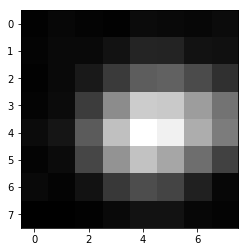

Spot reconstructed from gaussian fit parameters using sigma_min:


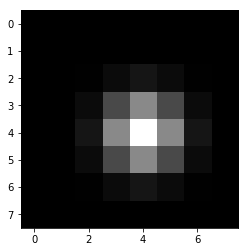

Spot reconstructed from gaussian fit parameters using sigma_max:


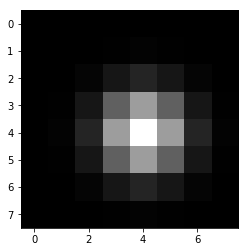

Original crop
[[ 12  14  13  12  16  15  14  16]
 [ 13  15  15  19  27  26  19  18]
 [ 12  15  22  36  51  53  43  32]
 [ 13  16  37  71  98  97  78  60]
 [ 16  20  50  93 120 114  85  64]
 [ 13  16  41  74  94  82  58  39]
 [ 15  13  19  35  44  40  25  14]
 [ 11  11  12  15  19  19  14  13]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   5  34  64  34   5   0]
 [  0   0  10  64 120  64  10   0]
 [  0   0   5  34  64  34   5   0]
 [  0   0   0   5  10   5   0   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0  10  45  73  45  10   0]
 [  0   1  17  73 120  73  17   1]
 [  0   0  10  45  73  45  10   0]
 [  0   0   2  10  17  10   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 589.87
y: 291.03
sigma_min

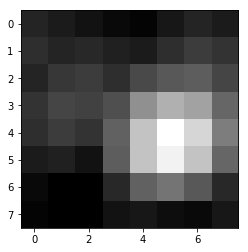

Spot reconstructed from gaussian fit parameters using sigma_min:


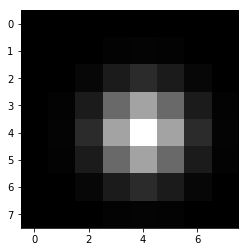

Spot reconstructed from gaussian fit parameters using sigma_max:


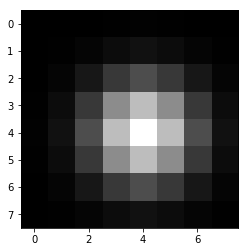

Original crop
[[18 16 14 12 11 15 18 16]
 [20 18 19 17 16 20 23 21]
 [18 22 23 20 26 29 30 25]
 [21 25 24 27 41 48 45 32]
 [20 23 21 31 52 65 56 37]
 [16 17 14 30 52 62 52 32]
 [12 10 10 19 31 35 29 19]
 [11 10 10 14 15 13 12 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  7 26 41 26  7  0]
 [ 0  1 11 41 65 41 11  1]
 [ 0  0  7 26 41 26  7  0]
 [ 0  0  1  7 11  7  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  1  3  4  3  1  0]
 [ 0  1  5 14 19 14  5  1]
 [ 0  3 14 35 48 35 14  3]
 [ 0  4 19 48 65 48 19  4]
 [ 0  3 14 35 48 35 14  3]
 [ 0  1  5 14 19 14  5  1]
 [ 0  0  1  3  4  3  1  0]]

---------------------------------------------------

x: 590.53
y: 313.78
sigma_min: 0.9575899082845473
sigma_max: 0.9760735273537945
height: 62.3587435780441
max_intensity: 69


Original crop around spot at (590, 313):


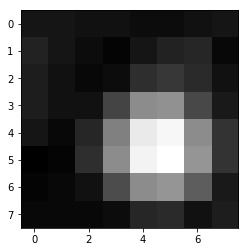

Spot reconstructed from gaussian fit parameters using sigma_min:


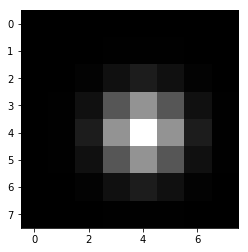

Spot reconstructed from gaussian fit parameters using sigma_max:


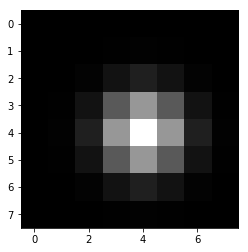

Original crop
[[14 14 13 13 12 12 13 14]
 [17 14 12 10 14 17 18 11]
 [16 13 11 12 20 22 19 13]
 [16 13 13 25 42 43 26 15]
 [14 11 18 39 64 67 42 21]
 [ 9 10 20 42 66 69 44 21]
 [10 11 13 27 42 44 31 15]
 [11 11 11 12 18 19 13 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 23 39 23  4  0]
 [ 0  0  7 39 69 39  7  0]
 [ 0  0  4 23 39 23  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  5 24 40 24  5  0]
 [ 0  0  8 40 69 40  8  0]
 [ 0  0  5 24 40 24  5  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 594.97
y: 336.28
sigma_min: 0.9208402780889914
sigma_max: 0.9351992152104179
height: 77.07098380901591
max_intensity: 87


Original crop around spot at (594, 336):


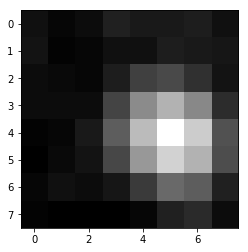

Spot reconstructed from gaussian fit parameters using sigma_min:


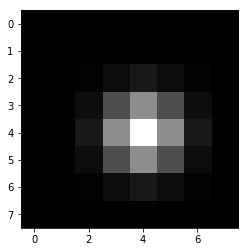

Spot reconstructed from gaussian fit parameters using sigma_max:


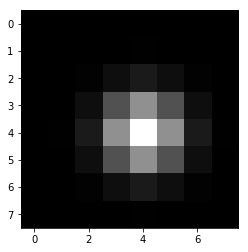

Original crop
[[13 10 12 18 16 16 17 13]
 [14  9 10 13 13 17 16 15]
 [12 11 10 17 28 31 23 14]
 [12 12 12 29 51 63 50 22]
 [ 9 10 16 37 66 87 71 33]
 [ 8 11 14 30 55 73 63 32]
 [10 13 12 15 26 41 37 18]
 [ 9  8  8  8 10 18 21 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  8 48 87 48  8  0]
 [ 0  0  4 26 48 26  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 27 49 27  4  0]
 [ 0  0  8 49 87 49  8  0]
 [ 0  0  4 27 49 27  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 598.38
y: 259.27
sigma_min: 0.897621406638888
sigma_max: 1.0716081248018394
height: 160.57050588189156
max_intensity: 166


Original crop around spot at (598, 259):


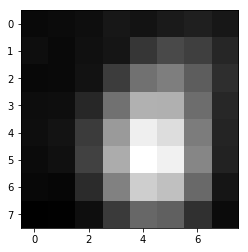

Spot reconstructed from gaussian fit parameters using sigma_min:


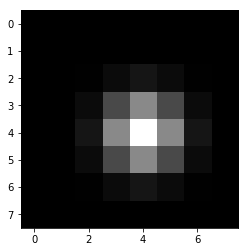

Spot reconstructed from gaussian fit parameters using sigma_max:


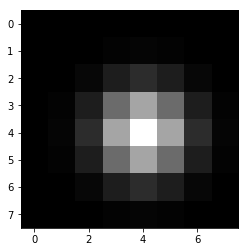

Original crop
[[ 18  19  21  26  24  28  31  26]
 [ 21  18  22  25  45  56  50  35]
 [ 17  18  23  49  81  88  68  40]
 [ 20  21  36  80 119 118  78  36]
 [ 21  24  48 105 156 145  87  34]
 [ 19  22  52 116 166 157  93  33]
 [ 17  16  38  90 136 128  76  25]
 [ 12  13  21  47  74  70  41  19]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   7  47  89  47   7   0]
 [  0   0  13  89 166  89  13   0]
 [  0   0   7  47  89  47   7   0]
 [  0   0   1   7  13   7   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   2   3   2   0   0]
 [  0   0   5  18  29  18   5   0]
 [  0   2  18  69 107  69  18   2]
 [  0   3  29 107 166 107  29   3]
 [  0   2  18  69 107  69  18   2]
 [  0   0   5  18  29  18   5   0]
 [  0   0   0   2   3   2   0   0]]

---------------------------------------------------

x: 604.13
y: 238.86
sigma_min

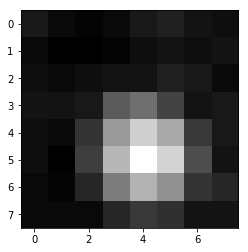

Spot reconstructed from gaussian fit parameters using sigma_min:


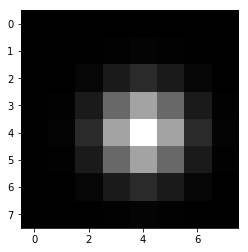

Spot reconstructed from gaussian fit parameters using sigma_max:


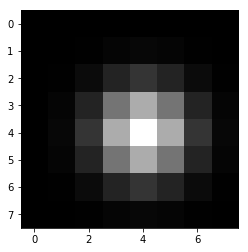

Original crop
[[17 14 13 14 17 19 16 15]
 [14 12 12 13 15 16 15 16]
 [15 14 15 16 16 19 17 14]
 [16 16 17 31 35 26 16 17]
 [15 14 23 44 55 47 24 17]
 [15 12 25 50 65 56 28 16]
 [14 13 20 38 49 42 23 20]
 [14 14 14 20 24 22 16 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  6 26 41 26  6  0]
 [ 0  1 10 41 65 41 10  1]
 [ 0  0  6 26 41 26  6  0]
 [ 0  0  1  6 10  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 13  9  2  0]
 [ 0  1  9 29 43 29  9  1]
 [ 0  1 13 43 65 43 13  1]
 [ 0  1  9 29 43 29  9  1]
 [ 0  0  2  9 13  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 607.66
y: 343.19
sigma_min: 0.9136553087508866
sigma_max: 0.9413131455204156
height: 60.24848031640016
max_intensity: 65


Original crop around spot at (607, 343):


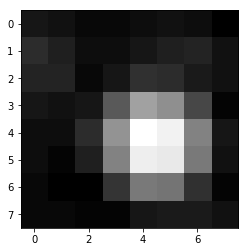

Spot reconstructed from gaussian fit parameters using sigma_min:


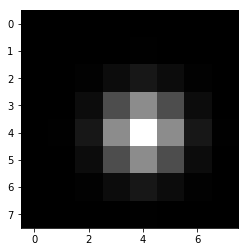

Spot reconstructed from gaussian fit parameters using sigma_max:


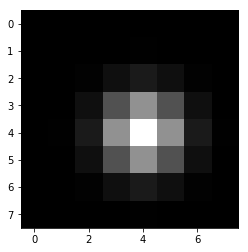

Original crop
[[13 12 10 10 11 12 11  8]
 [18 15 11 11 13 15 16 12]
 [16 16 10 13 19 18 14 12]
 [13 12 13 28 44 40 24  9]
 [11 11 18 41 65 62 37 13]
 [11  9 15 37 61 60 35 12]
 [10  8  8 20 35 34 19  9]
 [10 10  9  9 13 14 14 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  5  3  0  0]
 [ 0  0  3 19 35 19  3  0]
 [ 0  0  5 35 65 35  5  0]
 [ 0  0  3 19 35 19  3  0]
 [ 0  0  0  3  5  3  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  3 21 36 21  3  0]
 [ 0  0  6 36 65 36  6  0]
 [ 0  0  3 21 36 21  3  0]
 [ 0  0  0  3  6  3  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 608.71
y: 314.7
sigma_min: 0.9629534020412283
sigma_max: 0.9646690552753556
height: 62.28285758452513
max_intensity: 74


Original crop around spot at (608, 314):


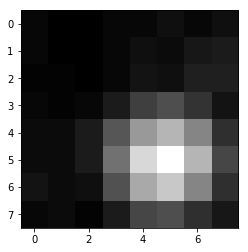

Spot reconstructed from gaussian fit parameters using sigma_min:


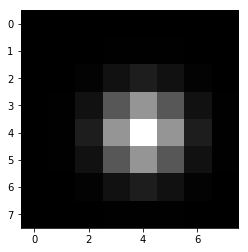

Spot reconstructed from gaussian fit parameters using sigma_max:


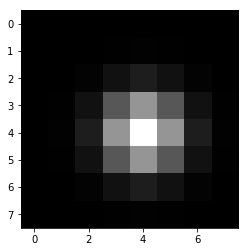

Original crop
[[11  9  9 11 11 13 11 13]
 [11  9  9 11 13 12 15 16]
 [10 10  9 11 14 13 17 17]
 [11 10 11 16 25 29 22 14]
 [12 12 16 31 48 55 43 21]
 [12 12 16 38 64 74 55 27]
 [14 12 13 30 52 60 43 21]
 [11 12 10 16 27 29 21 15]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 25 43 25  4  0]
 [ 0  0  8 43 74 43  8  0]
 [ 0  0  4 25 43 25  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  5 25 43 25  5  0]
 [ 0  0  8 43 74 43  8  0]
 [ 0  0  5 25 43 25  5  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 609.62
y: 329.48
sigma_min: 1.0059866019756898
sigma_max: 1.02602230696694
height: 48.65102466342435
max_intensity: 59


Original crop around spot at (609, 329):


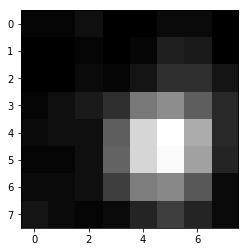

Spot reconstructed from gaussian fit parameters using sigma_min:


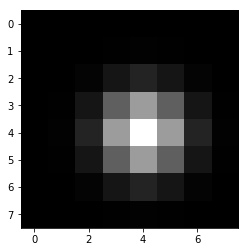

Spot reconstructed from gaussian fit parameters using sigma_max:


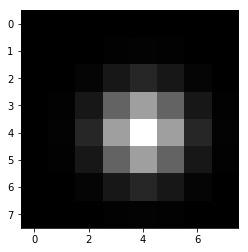

Original crop
[[11 11 13 10 10 12 12 10]
 [10 10 11 10 11 16 15 10]
 [10 10 12 11 14 19 19 14]
 [11 13 15 19 33 37 28 18]
 [12 13 13 28 51 59 43 18]
 [11 11 13 29 51 58 41 17]
 [12 12 13 22 34 36 27 12]
 [14 12 11 12 17 22 17 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  4  8  4  1  0]
 [ 0  0  4 21 35 21  4  0]
 [ 0  0  8 35 59 35  8  0]
 [ 0  0  4 21 35 21  4  0]
 [ 0  0  1  4  8  4  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  5 22 36 22  5  0]
 [ 0  0  8 36 59 36  8  0]
 [ 0  0  5 22 36 22  5  0]
 [ 0  0  1  5  8  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 616.95
y: 243.57
sigma_min: 1.1599654356006375
sigma_max: 1.261518412417516
height: 40.9503825654221
max_intensity: 53


Original crop around spot at (616, 243):


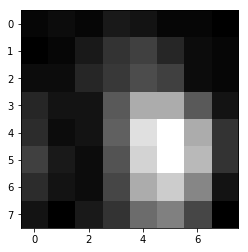

Spot reconstructed from gaussian fit parameters using sigma_min:


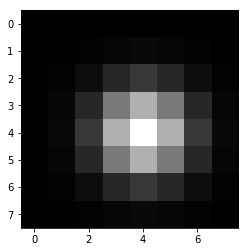

Spot reconstructed from gaussian fit parameters using sigma_max:


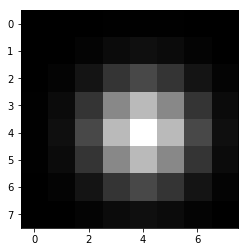

Original crop
[[14 15 14 17 16 14 14 13]
 [13 14 17 21 23 19 15 14]
 [15 15 19 22 25 23 15 14]
 [19 16 16 27 40 40 27 16]
 [20 15 16 28 48 53 40 21]
 [23 17 15 26 46 53 42 21]
 [20 16 15 24 40 45 34 16]
 [16 13 17 21 30 33 24 13]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 11  8  2  0]
 [ 0  1  8 25 36 25  8  1]
 [ 0  1 11 36 53 36 11  1]
 [ 0  1  8 25 36 25  8  1]
 [ 0  0  2  8 11  8  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 11 15 11  4  0]
 [ 0  2 11 28 38 28 11  2]
 [ 0  3 15 38 53 38 15  3]
 [ 0  2 11 28 38 28 11  2]
 [ 0  0  4 11 15 11  4  0]
 [ 0  0  0  2  3  2  0  0]]

---------------------------------------------------

x: 623.23
y: 315.35
sigma_min: 1.170756087113541
sigma_max: 1.243770475126813
height: 28.81176193977522
max_intensity: 39


Original crop around spot at (623, 315):


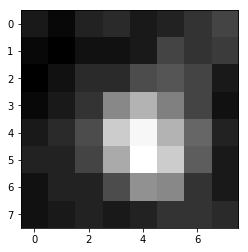

Spot reconstructed from gaussian fit parameters using sigma_min:


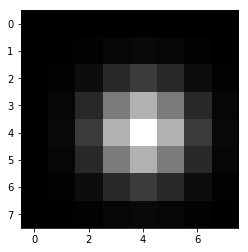

Spot reconstructed from gaussian fit parameters using sigma_max:


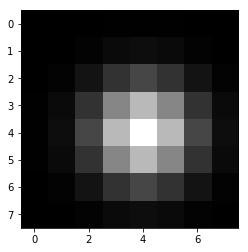

Original crop
[[12 10 13 14 12 13 15 17]
 [10  9 11 11 12 17 15 16]
 [ 9 11 14 14 18 19 17 12]
 [10 12 15 25 30 24 17 11]
 [12 14 18 33 38 30 21 13]
 [13 13 17 29 39 33 20 12]
 [11 13 13 18 26 25 15 12]
 [11 12 13 12 13 15 15 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  6  9  6  2  0]
 [ 0  1  6 18 27 18  6  1]
 [ 0  1  9 27 39 27  9  1]
 [ 0  1  6 18 27 18  6  1]
 [ 0  0  2  6  9  6  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  2  7 10  7  2  0]
 [ 0  1  7 20 28 20  7  1]
 [ 0  2 10 28 39 28 10  2]
 [ 0  1  7 20 28 20  7  1]
 [ 0  0  2  7 10  7  2  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 627.41
y: 296.65
sigma_min: 1.0197353981448842
sigma_max: 1.080952810441281
height: 64.31190100535122
max_intensity: 76


Original crop around spot at (627, 296):


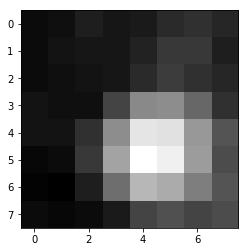

Spot reconstructed from gaussian fit parameters using sigma_min:


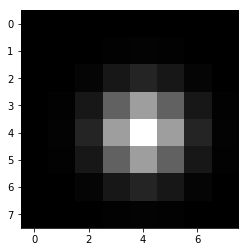

Spot reconstructed from gaussian fit parameters using sigma_max:


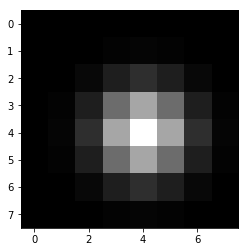

Original crop
[[12 13 17 15 16 20 22 19]
 [12 14 15 15 18 24 24 17]
 [12 13 14 15 20 25 22 19]
 [14 13 13 27 45 46 36 22]
 [14 14 22 46 69 68 49 31]
 [11 12 24 52 76 72 50 29]
 [10  9 17 38 57 54 42 31]
 [12 11 12 16 27 30 27 29]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  6 29 46 29  6  0]
 [ 0  1 11 46 76 46 11  1]
 [ 0  0  6 29 46 29  6  0]
 [ 0  0  1  6 11  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  8 13  8  2  0]
 [ 0  1  8 32 49 32  8  1]
 [ 0  1 13 49 76 49 13  1]
 [ 0  1  8 32 49 32  8  1]
 [ 0  0  2  8 13  8  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 629.24
y: 322.16
sigma_min: 0.9159693156555841
sigma_max: 0.999213884961924
height: 110.62508683547817
max_intensity: 121


Original crop around spot at (629, 322):


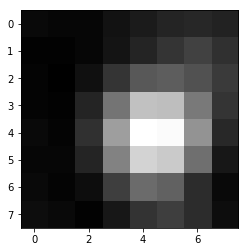

Spot reconstructed from gaussian fit parameters using sigma_min:


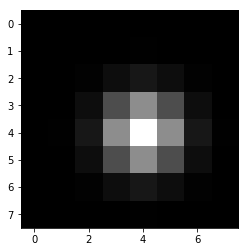

Spot reconstructed from gaussian fit parameters using sigma_max:


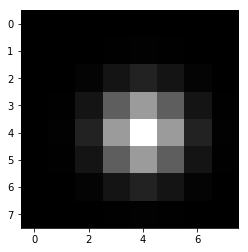

Original crop
[[ 15  14  14  19  23  27  28  26]
 [ 12  12  14  20  27  34  39  32]
 [ 13  11  18  34  49  51  46  36]
 [ 13  12  27  61  94  93  63  34]
 [ 15  13  32  79 121 119  75  29]
 [ 14  14  27  67 102  98  59  21]
 [ 15  13  17  38  57  53  30  15]
 [ 17  15  12  21  33  38  30  17]]
Reconstructed using sigma min
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   6  36  66  36   6   0]
 [  0   0  11  66 121  66  11   0]
 [  0   0   6  36  66  36   6   0]
 [  0   0   1   6  11   6   1   0]
 [  0   0   0   0   0   0   0   0]]
Reconstructed using sigma max
[[  0   0   0   0   0   0   0   0]
 [  0   0   0   0   1   0   0   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   9  44  73  44   9   0]
 [  0   1  16  73 121  73  16   1]
 [  0   0   9  44  73  44   9   0]
 [  0   0   2   9  16   9   2   0]
 [  0   0   0   0   1   0   0   0]]

---------------------------------------------------

x: 631.08
y: 337.07
sigma_min

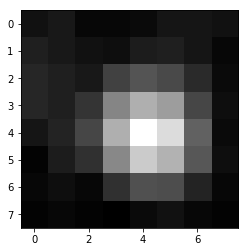

Spot reconstructed from gaussian fit parameters using sigma_min:


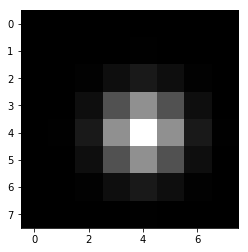

Spot reconstructed from gaussian fit parameters using sigma_max:


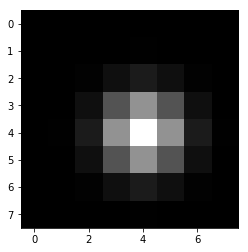

Original crop
[[13 15 10 10 11 14 14 13]
 [17 15 13 12 16 17 14 10]
 [19 17 15 27 32 29 20 11]
 [19 17 23 46 58 53 28 12]
 [14 18 28 58 81 71 36 11]
 [ 9 16 22 47 66 59 33 12]
 [10 12 10 22 31 30 18 10]
 [ 9 10  9  8 11 13 10  9]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 25 45 25  4  0]
 [ 0  0  8 45 81 45  8  0]
 [ 0  0  4 25 45 25  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  4 26 46 26  4  0]
 [ 0  0  8 46 81 46  8  0]
 [ 0  0  4 26 46 26  4  0]
 [ 0  0  0  4  8  4  0  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 631.6
y: 309.34
sigma_min: 0.9970662715637106
sigma_max: 1.0639983155412547
height: 54.78818165612643
max_intensity: 70


Original crop around spot at (631, 309):


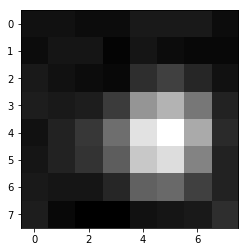

Spot reconstructed from gaussian fit parameters using sigma_min:


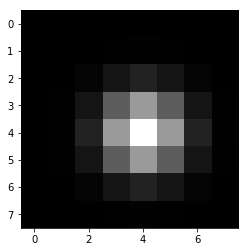

Spot reconstructed from gaussian fit parameters using sigma_max:


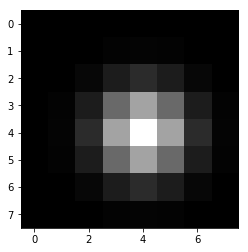

Original crop
[[14 14 13 13 16 16 16 13]
 [13 15 15 11 15 13 12 12]
 [16 14 13 12 21 25 19 14]
 [17 16 17 24 45 52 38 18]
 [14 18 23 36 63 70 50 20]
 [15 18 22 32 57 62 41 18]
 [16 15 15 19 33 35 25 18]
 [17 12 10 10 14 15 16 21]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 25 42 25  5  0]
 [ 0  0  9 42 70 42  9  0]
 [ 0  0  5 25 42 25  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 28 45 28  7  0]
 [ 0  1 11 45 70 45 11  1]
 [ 0  0  7 28 45 28  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]

---------------------------------------------------

x: 633.82
y: 287.76
sigma_min: 1.103710383547282
sigma_max: 1.1918985390171815
height: 42.101121844368535
max_intensity: 60


Original crop around spot at (633, 287):


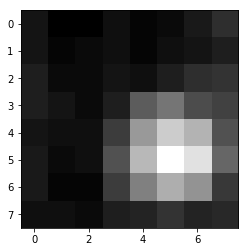

Spot reconstructed from gaussian fit parameters using sigma_min:


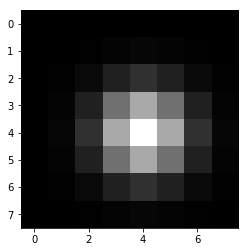

Spot reconstructed from gaussian fit parameters using sigma_max:


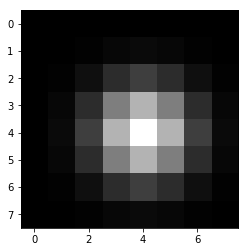

Original crop
[[14 10 10 13 11 12 15 19]
 [14 11 12 13 11 13 14 16]
 [16 12 12 14 13 16 19 20]
 [16 14 12 16 28 33 25 23]
 [14 13 13 22 40 50 45 26]
 [15 12 13 26 46 60 54 30]
 [15 11 11 22 35 44 39 21]
 [13 13 12 16 17 20 17 18]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  7 26 39 26  7  0]
 [ 0  1 11 39 60 39 11  1]
 [ 0  0  7 26 39 26  7  0]
 [ 0  0  2  7 11  7  2  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3 10 14 10  3  0]
 [ 0  1 10 29 42 29 10  1]
 [ 0  2 14 42 60 42 14  2]
 [ 0  1 10 29 42 29 10  1]
 [ 0  0  3 10 14 10  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 635.39
y: 315.62
sigma_min: 1.0540338531943445
sigma_max: 1.1318153643431228
height: 80.28720619827118
max_intensity: 99


Original crop around spot at (635, 315):


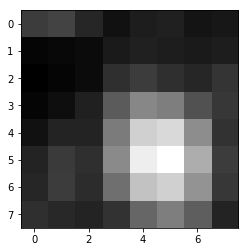

Spot reconstructed from gaussian fit parameters using sigma_min:


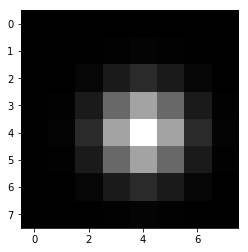

Spot reconstructed from gaussian fit parameters using sigma_max:


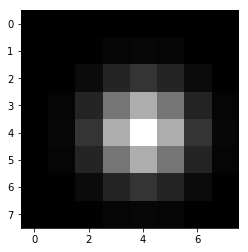

Original crop
[[33 35 25 18 22 23 19 20]
 [14 15 16 21 23 22 21 22]
 [12 14 16 28 33 28 25 30]
 [14 17 23 43 58 55 40 31]
 [18 24 24 54 83 86 60 29]
 [24 32 28 59 93 99 71 33]
 [25 33 27 50 78 83 62 31]
 [28 26 24 29 47 55 44 24]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2 10 16 10  2  0]
 [ 0  1 10 40 63 40 10  1]
 [ 0  1 16 63 99 63 16  1]
 [ 0  1 10 40 63 40 10  1]
 [ 0  0  2 10 16 10  2  0]
 [ 0  0  0  1  1  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  4 14 20 14  4  0]
 [ 0  1 14 45 67 45 14  1]
 [ 0  2 20 67 99 67 20  2]
 [ 0  1 14 45 67 45 14  1]
 [ 0  0  4 14 20 14  4  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 636.44
y: 274.97
sigma_min: 1.2761078659301681
sigma_max: 2.0252914721454998
height: 31.578517253968137
max_intensity: 54


Original crop around spot at (636, 274):


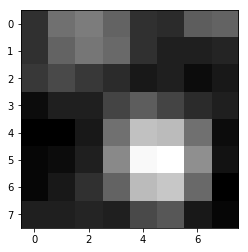

Spot reconstructed from gaussian fit parameters using sigma_min:


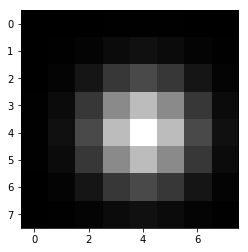

Spot reconstructed from gaussian fit parameters using sigma_max:


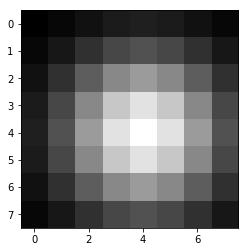

Original crop
[[21 31 33 29 21 20 28 29]
 [21 29 32 30 21 18 18 19]
 [22 25 22 20 17 18 15 17]
 [15 18 18 24 28 24 20 18]
 [13 13 17 31 44 43 31 15]
 [14 15 18 35 53 54 36 16]
 [14 17 21 29 43 45 30 13]
 [18 18 19 18 25 27 17 14]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  2  3  2  0  0]
 [ 0  0  4 11 15 11  4  0]
 [ 0  2 11 29 39 29 11  2]
 [ 0  3 15 39 54 39 15  3]
 [ 0  2 11 29 39 29 11  2]
 [ 0  0  4 11 15 11  4  0]
 [ 0  0  0  2  3  2  0  0]]
Reconstructed using sigma max
[[ 1  2  4  6  7  6  4  2]
 [ 2  6 11 15 18 15 11  6]
 [ 4 11 20 29 33 29 20 11]
 [ 6 15 29 42 47 42 29 15]
 [ 7 18 33 47 54 47 33 18]
 [ 6 15 29 42 47 42 29 15]
 [ 4 11 20 29 33 29 20 11]
 [ 2  6 11 15 18 15 11  6]]

---------------------------------------------------

x: 637.62
y: 242.27
sigma_min: 0.9343915821839751
sigma_max: 0.9528574927346758
height: 81.26995083621298
max_intensity: 90


Original crop around spot at (637, 242):


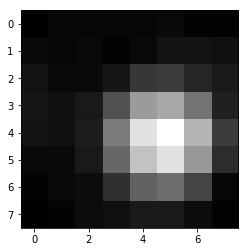

Spot reconstructed from gaussian fit parameters using sigma_min:


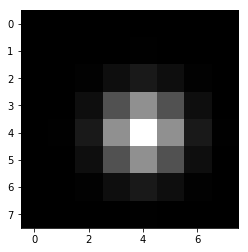

Spot reconstructed from gaussian fit parameters using sigma_max:


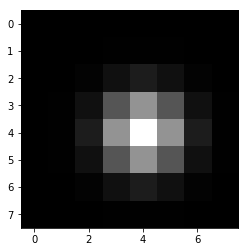

Original crop
[[11 13 13 13 13 14 12 12]
 [14 13 14 12 14 17 17 16]
 [17 14 14 18 28 30 23 19]
 [18 16 19 36 59 63 47 21]
 [17 16 20 49 81 90 67 30]
 [14 14 19 43 71 81 58 25]
 [12 14 15 26 41 45 32 13]
 [11 12 15 16 19 19 15 12]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  5 28 50 28  5  0]
 [ 0  0  9 50 90 50  9  0]
 [ 0  0  5 28 50 28  5  0]
 [ 0  0  0  5  9  5  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 29 51 29  5  0]
 [ 0  0  9 51 90 51  9  0]
 [ 0  0  5 29 51 29  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]

---------------------------------------------------

x: 656.58
y: 280.72
sigma_min: 1.1616951944357237
sigma_max: 1.18009402525077
height: 42.529879043925895
max_intensity: 59


Original crop around spot at (656, 280):


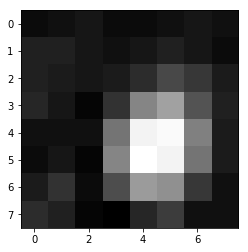

Spot reconstructed from gaussian fit parameters using sigma_min:


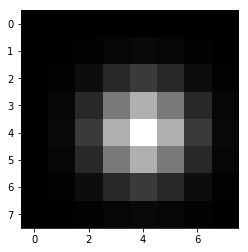

Spot reconstructed from gaussian fit parameters using sigma_max:


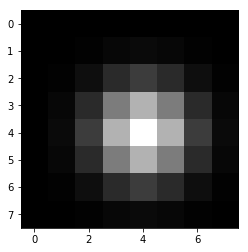

Original crop
[[15 16 17 15 15 16 17 16]
 [19 19 17 16 17 19 17 15]
 [19 18 17 18 21 26 23 18]
 [20 17 14 22 37 42 28 19]
 [16 16 16 34 57 58 36 18]
 [15 17 14 37 59 57 34 18]
 [18 22 15 27 41 39 23 16]
 [21 19 14 13 20 24 16 16]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 13  9  3  0]
 [ 0  1  9 28 40 28  9  1]
 [ 0  2 13 40 59 40 13  2]
 [ 0  1  9 28 40 28  9  1]
 [ 0  0  3  9 13  9  3  0]
 [ 0  0  0  1  2  1  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 14  9  3  0]
 [ 0  1  9 28 41 28  9  1]
 [ 0  2 14 41 59 41 14  2]
 [ 0  1  9 28 41 28  9  1]
 [ 0  0  3  9 14  9  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 664.95
y: 270.39
sigma_min: 1.0062552395518638
sigma_max: 1.1173496511377567
height: 54.47248979165978
max_intensity: 70


Original crop around spot at (664, 270):


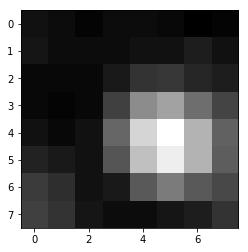

Spot reconstructed from gaussian fit parameters using sigma_min:


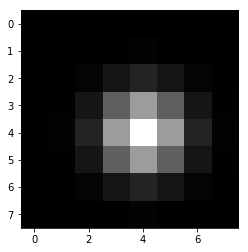

Spot reconstructed from gaussian fit parameters using sigma_max:


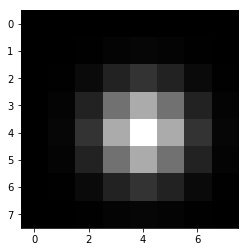

Original crop
[[14 13 11 13 13 12 10 11]
 [15 13 13 13 14 14 17 14]
 [12 12 12 16 22 23 19 17]
 [12 11 12 25 43 48 36 26]
 [14 12 14 34 60 70 52 33]
 [18 16 14 30 55 66 52 32]
 [24 21 14 16 31 39 31 27]
 [25 22 15 13 13 15 17 22]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  5 26 42 26  5  0]
 [ 0  0  9 42 70 42  9  0]
 [ 0  0  5 26 42 26  5  0]
 [ 0  0  1  5  9  5  1  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  1  1  0  0]
 [ 0  0  2  9 14  9  2  0]
 [ 0  1  9 31 46 31  9  1]
 [ 0  1 14 46 70 46 14  1]
 [ 0  1  9 31 46 31  9  1]
 [ 0  0  2  9 14  9  2  0]
 [ 0  0  0  1  1  1  0  0]]

---------------------------------------------------

x: 673.46
y: 327.65
sigma_min: 1.1187180976068105
sigma_max: 1.2451553933758372
height: 31.863187495034726
max_intensity: 46


Original crop around spot at (673, 327):


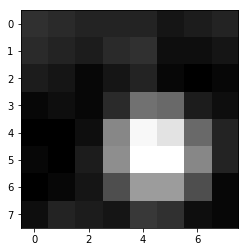

Spot reconstructed from gaussian fit parameters using sigma_min:


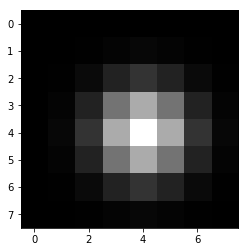

Spot reconstructed from gaussian fit parameters using sigma_max:


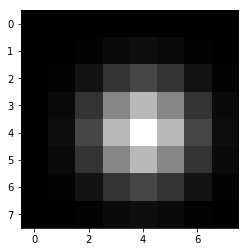

Original crop
[[17 16 15 15 15 13 14 15]
 [16 15 14 16 17 12 12 13]
 [14 13 11 13 15 11 10 11]
 [11 12 11 16 26 25 14 12]
 [10 10 12 29 45 42 25 15]
 [11 10 14 30 46 46 29 15]
 [10 11 13 21 32 32 21 11]
 [12 15 14 13 18 17 12 11]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  6 20 30 20  6  0]
 [ 0  1  9 30 46 30  9  1]
 [ 0  0  6 20 30 20  6  0]
 [ 0  0  1  6  9  6  1  0]
 [ 0  0  0  0  1  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  1  0  0]
 [ 0  0  3  9 12  9  3  0]
 [ 0  1  9 24 33 24  9  1]
 [ 0  2 12 33 46 33 12  2]
 [ 0  1  9 24 33 24  9  1]
 [ 0  0  3  9 12  9  3  0]
 [ 0  0  0  1  2  1  0  0]]

---------------------------------------------------

x: 685.64
y: 315.3
sigma_min: 0.9232386847440947
sigma_max: 0.9306571003260432
height: 71.32820045489771
max_intensity: 78


Original crop around spot at (685, 315):


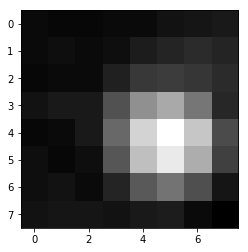

Spot reconstructed from gaussian fit parameters using sigma_min:


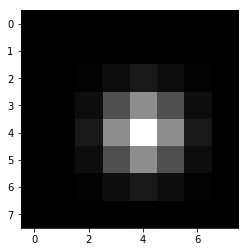

Spot reconstructed from gaussian fit parameters using sigma_max:


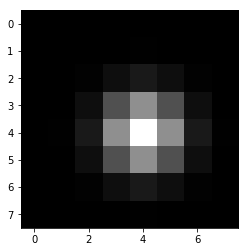

Original crop
[[10  9  9 10 10 12 13 14]
 [10 11 10 11 15 17 19 17]
 [ 9 10 10 16 23 24 22 19]
 [12 14 14 30 47 54 40 18]
 [ 9 10 14 36 66 78 62 28]
 [11  9 11 31 60 72 55 25]
 [11 12 10 17 32 39 29 13]
 [12 13 13 12 14 15 10  7]]
Reconstructed using sigma min
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  7 43 78 43  7  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]
Reconstructed using sigma max
[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  7 43 78 43  7  0]
 [ 0  0  4 24 43 24  4  0]
 [ 0  0  0  4  7  4  0  0]
 [ 0  0  0  0  0  0  0  0]]


In [4]:
import math

margin = 4

print(str(len(coords)) + ' spots found by expert:\n')

for x, y in coords:
    print('\n---------------------------------------------------\n')
    
    x_min = int(x)-margin if int(x)-margin >= 0 else 0
    x_max = int(x)+margin if int(x)+margin < im.shape[1] else im.shape[1]-1
    y_min = int(y)-margin if int(y)-margin >= 0 else 0
    y_max = int(y)+margin if int(y)+margin < im.shape[0] else im.shape[0]-1

    crop = im[y_min:y_max, x_min:x_max]
    params = fitgaussian(crop)
    fit = gaussian(*params)
    (height, x_param, y_param, width_x, width_y) = params
    sigma_min = math.sqrt(min(width_x, width_y)/2)
    sigma_max = math.sqrt(max(width_x, width_y)/2)
    max_intensity = np.amax(crop)
    print('x:', x)
    print('y:', y)
    print('sigma_min:', sigma_min)
    print('sigma_max:', sigma_max)
    print('height:', height)
    print('max_intensity:', max_intensity)
    
    print('\n\nOriginal crop around spot at ' + str((int(x), int(y))) + ':')
    plt.figure()
    im_copy = crop
#     im_copy[int(y)-margin, int(x)-margin] = 1
    plt.imshow(im_copy, cmap='gray')
#     plt.xlim(x_min, x_max)
#     plt.ylim(y_min, y_max)
#     for coord in coords:
#         plt.scatter(x, y, color='y')
    plt.show()
    
    print('Spot reconstructed from gaussian fit parameters using sigma_min:')
    patch_sigma_min = np.zeros([margin*2, margin*2])
    for j in range(margin*2):
        for i in range(margin*2):
            x_dist = i - margin
            y_dist = j - margin
            exp_num = x_dist**2 + y_dist**2
            exp_den = 2*(sigma_min**2)
            exp_quantity = exp_num/exp_den
            value = max_intensity*np.exp(-exp_quantity)
            if (value < 0):
                value = 0
            patch_sigma_min[i][j] = value
    plt.figure()
    plt.imshow(patch_sigma_min, cmap='gray')
    plt.show()
    
    print('Spot reconstructed from gaussian fit parameters using sigma_max:')
    patch_sigma_max = np.zeros([margin*2, margin*2])
    for j in range(margin*2):
        for i in range(margin*2):
            x_dist = i - margin
            y_dist = j - margin
            exp_num = x_dist**2 + y_dist**2
            exp_den = 2*(sigma_max**2)
            exp_quantity = exp_num/exp_den
            value = max_intensity*np.exp(-exp_quantity)
            if (value < 0):
                value = 0
            patch_sigma_max[i][j] = value
    plt.figure()
    plt.imshow(patch_sigma_max, cmap='gray')
    plt.show()
    
    print('Original crop')
    print(im[y_min:y_max, x_min:x_max])
    print('Reconstructed using sigma min')
    print(patch_sigma_min.astype(int))
    print('Reconstructed using sigma max')
    print(patch_sigma_max.astype(int))
    


### Collect the sigma and intensity values.

In [5]:
import math

margin = 4

max_intensity_list = []
sigma_min_list = []
sigma_max_list = []

for x, y in coords:
    
    x_min = int(x)-margin if int(x)-margin >= 0 else 0
    x_max = int(x)+margin if int(x)+margin < im.shape[1] else im.shape[1]-1
    y_min = int(y)-margin if int(y)-margin >= 0 else 0
    y_max = int(y)+margin if int(y)+margin < im.shape[0] else im.shape[0]-1

    crop = im[y_min:y_max, x_min:x_max]
    params = fitgaussian(crop)
    fit = gaussian(*params)
    (height, x_param, y_param, width_x, width_y) = params
    sigma_min = math.sqrt(min(width_x, width_y)/2)
    sigma_max = math.sqrt(max(width_x, width_y)/2)
    max_intensity = np.amax(crop)

    max_intensity_list.append(max_intensity)
    sigma_min_list.append(sigma_min)
    sigma_max_list.append(sigma_max)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:427: RuntimeWarning: Number of calls to function has reached maxfev = 1200.
  warnings.warn(errors[info][0], RuntimeWarning)


### Visualize the distribution of max intensities and stdevs across all spots found by "expert"

Max intensity of spots marked by expert:
mean(max_intensity_list) = 88.7


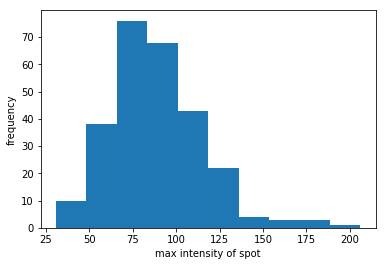

Stdev (along axis which minimizes stdev) of spots marked by expert:
mean(sigma_min_list) = 1.09


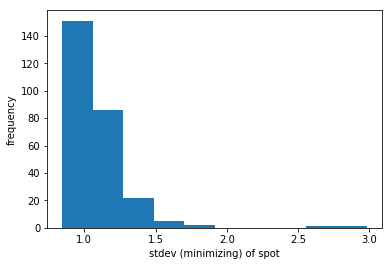

Stdev (along axis which maximizes stdev) of spots marked by expert:
mean(sigma_max_list) = 1.34


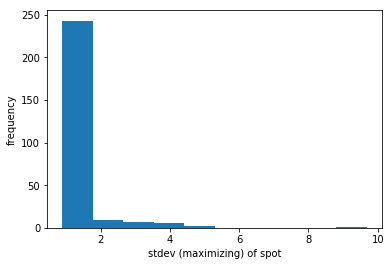

In [6]:
plt.figure()
plt.hist(max_intensity_list)
print('Max intensity of spots marked by expert:\nmean(max_intensity_list) = ' + str(round(np.mean(max_intensity_list), 2)))
plt.xlabel('max intensity of spot')
plt.ylabel('frequency')
plt.show()

plt.figure()
plt.hist(sigma_min_list)
print('Stdev (along axis which minimizes stdev) of spots marked by expert:\nmean(sigma_min_list) = ' + str(round(np.mean(sigma_min_list), 2)))
plt.xlabel('stdev (minimizing) of spot')
plt.ylabel('frequency')
plt.show()

plt.figure()
plt.hist(sigma_max_list)
print('Stdev (along axis which maximizes stdev) of spots marked by expert:\nmean(sigma_max_list) = ' + str(round(np.mean(sigma_max_list), 2)))
plt.xlabel('stdev (maximizing) of spot')
plt.ylabel('frequency')
plt.show()

## To do:

 - Decide what to use as `min_sigma`, `max_sigma`, `num_sigma`, and `threshold` for `skimage.feature.blob_log()`.
     - can plot the blobs back on to check: http://scikit-image.org/docs/dev/auto_examples/features_detection/plot_blob.html#sphx-glr-auto-examples-features-detection-plot-blob-py
     - be sure to check about data types and data ranges: http://scikit-image.org/docs/dev/user_guide/data_types.htm
 - Run smFISH.png (the image used here) through skimage.feature.blob_log() and see if the spots we detect with this method are comparable to the spots I found using Rafael's Matlab tool.
 
### Assorted thoughts

 - Using sigma min (picking either x or y axis to minimize sigma) vs using sigma max (picking either x or y axis to minimize sigma) doesn’t seem to make much difference visually with the reconstructed spots. Analytically, sigma_min and sigma_max on average have about a 20% difference

 - I couldn’t figure out why the one image was showing up so much more high-contrast than the other, but the trick I have to remember with pyplot’s color mapping is that it’ll take the whole image’s range of intensities and map them to the same color scale between extremities of black and white, so if I’m plotting the whole image, even if I'm only showing a section, the plot will show up in shades of grey within a narrow strip of grey whereas if I plot just a cropped image the contrast will be higher.

In [7]:
print(min(sigma_min_list))
print(min(sigma_max_list))
print(max(sigma_min_list))
print(max(sigma_max_list))

0.8472529133894158
0.8963844166144574
2.9812730658801
9.683902937356743
